<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

ERROR: Ignored the following versions that require a different python version: 1.4.0 Requires-Python >=3.8; 1.4.0rc0 Requires-Python >=3.8; 1.4.1 Requires-Python >=3.8; 1.4.2 Requires-Python >=3.8; 1.4.3 Requires-Python >=3.8; 1.4.4 Requires-Python >=3.8; 1.5.0 Requires-Python >=3.8; 1.5.0rc0 Requires-Python >=3.8; 1.5.1 Requires-Python >=3.8; 1.5.2 Requires-Python >=3.8; 1.5.3 Requires-Python >=3.8; 2.0.0 Requires-Python >=3.8; 2.0.0rc0 Requires-Python >=3.8; 2.0.0rc1 Requires-Python >=3.8; 2.0.1 Requires-Python >=3.8; 2.0.2 Requires-Python >=3.8; 2.0.3 Requires-Python >=3.8; 2.1.0 Requires-Python >=3.9; 2.1.0rc0 Requires-Python >=3.9; 2.1.1 Requires-Python >=3.9; 2.1.2 Requires-Python >=3.9; 2.1.3 Requires-Python >=3.9; 2.1.4 Requires-Python >=3.9; 2.2.0 Requires-Python >=3.9; 2.2.0rc0 Requires-Python >=3.9; 2.2.1 Requires-Python >=3.9; 2.2.2 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement pandas==2.2.2 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.

In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [2]:
import yfinance as yf
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [38]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific.Date, y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    #'2021-04-30' [revenue_data.Date <= 2022] pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True)

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla.history(period='max')


In [23]:
tesla_data.Date

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3491   2024-05-13
3492   2024-05-14
3493   2024-05-15
3494   2024-05-16
3495   2024-05-17
Name: Date, Length: 3496, dtype: datetime64[ns]

In [25]:
tesla_data.Close

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3491    171.889999
3492    177.550003
3493    173.990005
3494    174.839996
3495    177.460007
Name: Close, Length: 3496, dtype: float64

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [9]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [10]:
read_html_pandas_data = pd.read_html(str(soup))
tesla_revenue = read_html_pandas_data[0]
tesla_revenue.columns = ['Date','Revenue']
tesla_revenue.head(5)

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:

tesla_revenue.iloc[0][0].dtype

tesla_revenue.tail(5)

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [26]:
tesla_revenue.Date

0     2021
1     2020
2     2019
3     2018
4     2017
5     2016
6     2015
7     2014
8     2013
9     2012
10    2011
11    2010
12    2009
Name: Date, dtype: int64

In [27]:
tesla_revenue.Revenue

0     53823
1     31536
2     24578
3     21461
4     11759
5      7000
6      4046
7      3198
8      2013
9       413
10      204
11      117
12      112
Name: Revenue, dtype: object

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
gamestop = yf.Ticker('GME')


In [16]:
gme_data = gamestop.history(period='max')


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [18]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [19]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
read_html_pandas_data = pd.read_html(str(soup))
gme_revenue = read_html_pandas_data[0]
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.head(5)

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
gme_revenue.tail(5)

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph



cognitiveclass.ai logo
Extracting Stock Data Using a Web Scraping

Not all stock data is available via the API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.
You will extract and share historical data from a web page using the BeautifulSoup library.
Table of Contents

    Extracting data using BeautifulSoup
        Download the web page Using Requests Library
        Parse HTML on a web page using BeautifulSoup
        Extract data and duild a data frame

    Extracting data using pandas

    Exercise

    Estimated Time Needed: 30 min

#!pip install pandas==1.3.3

#!pip install requests==2.26.0

!mamba install bs4==4.10.0 -y

!mamba install html5lib==1.1 -y 

!pip install lxml==4.6.4

#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/main/noarch   ╸━━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/r/linux-64    ━━━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/r/noarch      ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1spkgs/r/linux-64                                               No change
pkgs/r/noarch                                                 No change
pkgs/main/noarch                                              No change
[+] 0.2s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s[+] 0.3s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━ 340.0kB /  ??.?MB @   1.1MB/s  0.3s[+] 0.4s
pkgs/main/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━━━ 798.7kB /  ??.?MB @   2.0MB/s  0.4s[+] 0.5s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━━━   1.0MB /  ??.?MB @   2.3MB/s  0.5s[+] 0.6s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   1.4MB /  ??.?MB @   2.5MB/s  0.6s[+] 0.7s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   1.9MB /  ??.?MB @   2.8MB/s  0.7s[+] 0.8s
pkgs/main/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━━━   2.4MB /  ??.?MB @   3.2MB/s  0.8s[+] 0.9s
pkgs/main/linux-64 ━╸━━━━━━━━━━━━━━━╸━━━━━━━   3.0MB /  ??.?MB @   3.4MB/s  0.9s[+] 1.0s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   3.5MB /  ??.?MB @   3.6MB/s  1.0s[+] 1.1s
pkgs/main/linux-64 ━━━━━╸━━━━━━━━━━━━━━━╸━━━   3.8MB /  ??.?MB @   3.5MB/s  1.1s[+] 1.2s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   4.3MB /  ??.?MB @   3.6MB/s  1.2s[+] 1.3s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   4.5MB /  ??.?MB @   3.6MB/s  1.3s[+] 1.4s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   5.0MB /  ??.?MB @   3.7MB/s  1.4s[+] 1.5s
pkgs/main/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━━━   5.4MB /  ??.?MB @   3.7MB/s  1.5s[+] 1.6s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   5.9MB /  ??.?MB @   3.8MB/s  1.6s[+] 1.7s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   6.4MB /  ??.?MB @   3.9MB/s  1.7s[+] 1.8s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   6.9MB /  ??.?MB @   3.9MB/s  1.8s[+] 1.9s
pkgs/main/linux-64 ━━━━━━━━━━━━━━━━━━━━━━━━   6.9MB @   3.9MB/s Finalizing  1.9spkgs/main/linux-64                                 @   3.9MB/s  2.0s

Pinned packages:
  - python 3.7.*


Transaction

  Prefix: /home/jupyterlab/conda/envs/python

  All requested packages already installed


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['html5lib==1.1']

pkgs/main/linux-64                                          Using cache
pkgs/main/noarch                                            Using cache
pkgs/r/linux-64                                             Using cache
pkgs/r/noarch                                               Using cache

Pinned packages:
  - python 3.7.*


Transaction

  Prefix: /home/jupyterlab/conda/envs/python

  All requested packages already installed

Collecting lxml==4.6.4
  Using cached lxml-4.6.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.3 MB)
Installing collected packages: lxml
  Attempting uninstall: lxml
    Found existing installation: lxml 5.2.2
    Uninstalling lxml-5.2.2:
      Successfully uninstalled lxml-5.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.4 requires lxml>=4.9.1, but you have lxml 4.6.4 which is incompatible.
Successfully installed lxml-4.6.4

import pandas as pd

import requests

from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

import warnings

# Ignore all warnings

warnings.filterwarnings("ignore", category=FutureWarning)

Using Webscraping to Extract Stock Data Example

We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.
In this example, we are using yahoo finance website and looking to extract Netflix data.

Image
Fig:- Table that we need to extract

On the following web page we have a table with columns name (Date, Open, High, Low, close, adj close volume) out of which we must extract following columns

    Date

    Open

    High

    Low

    Close

    Volume

Steps for extracting the data

    Send an HTTP request to the web page using the requests library.
    Parse the HTML content of the web page using BeautifulSoup.
    Identify the HTML tags that contain the data you want to extract.
    Use BeautifulSoup methods to extract the data from the HTML tags.
    Print the extracted data

Step 1: Send an HTTP request to the web page

You will use the request library for sending an HTTP request to the web page.

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.

data  = requests.get(url).text

print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidate.01" content="A9862C0E6E1BE95BCE0BF3D0298FD58B"/><link rel="manifest" href="/manifest.json"/><link rel="dns-prefetch" href="//l.yimg.com"/><link rel="dns-prefetch" href="//s.yimg.com"/><link rel="dns-prefetch" href="//csc.beap.bc.yahoo.com"/><link rel="dns-prefetch" href="//geo.query.yahoo.com"/><link rel="dns-prefetch" href="//y.analytics.yahoo.com"/><link rel="dns-prefetch" href="//b.scorecardresearch.com"/><link rel="dns-prefetch" href="//iquery.finance.yahoo.com"/><link rel="dns-prefetch" href="//fc.yahoo.com"/><link rel="dns-prefetch" href="//video-api.yql.yahoo.com"/><link rel="dns-prefetch" href="//yrtas.btrll.com"/><link rel="dns-prefetch" href="//shim.btrll.com"/><link rel="dns-prefetch" href="//consent.cmp.oath.com"/><link rel="dns-prefetch" href="//geo.yahoo.com"/><link rel="preconnect" href="//l.yimg.com" crossorigin="anonymous"/><link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"/><link rel="preconnect" href="//csc.beap.bc.yahoo.com"/><link rel="preconnect" href="//geo.query.yahoo.com"/><link rel="preconnect" href="//y.analytics.yahoo.com"/><link rel="preconnect" href="//b.scorecardresearch.com"/><link rel="preconnect" href="//iquery.finance.yahoo.com"/><link rel="preconnect" href="//fc.yahoo.com"/><link rel="preconnect" href="//video-api.yql.yahoo.com"/><link rel="preconnect" href="//yrtas.btrll.com"/><link rel="preconnect" href="//shim.btrll.com"/><link rel="preconnect" href="//consent.cmp.oath.com"/><link rel="preconnect" href="//geo.yahoo.com"/><link rel="preconnect" href="//ads.yahoo.com"/><link rel="preload" href="https://s.yimg.com/uc/finance/dd-site/fonts/YahooSansFinancial-Regular-Web.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="https://s.yimg.com/uc/finance/dd-site/fonts/YahooSansFinancial-Medium-Web.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="https://s.yimg.com/uc/finance/dd-site/fonts/YahooSansFinancial-Semibold-Web.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="https://s.yimg.com/uc/finance/dd-site/fonts/YahooSansFinancial-Bold-Web.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="/__finStreamer-worker.js" as="worker"/><link rel="preload" href="/__rapidworker-1.2.js" as="worker"/><link rel="icon" href="https://s.yimg.com/cv/apiv2/default/icons/favicon_y19_32x32_custom.svg" sizes="any"/><link rel="alternate icon" href="https://s.yimg.com/cv/apiv2/default/fp/20180826/icons/favicon_y19_32x32.ico" type="image/x-icon"/><link rel="canonical" href="https://finance.yahoo.com/quote/NFLX/history/"/><meta property="twitter:site" content="@YahooFinance"/><meta property="fb:pages" content="458584288257241"/><meta property="og:image" content="https://s.yimg.com/cv/apiv2/social/images/yahoo_default_logo.png"/><meta property="og:description" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta property="og:title" content="Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance"/><meta property="twitter:description" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta property="twitter:title" content="Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance"/><meta property="al:ios:app_store_id" content="328412701"/><meta property="al:ios:app_name" content="Yahoo Finance"/><meta property="al:android:url" content="intent://quote/NFLX/#Intent;scheme=yfinance;action=android.intent.action.VIEW;package=com.yahoo.mobile.client.android.finance;S.browser_fallback_url=https%3A%2F%2Fplay.google.com%2Fstore%2Fapps%2Fdetails%3Fid%3Dcom.yahoo.mobile.client.android.finance;end"/><meta property="al:android:app_name" content="Yahoo Finance"/><meta property="al:android:package" content="com.yahoo.mobile.client.android.finance"/><meta name="apple-itunes-app" content="app-id=328412701, app-clip-bundle-id=com.yahoo.finance.clip-qsp, affiliate-data=ct=us.fin.mbl.smart-banner&amp;pt=9029, app-argument=https://finance.yahoo.com/quote/NFLX"/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><link rel="stylesheet" href="https://s.yimg.com/uc/finance/dd-site/css/app.3aaaa2fc.css"/><link rel="stylesheet" href="https://s.yimg.com/uc/finance/dd-site/css/atomic-light.f1f1fb39.css"/><link rel="stylesheet" href="https://s.yimg.com/uc/finance/dd-site/css/yahooSansFinance.9be97232.css"/><script src="https://s.yimg.com/aaq/yc/2.9.0/en.js"></script><script src="https://s.yimg.com/uc/finance/dd-site/js/jsErrorBeacon.js"></script><script src="https://s.yimg.com/ss/rapid3.js"></script><script src="https://s.yimg.com/uc/finance/srchjs/1.0.45/js/finSearch.modern.js"></script><script src="https://s.yimg.com/uc/finance/dd-site/js/vendor.13b96d36cf3c0a544a60.modern.js" defer=""></script><script src="https://s.yimg.com/uc/finance/dd-site/js/common.b03df9d456464634b46c.modern.js" defer=""></script><script src="https://consent.cmp.oath.com/cmpStub.min.js"></script><script src="https://consent.cmp.oath.com/cmp.js" async=""></script><script src="https://s.yimg.com/rq/darla/4-8-0/js/g-r-min.js"></script><script>(function(html){var c = html.className;c += " JsEnabled";c = c.replace("NoJs","");html.className = c;})(document.documentElement);</script><script>!function(){var e,t,n,i,r={passive:!0,capture:!0},a=new Date,o=function(){i=[],t=-1,e=null,f(addEventListener)},c=function(i,r){e||(e=r,t=i,n=new Date,f(removeEventListener),u())},u=function(){if(t>=0&&t<n-a){var r={entryType:"first-input",name:e.type,target:e.target,cancelable:e.cancelable,startTime:e.timeStamp,processingStart:e.timeStamp+t};i.forEach((function(e){e(r)})),i=[]}},s=function(e){if(e.cancelable){var t=(e.timeStamp>1e12?new Date:performance.now())-e.timeStamp;"pointerdown"==e.type?function(e,t){var n=function(){c(e,t),a()},i=function(){a()},a=function(){removeEventListener("pointerup",n,r),removeEventListener("pointercancel",i,r)};addEventListener("pointerup",n,r),addEventListener("pointercancel",i,r)}(t,e):c(t,e)}},f=function(e){["mousedown","keydown","touchstart","pointerdown"].forEach((function(t){return e(t,s,r)}))},p="hidden"===document.visibilityState?0:1/0;addEventListener("visibilitychange",(function e(t){"hidden"===document.visibilityState&&(p=t.timeStamp,removeEventListener("visibilitychange",e,!0))}),!0);o(),self.webVitals={firstInputPolyfill:function(e){i.push(e),u()},resetFirstInputPolyfill:o,get firstHiddenTime(){return p}}}();
</script><script>!function(e,s,f,p){var a=[],t={_version:"3.11.4",_config:{classPrefix:"",enableClasses:!0,enableJSClass:!0,usePrefixes:!0},_q:[],on:function(e,t){var n=this;setTimeout(function(){t(n[e])},0)},addTest:function(e,t,n){a.push({name:e,fn:t,options:n})},addAsyncTest:function(e){a.push({name:null,fn:e})}},l=function(){};l.prototype=t,l=new l;var d=[];function v(e,t){return typeof e===t}var n="Moz O ms Webkit",c=t._config.usePrefixes?n.split(" "):[];t._cssomPrefixes=c;var y=f.documentElement,m="svg"===y.nodeName.toLowerCase();function h(){return"function"!=typeof f.createElement?f.createElement(arguments[0]):m?f.createElementNS.call(f,"http://www.w3.org/2000/svg",arguments[0]):f.createElement.apply(f,arguments)}var r={elem:h("modernizr")};l._q.push(function(){delete r.elem});var g={style:r.elem.style};function o(e,t,n,r){var o,i,s,a,l,d="modernizr",c=h("div"),u=((l=f.body)||((l=h(m?"svg":"body")).fake=!0),l);if(parseInt(n,10))for(;n--;)(s=h("div")).id=r?r[n]:d+(n+1),c.appendChild(s);return(o=h("style")).type="text/css",o.id="s"+d,(u.fake?u:c).appendChild(o),u.appendChild(c),o.styleSheet?o.styleSheet.cssText=e:o.appendChild(f.createTextNode(e)),c.id=d,u.fake&&(u.style.background="",u.style.overflow="hidden",a=y.style.overflow,y.style.overflow="hidden",y.appendChild(u)),i=t(c,e),u.fake?(u.parentNode.removeChild(u),y.style.overflow=a,y.offsetHeight):c.parentNode.removeChild(c),!!i}function i(e){return e.replace(/([A-Z])/g,function(e,t){return"-"+t.toLowerCase()}).replace(/^ms-/,"-ms-")}function S(e,t){var n=e.length;if("CSS"in s&&"supports"in s.CSS){for(;n--;)if(s.CSS.supports(i(e[n]),t))return!0;return!1}if("CSSSupportsRule"in s){for(var r=[];n--;)r.push("("+i(e[n])+":"+t+")");return o("@supports ("+(r=r.join(" or "))+") { #modernizr { position: absolute; } }",function(e){return"absolute"===function(e,t,n){var r;if("getComputedStyle"in s){r=getComputedStyle.call(s,e,t);var o=s.console;null!==r?n&&(r=r.getPropertyValue(n)):o&&o[o.error?"error":"log"].call(o,"getComputedStyle returning null, its possible modernizr test results are inaccurate")}else r=!t&&e.currentStyle&&e.currentStyle[n];return r}(e,null,"position")})}return p}function T(e){return e.replace(/([a-z])-([a-z])/g,function(e,t,n){return t+n.toUpperCase()}).replace(/^-/,"")}l._q.unshift(function(){delete g.style});var u=t._config.usePrefixes?n.toLowerCase().split(" "):[];function w(e,t){return function(){return e.apply(t,arguments)}}function C(e,t,n,r,o){var i=e.charAt(0).toUpperCase()+e.slice(1),s=(e+" "+c.join(i+" ")+i).split(" ");return v(t,"string")||v(t,"undefined")?function(e,t,n,r){if(r=!v(r,"undefined")&&r,!v(n,"undefined")){var o=S(e,n);if(!v(o,"undefined"))return o}for(var i,s,a,l,d,c=["modernizr","tspan","samp"];!g.style&&c.length;)i=!0,g.modElem=h(c.shift()),g.style=g.modElem.style;function u(){i&&(delete g.style,delete g.modElem)}for(a=e.length,s=0;s<a;s++)if(l=e[s],d=g.style[l],~(""+l).indexOf("-")&&(l=T(l)),g.style[l]!==p){if(r||v(n,"undefined"))return u(),"pfx"!==t||l;try{g.style[l]=n}catch(e){}if(g.style[l]!==d)return u(),"pfx"!==t||l}return u(),!1}(s,t,r,o):function(e,t,n){var r;for(var o in e)if(e[o]in t)return!1===n?e[o]:v(r=t[e[o]],"function")?w(r,n||t):r;return!1}(s=(e+" "+u.join(i+" ")+i).split(" "),t,n)}t._domPrefixes=u,t.testAllProps=C;var x=function(e){var t,n=P.length,r=s.CSSRule;if(void 0===r)return p;if(!e)return!1;if((t=(e=e.replace(/^@/,"")).replace(/-/g,"_").toUpperCase()+"_RULE")in r)return"@"+e;for(var o=0;o<n;o++){var i=P[o];if(i.toUpperCase()+"_"+t in r)return"@-"+i.toLowerCase()+"-"+e}return!1};t.atRule=x;t.prefixed=function(e,t,n){return 0===e.indexOf("@")?x(e):(-1!==e.indexOf("-")&&(e=T(e)),t?C(e,t,n):C(e,"pfx"))};l.addTest("canvas",function(){var e=h("canvas");return!(!e.getContext||!e.getContext("2d"))});var P=t._config.usePrefixes?" -webkit- -moz- -o- -ms- ".split(" "):["",""];function _(e,t,n){return C(e,p,p,t,n)}t._prefixes=P,l.addTest("csspositionsticky",function(){var e="position:",t=h("a").style;return t.cssText=e+P.join("sticky;"+e).slice(0,-e.length),-1!==t.position.indexOf("sticky")}),t.testAllProps=_;var b="CSS"in s&&"supports"in s.CSS,E="supportsCSS"in s;l.addTest("supports",b||E),l.addTest("csstransforms3d",function(){return!!_("perspective","1px",!0)}),l.addTest("csstransitions",_("transition","all",!0)),l.addTest("history",function(){var e=navigator.userAgent;return!!e&&((-1===e.indexOf("Android 2.")&&-1===e.indexOf("Android 4.0")||-1===e.indexOf("Mobile Safari")||-1!==e.indexOf("Chrome")||-1!==e.indexOf("Windows Phone")||"file:"===location.protocol)&&(s.history&&"pushState"in s.history))}),l.addTest("inlinesvg",function(){var e=h("div");return e.innerHTML="<svg/>","http://www.w3.org/2000/svg"===("undefined"!=typeof SVGRect&&e.firstChild&&e.firstChild.namespaceURI)}),l.addTest("localstorage",function(){var e="modernizr";try{return localStorage.setItem(e,e),localStorage.removeItem(e),!0}catch(e){return!1}}),l.addTest("sessionstorage",function(){var e="modernizr";try{return sessionStorage.setItem(e,e),sessionStorage.removeItem(e),!0}catch(e){return!1}}),l.addTest("svg",!!f.createElementNS&&!!f.createElementNS("http://www.w3.org/2000/svg","svg").createSVGRect),function(){var t=h("video");l.addTest("video",function(){var e=!1;try{(e=!!t.canPlayType)&&(e=new Boolean(e))}catch(e){}return e});try{t.canPlayType&&(l.addTest("video.ogg",t.canPlayType('video/ogg; codecs="theora"').replace(/^no$/,"")),l.addTest("video.h264",t.canPlayType('video/mp4; codecs="avc1.42E01E"').replace(/^no$/,"")),l.addTest("video.h265",t.canPlayType('video/mp4; codecs="hev1"').replace(/^no$/,"")),l.addTest("video.webm",t.canPlayType('video/webm; codecs="vp8, vorbis"').replace(/^no$/,"")),l.addTest("video.vp9",t.canPlayType('video/webm; codecs="vp9"').replace(/^no$/,"")),l.addTest("video.hls",t.canPlayType('application/x-mpegURL; codecs="avc1.42E01E"').replace(/^no$/,"")),l.addTest("video.av1",t.canPlayType('video/mp4; codecs="av01"').replace(/^no$/,"")))}catch(e){}}(),function(){var e,t,n,r,o,i;for(var s in a)if(a.hasOwnProperty(s)){if(e=[],(t=a[s]).name&&(e.push(t.name.toLowerCase()),t.options&&t.options.aliases&&t.options.aliases.length))for(n=0;n<t.options.aliases.length;n++)e.push(t.options.aliases[n].toLowerCase());for(r=v(t.fn,"function")?t.fn():t.fn,o=0;o<e.length;o++)1===(i=e[o].split(".")).length?l[i[0]]=r:(l[i[0]]&&(!l[i[0]]||l[i[0]]instanceof Boolean)||(l[i[0]]=new Boolean(l[i[0]])),l[i[0]][i[1]]=r),d.push((r?"":"no-")+i.join("-"))}}(),delete t.addTest,delete t.addAsyncTest;for(var z=0;z<l._q.length;z++)l._q[z]();e.Modernizr=l}(window,window,document);</script><script>!function(e){function t(t){t.matches?e.classList&&(e.classList.remove("themelight"),e.classList.add("themedark")):e.classList&&(e.classList.remove("themedark"),e.classList.add("themelight"))}if(window&&"function"==typeof window.matchMedia){var s=window.matchMedia("(prefers-color-scheme: dark)");s.addListener(t),t(s)}}(document.documentElement);</script><style>/*! normalize.css v4.0.0 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block}audio:not([controls]){display:none;height:0}progress{vertical-align:baseline}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline-width:0}abbr[title]{border-bottom:none;text-decoration:underline;text-decoration:underline dotted}b,strong{font-weight:inherit}b,strong{font-weight:bolder}dfn{font-style:italic}h1{font-size:2em;margin:.67em 0}mark{background-color:#ff0;color:#000}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}img{border-style:none}svg:not(:root){overflow:hidden}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}figure{margin:1em 40px}hr{box-sizing:content-box;height:0;overflow:visible}button,input,select,textarea{font:inherit;margin:0}optgroup{font-weight:700}button,input,select{overflow:visible}button,select{text-transform:none}[type=reset],[type=submit],button,html [type=button]{-webkit-appearance:button}button::-moz-focus-inner,input::-moz-focus-inner{border:0;padding:0}button:-moz-focusring,input:-moz-focusring{outline:1px dotted ButtonText}fieldset{border:1px solid silver;margin:0 2px;padding:.35em .625em .75em}legend{box-sizing:border-box;color:inherit;display:table;max-width:100%;padding:0;white-space:normal}textarea{overflow:auto}[type=checkbox],[type=radio]{box-sizing:border-box;padding:0}[type=number]::-webkit-inner-spin-button,[type=number]::-webkit-outer-spin-button{height:auto}[type=search]{-webkit-appearance:textfield}[type=search]::-webkit-search-cancel-button,[type=search]::-webkit-search-decoration{-webkit-appearance:none}table{border-collapse:collapse;border-spacing:0}td,th{padding:0}[type=button],[type=reset],[type=submit],button{cursor:pointer}[disabled]{cursor:default}[dir]{text-align:start}[role=button]{box-sizing:border-box;cursor:pointer}:link{text-decoration:none;color:#324fe1}:visited{color:#324fe1}a:hover{text-decoration:underline}abbr[title]{border:0;cursor:help}b{font-weight:400}blockquote{margin:0;padding:0}body{background:#fff;color:#000;font:13px/1.3 'Helvetica Neue',Helvetica,Arial,sans-serif;height:100%;text-rendering:optimizeLegibility;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale}button{box-sizing:border-box;font:16px 'Helvetica Neue',Helvetica,Arial,sans-serif;line-height:normal;background-color:transparent;border-color:transparent}dd,dl,p,table{margin:0}fieldset{border:0;margin:0;padding:0}h1,h2,h3,h4,h5,h6{font-size:16px;margin:0}html{height:100%}i{font-style:normal}img{vertical-align:bottom}input{background-color:#fff;border:1px solid #ccc;box-sizing:border-box;font:16px 'Helvetica Neue',Helvetica,Arial,sans-serif;display:inline-block;vertical-align:middle}input[disabled]{cursor:default}input[type=checkbox],input[type=radio]{cursor:pointer;vertical-align:middle}input[type=file],input[type=image]{cursor:pointer}input:focus{outline:0;border-color:rgba(82,168,236,.8);box-shadow:inset 0 1px 1px rgba(0,0,0,.075),0 0 8px rgba(82,168,236,.6)}input::placeholder{color:rgba(0,0,0,.4);opacity:1}ol,ul{margin:0;padding-left:0;list-style-type:none}optgroup{font:16px 'Helvetica Neue',Helvetica,Arial,sans-serif}select{background-color:#fff;border:1px solid #ccc;font:16px 'Helvetica Neue',Helvetica,Arial,sans-serif;display:inline-block;vertical-align:middle}select[multiple],select[size]{height:auto}textarea{background-color:#fff;border:1px solid #ccc;box-sizing:border-box;font:16px 'Helvetica Neue',Helvetica,Arial,sans-serif;resize:vertical}textarea:focus{outline:0;border-color:rgba(82,168,236,.8);box-shadow:inset 0 1px 1px rgba(0,0,0,.075),0 0 8px rgba(82,168,236,.6)}html.onDemandFocusSupport:not(.keyboardFriendly) #Aside:focus,html.onDemandFocusSupport:not(.keyboardFriendly) #Main:focus,html.onDemandFocusSupport:not(.keyboardFriendly) #Navigation:focus,html.onDemandFocusSupport:not(.keyboardFriendly) a:focus,html.onDemandFocusSupport:not(.keyboardFriendly) button:focus{outline:0}.SpaceBetween{text-align:justify;line-height:0}.SpaceBetween:after{content:'';display:inline-block;width:100%;vertical-align:middle}.SpaceBetween>*{display:inline-block;vertical-align:middle;line-height:1.3}@media screen\9{a:hover .StretchedBox{background-color:#fff;opacity:0}}[class*=LineClamp]{-webkit-backface-visibility:hidden}.Sticky-on .Sticky{position:fixed!important}.Scrolling #MouseoverMask{position:fixed;z-index:1000;cursor:default}#atomic .Fz\(s\){font-size:13px}#atomic .Fz\(m\){font-size:15px}#atomic .Fz\(l\){font-size:18px}#atomic .Fz\(xl\){font-size:20px}.uh-search .expanded .react-autocomplete-results{display:block}.uh-search .react-autocomplete-results{display:none;background-color:#fff;border:1px solid #b3b3b3;border-top:0;margin-right:58px}.uh-search .react-autocomplete-result-item{padding:4px 0;font-size:18px;color:#040404;padding-left:10px;padding-right:10px}.uh-search .react-autocomplete-result-item.focused,.uh-search .react-autocomplete-result-item:hover{background-color:#202020}.superheroContentTrans-enter{opacity:.01;transition:opacity .3s ease-in}.superheroContentTrans-enter.superheroContentTrans-enter-active{opacity:1}.superheroContentTrans-leave{position:absolute!important;display:block!important;top:0;opacity:1;transition:opacity .3s ease-in}.superheroContentTrans-leave.superheroContentTrans-leave-active{opacity:.01}.superheroHighlight{transition:opacity .3s ease-in;transition:background .3s ease-in}.hero-slideshow-right a,.lightbox-slideshow-right a{color:#0078ff}.sdaLite #viewer-LDRB,.sdaLite #viewer-LDRB2,.sdaLite #viewer-LREC,.sdaLite #viewer-LREC2,.sdaLite #viewer-LREC3,.sdaLite #viewer-LREC4,.sdaLite #viewer-MAST,.sdaLite #viewer-MON,.sdaLite #viewer-MON2,.sdaLite .caas-da,.sdaLite .viewer-sda-container{display:none}</style><style>.tdv2-applet-canvass .action-appear,.tdv2-applet-canvass .action-enter{opacity:.01}.tdv2-applet-canvass .action-leave{opacity:1}.tdv2-applet-canvass .action-appear.action-appear-active,.tdv2-applet-canvass .action-enter.action-enter-active{opacity:1;transition:opacity .5s ease-in}.tdv2-applet-canvass .action-leave.action-leave-active{opacity:.01;transition:opacity 1s ease-in}.tdv2-applet-canvass .arrow_box,.tdv2-applet-canvass .arrow_box_tags{position:relative;background:#fff;border:1px solid #e0e4e9}.tdv2-applet-canvass .arrow_box_tags:after,.tdv2-applet-canvass .arrow_box_tags:before{border:solid transparent;content:" ";height:0;width:0;position:absolute;pointer-events:none}.tdv2-applet-canvass .arrow_box:after,.tdv2-applet-canvass .arrow_box:before{bottom:100%;left:50%}.tdv2-applet-canvass .arrow_box_tags:after,.tdv2-applet-canvass .arrow_box_tags:before{left:47px;top:100%}.tdv2-applet-canvass .arrow_box:after,.tdv2-applet-canvass .arrow_box_tags:after{border-color:rgba(232,235,234,0);border-width:7px;margin-left:-7px}.tdv2-applet-canvass .arrow_box:after{border-bottom-color:#fff}.tdv2-applet-canvass .arrow_box_tags:after{border-top-color:#fff}.tdv2-applet-canvass .arrow_box:before,.tdv2-applet-canvass .arrow_box_tags:before{border-color:rgba(224,228,233,0);border-width:8px;margin-left:-8px}.tdv2-applet-canvass .arrow_box:before{border-bottom-color:#e0e4e9}.tdv2-applet-canvass .arrow_box_tags:before{border-top-color:#e0e4e9}.Ff\(YahooSans\){font-family:"Yahoo Sans"!important}.commentsExpandedHideAd #render-target-default.render-target-active #Aside .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-default.render-target-active #YDC-Col2 .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-default.render-target-active .modalRight .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-default.render-target-active [id^=defaultLDRB2-][id$=sizer],.commentsExpandedHideAd #render-target-default.render-target-active [id^=defaultLREC2-][id$=sizer],.commentsExpandedHideAd #render-target-default.render-target-active [id^=defaultLREC3-][id$=sizer],.commentsExpandedHideAd #render-target-default.render-target-active [id^=defaultLREC4-][id$=sizer],.commentsExpandedHideAd #render-target-default.render-target-active [id^=defaultMON2-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active #Aside .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-modal.render-target-active #YDC-Col2 .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-modal.render-target-active .modalRight .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=modalLDRB2-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=modalLREC2-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=modalLREC3-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=modalLREC4-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=modalMON2-][id$=sizer],.commentsExpandedHideAd #render-target-modal.render-target-active [id^=tgt][id*=SIDE][id$=Stream] .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-viewer.render-target-active #Aside .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-viewer.render-target-active #YDC-Col2 .controller[data-tp-beacon],.commentsExpandedHideAd #render-target-viewer.render-target-active [id^=viewerLDRB2-][id$=sizer],.commentsExpandedHideAd #render-target-viewer.render-target-active [id^=viewerLREC2-][id$=sizer],.commentsExpandedHideAd #render-target-viewer.render-target-active [id^=viewerLREC3-][id$=sizer],.commentsExpandedHideAd #render-target-viewer.render-target-active [id^=viewerLREC4-][id$=sizer],.commentsExpandedHideAd #render-target-viewer.render-target-active [id^=viewerMON2-][id$=sizer]{display:none}button,textarea{font-family:inherit}@font-face{font-family:"Yahoo Sans";src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Regular.eot);src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Regular.eot?#iefix) format("embedded-opentype"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Regular.woff2) format("woff2"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Regular.woff) format("woff");font-weight:400;font-style:normal}@font-face{font-family:"Yahoo Sans";src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Semibold.eot);src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Semibold.eot?#iefix) format("embedded-opentype"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Semibold.woff2) format("woff2"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Semibold.woff) format("woff");font-weight:600;font-style:normal}@font-face{font-family:"Yahoo Sans";src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Bold.eot);src:url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Bold.eot?#iefix) format("embedded-opentype"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Bold.woff2) format("woff2"),url(https://s.yimg.com/cv/ae/sports/fonts/2017/Yahoo_Sans-Bold.woff) format("woff");font-weight:700;font-style:normal}</style><script>if("serviceWorker" in navigator){window.addEventListener("load",function(){navigator.serviceWorker.register("/_service-worker.js");});}</script><style>#atomic .render-target-modal #YDC-UH{display:none}#atomic #render-target-modal,#atomic #render-target-viewer{opacity:0}#atomic.modal-postopen #render-target-modal,#atomic.viewer-postopen #render-target-viewer{opacity:1}#atomic.modal-postopen #render-target-mrt,#atomic.modal-postopen .render-target-default,#atomic.viewer-postopen #render-target-mrt,#atomic.viewer-postopen .render-target-default{max-height:100%;overflow:hidden}#render-target-mrt{position:absolute;width:100%}#atomic.default-to-modal-fade .render-target-default,#atomic.default-to-viewer-fade .render-target-default,#atomic.modal-to-default-fade .render-target-modal,#atomic.mrt-to-modal-fade #render-target-mrt,#atomic.mrt-to-viewer-fade #render-target-mrt,#atomic.viewer-to-default-fade .render-target-viewer{position:absolute}#atomic.default-to-modal-fade .render-target-modal{-webkit-animation:fadein .15s ease-out forwards;animation:fadein .15s ease-out forwards}#atomic.modal-to-default-fade .render-target-modal{-webkit-animation:fadeout .15s ease-in forwards;animation:fadeout .15s ease-in forwards}#atomic.default-to-viewer-fade .render-target-viewer,#atomic.modal-to-viewer-fade .render-target-viewer{-webkit-animation:fadein .25s ease-out forwards;animation:fadein .25s ease-out forwards}#atomic.viewer-to-default-fade .render-target-viewer,#atomic.viewer-to-modal-fade .render-target-viewer{-webkit-animation:fadeout .25s ease-in forwards;animation:fadeout .25s ease-in forwards}@-webkit-keyframes fadein{0%{opacity:0}100%{opacity:1}}@-webkit-keyframes fadeout{0%{opacity:1}100%{opacity:0}}@keyframes fadein{0%{opacity:0}100%{opacity:1}}@keyframes fadeout{0%{opacity:1}100%{opacity:0}}</style><style>#atomic .video-lightbox .tdv2-applet-canvass .comment-icon,#atomic .video-lightbox .tdv2-applet-canvass .sort-filter-button>svg{fill:#fff!important;stroke:#fff!important}#atomic .video-lightbox .tdv2-applet-canvass .comments-title,#atomic .video-lightbox .tdv2-applet-canvass .message-content>div,#atomic .video-lightbox .tdv2-applet-canvass .see-more-wrapper>div,#atomic .video-lightbox .tdv2-applet-canvass .sort-filter-button>span,#atomic .video-lightbox .tdv2-applet-canvass .username{color:#fff!important}#atomic .video-lightbox .tdv2-applet-canvass a.comment-form{border:none!important}#atomic .video-lightbox .tdv2-applet-canvass .more-button>span{color:#787d82!important}#atomic .video-lightbox .tdv2-applet-canvass .canvass-gifs input{width:135px!important}#atomic .video-lightbox .vp-playlist-container.vp-playlist-mode-right.vp-playlist-theme-dark,#atomic .video-lightbox .yvp-playlist-container.yvp-playlist-mode-right.yvp-playlist-theme-dark{background:#0c0c0c}#atomic .video-lightbox .video-container .vp-content,#atomic .video-lightbox .video-container .yvp-content{background:0 0}#atomic .video-lightbox .video-container.playlist-dimmed .vp-playlist-container,#atomic .video-lightbox .video-container.playlist-dimmed .yvp-playlist-container{cursor:none}#atomic .video-lightbox .video-container.playlist-dimmed .vp-playlist-container .vp-playlist-item,#atomic .video-lightbox .video-container.playlist-dimmed .yvp-playlist-container .yvp-playlist-item{cursor:none;opacity:.2;transition:all .4s ease-in-out;transition-delay:.2s}#atomic .video-lightbox .video-container.playlist-undimmed .vp-playlist-container .vp-playlist-item,#atomic .video-lightbox .video-container.playlist-undimmed .yvp-playlist-container .yvp-playlist-item{opacity:1;transition:all .4s ease-in-out;transition-delay:.2s}#atomic .video-lightbox .video-container.playlist-hidden .vp-playlist-container,#atomic .video-lightbox .video-container.playlist-hidden .yvp-playlist-container{opacity:0;transition:all .4s ease-in-out}#atomic .video-lightbox .video-container .vp-content.vp-browser-desktop.vp-state-video.vp-hide-controls .vp-html5-video,#atomic .video-lightbox .video-container .yvp-content.yvp-browser-desktop.yvp-state-video.yvp-hide-controls .yvp-html5-video{cursor:none}</style><script>if(!window.finWebCore){window.finWebCore=function l(e){var t=e.isModern,s=void 0===t||t,i=e.isDev,o=void 0!==i&&i,r=e.lang,a=void 0===r?n:r,d=e.devAssets,l=e.prodAssets,c=e.strings,u={},f=a.substring(a.lastIndexOf("-")+1);return{lang:a,region:f,store:{},intl:f.toLowerCase(),strings:c,assets:o?d:l,addScriptTag:function(e,t,s){if(e){var i=document.createElement("script");for(var o in i.setAttribute("src",e),i.setAttribute("type","text/javascript"),"function"==typeof s&&(i.onload=function(){s(!0)},i.onerror=function(){s(!1)}),t)o&&Object.prototype.hasOwnProperty.call(t,o)&&void 0!==t[o]&&i.setAttribute(o,t[o]);document.body.appendChild(i)}},addAsset:function(e){var t,i=arguments.length>1&&void 0!==arguments[1]?arguments[1]:{},r=i.async,a=void 0===r||r,n=i.defer,c=i.useModule,f=void 0!==c&&c,p=i.callback;if(u[e])"function"==typeof p&&p(!0);else if((t=o?d:l)&&0!==t.length){u[e]=!0;var h=t[0]&&t[0][e]&&t[0][e].mjs;f?(this.addScriptTag(h,{async:a,defer:n,type:"module"},p),t.length>1&&!o&&(h=t[1]&&t[1][e]&&t[1][e].js,this.addScriptTag(h,{async:a,defer:n,nomodule:!0},p))):(t.length>1&&!s&&(h=t[1]&&t[1][e]&&t[1][e].js),this.addScriptTag(h,{async:a,defer:n},p))}},reset:function(){u={}}}}({isModern:true,isDev:false,lang:'en-US',devAssets:{},prodAssets:[{"_staticFinProtobuf":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.545131e7093df52f5d2c.mjs"},"chart":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/chart.78df87548b8b5ec410f2.mjs"},"finIcon":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/finIcon.caeb77f68a8cd1254caa.mjs"},"finYodlee":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/finYodlee.f78d2ae49987e8266f2d.mjs"},"marketSummary":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/marketSummary.e60be2165c4dae187064.mjs"},"marketTime":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/marketTime.b374f210b209c90f624e.mjs"},"navigation":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/navigation.553912c8f5210a9f6cd6.mjs"},"portfolio":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/portfolio.7a4a72a88bcc1b33cb36.mjs"},"quoteSummary":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/quoteSummary.ebe73eab0a3e4a337874.mjs"},"sparkLine":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/sparkLine.bdc0be330ac83c917abf.mjs"},"streamer":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/streamer.4a117a133f8747c1b0e5.mjs"},"xrayStocks":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/xrayStocks.780114c48b9c40cfe064.mjs"},"":{"mjs":"https://s.yimg.com/uc/finance/webcore/js/streamer.worker.b8ddc29e6653826c3a90.worker.mjs"}},{"_staticFinProtobuf":{"js":"https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.3ddf9e84f90599f99e90.js"},"chart":{"js":"https://s.yimg.com/uc/finance/webcore/js/chart.d1d6abb03291978d3a13.js"},"finIcon":{"js":"https://s.yimg.com/uc/finance/webcore/js/finIcon.ce047fe701a463e273b2.js"},"finYodlee":{"js":"https://s.yimg.com/uc/finance/webcore/js/finYodlee.6fb3a53f773e9e99767b.js"},"marketSummary":{"js":"https://s.yimg.com/uc/finance/webcore/js/marketSummary.40b4eae4f3128606fef6.js"},"marketTime":{"js":"https://s.yimg.com/uc/finance/webcore/js/marketTime.6ab932bfbd8fa43e90c7.js"},"navigation":{"js":"https://s.yimg.com/uc/finance/webcore/js/navigation.e1f732de5c32b7db6117.js"},"portfolio":{"js":"https://s.yimg.com/uc/finance/webcore/js/portfolio.847aab83d6949f939982.js"},"quoteSummary":{"js":"https://s.yimg.com/uc/finance/webcore/js/quoteSummary.ba09e54afcfb983b8004.js"},"sparkLine":{"js":"https://s.yimg.com/uc/finance/webcore/js/sparkLine.a52a09edc3fa8dc16544.js"},"streamer":{"js":"https://s.yimg.com/uc/finance/webcore/js/streamer.0ac98993f716c007864f.js"},"xrayStocks":{"js":"https://s.yimg.com/uc/finance/webcore/js/xrayStocks.372c6a85ef1e81f560f0.js"},"":{"js":"https://s.yimg.com/uc/finance/webcore/js/streamer.worker.b7c872e4d5ae6291a631.worker.js"}}],strings:{"AUTHENTICATING":"Authenticating","CANCEL":"Cancel","CLOSE":"Close","COMPANY_NAME":"Company name","CONFIRM":"Confirm","EDIT_LIST":"Edit list","REFRESH":"Refresh","HIDE_HOLDINGS":"Hide holdings","SHOW_HOLDINGS":"Show holdings","DAY_GAIN":"Day gain","TOTAL_GAIN":"Total gain","AS_OF":"As of {time}","ADD_SYMBOLS":"Add Symbols","CUSTOM":"Custom","DELETE":"Delete","DELETE_WATCHLIST":"Delete Watchlist","DONE":"Done","GET_STARTED_ADD_SYMBOLS":"Get started by searching for companies to add to your new watchlist.","N_SYMBOLS":"{n} symbols","TOP_HOLDINGS":"Top holdings","SEARCH_SYMBOLS":"Search for companies & symbols","SHOW_MORE":"Show more","SHOW_LESS":"Show less","SORT_BY":"Sort by:","SYMBOL":"Symbol","GET_HELP_WITH_PREMIUM":"Get help with Premium","PORTFOLIO_ONBOARD_TITLE":"Let's build your first watchlist!","PORTFOLIO_ONBOARD_DESC":"Get started by using the search bar to find your favorite companies to add to your watchlist.","LINK_BROKER_VISIT":"Link your broker account by visiting","LEARN_MORE":"Learn more","MARKETS_OPEN":"Market open.","MARKET_TIME_NOTICE_CLOSED":"As of {date} {time}. {marketState}","MARKET_TIME_NOTICE_CLOSED_SHORT":"At close: {date} {time}","MY_WATCHLIST":"My Watchlist","PORTFOLIOS_TOTAL":"Portfolios Total","POST_MARKET_NOTICE":"After hours:","POST":"Post","PRE":"Pre","PRE_MARKET_NOTICE":"Pre-Market:","PRIVACY":"Verizon Media Privacy","PROVIDE_FEEDBACK":"Provide Feedback","PROGRESS_TRACK":"{current} of {total}","TAKE_TOUR":"Take the tour","TERMS":"Verizon Media Terms","TRY_AGAIN":"Try again","TRY_OTHER_BROWSER":"Unfortunately broker linking is not currently supported on Chrome. Please try again with another browser","VIEW_ON_YAHOO_FINANCE":"View on Yahoo Finance","UNLINKING":"Unlinking your account","YAHOO_FINANCE":"Yahoo Finance","YODLEE_ERROR":"Something went wrong on our end. Please try again.","YODLEE_BANK_ERROR":"Sorry, we couldnât connect your bank account","YODLEE_TIMEOUT":"Your session has timed out. Please sign in again"}}); function initStreamer(){ window.finWebCore.addAsset('streamer',{async:true}); } if(document.readyState === 'interactive' || document.readyState === 'complete'){ initStreamer(); }else{window.addEventListener('DOMContentLoaded', initStreamer);}}</script><script>(function () {
if (!window.YAHOO || !window.YAHOO.i13n || !window.YAHOO.i13n.Rapid) { return; }
var rapidConfig = {"async_all_clicks":true,"click_timeout":300,"client_only":1,"compr_type":"deflate","keys":{"ver":"ydotcom","navtype":"server","pt":"utility","pct":"qsp","pstcat":"equities","pg_name":"history","rvt":"NFLX","ticker":"NFLX","mrkt":"us","site":"finance","lang":"en-US","colo":"bf1","_yrid":"a8a62ldge68q3","_rid":"a8a62ldge68q3","abk":""},"pageview_on_init":true,"query_parameters":true,"test_id":"fd-tm-autosub,fdw-searchAdsQSP-V3-test2-copy-copy,finance-us-web-xray-upsell-2","tracked_mods_viewability":[],"track_right_click":true,"viewability":true,"dwell_on":true,"perf_navigationtime":2,"perf_resourcetime":1,"webworker_file":"/__rapidworker-1.2.js","spaceid":95993639};
window.rapidInstance = new window.YAHOO.i13n.Rapid(rapidConfig);
})();</script></head><body><div id="app"><div class="" data-reactroot="" data-reactid="1" data-react-checksum="320759191"><div data-reactid="2"><div class="render-target-active  render-target-default Pos(a) W(100%)" id="render-target-default" data-reactid="3"><div class="Bgc($bg-body) Mih(100%) W(100%) Bgc($layoutBgColor)! finance US" style="margin-top:135px;" data-reactid="4"><div class="YDC-Header Z(10) End(0) Start(0) T(0) H(0) Panel-open_Translate3d(0,-19px,0) hasScrolled_Translate3d(0,-19px,0) Translate3d(0,0,0) Pos(f) Trsp(a) Trsdu(300ms)" data-reactid="5"><div id="YDC-UH" class="YDC-UH Bgi($uhGrayGradient) D(n)--print Pos(r) Z(1)" data-reactid="6"><div id="YDC-UH-Stack" class="YDC-UH Miw(1007px) Maw(1260px) tablet_Miw(600px)--noRightRail Bxz(bb) Bdstartc(t) Bdstartw(20px) Bdendc(t) Bdends(s) Bdendw(20px) Bdstarts(s) Mx(a) tablet_Bd(n)" data-reactid="7"><div id="YDC-UH-Stack-Composite" data-reactid="8"><div data-reactid="9"><div id="mrt-node-UH-0-HeaderDesktop" data-locator="subtree-root"><div id="UH-0-HeaderDesktop-Proxy"><div><div id="header-wrapper" class="Bgc(t) Bdbc(t) Bdbs(s) Bdbw(1px) D(tb) Pos(f) Tbl(f) W(100%) Z(10) has-scrolled_Bdc($c-fuji-grey-d) Scrolling_Bdc($c-fuji-grey-d) has-scrolled_Bxsh($headerShadow) Scrolling_Bxsh($headerShadow) Bxz(bb) Mx(a) Miw(1007px) Start(0) wafer-rapid-module "><nav class="C(#fff) Fz(13px) H(22px) Pos(r) Trs($navigationBarTransition) modal-open_Mt($topBarHideMargin) has-scrolled_Mt($topBarHideMargin)" id="masterNav"><ul class="H(22px) Lh(1.7) Bgc(#2d1152) P(0) Whs(nw) M(0)" id="eyebrow"><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://www.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:0;slk:Home;t5:HOME"><svg class="Mend(6px) Mstart(6px) Va(t)! Mt(1px) Cur(p)" width="16" style="fill:#fff;stroke:#fff;stroke-width:0;vertical-align:bottom;" height="16" viewBox="0 0 32 32" data-icon="home"><path d="M16.153 3.224L0 16.962h4.314v11.814h9.87v-8.003h3.934v8.003h9.84V16.962H32"></path></svg>Home</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://mail.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:1;slk:Mail;t5:MAIL">Mail</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://news.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:2;slk:News;t5:NEWS">News</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://finance.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:3;slk:Finance;t5:FINANCE">Finance</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://sports.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:4;slk:Sports;t5:SPORTS">Sports</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://www.yahoo.com/entertainment/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:5;slk:Entertainment;t5:ENTERTAINMENT">Entertainment</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://search.yahoo.com/search/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:6;slk:Search;t5:SEARCH">Search</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://mobile.yahoo.com/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:7;slk:Mobile;t5:MOBILE">Mobile</a></li><li class="D(ib) Pstart(14px) Mend(18px) Va(t)"><a href="https://www.yahoo.com/everything/" class="C(#fff) Td(n) Td(u):h" data-ylk="elm:itm;elmt:pty;itc:0;rspns:nav;sec:uh;cpos:8;slk:More...;t5:MORE">More...</a></li></ul></nav><div class="Bgc(t) M(a) Maw(1301px) Miw(1000px) Pb(12px) Pt(15px) Pos(r) TranslateZ(0) Z(6)"><div class="Fz(0) Pstart(15px) Pos(a) Miw(190px)"><a href="https://finance.yahoo.com" id="header-logo" class="Bgp(0) Bgr(nr) Bgz(702px) D(b) H(35px) W(92px)  Bgz(702px)!--sm1024 Cur(p) Mx(a)" data-ylk="elm:img;elmt:logo;slk:logo" style="background-image:url(https://s.yimg.com/rz/p/yahoo_finance_en-US_s_f_pw_351X40_finance_2x.png);"><b class="Hidden">Yahoo Finance</b></a></div><div class="H(35px) Mend(396px) Mstart(255px) Maw(647px) Pos(r) Mstart(200px)--sm1024 Va(t)"><div class="D(tb) W(100%)"><form action="/quote/" class="D(tb) H(35px) Pos(r) Va(m) W(100%) finsrch-enable-perf" data-ylk="elm:kb-ent;elmt:srch;sec:srch;slk:srchweb;tar:finance.yahoo.com" id="header-search-form" method="get" target="_top" data-finsrch="all"><label for="yfin-usr-qry" class="Hidden">Search</label><input type="text" id="yfin-usr-qry" aria-autocomplete="list" aria-expanded="false" aria-label="Search for news, symbols or companies" placeholder="Search for news, symbols or companies" autocapitalize="off" autocomplete="off" class="Bgc(t) Bd Bdrsbstart(2px)! Bdc(#b0b0b0) Bdendw(0) Bdrs(0) Bdrststart(2px)! Bxsh(n) Bxz(bb) D(b) Fz(15px) H(inh) M(0) O(0) Px(10px) W(100%) Bdc($c-fuji-blue-1-c):f Bdc(#949494):h finsrch-inpt" name="yfin-usr-qry"/><div class="D(tbc) H(100%) Ta(c) Va(t) W(90px)"><button id="header-desktop-search-button" class="Bgc($c-fuji-blue-1-b) Bd(n) Bdrsbend(2px) Bdrstend(2px) D(b) H(100%) M(0) P(0) rapid-noclick-resp W(100%) Bgc($actionBlueHover):h submit-btn finsrch-btn" data-ylk="elm:btn;elmt:srch;itc:0;rspns:nav;sec:srch;slk:srchweb;t1:a1;t2:srch;tar:finance.yahoo.com;tar_uri:/search" type="submit" aria-label="Search"><svg class="Cur(p)" width="24" style="stroke-width:0;fill:#fff;stroke:#fff;vertical-align:bottom;" height="24" viewBox="0 0 24 24" data-icon="search"><path d="M9 3C5.686 3 3 5.686 3 9c0 3.313 2.686 6 6 6s6-2.687 6-6c0-3.314-2.686-6-6-6m13.713 19.713c-.387.388-1.016.388-1.404 0l-7.404-7.404C12.55 16.364 10.85 17 9 17c-4.418 0-8-3.582-8-8 0-4.42 3.582-8 8-8s8 3.58 8 8c0 1.85-.634 3.55-1.69 4.905l7.403 7.404c.39.386.39 1.015 0 1.403"></path></svg></button></div><input type="hidden" class="V(h)" name="fr" value="uh3_finance_vert" data-fr="uh3_finance_vert"/><input type="hidden" class="V(h)" name="fr2" value="p:finvsrp,m:sb" data-fr2="p:finvsrp,m:sb"/></form></div></div><div class="menu-section"><ul class="End(48px) List(n) Mt(0) Pos(a) T(10px) header-menu wafer-tabs tabs" data-wf-boundary="menu-section" data-wf-active-class="active" data-wf-collapsable="true" data-wf-handle-hover="true" data-wf-handle-focus="true" data-wf-tabs-allowdefault="true" data-wf-target="header-menu"><li id="header-profile-menu" class="D(ib) H(46px) Mx(14px) O(n) Va(t) tab"><a id="header-signin-link" class="Bgc(#fff) Bdc($c-fuji-grape-jelly) Bdrs(3px) Bds(s) Bdw(2px) C(#4d00ae) D(ib) Ell Fz(13px) Fw(b) H(19px) Lh(19px) Mend(5px) Mt(10px) Miw(66px) Px(6px) Py(2px) Ta(c) Td(n) active_Bgc($c-fuji-grape-jelly) active_C(#fff)" href="https://login.yahoo.com/config/login?.src=finance&amp;.intl=us&amp;.lang=en-US&amp;.done=https%3A%2F%2Ffinance.yahoo.com%2Fquote%2FNFLX%2Fhistory%3Fperiod1%3D1439078400%26period2%3D1623196800%26interval%3D1mo%26filter%3Dhistory%26frequency%3D1mo%26includeAdjustedClose%3Dtrue&amp;activity=uh-signin&amp;pspid=95993639" data-ylk="elm:btn;elmt:lgn;outcm:lgn;t3:usr;sec:uh;slk:acct-info;subsec:profile;itc:0"><span>Sign in</span></a></li><li id="header-notification-menu" class="D(ib) Mx(8px) Va(t) Mt(7px) O(n):f tab"><button id="header-notification-button" class="Bgc(t) Bd(0) Cur(p) P(10px)  H(36px) Pos(r) W(30px)" data-ylk="elm:btn;itc:1;slk:Notifications" aria-label="Notifications" aria-haspopup="true"><svg class="Pos(a) Start(2px) T(4px) Cur(p)" width="26" style="fill:#6001d2;stroke:#6001d2;stroke-width:0;vertical-align:bottom;" height="26" viewBox="0 0 24 27" data-icon="bell-fill"><path d="M23.258 20.424c-.09-.07-.81-.662-1.394-1.7-.114-.2-.45-.914-.503-1.06-.143-.39-.243-.864-.398-1.543-.367-2.33-.34-5.656-.34-5.656 0-.076.003-.15.003-.226 0-4.07-2.926-7.465-6.825-8.28v-.19C13.8.788 12.994 0 12 0s-1.8.79-1.8 1.768v.19c-3.897.815-6.822 4.21-6.822 8.28 0 .076.002.15.004.226 0 0 .023 3.325-.344 5.657-.155.68-.255 1.154-.4 1.545-.053.145-.388.86-.502 1.06-.583 1.037-1.304 1.63-1.394 1.7-.315.24-.452.425-.452.425-.18.227-.29.51-.29.82C0 22.406.607 23 1.354 23c.037 0 .073-.004.11-.005h21.07c.037 0 .075.005.112.005.747 0 1.354-.596 1.354-1.33 0-.308-.108-.593-.29-.82 0 0-.137-.184-.452-.426zM12 27c1.657 0 3-1.343 3-3H9c0 1.657 1.343 3 3 3z"></path></svg><span id="header-notification-badge" class="Bg($fujiGradient) Bgc($c-fuji-red-2-b) Bdrs(24px) C(#fff) D(n) Fz(14px) Fw(b) H(17px) Op(.9) Pb(4px) Pt(3px) Pos(a) Start(16px) Ta(c) T(-8px) W(24px) Ff($yahooSansFinanceFont)! wafer-text wafer-toggle" data-wf-state-text="[state.financeNotification.unreadCount]" data-wf-toggle-class="stateChange:toggle:D(n)" data-wf-state-key="[state.financeNotification.hideBadge]"></span></button><div id="header-notification-panel" class="Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) Ov(a) P(0) Pos(a) End(0) Trs($fastMenuTransition) V(h) W(382px) active_Mah(478px) active_Op(1) active_V(v) wafer-fetch" aria-live="polite" data-wf-trigger="onLoad" data-wf-url="/_finance_doubledown/remote?m_id=react-finance.rmp&amp;ctrl=NotificationAlert&amp;includeAssets=0&amp;m_mode=json&amp;config=%7B%22mrt%22%3A%7B%22static%22%3Atrue%7D%2C%22enableRebranding%22%3Atrue%7D"></div></li><li class="D(ib) H(46px) Mstart(14px) Mt(7px) O(n) Va(t) tab"><a id="header-mail-button" class="C(#4d00ae) D(b) H(22px) Lh(22px) Py(7px) Pos(r) Td(n)" data-ylk="slk:mail;elm:btn;itc:0;sec:uh;subsec:mail" href="https://mail.yahoo.com/?.intl=us&amp;.lang=en-US&amp;.partner=none&amp;.src=finance&amp;activity=uh-mail&amp;pspid=95993639" title="Mail"><svg class="Pos(a) T(4px) Cur(p)" width="30" style="fill:#6001d2;stroke:#6001d2;stroke-width:0;vertical-align:bottom;" height="30" viewBox="0 0 512 512" data-icon="NavMail"><path d="M460.586 91.31H51.504c-10.738 0-19.46 8.72-19.46 19.477v40.088l224 104.03 224-104.03v-40.088c0-10.757-8.702-19.478-19.458-19.478M32.046 193.426V402.96c0 10.758 8.72 19.48 19.458 19.48h409.082c10.756 0 19.46-8.722 19.46-19.48V193.428l-224 102.327-224-102.327z"></path></svg><span class="D(ib) Fz(14px) Fw(b) Lh(24px) Pstart(38px)">Mail</span></a><div id="header-mail-panel" class="Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Bxz(bb) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) Px(24px) Py(20px) Pos(a) End(0) Ta(c) Trs($menuTransition) V(h) W(382px) active_Mah(60px) active_Op(1) active_V(v)" aria-live="polite"><a class='C(#0078ff) Fw(b) Td(n)' href='https://login.yahoo.com/config/login?.src=finance&.intl=us&.lang=en-US&.done=https://finance.yahoo.com&activity=uh-mail&pspid=95993639' data-action-outcome='lgn' data-ylk='slk:mail;elm:btn;itc:0;sec:uh;subsec:mail'>Sign in</a> to view your mail</div></li></ul></div><div id="dialogue-wrapper"></div></div></div><div class="fixed-space H(85px) modal-open_H(85px) modal-open_Mb($bottomBarHideMargin)"></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('WaferHeaderDesktop');window.performance.measure && window.performance.measure('WaferHeaderDesktopDone','PageStart','WaferHeaderDesktop');}</script></div><div data-reactid="10"><div id="mrt-node-UH-1-WaferHeaderHelper" data-locator="subtree-root"><div id="UH-1-WaferHeaderHelper-Proxy"><script>(function () { var inputEl = document.getElementById('yfin-usr-qry'); var perf = window.performance; if (inputEl && inputEl.addEventListener && perf && perf.mark && perf.getEntriesByName) { var listener = function (e) { inputEl.removeEventListener('keyup', listener); if (perf.getEntriesByName('Fin.Search first keyup').length === 0) { perf.mark('Fin.Search first keyup'); } }; inputEl.addEventListener('keyup', listener); } })(); if (window && window.FinSearch && window.FinSearch.init) { window.FinSearch.init({}); }</script></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('UH-1-WaferHeaderHelper');window.performance.measure && window.performance.measure('UH-1-WaferHeaderHelperDone','PageStart','UH-1-WaferHeaderHelper');}</script></div></div></div></div><div class="HideNavrail_Translate3d(0,-46px,0) Panel-open_Translate3d(0,-46px,0) Translate3d(0,0,0) Trsp(a) Trsdu(300ms)" id="Navigation" role="navigation" tabindex="-1" data-reactid="11"><div id="YDC-Nav" class="YDC-Nav" data-reactid="12"><div class="Bgi($navrailGrayGradient) Bxsh($navrailShadow) Pos(r) hasScrolled_Bxsh(headerShadow) Panel-open_Bxsh(headerShadow) Pt(3px) Mt(-3px)" data-reactid="13"><div id="YDC-Nav-Stack" class="YDC-Nav Miw(1007px) Maw(1260px) tablet_Miw(600px)--noRightRail Bxz(bb) Bdstartc(t) Bdstartw(20px) Bdendc(t) Bdends(s) Bdendw(20px) Bdstarts(s) Mx(a) tablet_Bd(n)" data-reactid="14"><div id="YDC-Nav-Stack-Composite" data-reactid="15"><div data-reactid="16"><div id="mrt-node-Nav-0-DesktopNav" data-locator="subtree-root"><div id="Nav-0-DesktopNav-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-156204958"><div id="Nav-0-DesktopNav" class="Pos(r) Z(1)" data-reactid="2"><nav class="tdv2-applet-navrail" data-reactid="3"><div class="Ff($yahooSansFinanceFont)!" data-reactid="4"><div id="Nav-0-DesktopNav" class="nr-applet-main-nav Pos(r) Start(0) End(0) Z(8) H(navHeight) Lh(navHeight) Fz(13px) Fw(b) Bdw(1px) Miw(980px) Bdc($c-divider) Bdbs(s) Bdts(s) Bdc(borderColorLight) H(navHeight_uhMagDesign)! Lh(n)! Bdw(0px)! Bdbs(n)! Bdts(n)!" data-reactid="5"><div class="Bgc(#f9f9f9) Bgc($bg-header) Pt(2px) Bgc(t)!" data-reactid="6"><div class="nr-applet-title Fl(start) Pend(navPaddings) Bxz(bb) Ov(h) H(navHeight) Pstart(10px) Mstart(-10px)! H(itemHeight_uhMagDesign)! Pend(30px)!" data-reactid="7"><div class="" data-reactid="8"><a class="nr-applet-nav-item Td(n) rapidnofollow Ell Td(n) D(ib) Lh(itemHeight_uhMagDesign) Tt(c)! Bdbc($linkColor):h Bdbs(s):h Bdbw(4px):h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) C($finNavBlueText) C($finNavBlueText):h" href="/" title="Finance Home" data-reactid="9"><!-- react-text: 10 -->Finance Home<!-- /react-text --></a></div></div><div class="nr-applet-main-nav-right Bxz(bb) Fl(end) Px(navPaddings) H(navHeight) Bdc(t) Bdrs(1.5px) Bdbs(s):h Px(10px)! Miw(160px) H(itemHeight_uhMagDesign)!" data-reactid="11"><nav class="Lh(itemHeight) Fl(end) D(tb) Lh(itemHeight_uhMagDesign)!" role="navigation" data-reactid="12"><ul class="H(navHeight) Ov(h) Pstart(10px) Mstart(-10px) nr-applet-main-nav-right_Ov(inh)! H(itemHeight_uhMagDesign)!" data-reactid="13"></ul></nav></div><div class="nr-applet-main-nav-left H(navHeight) Mend(80px) Mend(160px) H(itemHeight_uhMagDesign)!" data-reactid="14"><div class="mainNavInnerWrapper D(tb) H(navHeight) H(itemHeight_uhMagDesign)!" data-reactid="15"><nav class="Lh(itemHeight) D(tbc) Lh(itemHeight_uhMagDesign)!" style="width:auto;" role="navigation" data-reactid="16"><ul class="H(navHeight) Ov(h) Pstart(10px) Mstart(-10px) nr-applet-main-nav-right_Ov(inh)! H(itemHeight_uhMagDesign)!" data-reactid="17"><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-1" data-reactid="18"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/watchlists" title="Watchlists" data-reactid="19"><!-- react-text: 20 -->Watchlists<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-2" data-reactid="21"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/portfolios" title="My Portfolio" data-reactid="22"><!-- react-text: 23 -->My Portfolio<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-3" data-reactid="24"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/screener" aria-expanded="false" title="Screeners" data-reactid="25"><!-- react-text: 26 -->Screeners<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-4" data-reactid="27"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/plus-dashboard?ncid=dcm_306158762_490172245_127172993" aria-expanded="false" title="Yahoo Finance Plus" data-reactid="28"><!-- react-text: 29 -->Yahoo Finance Plus<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-5" data-reactid="30"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/calendar" aria-expanded="false" title="Markets" data-reactid="31"><!-- react-text: 32 -->Markets<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-6" data-reactid="33"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/news/" aria-expanded="false" title="News" data-reactid="34"><!-- react-text: 35 -->News<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-7" data-reactid="36"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="https://money.yahoo.com" aria-expanded="false" target="_blank" rel="noopener noreferrer" title="Personal Finance" data-reactid="37"><!-- react-text: 38 -->Personal Finance<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-8" data-reactid="39"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/cryptocurrencies" title="Cryptocurrencies" data-reactid="40"><!-- react-text: 41 -->Cryptocurrencies<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-9" data-reactid="42"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/videos/" aria-expanded="false" title="Videos" data-reactid="43"><!-- react-text: 44 -->Videos<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-10" data-reactid="45"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/sector/ms_basic_materials" aria-expanded="false" title="Industries" data-reactid="46"><!-- react-text: 47 -->Industries<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-11" data-reactid="48"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="/tech/" aria-expanded="false" title="Tech" data-reactid="49"><!-- react-text: 50 -->Tech<!-- /react-text --></a></li><li class="nr-applet-main-nav-item Pend(navPaddings) Whs(nw) Fl(start) H(itemHeight) H(itemHeight_uhMagDesign)! Pend(30px)! closed-subnav" data-subnav-type="networknav_root-12" data-reactid="51"><a class="nr-applet-nav-item Td(n) rapidnofollow nr-list-link Ell Td(n) D(ib) Bdbs(s):h Pos(r) Bdc($fg-header) Lh(cateNavHeight) C($finNavBlueText):h C($finNavBlueText) Tt(n)! Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width) Fw(b) Lh(itemHeight_uhMagDesign)! Va(m)! Fz(13px) Fl(start) openSubNav" href="https://yahoo.uservoice.com/forums/382977" title="Contact Us" data-reactid="52"><!-- react-text: 53 -->Contact Us<!-- /react-text --></a></li></ul></nav><div class="D(tbc) Va(t) Lh(itemHeight) Lh(itemHeight_uhMagDesign)!" data-reactid="54"><div class="nr-applet-moreNav Fl(start) Pos(r) H(itemHeight) Mstart(-10px) Pstart(10px) subnav-closed V(h) H(itemHeight_uhMagDesign)!" data-subnav-type="more-menu" data-reactid="55"><svg class="Cur(p)" width="16" style="vertical-align:middle;cursor:pointer;margin-top:-1px;color:#26282a;fill:#26282a;stroke:#26282a;stroke-width:0;" height="16" viewBox="0 0 96 96" data-icon="StreamShare" data-reactid="56"><path d="M16 38c-5.516 0-10 4.477-10 10 0 5.525 4.484 10 10 10 5.53 0 10-4.475 10-10 0-5.523-4.47-10-10-10zM48 38c-5.516 0-10 4.477-10 10 0 5.525 4.484 10 10 10 5.53 0 10-4.475 10-10 0-5.523-4.47-10-10-10zM80 38c-5.516 0-10 4.477-10 10 0 5.525 4.484 10 10 10 5.53 0 10-4.475 10-10 0-5.523-4.47-10-10-10z" data-reactid="57"></path></svg></div></div></div></div><div class="W(100%) H(0)! H(2px) Bgc($c-divider)" data-reactid="58"></div></div></div></div></nav></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('NavLite');window.performance.measure && window.performance.measure('NavLiteDone','PageStart','NavLite');}</script></div><div data-reactid="17"><div id="mrt-node-Nav-1-NavHelper" data-locator="subtree-root"><div id="Nav-1-NavHelper-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="106110674"><!-- react-empty: 2 --></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Nav-1-NavHelper');window.performance.measure && window.performance.measure('Nav-1-NavHelperDone','PageStart','Nav-1-NavHelper');}</script></div></div></div></div></div><div id="YDC-SecondaryNav" class="YDC-SecondaryNav hasScrolled_Bdbw(0px) Bgc($lv3BgColor) Bxsh($navrailShadow) D(n)--print hasScrolled_Bxsh(headerShadow) Panel-open_Bxsh(headerShadow) Op(1) Panel-open_Op(0) Trsp(a) Trsdu(300ms)" data-reactid="18"><div id="YDC-SecondaryNav-Stack" class="YDC-SecondaryNav Miw(1007px) Maw(1260px) tablet_Miw(600px)--noRightRail Bxz(bb) Bdstartc(t) Bdstartw(20px) Bdendc(t) Bdends(s) Bdendw(20px) Bdstarts(s) Mx(a) tablet_Bd(n)" data-reactid="19"><div id="YDC-SecondaryNav-Stack-Composite" data-reactid="20"><div data-reactid="21"><div id="mrt-node-SecondaryNav-0-SecondaryNav" data-locator="subtree-root"><div id="SecondaryNav-0-SecondaryNav-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1720696590"><div class=" Bgc($lv2BgColor) Whs(nw)" data-yaft-module="tdv2-applet-SecondaryNav" data-reactid="2"></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('SecondaryNav-0-SecondaryNav');window.performance.measure && window.performance.measure('SecondaryNav-0-SecondaryNavDone','PageStart','SecondaryNav-0-SecondaryNav');}</script></div></div></div></div></div></div><div id="YDC-Lead" class="YDC-Lead" data-reactid="22"><div id="YDC-Lead-Stack" class="YDC-Lead-Stack" data-reactid="23"><div id="YDC-Lead-Stack-Composite" data-reactid="24"><div data-reactid="25"><div id="mrt-node-Lead-0-Ad" data-locator="subtree-root"><div id="Lead-0-Ad-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="977893883"><div class="D(n)--print" data-reactid="2"><div id="defaultLDRB-sizer" class="darla-container D-n D(n) lrec-ldrb-ad darla-nonlrec34-ad" data-reactid="3"><!-- react-text: 4 --><!-- /react-text --><div id="defaultLDRB-wrapper" class="" data-reactid="5"><div id="defaultdestLDRB" style=""></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-0-Ad');window.performance.measure && window.performance.measure('Lead-0-AdDone','PageStart','Lead-0-Ad');}</script></div><div data-reactid="26"><div id="mrt-node-Lead-1-Ad" data-locator="subtree-root"><div id="Lead-1-Ad-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1433365377"><div class="" data-reactid="2"><div id="defaultMAST-sizer" class="darla-container D-n D(n)" data-reactid="3"><!-- react-text: 4 --><!-- /react-text --><div id="defaultMAST-wrapper" class="" data-reactid="5"><div id="defaultdestMAST" style=""></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-1-Ad');window.performance.measure && window.performance.measure('Lead-1-AdDone','PageStart','Lead-1-Ad');}</script></div><div data-reactid="27"><div id="mrt-node-Lead-2-FinanceHeader" data-locator="subtree-root"><div id="Lead-2-FinanceHeader-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1822819683"><div class="Bgc($lv2BgColor) Bxz(bb) Ovx(a) Pos(r) Maw($newGridWidth) Miw($minGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Mstart(a) Mend(a) Px(20px) Py(10px) D(n)--print" data-reactid="2"><div class="" data-reactid="3"><div id="" class="D(ib) Fl(end) Pb(6px) Fz(xs) Fw(b) fin-update-style" data-reactid="4"><div data-id="mk-wrapper" data-reactid="5"><svg class="Mend(5px) Cur(a)! Fill($tertiaryColor) Cur(p)" width="16" style="stroke-width:0;vertical-align:bottom;" height="16" viewBox="0 0 48 48" data-icon="live" data-reactid="6"><path d="M24 20c-2.205 0-4 1.795-4 4s1.795 4 4 4 4-1.795 4-4-1.795-4-4-4M37.12 24.032c0-4.09-1.764-7.896-4.78-10.537-.83-.727-2.094-.644-2.822.187-.727.832-.644 2.095.187 2.823 2.158 1.89 3.416 4.604 3.416 7.527 0 2.932-1.265 5.654-3.434 7.543-.833.726-.92 1.99-.194 2.822.725.833 1.99.92 2.822.194 3.032-2.64 4.807-6.458 4.807-10.558zM45.097 23.982c0-6.996-3.29-13.45-8.77-17.58-.883-.664-2.137-.488-2.802.394-.664.882-.488 2.136.394 2.8 4.487 3.384 7.177 8.66 7.177 14.386 0 5.775-2.736 11.09-7.288 14.468-.89.658-1.074 1.91-.416 2.798.658.887 1.91 1.073 2.797.415 5.56-4.124 8.907-10.625 8.907-17.68zM15 24.032c0-2.923 1.26-5.638 3.416-7.527.83-.728.915-1.99.187-2.823-.727-.83-1.99-.914-2.822-.187-3.015 2.64-4.78 6.448-4.78 10.537 0 4.1 1.776 7.918 4.808 10.56.833.725 2.096.638 2.822-.195.725-.833.638-2.096-.195-2.822-2.17-1.89-3.435-4.61-3.435-7.543zM7 23.982c0-5.726 2.69-11.002 7.178-14.385.882-.665 1.06-1.92.394-2.8-.665-.883-1.92-1.06-2.8-.394C6.29 10.533 3 16.986 3 23.983c0 7.055 3.347 13.556 8.906 17.68.887.658 2.14.472 2.798-.415.658-.887.472-2.14-.415-2.798C9.735 35.073 7 29.757 7 23.982z" data-reactid="7"></path></svg><span class="C($tertiaryColor)" data-id="mk-msg" data-reactid="8">U.S. markets closed</span></div></div></div><div class="Whs(nw) D(ib) Bgc($lv2BgColor) W(100%) Bxz(bb)" id="market-summary" aria-label="Market summary containing a list of 15 items" tabindex="0" data-reactid="9"><div class="Pos(r) Bxz(bb) Mstart(a) Mend(a) Ov(h)" data-reactid="10"><div class="D(ib) Fl(start)  W(100%)" data-yaft-module="tdv2-applet-MarketSummary" data-reactid="11"><div class="Carousel-Mask Pos(r) Ov(h) market-summary M(0) Pos(r) Ov(h) D(ib) Va(t)" style="width:1176px;" data-reactid="12"><ul class="Carousel-Slider Pos(r) Whs(nw)" style="margin-left:0;margin-right:-2px;" data-reactid="13"><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px) BdEnd" id="marketsummary-itm-0" aria-label="S&amp;P 500" data-reactid="14"><h3 class="Maw(160px)" data-reactid="15"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/%5EGSPC?p=%5EGSPC" title="S&amp;P 500" aria-label="S&amp;P 500 has increased by 0.75% or 32.40 points to 4,352.34 points" data-reactid="16">S&amp;P 500</a><br data-reactid="17"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="18">4,352.34</span><div class="Fz(xs) Fw(b)  C($positiveColor)" data-reactid="19"><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="20">+32.40</span><span class="Mstart(2px)" data-reactid="21"><!-- react-text: 22 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="23">+0.75%</span><!-- react-text: 24 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/%5EGSPC" data-symbol="^GSPC" title="S&amp;P 500 Chart" data-reactid="25"><canvas style="width:70px;height:25px;" data-reactid="26"></canvas></a></h3></li><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px) BdEnd" id="marketsummary-itm-1" aria-label="Dow 30" data-reactid="27"><h3 class="Maw(160px)" data-reactid="28"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/%5EDJI?p=%5EDJI" title="Dow 30" aria-label="Dow 30 has increased by 0.44% or 152.85 points to 34,786.35 points" data-reactid="29">Dow 30</a><br data-reactid="30"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="31">34,786.35</span><div class="Fz(xs) Fw(b)  C($positiveColor)" data-reactid="32"><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="33">+152.85</span><span class="Mstart(2px)" data-reactid="34"><!-- react-text: 35 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="36">+0.44%</span><!-- react-text: 37 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/%5EDJI" data-symbol="^DJI" title="Dow 30 Chart" data-reactid="38"><canvas style="width:70px;height:25px;" data-reactid="39"></canvas></a></h3></li><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px) BdEnd" id="marketsummary-itm-2" aria-label="Nasdaq" data-reactid="40"><h3 class="Maw(160px)" data-reactid="41"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/%5EIXIC?p=%5EIXIC" title="Nasdaq" aria-label="Nasdaq has increased by 0.81% or 116.92 points to 14,639.33 points" data-reactid="42">Nasdaq</a><br data-reactid="43"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="44">14,639.33</span><div class="Fz(xs) Fw(b)  C($positiveColor)" data-reactid="45"><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="46">+116.92</span><span class="Mstart(2px)" data-reactid="47"><!-- react-text: 48 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="49">+0.81%</span><!-- react-text: 50 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/%5EIXIC" data-symbol="^IXIC" title="Nasdaq Chart" data-reactid="51"><canvas style="width:70px;height:25px;" data-reactid="52"></canvas></a></h3></li><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px) BdEnd" id="marketsummary-itm-3" aria-label="Russell 2000" data-reactid="53"><h3 class="Maw(160px)" data-reactid="54"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/%5ERUT?p=%5ERUT" title="Russell 2000" aria-label="Russell 2000 has decreased by -1.01% or -23.60 points to 2,305.76 points" data-reactid="55">Russell 2000</a><br data-reactid="56"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="57">2,305.76</span><div class="Fz(xs) Fw(b)  C($negativeColor)" data-reactid="58"><span class="Trsdu(0.3s)  C($negativeColor)" data-reactid="59">-23.60</span><span class="Mstart(2px)" data-reactid="60"><!-- react-text: 61 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($negativeColor)" data-reactid="62">-1.01%</span><!-- react-text: 63 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/%5ERUT" data-symbol="^RUT" title="Russell 2000 Chart" data-reactid="64"><canvas style="width:70px;height:25px;" data-reactid="65"></canvas></a></h3></li><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px) BdEnd" id="marketsummary-itm-4" aria-label="Crude Oil" data-reactid="66"><h3 class="Maw(160px)" data-reactid="67"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/CL%3DF?p=CL%3DF" title="Crude Oil" aria-label="Crude Oil has increased by 0.08% or 0.06 points to 75.22 points" data-reactid="68">Crude Oil</a><br data-reactid="69"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="70">75.22</span><div class="Fz(xs) Fw(b)  C($positiveColor)" data-reactid="71"><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="72">+0.06</span><span class="Mstart(2px)" data-reactid="73"><!-- react-text: 74 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="75">+0.08%</span><!-- react-text: 76 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/CL%3DF" data-symbol="CL=F" title="Crude Oil Chart" data-reactid="77"><canvas style="width:70px;height:25px;" data-reactid="78"></canvas></a></h3></li><li style="width:15.3%;" class="D(ib) Bxz(bb) Bdc($seperatorColor) Mend(16px)" id="marketsummary-itm-5" aria-label="Gold" data-reactid="79"><h3 class="Maw(160px)" data-reactid="80"><a class="Fz(s) Ell Fw(600) C($linkColor)" href="/quote/GC%3DF?p=GC%3DF" title="Gold" aria-label="Gold has increased by 0.47% or 8.30 points to 1,791.60 points" data-reactid="81">Gold</a><br data-reactid="82"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="83">1,791.60</span><div class="Fz(xs) Fw(b)  C($positiveColor)" data-reactid="84"><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="85">+8.30</span><span class="Mstart(2px)" data-reactid="86"><!-- react-text: 87 -->(<!-- /react-text --><span class="Trsdu(0.3s)  C($positiveColor)" data-reactid="88">+0.47%</span><!-- react-text: 89 -->)<!-- /react-text --></span></div><a target="_blank" rel="noopener noreferrer" class="Fl(end) Mt(-30px)" href="/chart/GC%3DF" data-symbol="GC=F" title="Gold Chart" data-reactid="90"><canvas style="width:70px;height:25px;" data-reactid="91"></canvas></a></h3></li></ul></div><div class="D(ib) Z(5) T(0) End(0) nav Fl(end)" data-reactid="92"><button class="carousel-btn Bgc($lv3BgColor) P(0) O(n):f H(60px) W(22px) Bdendc($seperatorColor) Bdendw(1px) Bdends(s) Disabled" title="previous" disabled="" data-reactid="93"><svg class="Mstart(-8px) Fill($seperatorColor) Stk($seperatorColor) Cur(p)" width="30" style="stroke-width:0;vertical-align:bottom;" height="30" viewBox="0 0 48 48" data-icon="caret-left" data-reactid="94"><path d="M16.14 24.102L28.865 36.83c.78.78 2.048.78 2.828 0 .78-.78.78-2.047 0-2.828l-9.9-9.9 9.9-9.9c.78-.78.78-2.047 0-2.827-.78-.78-2.047-.78-2.828 0L16.14 24.102z" data-reactid="95"></path></svg></button><button class="carousel-btn Bgc($lv3BgColor) P(0) O(n):f H(60px) W(22px) Bgc($hoverBgColor):h Bgc($hoverBgColor):f" title="next" data-reactid="96"><svg class="Mstart(-6px) Fill($linkColor) Stk($linkColor) Cur(p)" width="30" style="stroke-width:0;vertical-align:bottom;" height="30" viewBox="0 0 48 48" data-icon="caret-right" data-reactid="97"><path d="M33.447 24.102L20.72 11.375c-.78-.78-2.048-.78-2.828 0-.78.78-.78 2.047 0 2.828l9.9 9.9-9.9 9.9c-.78.78-.78 2.047 0 2.827.78.78 2.047.78 2.828 0l12.727-12.728z" data-reactid="98"></path></svg></button></div></div><div class="broker-buttons D(ib) Fl(end) H(60px)" style="width:0;" data-reactid="99"><div style="display:inline-block;" data-reactid="100"><div class="" data-reactid="101"><div id="defaultFB2A-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="102"><!-- react-text: 103 --><!-- /react-text --><div id="defaultFB2A-wrapper" class="" data-reactid="104"><div id="defaultdestFB2A" style=""></div></div></div></div></div><div style="display:inline-block;" data-reactid="105"><div class="" data-reactid="106"><div id="defaultFB2B-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="107"><!-- react-text: 108 --><!-- /react-text --><div id="defaultFB2B-wrapper" class="" data-reactid="109"><div id="defaultdestFB2B" style=""></div></div></div></div></div><div style="display:inline-block;" data-reactid="110"><div class="" data-reactid="111"><div id="defaultFB2C-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="112"><!-- react-text: 113 --><!-- /react-text --><div id="defaultFB2C-wrapper" class="" data-reactid="114"><div id="defaultdestFB2C" style=""></div></div></div></div></div><div style="display:inline-block;" data-reactid="115"><div class="" data-reactid="116"><div id="defaultFB2D-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="117"><!-- react-text: 118 --><!-- /react-text --><div id="defaultFB2D-wrapper" class="" data-reactid="119"><div id="defaultdestFB2D" style=""></div></div></div></div></div></div><div class="Cl(b)" data-reactid="120"></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-2-FinanceHeader');window.performance.measure && window.performance.measure('Lead-2-FinanceHeaderDone','PageStart','Lead-2-FinanceHeader');}</script></div><div data-reactid="28"><div id="mrt-node-Lead-3-FeatureBar" data-locator="subtree-root"><div id="Lead-3-FeatureBar-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1216946049"><!-- react-empty: 2 --></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-3-FeatureBar');window.performance.measure && window.performance.measure('Lead-3-FeatureBarDone','PageStart','Lead-3-FeatureBar');}</script></div><div data-reactid="29"><div id="mrt-node-Lead-4-QuoteHeader" data-locator="subtree-root"><div id="Lead-4-QuoteHeader-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="138594094"><div id="quote-header-info" data-yaft-module="tdv2-applet-QuoteHeader" class="quote-header-section Cf Pos(r) Mb(5px) Bgc($lv2BgColor) Maw($maxModuleWidth) Miw($minGridWidth) smartphone_Miw(ini) Miw(ini)!--tab768 Miw(ini)!--tab1024 Mstart(a) Mend(a) Px(20px) smartphone_Pb(0px) smartphone_Mb(0px)" data-test="quote-header" data-reactid="2"><div class="W(100%) Bdts(s) Bdtw(7px)  Bdtc($positiveColor)" data-reactid="3"></div><div class="Mt(15px)" data-reactid="4"><div class="D(ib) Mt(-5px) Mend(20px) Maw(56%)--tab768 Maw(52%) Ov(h) smartphone_Maw(85%) smartphone_Mend(0px)" data-reactid="5"><div class="D(ib) " data-reactid="6"><h1 class="D(ib) Fz(18px)" data-reactid="7">Netflix, Inc. (NFLX)</h1></div><div class="C($tertiaryColor) Fz(12px)" data-reactid="8"><span data-reactid="9">NasdaqGS - NasdaqGS Real Time Price. Currency in USD</span></div></div><div class="D(ib) Va(t) Mend(15px) smartphone_Mend(0px) smartphone_Fl(end) smartphone_Mt(0px)" data-reactid="10"><div class="qsp-watchlist-add Td(u):h" data-test="dropdown" data-reactid="11"><div class="Pos(r) D(ib) Cur(p)" tabindex="0" data-reactid="12"><div class="addButton Cur(p) Pstart(13px) Pend(16px) Pt(5px) Pb(7px) Fz(12px) Fw(500) C($tertiaryColor) Bd Bdc($linkColor) Bdrs(15px) Bgc($linkColor):h C(white):h" data-reactid="13"><svg class="Mend(5px) addButton:h_Stk(white)! addButton:h_Fill(white)! Cur(p)" width="16" style="fill:#0081f2;stroke:#0081f2;stroke-width:0;vertical-align:bottom;" height="16" viewBox="0 0 24 24" data-icon="star" data-reactid="14"><path d="M8.485 7.83l-6.515.21c-.887.028-1.3 1.117-.66 1.732l4.99 4.78-1.414 6.124c-.2 1.14.767 1.49 1.262 1.254l5.87-3.22 5.788 3.22c.48.228 1.464-.097 1.26-1.254l-1.33-6.124 4.962-4.78c.642-.615.228-1.704-.658-1.732l-6.486-.21-2.618-6.22c-.347-.815-1.496-.813-1.84.003L8.486 7.83zm7.06 6.05l1.11 5.11-4.63-2.576L7.33 18.99l1.177-5.103-4.088-3.91 5.41-.18 2.19-5.216 2.19 5.216 5.395.18-4.06 3.903z" data-reactid="15"></path></svg><span class="D(n)--tab768 Mend(1px) Va(tb)" data-reactid="16"><span data-reactid="17">Add to watchlist</span></span></div><!-- react-text: 18 --><!-- /react-text --></div></div></div><div class="D(ib) Fl(end) W(300px) Cl(end)--mobxl W(250px)--tab768" data-reactid="19"><div class="Pos(r) D(ib) Mend(10px) Va(m) W(100%)" data-test="add-symbol-overlay" data-yaft-module="tdv2-applet-SymbolLookup" data-reactid="20"><div class="clear-button-inside Pos(r) react-autocomplete-box" data-reactid="21"><div class="Cf" data-reactid="22"><fieldset class="Pos(r) D(ib) W(100%)" data-reactid="23"><input type="text" class=" Bdrs(0) Bxsh(n)! Fz(s) Bxz(bb) D(ib) Bg(n) Pend(5px) Px(8px) Py(0) H(30px) Lh(30px) Bd O(n):f O(n):h Bdc($seperatorColor) Bdc($linkColor):f Bdc($c-fuji-punch-a):inv C($negativeColor):in M(0) Pstart(10px) Bxz(bb) Bgc(white) W(100%) H(32px)! Lh(32px)! Ff($yahooSansFinanceFont)" name="s" tabindex="1" aria-label="Quote Lookup" placeholder="Quote Lookup" autocomplete="off" autocorrect="off" autocapitalize="off" spellcheck="false" data-reactid="24"/></fieldset><button class=" Bdrs(2px) Td(n) Fz(s) D(ib) Bxz(bb) Py(0) Px(10px) H(30px) Lh(30px) Bd  Bgc($linkColor) Bgc($linkActiveColor):h C(white) C(#aaa):di Bdc($linkColor) Bdc($seperatorColor):di Bg($seperatorColor):di H(32px)! Lh(n)! Va(m) Pos(a) Fl(end) End(1px)" type="submit" data-reactid="25"><svg class="Fill(white) Stroke(white) Cur(p)" width="20" style="stroke-width:0;vertical-align:bottom;" height="20" viewBox="0 0 24 24" data-icon="search" data-reactid="26"><path d="M9 3C5.686 3 3 5.686 3 9c0 3.313 2.686 6 6 6s6-2.687 6-6c0-3.314-2.686-6-6-6m13.713 19.713c-.387.388-1.016.388-1.404 0l-7.404-7.404C12.55 16.364 10.85 17 9 17c-4.418 0-8-3.582-8-8 0-4.42 3.582-8 8-8s8 3.58 8 8c0 1.85-.634 3.55-1.69 4.905l7.403 7.404c.39.386.39 1.015 0 1.403" data-reactid="27"></path></svg></button></div><!-- react-text: 28 --><!-- /react-text --></div></div></div></div><div class="My(6px) Pos(r) smartphone_Mt(6px)" data-reactid="29"><div class="D(ib) Va(m) Maw(65%) Ov(h)" data-reactid="30"><div class="D(ib) Mend(20px)" data-reactid="31"><span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)" data-reactid="32">533.98</span><span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)" data-reactid="33">+0.44 (+0.08%)</span><div id="quote-market-notice" class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="34"><span data-reactid="35">At close:  4:00PM EDT</span></div></div><!-- react-empty: 36 --></div><div class="D(ib) Mstart(30px) Va(t) uba-container" data-reactid="37"><div id="defaultTRADENOW-sizer" class="uba-container D-n D(n)" data-reactid="38"><!-- react-text: 39 --><!-- /react-text --><div id="defaultTRADENOW-wrapper" class="" data-reactid="40"><div id="defaultdestTRADENOW" style=""></div></div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-4-QuoteHeader');window.performance.measure && window.performance.measure('Lead-4-QuoteHeaderDone','PageStart','Lead-4-QuoteHeader');}</script></div><div data-reactid="30"><div id="mrt-node-Lead-5-QuoteNav" data-locator="subtree-root"><div id="Lead-5-QuoteNav-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1055757930"><section data-reactid="2"><div id="quote-nav" data-yaft-module="tdv2-applet-QuoteNav" class="Pos(r) Bgc($lv2BgColor) Mb(20px) Maw($maxModuleWidth) Miw($minGridWidth) Miw(ini)!--tab768 Miw(ini)!--tab1024 Mstart(a) Mend(a) Px(20px)" data-reactid="3"><ul class="List(n) Whs(nw) fin-tab-items W(100%) Lh(1.7) H(44px) Bdbs(s) BdB(4px) Cf Mb(15px) Bdbc($seperatorColor) " role="tablist" data-reactid="4"><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="SUMMARY" data-reactid="5"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX?p=NFLX" role="tab" aria-selected="false" data-reactid="6"><!-- react-text: 7 --><!-- /react-text --><span data-reactid="8">Summary</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="CHART" data-reactid="9"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/chart?p=NFLX" role="tab" aria-selected="false" data-reactid="10"><!-- react-text: 11 --><!-- /react-text --><span data-reactid="12">Chart</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="CONVERSATIONS" data-reactid="13"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/community?p=NFLX" role="tab" aria-selected="false" data-reactid="14"><!-- react-text: 15 --><!-- /react-text --><span data-reactid="16">Conversations</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="STATISTICS" data-reactid="17"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/key-statistics?p=NFLX" role="tab" aria-selected="false" data-reactid="18"><!-- react-text: 19 --><!-- /react-text --><span data-reactid="20">Statistics</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h  selected " data-test="HISTORICAL_DATA" data-reactid="21"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/history?p=NFLX" role="tab" aria-selected="true" data-reactid="22"><!-- react-text: 23 --><!-- /react-text --><span data-reactid="24">Historical Data</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="COMPANY_PROFILE" data-reactid="25"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/profile?p=NFLX" role="tab" aria-selected="false" data-reactid="26"><!-- react-text: 27 --><!-- /react-text --><span data-reactid="28">Profile</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="FINANCIALS" data-reactid="29"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/financials?p=NFLX" role="tab" aria-selected="false" data-reactid="30"><!-- react-text: 31 --><!-- /react-text --><span data-reactid="32">Financials</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="ANALYSIS" data-reactid="33"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/analysis?p=NFLX" role="tab" aria-selected="false" data-reactid="34"><!-- react-text: 35 --><!-- /react-text --><span data-reactid="36">Analysis</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="OPTIONS" data-reactid="37"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/options?p=NFLX" role="tab" aria-selected="false" data-reactid="38"><!-- react-text: 39 --><!-- /react-text --><span data-reactid="40">Options</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="HOLDERS" data-reactid="41"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/holders?p=NFLX" role="tab" aria-selected="false" data-reactid="42"><!-- react-text: 43 --><!-- /react-text --><span data-reactid="44">Holders</span></a></li><li class="IbBox Fw(500) fin-tab-item H(44px) desktop_Bgc($hoverBgColor):h desktop-lite_Bgc($hoverBgColor):h   " data-test="SUSTAINABILITY" data-reactid="45"><a class="Lh(44px) Ta(c) Bdbw(3px) Bdbs(s) Px(12px) C($linkColor) Bdbc($seperatorColor) D(b) Td(n) selected_Bdbc($linkColor) selected_C($primaryColor) selected_Fw(b) " href="/quote/NFLX/sustainability?p=NFLX" role="tab" aria-selected="false" data-reactid="46"><!-- react-text: 47 --><!-- /react-text --><span data-reactid="48">Sustainability</span></a></li></ul></div></section></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Lead-5-QuoteNav');window.performance.measure && window.performance.measure('Lead-5-QuoteNavDone','PageStart','Lead-5-QuoteNav');}</script></div></div></div></div><div class="Pos(r) Bgc($bg-content) Bgc($lv2BgColor)! Miw(1007px) Maw(1260px) tablet_Miw(600px)--noRightRail Bxz(bb) Bdstartc(t) Bdstartw(20px) Bdendc(t) Bdends(s) Bdendw(20px) Bdstarts(s) Mx(a)" data-reactid="31"><div id="YDC-Col1" class="YDC-Col1 Bdendc(t) Bdendw(340px) tablet_Bdendw(0)--noRightRail Bdends(s) Mt(17px) Pos(r)" data-reactid="32"><div id="Main" tabindex="-1" data-reactid="33"><div data-reactid="34"><div id="mrt-node-Col1-0-Ad" data-locator="subtree-root"><div id="Col1-0-Ad-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="320304864"><div class="" data-reactid="2"><div id="defaultLDRB2-sizer" class="darla-container D-n D(n) lrec-ldrb-ad darla-nonlrec34-ad" data-reactid="3"><!-- react-text: 4 --><!-- /react-text --><div id="defaultLDRB2-wrapper" class="" data-reactid="5"><div id="defaultdestLDRB2" style=""></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col1-0-Ad');window.performance.measure && window.performance.measure('Col1-0-AdDone','PageStart','Col1-0-Ad');}</script></div><div data-reactid="35"><div id="mrt-node-Col1-1-HistoricalDataTable" data-locator="subtree-root"><div id="Col1-1-HistoricalDataTable-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1362732643"><section class="smartphone_Px(20px)" data-yaft-module="tdv2-applet-HistoricalDataTable" data-test="qsp-historical" data-reactid="2"><div class="Pt(15px)" data-reactid="3"><div class="Bgc($lv1BgColor) Bdrs(3px) P(10px)" data-reactid="4"><div class="D(ib) Py(6px) W(175px) Mend(40px) Mend(10px)--tab768 smartphone_Mend(0px) smartphone_D(b)" data-reactid="5"><span class="Pos(r) Mstart(8px) smartphone_Mstart(0px)" data-reactid="6"><span class="Mend(8px)" data-reactid="7"><span data-reactid="8">Show</span><!-- react-text: 9 -->:<!-- /react-text --></span><div class="O(n):f O(n):h P(0) M(0) Cur(p):h D(ib)" tabindex="0" data-test="select-container" data-reactid="10"><span data-test="historicalFilter-selected" class="O(n):f O(n):h P(0) M(0) Fz(14px) C($linkColor)" data-reactid="11"><span data-reactid="12">Historical Prices</span></span><svg class="H(8px) W(8px) Va(m)! Mstart(8px) Stk($linkColor)! Fill($linkColor)! Cur(p)" width="8" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom;" height="8" viewBox="0 0 512 512" data-icon="CoreArrowDown" data-reactid="13"><path d="M500.77 131.432L477.53 108.18c-14.45-14.55-40.11-14.55-54.51 0L255.845 275.363 88.582 108.124c-15.015-14.874-39.363-14.874-54.42.108L10.94 131.486c-14.58 14.44-14.58 40.11-.033 54.442l217.77 217.845c15.004 14.82 39.33 14.874 54.42-.108L500.88 185.82c14.818-14.982 14.87-39.298-.11-54.388z" data-reactid="14"></path></svg></div></span></div><div class="D(ib) Py(6px) Mend(10px) smartphone_Mend(0px)" data-reactid="15"><span class="Pos(r) Mstart(8px) smartphone_Mstart(0px)" data-reactid="16"><span class="Mend(8px)" data-reactid="17"><span data-reactid="18">Frequency</span><!-- react-text: 19 -->:<!-- /react-text --></span><div class="O(n):f O(n):h P(0) M(0) Cur(p):h D(ib)" tabindex="0" data-test="select-container" data-reactid="20"><span data-test="historicalFrequency-selected" class="O(n):f O(n):h P(0) M(0) Fz(14px) C($linkColor)" data-reactid="21"><span data-reactid="22">Monthly</span></span><svg class="H(8px) W(8px) Va(m)! Mstart(8px) Stk($linkColor)! Fill($linkColor)! Cur(p)" width="8" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom;" height="8" viewBox="0 0 512 512" data-icon="CoreArrowDown" data-reactid="23"><path d="M500.77 131.432L477.53 108.18c-14.45-14.55-40.11-14.55-54.51 0L255.845 275.363 88.582 108.124c-15.015-14.874-39.363-14.874-54.42.108L10.94 131.486c-14.58 14.44-14.58 40.11-.033 54.442l217.77 217.845c15.004 14.82 39.33 14.874 54.42-.108L500.88 185.82c14.818-14.982 14.87-39.298-.11-54.388z" data-reactid="24"></path></svg></div></span></div><button class=" Bgc($linkColor) Bdrs(3px) Px(20px) Miw(100px) Whs(nw) Fz(s) Fw(500) C(white) Bgc($linkActiveColor):h Bd(0) D(ib) Cur(p) Td(n)  Py(9px) Fl(end)" data-reactid="25"><span data-reactid="26">Apply</span></button><div class="Cl(b)" data-reactid="27"></div></div><div class="C($tertiaryColor) Mt(20px) Mb(15px)" data-reactid="28"><span class="Fz(xs)" data-reactid="29"><span data-reactid="30">Currency in USD</span></span><span class="Fl(end) Pos(r) T(-6px)" data-reactid="31"></span></div></div><div class="Pb(10px) Ovx(a) W(100%)" data-reactid="32"><table class="W(100%) M(0)" data-test="historical-prices" data-reactid="33"><thead data-reactid="34"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr></thead><tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jun 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">504.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">536.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">482.14</span></td><td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">78,560,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="66"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="67"><span data-reactid="68">May 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="69"><span data-reactid="70">512.65</span></td><td class="Py(10px) Pstart(10px)" data-reactid="71"><span data-reactid="72">518.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="73"><span data-reactid="74">478.54</span></td><td class="Py(10px) Pstart(10px)" data-reactid="75"><span data-reactid="76">502.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="77"><span data-reactid="78">502.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="79"><span data-reactid="80">66,927,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="81"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="82"><span data-reactid="83">Apr 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="84"><span data-reactid="85">529.93</span></td><td class="Py(10px) Pstart(10px)" data-reactid="86"><span data-reactid="87">563.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="88"><span data-reactid="89">499.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="90"><span data-reactid="91">513.47</span></td><td class="Py(10px) Pstart(10px)" data-reactid="92"><span data-reactid="93">513.47</span></td><td class="Py(10px) Pstart(10px)" data-reactid="94"><span data-reactid="95">111,573,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="96"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="97"><span data-reactid="98">Mar 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="99"><span data-reactid="100">545.57</span></td><td class="Py(10px) Pstart(10px)" data-reactid="101"><span data-reactid="102">556.99</span></td><td class="Py(10px) Pstart(10px)" data-reactid="103"><span data-reactid="104">492.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="105"><span data-reactid="106">521.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="107"><span data-reactid="108">521.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="109"><span data-reactid="110">90,183,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="111"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="112"><span data-reactid="113">Feb 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="114"><span data-reactid="115">536.79</span></td><td class="Py(10px) Pstart(10px)" data-reactid="116"><span data-reactid="117">566.65</span></td><td class="Py(10px) Pstart(10px)" data-reactid="118"><span data-reactid="119">518.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="120"><span data-reactid="121">538.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="122"><span data-reactid="123">538.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="124"><span data-reactid="125">61,902,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="126"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="127"><span data-reactid="128">Jan 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="129"><span data-reactid="130">539.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="131"><span data-reactid="132">593.29</span></td><td class="Py(10px) Pstart(10px)" data-reactid="133"><span data-reactid="134">485.67</span></td><td class="Py(10px) Pstart(10px)" data-reactid="135"><span data-reactid="136">532.39</span></td><td class="Py(10px) Pstart(10px)" data-reactid="137"><span data-reactid="138">532.39</span></td><td class="Py(10px) Pstart(10px)" data-reactid="139"><span data-reactid="140">139,988,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="141"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="142"><span data-reactid="143">Dec 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="144"><span data-reactid="145">492.34</span></td><td class="Py(10px) Pstart(10px)" data-reactid="146"><span data-reactid="147">545.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="148"><span data-reactid="149">491.29</span></td><td class="Py(10px) Pstart(10px)" data-reactid="150"><span data-reactid="151">540.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="152"><span data-reactid="153">540.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="154"><span data-reactid="155">77,564,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="156"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="157"><span data-reactid="158">Nov 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="159"><span data-reactid="160">478.87</span></td><td class="Py(10px) Pstart(10px)" data-reactid="161"><span data-reactid="162">518.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="163"><span data-reactid="164">463.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="165"><span data-reactid="166">490.70</span></td><td class="Py(10px) Pstart(10px)" data-reactid="167"><span data-reactid="168">490.70</span></td><td class="Py(10px) Pstart(10px)" data-reactid="169"><span data-reactid="170">91,788,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="171"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="172"><span data-reactid="173">Oct 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="174"><span data-reactid="175">506.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="176"><span data-reactid="177">572.49</span></td><td class="Py(10px) Pstart(10px)" data-reactid="178"><span data-reactid="179">472.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="180"><span data-reactid="181">475.74</span></td><td class="Py(10px) Pstart(10px)" data-reactid="182"><span data-reactid="183">475.74</span></td><td class="Py(10px) Pstart(10px)" data-reactid="184"><span data-reactid="185">154,302,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="186"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="187"><span data-reactid="188">Sep 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="189"><span data-reactid="190">532.60</span></td><td class="Py(10px) Pstart(10px)" data-reactid="191"><span data-reactid="192">557.39</span></td><td class="Py(10px) Pstart(10px)" data-reactid="193"><span data-reactid="194">458.60</span></td><td class="Py(10px) Pstart(10px)" data-reactid="195"><span data-reactid="196">500.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="197"><span data-reactid="198">500.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="199"><span data-reactid="200">118,796,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="201"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="202"><span data-reactid="203">Aug 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="204"><span data-reactid="205">490.86</span></td><td class="Py(10px) Pstart(10px)" data-reactid="206"><span data-reactid="207">549.04</span></td><td class="Py(10px) Pstart(10px)" data-reactid="208"><span data-reactid="209">466.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="210"><span data-reactid="211">529.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="212"><span data-reactid="213">529.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="214"><span data-reactid="215">116,261,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="216"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="217"><span data-reactid="218">Jul 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="219"><span data-reactid="220">454.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="221"><span data-reactid="222">575.37</span></td><td class="Py(10px) Pstart(10px)" data-reactid="223"><span data-reactid="224">454.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="225"><span data-reactid="226">488.88</span></td><td class="Py(10px) Pstart(10px)" data-reactid="227"><span data-reactid="228">488.88</span></td><td class="Py(10px) Pstart(10px)" data-reactid="229"><span data-reactid="230">232,206,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="231"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="232"><span data-reactid="233">Jun 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="234"><span data-reactid="235">418.83</span></td><td class="Py(10px) Pstart(10px)" data-reactid="236"><span data-reactid="237">474.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="238"><span data-reactid="239">404.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="240"><span data-reactid="241">455.04</span></td><td class="Py(10px) Pstart(10px)" data-reactid="242"><span data-reactid="243">455.04</span></td><td class="Py(10px) Pstart(10px)" data-reactid="244"><span data-reactid="245">117,279,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="246"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="247"><span data-reactid="248">May 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="249"><span data-reactid="250">415.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="251"><span data-reactid="252">458.97</span></td><td class="Py(10px) Pstart(10px)" data-reactid="253"><span data-reactid="254">397.86</span></td><td class="Py(10px) Pstart(10px)" data-reactid="255"><span data-reactid="256">419.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="257"><span data-reactid="258">419.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="259"><span data-reactid="260">135,055,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="261"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="262"><span data-reactid="263">Apr 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="264"><span data-reactid="265">376.05</span></td><td class="Py(10px) Pstart(10px)" data-reactid="266"><span data-reactid="267">449.52</span></td><td class="Py(10px) Pstart(10px)" data-reactid="268"><span data-reactid="269">357.51</span></td><td class="Py(10px) Pstart(10px)" data-reactid="270"><span data-reactid="271">419.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="272"><span data-reactid="273">419.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="274"><span data-reactid="275">225,111,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="276"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="277"><span data-reactid="278">Mar 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="279"><span data-reactid="280">373.11</span></td><td class="Py(10px) Pstart(10px)" data-reactid="281"><span data-reactid="282">393.52</span></td><td class="Py(10px) Pstart(10px)" data-reactid="283"><span data-reactid="284">290.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="285"><span data-reactid="286">375.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="287"><span data-reactid="288">375.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="289"><span data-reactid="290">201,979,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="291"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="292"><span data-reactid="293">Feb 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="294"><span data-reactid="295">347.24</span></td><td class="Py(10px) Pstart(10px)" data-reactid="296"><span data-reactid="297">392.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="298"><span data-reactid="299">346.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="300"><span data-reactid="301">369.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="302"><span data-reactid="303">369.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="304"><span data-reactid="305">114,056,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="306"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="307"><span data-reactid="308">Jan 01, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="309"><span data-reactid="310">326.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="311"><span data-reactid="312">359.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="313"><span data-reactid="314">321.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="315"><span data-reactid="316">345.09</span></td><td class="Py(10px) Pstart(10px)" data-reactid="317"><span data-reactid="318">345.09</span></td><td class="Py(10px) Pstart(10px)" data-reactid="319"><span data-reactid="320">169,874,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="321"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="322"><span data-reactid="323">Dec 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="324"><span data-reactid="325">314.39</span></td><td class="Py(10px) Pstart(10px)" data-reactid="326"><span data-reactid="327">338.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="328"><span data-reactid="329">292.02</span></td><td class="Py(10px) Pstart(10px)" data-reactid="330"><span data-reactid="331">323.57</span></td><td class="Py(10px) Pstart(10px)" data-reactid="332"><span data-reactid="333">323.57</span></td><td class="Py(10px) Pstart(10px)" data-reactid="334"><span data-reactid="335">124,723,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="336"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="337"><span data-reactid="338">Nov 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="339"><span data-reactid="340">288.70</span></td><td class="Py(10px) Pstart(10px)" data-reactid="341"><span data-reactid="342">316.82</span></td><td class="Py(10px) Pstart(10px)" data-reactid="343"><span data-reactid="344">281.14</span></td><td class="Py(10px) Pstart(10px)" data-reactid="345"><span data-reactid="346">314.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="347"><span data-reactid="348">314.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="349"><span data-reactid="350">113,645,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="351"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="352"><span data-reactid="353">Oct 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="354"><span data-reactid="355">267.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="356"><span data-reactid="357">308.75</span></td><td class="Py(10px) Pstart(10px)" data-reactid="358"><span data-reactid="359">257.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="360"><span data-reactid="361">287.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="362"><span data-reactid="363">287.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="364"><span data-reactid="365">231,556,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="366"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="367"><span data-reactid="368">Sep 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="369"><span data-reactid="370">290.82</span></td><td class="Py(10px) Pstart(10px)" data-reactid="371"><span data-reactid="372">301.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="373"><span data-reactid="374">252.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="375"><span data-reactid="376">267.62</span></td><td class="Py(10px) Pstart(10px)" data-reactid="377"><span data-reactid="378">267.62</span></td><td class="Py(10px) Pstart(10px)" data-reactid="379"><span data-reactid="380">175,411,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="381"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="382"><span data-reactid="383">Aug 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="384"><span data-reactid="385">324.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="386"><span data-reactid="387">328.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="388"><span data-reactid="389">287.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="390"><span data-reactid="391">293.75</span></td><td class="Py(10px) Pstart(10px)" data-reactid="392"><span data-reactid="393">293.75</span></td><td class="Py(10px) Pstart(10px)" data-reactid="394"><span data-reactid="395">137,076,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="396"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="397"><span data-reactid="398">Jul 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="399"><span data-reactid="400">373.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="401"><span data-reactid="402">384.76</span></td><td class="Py(10px) Pstart(10px)" data-reactid="403"><span data-reactid="404">305.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="405"><span data-reactid="406">322.99</span></td><td class="Py(10px) Pstart(10px)" data-reactid="407"><span data-reactid="408">322.99</span></td><td class="Py(10px) Pstart(10px)" data-reactid="409"><span data-reactid="410">196,652,500</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="411"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="412"><span data-reactid="413">Jun 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="414"><span data-reactid="415">343.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="416"><span data-reactid="417">375.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="418"><span data-reactid="419">332.65</span></td><td class="Py(10px) Pstart(10px)" data-reactid="420"><span data-reactid="421">367.32</span></td><td class="Py(10px) Pstart(10px)" data-reactid="422"><span data-reactid="423">367.32</span></td><td class="Py(10px) Pstart(10px)" data-reactid="424"><span data-reactid="425">111,052,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="426"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="427"><span data-reactid="428">May 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="429"><span data-reactid="430">374.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="431"><span data-reactid="432">385.99</span></td><td class="Py(10px) Pstart(10px)" data-reactid="433"><span data-reactid="434">341.39</span></td><td class="Py(10px) Pstart(10px)" data-reactid="435"><span data-reactid="436">343.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="437"><span data-reactid="438">343.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="439"><span data-reactid="440">125,298,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="441"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="442"><span data-reactid="443">Apr 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="444"><span data-reactid="445">359.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="446"><span data-reactid="447">384.80</span></td><td class="Py(10px) Pstart(10px)" data-reactid="448"><span data-reactid="449">342.27</span></td><td class="Py(10px) Pstart(10px)" data-reactid="450"><span data-reactid="451">370.54</span></td><td class="Py(10px) Pstart(10px)" data-reactid="452"><span data-reactid="453">370.54</span></td><td class="Py(10px) Pstart(10px)" data-reactid="454"><span data-reactid="455">165,079,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="456"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="457"><span data-reactid="458">Mar 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="459"><span data-reactid="460">362.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="461"><span data-reactid="462">379.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="463"><span data-reactid="464">342.47</span></td><td class="Py(10px) Pstart(10px)" data-reactid="465"><span data-reactid="466">356.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="467"><span data-reactid="468">356.56</span></td><td class="Py(10px) Pstart(10px)" data-reactid="469"><span data-reactid="470">144,843,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="471"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="472"><span data-reactid="473">Feb 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="474"><span data-reactid="475">337.18</span></td><td class="Py(10px) Pstart(10px)" data-reactid="476"><span data-reactid="477">371.49</span></td><td class="Py(10px) Pstart(10px)" data-reactid="478"><span data-reactid="479">336.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="480"><span data-reactid="481">358.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="482"><span data-reactid="483">358.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="484"><span data-reactid="485">148,192,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="486"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="487"><span data-reactid="488">Jan 01, 2019</span></td><td class="Py(10px) Pstart(10px)" data-reactid="489"><span data-reactid="490">259.28</span></td><td class="Py(10px) Pstart(10px)" data-reactid="491"><span data-reactid="492">358.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="493"><span data-reactid="494">256.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="495"><span data-reactid="496">339.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="497"><span data-reactid="498">339.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="499"><span data-reactid="500">306,616,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="501"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="502"><span data-reactid="503">Dec 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="504"><span data-reactid="505">293.19</span></td><td class="Py(10px) Pstart(10px)" data-reactid="506"><span data-reactid="507">298.72</span></td><td class="Py(10px) Pstart(10px)" data-reactid="508"><span data-reactid="509">231.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="510"><span data-reactid="511">267.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="512"><span data-reactid="513">267.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="514"><span data-reactid="515">234,310,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="516"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="517"><span data-reactid="518">Nov 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="519"><span data-reactid="520">304.59</span></td><td class="Py(10px) Pstart(10px)" data-reactid="521"><span data-reactid="522">332.05</span></td><td class="Py(10px) Pstart(10px)" data-reactid="523"><span data-reactid="524">250.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="525"><span data-reactid="526">286.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="527"><span data-reactid="528">286.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="529"><span data-reactid="530">257,126,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="531"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="532"><span data-reactid="533">Oct 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="534"><span data-reactid="535">375.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="536"><span data-reactid="537">386.80</span></td><td class="Py(10px) Pstart(10px)" data-reactid="538"><span data-reactid="539">271.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="540"><span data-reactid="541">301.78</span></td><td class="Py(10px) Pstart(10px)" data-reactid="542"><span data-reactid="543">301.78</span></td><td class="Py(10px) Pstart(10px)" data-reactid="544"><span data-reactid="545">363,589,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="546"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="547"><span data-reactid="548">Sep 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="549"><span data-reactid="550">366.47</span></td><td class="Py(10px) Pstart(10px)" data-reactid="551"><span data-reactid="552">383.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="553"><span data-reactid="554">335.83</span></td><td class="Py(10px) Pstart(10px)" data-reactid="555"><span data-reactid="556">374.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="557"><span data-reactid="558">374.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="559"><span data-reactid="560">170,832,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="561"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="562"><span data-reactid="563">Aug 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="564"><span data-reactid="565">335.87</span></td><td class="Py(10px) Pstart(10px)" data-reactid="566"><span data-reactid="567">376.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="568"><span data-reactid="569">310.93</span></td><td class="Py(10px) Pstart(10px)" data-reactid="570"><span data-reactid="571">367.68</span></td><td class="Py(10px) Pstart(10px)" data-reactid="572"><span data-reactid="573">367.68</span></td><td class="Py(10px) Pstart(10px)" data-reactid="574"><span data-reactid="575">213,122,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="576"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="577"><span data-reactid="578">Jul 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="579"><span data-reactid="580">385.45</span></td><td class="Py(10px) Pstart(10px)" data-reactid="581"><span data-reactid="582">419.77</span></td><td class="Py(10px) Pstart(10px)" data-reactid="583"><span data-reactid="584">328.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="585"><span data-reactid="586">337.45</span></td><td class="Py(10px) Pstart(10px)" data-reactid="587"><span data-reactid="588">337.45</span></td><td class="Py(10px) Pstart(10px)" data-reactid="589"><span data-reactid="590">305,393,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="591"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="592"><span data-reactid="593">Jun 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="594"><span data-reactid="595">353.88</span></td><td class="Py(10px) Pstart(10px)" data-reactid="596"><span data-reactid="597">423.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="598"><span data-reactid="599">352.82</span></td><td class="Py(10px) Pstart(10px)" data-reactid="600"><span data-reactid="601">391.43</span></td><td class="Py(10px) Pstart(10px)" data-reactid="602"><span data-reactid="603">391.43</span></td><td class="Py(10px) Pstart(10px)" data-reactid="604"><span data-reactid="605">244,031,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="606"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="607"><span data-reactid="608">May 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="609"><span data-reactid="610">310.36</span></td><td class="Py(10px) Pstart(10px)" data-reactid="611"><span data-reactid="612">356.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="613"><span data-reactid="614">305.73</span></td><td class="Py(10px) Pstart(10px)" data-reactid="615"><span data-reactid="616">351.60</span></td><td class="Py(10px) Pstart(10px)" data-reactid="617"><span data-reactid="618">351.60</span></td><td class="Py(10px) Pstart(10px)" data-reactid="619"><span data-reactid="620">142,050,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="621"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="622"><span data-reactid="623">Apr 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="624"><span data-reactid="625">291.94</span></td><td class="Py(10px) Pstart(10px)" data-reactid="626"><span data-reactid="627">338.82</span></td><td class="Py(10px) Pstart(10px)" data-reactid="628"><span data-reactid="629">271.22</span></td><td class="Py(10px) Pstart(10px)" data-reactid="630"><span data-reactid="631">312.46</span></td><td class="Py(10px) Pstart(10px)" data-reactid="632"><span data-reactid="633">312.46</span></td><td class="Py(10px) Pstart(10px)" data-reactid="634"><span data-reactid="635">262,006,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="636"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="637"><span data-reactid="638">Mar 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="639"><span data-reactid="640">292.75</span></td><td class="Py(10px) Pstart(10px)" data-reactid="641"><span data-reactid="642">333.98</span></td><td class="Py(10px) Pstart(10px)" data-reactid="643"><span data-reactid="644">275.90</span></td><td class="Py(10px) Pstart(10px)" data-reactid="645"><span data-reactid="646">295.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="647"><span data-reactid="648">295.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="649"><span data-reactid="650">263,449,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="651"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="652"><span data-reactid="653">Feb 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="654"><span data-reactid="655">266.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="656"><span data-reactid="657">297.36</span></td><td class="Py(10px) Pstart(10px)" data-reactid="658"><span data-reactid="659">236.11</span></td><td class="Py(10px) Pstart(10px)" data-reactid="660"><span data-reactid="661">291.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="662"><span data-reactid="663">291.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="664"><span data-reactid="665">184,585,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="666"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="667"><span data-reactid="668">Jan 01, 2018</span></td><td class="Py(10px) Pstart(10px)" data-reactid="669"><span data-reactid="670">196.10</span></td><td class="Py(10px) Pstart(10px)" data-reactid="671"><span data-reactid="672">286.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="673"><span data-reactid="674">195.42</span></td><td class="Py(10px) Pstart(10px)" data-reactid="675"><span data-reactid="676">270.30</span></td><td class="Py(10px) Pstart(10px)" data-reactid="677"><span data-reactid="678">270.30</span></td><td class="Py(10px) Pstart(10px)" data-reactid="679"><span data-reactid="680">238,377,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="681"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="682"><span data-reactid="683">Dec 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="684"><span data-reactid="685">186.99</span></td><td class="Py(10px) Pstart(10px)" data-reactid="686"><span data-reactid="687">194.49</span></td><td class="Py(10px) Pstart(10px)" data-reactid="688"><span data-reactid="689">178.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="690"><span data-reactid="691">191.96</span></td><td class="Py(10px) Pstart(10px)" data-reactid="692"><span data-reactid="693">191.96</span></td><td class="Py(10px) Pstart(10px)" data-reactid="694"><span data-reactid="695">115,103,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="696"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="697"><span data-reactid="698">Nov 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="699"><span data-reactid="700">197.24</span></td><td class="Py(10px) Pstart(10px)" data-reactid="701"><span data-reactid="702">202.48</span></td><td class="Py(10px) Pstart(10px)" data-reactid="703"><span data-reactid="704">184.32</span></td><td class="Py(10px) Pstart(10px)" data-reactid="705"><span data-reactid="706">187.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="707"><span data-reactid="708">187.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="709"><span data-reactid="710">110,996,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="711"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="712"><span data-reactid="713">Oct 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="714"><span data-reactid="715">182.11</span></td><td class="Py(10px) Pstart(10px)" data-reactid="716"><span data-reactid="717">204.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="718"><span data-reactid="719">176.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="720"><span data-reactid="721">196.43</span></td><td class="Py(10px) Pstart(10px)" data-reactid="722"><span data-reactid="723">196.43</span></td><td class="Py(10px) Pstart(10px)" data-reactid="724"><span data-reactid="725">208,657,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="726"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="727"><span data-reactid="728">Sep 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="729"><span data-reactid="730">175.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="731"><span data-reactid="732">189.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="733"><span data-reactid="734">172.44</span></td><td class="Py(10px) Pstart(10px)" data-reactid="735"><span data-reactid="736">181.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="737"><span data-reactid="738">181.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="739"><span data-reactid="740">111,427,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="741"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="742"><span data-reactid="743">Aug 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="744"><span data-reactid="745">182.49</span></td><td class="Py(10px) Pstart(10px)" data-reactid="746"><span data-reactid="747">184.62</span></td><td class="Py(10px) Pstart(10px)" data-reactid="748"><span data-reactid="749">164.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="750"><span data-reactid="751">174.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="752"><span data-reactid="753">174.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="754"><span data-reactid="755">136,534,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="756"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="757"><span data-reactid="758">Jul 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="759"><span data-reactid="760">149.80</span></td><td class="Py(10px) Pstart(10px)" data-reactid="761"><span data-reactid="762">191.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="763"><span data-reactid="764">144.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="765"><span data-reactid="766">181.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="767"><span data-reactid="768">181.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="769"><span data-reactid="770">185,144,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="771"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="772"><span data-reactid="773">Jun 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="774"><span data-reactid="775">163.52</span></td><td class="Py(10px) Pstart(10px)" data-reactid="776"><span data-reactid="777">166.87</span></td><td class="Py(10px) Pstart(10px)" data-reactid="778"><span data-reactid="779">147.30</span></td><td class="Py(10px) Pstart(10px)" data-reactid="780"><span data-reactid="781">149.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="782"><span data-reactid="783">149.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="784"><span data-reactid="785">135,699,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="786"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="787"><span data-reactid="788">May 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="789"><span data-reactid="790">151.91</span></td><td class="Py(10px) Pstart(10px)" data-reactid="791"><span data-reactid="792">164.75</span></td><td class="Py(10px) Pstart(10px)" data-reactid="793"><span data-reactid="794">151.61</span></td><td class="Py(10px) Pstart(10px)" data-reactid="795"><span data-reactid="796">163.07</span></td><td class="Py(10px) Pstart(10px)" data-reactid="797"><span data-reactid="798">163.07</span></td><td class="Py(10px) Pstart(10px)" data-reactid="799"><span data-reactid="800">116,795,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="801"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="802"><span data-reactid="803">Apr 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="804"><span data-reactid="805">146.70</span></td><td class="Py(10px) Pstart(10px)" data-reactid="806"><span data-reactid="807">153.52</span></td><td class="Py(10px) Pstart(10px)" data-reactid="808"><span data-reactid="809">138.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="810"><span data-reactid="811">152.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="812"><span data-reactid="813">152.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="814"><span data-reactid="815">149,779,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="816"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="817"><span data-reactid="818">Mar 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="819"><span data-reactid="820">142.84</span></td><td class="Py(10px) Pstart(10px)" data-reactid="821"><span data-reactid="822">148.29</span></td><td class="Py(10px) Pstart(10px)" data-reactid="823"><span data-reactid="824">138.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="825"><span data-reactid="826">147.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="827"><span data-reactid="828">147.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="829"><span data-reactid="830">110,692,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="831"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="832"><span data-reactid="833">Feb 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="834"><span data-reactid="835">141.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="836"><span data-reactid="837">145.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="838"><span data-reactid="839">139.05</span></td><td class="Py(10px) Pstart(10px)" data-reactid="840"><span data-reactid="841">142.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="842"><span data-reactid="843">142.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="844"><span data-reactid="845">91,444,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="846"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="847"><span data-reactid="848">Jan 01, 2017</span></td><td class="Py(10px) Pstart(10px)" data-reactid="849"><span data-reactid="850">124.96</span></td><td class="Py(10px) Pstart(10px)" data-reactid="851"><span data-reactid="852">143.46</span></td><td class="Py(10px) Pstart(10px)" data-reactid="853"><span data-reactid="854">124.31</span></td><td class="Py(10px) Pstart(10px)" data-reactid="855"><span data-reactid="856">140.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="857"><span data-reactid="858">140.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="859"><span data-reactid="860">181,814,100</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="861"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="862"><span data-reactid="863">Dec 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="864"><span data-reactid="865">117.52</span></td><td class="Py(10px) Pstart(10px)" data-reactid="866"><span data-reactid="867">129.07</span></td><td class="Py(10px) Pstart(10px)" data-reactid="868"><span data-reactid="869">113.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="870"><span data-reactid="871">123.80</span></td><td class="Py(10px) Pstart(10px)" data-reactid="872"><span data-reactid="873">123.80</span></td><td class="Py(10px) Pstart(10px)" data-reactid="874"><span data-reactid="875">128,528,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="876"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="877"><span data-reactid="878">Nov 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="879"><span data-reactid="880">124.98</span></td><td class="Py(10px) Pstart(10px)" data-reactid="881"><span data-reactid="882">125.83</span></td><td class="Py(10px) Pstart(10px)" data-reactid="883"><span data-reactid="884">110.68</span></td><td class="Py(10px) Pstart(10px)" data-reactid="885"><span data-reactid="886">117.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="887"><span data-reactid="888">117.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="889"><span data-reactid="890">147,513,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="891"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="892"><span data-reactid="893">Oct 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="894"><span data-reactid="895">98.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="896"><span data-reactid="897">129.29</span></td><td class="Py(10px) Pstart(10px)" data-reactid="898"><span data-reactid="899">97.63</span></td><td class="Py(10px) Pstart(10px)" data-reactid="900"><span data-reactid="901">124.87</span></td><td class="Py(10px) Pstart(10px)" data-reactid="902"><span data-reactid="903">124.87</span></td><td class="Py(10px) Pstart(10px)" data-reactid="904"><span data-reactid="905">274,097,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="906"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="907"><span data-reactid="908">Sep 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="909"><span data-reactid="910">97.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="911"><span data-reactid="912">100.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="913"><span data-reactid="914">93.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="915"><span data-reactid="916">98.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="917"><span data-reactid="918">98.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="919"><span data-reactid="920">169,670,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="921"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="922"><span data-reactid="923">Aug 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="924"><span data-reactid="925">91.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="926"><span data-reactid="927">98.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="928"><span data-reactid="929">90.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="930"><span data-reactid="931">97.45</span></td><td class="Py(10px) Pstart(10px)" data-reactid="932"><span data-reactid="933">97.45</span></td><td class="Py(10px) Pstart(10px)" data-reactid="934"><span data-reactid="935">182,611,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="936"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="937"><span data-reactid="938">Jul 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="939"><span data-reactid="940">95.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="941"><span data-reactid="942">101.27</span></td><td class="Py(10px) Pstart(10px)" data-reactid="943"><span data-reactid="944">84.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="945"><span data-reactid="946">91.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="947"><span data-reactid="948">91.25</span></td><td class="Py(10px) Pstart(10px)" data-reactid="949"><span data-reactid="950">320,138,000</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="951"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="952"><span data-reactid="953">Jun 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="954"><span data-reactid="955">101.50</span></td><td class="Py(10px) Pstart(10px)" data-reactid="956"><span data-reactid="957">102.15</span></td><td class="Py(10px) Pstart(10px)" data-reactid="958"><span data-reactid="959">84.81</span></td><td class="Py(10px) Pstart(10px)" data-reactid="960"><span data-reactid="961">91.48</span></td><td class="Py(10px) Pstart(10px)" data-reactid="962"><span data-reactid="963">91.48</span></td><td class="Py(10px) Pstart(10px)" data-reactid="964"><span data-reactid="965">218,216,500</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="966"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="967"><span data-reactid="968">May 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="969"><span data-reactid="970">90.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="971"><span data-reactid="972">104.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="973"><span data-reactid="974">85.74</span></td><td class="Py(10px) Pstart(10px)" data-reactid="975"><span data-reactid="976">102.57</span></td><td class="Py(10px) Pstart(10px)" data-reactid="977"><span data-reactid="978">102.57</span></td><td class="Py(10px) Pstart(10px)" data-reactid="979"><span data-reactid="980">264,997,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="981"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="982"><span data-reactid="983">Apr 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="984"><span data-reactid="985">102.93</span></td><td class="Py(10px) Pstart(10px)" data-reactid="986"><span data-reactid="987">111.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="988"><span data-reactid="989">88.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="990"><span data-reactid="991">90.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="992"><span data-reactid="993">90.03</span></td><td class="Py(10px) Pstart(10px)" data-reactid="994"><span data-reactid="995">340,174,300</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="996"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="997"><span data-reactid="998">Mar 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="999"><span data-reactid="1000">94.58</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1001"><span data-reactid="1002">104.91</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1003"><span data-reactid="1004">93.61</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1005"><span data-reactid="1006">102.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1007"><span data-reactid="1008">102.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1009"><span data-reactid="1010">311,333,700</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1011"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1012"><span data-reactid="1013">Feb 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1014"><span data-reactid="1015">91.79</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1016"><span data-reactid="1017">97.48</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1018"><span data-reactid="1019">79.95</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1020"><span data-reactid="1021">93.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1022"><span data-reactid="1023">93.41</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1024"><span data-reactid="1025">389,268,900</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1026"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1027"><span data-reactid="1028">Jan 01, 2016</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1029"><span data-reactid="1030">109.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1031"><span data-reactid="1032">122.18</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1033"><span data-reactid="1034">90.11</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1035"><span data-reactid="1036">91.84</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1037"><span data-reactid="1038">91.84</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1039"><span data-reactid="1040">488,193,200</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1041"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1042"><span data-reactid="1043">Dec 01, 2015</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1044"><span data-reactid="1045">124.47</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1046"><span data-reactid="1047">133.27</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1048"><span data-reactid="1049">113.85</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1050"><span data-reactid="1051">114.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1052"><span data-reactid="1053">114.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1054"><span data-reactid="1055">319,939,200</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1056"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1057"><span data-reactid="1058">Nov 01, 2015</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1059"><span data-reactid="1060">109.20</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1061"><span data-reactid="1062">126.60</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1063"><span data-reactid="1064">101.86</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1065"><span data-reactid="1066">123.33</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1067"><span data-reactid="1068">123.33</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1069"><span data-reactid="1070">320,321,800</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1071"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1072"><span data-reactid="1073">Oct 01, 2015</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1074"><span data-reactid="1075">102.91</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1076"><span data-reactid="1077">115.83</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1078"><span data-reactid="1079">96.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1080"><span data-reactid="1081">108.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1082"><span data-reactid="1083">108.38</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1084"><span data-reactid="1085">446,204,400</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="1086"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="1087"><span data-reactid="1088">Sep 01, 2015</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1089"><span data-reactid="1090">109.35</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1091"><span data-reactid="1092">111.24</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1093"><span data-reactid="1094">93.55</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1095"><span data-reactid="1096">103.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1097"><span data-reactid="1098">103.26</span></td><td class="Py(10px) Pstart(10px)" data-reactid="1099"><span data-reactid="1100">497,401,200</span></td></tr></tbody><tfoot data-reactid="1101"><tr class="BdT Bdc($seperatorColor) C($tertiaryColor) H(36px)" data-reactid="1102"><td class="Fz(xs)" colspan="7" data-reactid="1103"><span data-reactid="1104">*Close price adjusted for splits.</span><span class="Mstart(20px)" data-reactid="1105"><span data-reactid="1106">**Adjusted close price adjusted for both dividends and splits.</span></span></td></tr></tfoot></table></div></section></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col1-1-HistoricalDataTable');window.performance.measure && window.performance.measure('Col1-1-HistoricalDataTableDone','PageStart','Col1-1-HistoricalDataTable');}</script></div><div data-reactid="36"><div id="mrt-node-Col1-2-AdUnitWithTdAds" data-locator="subtree-root"><div id="Col1-2-AdUnitWithTdAds-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="204712164"><div class="ad-foot" data-reactid="2"><div data-reactid="3"><div class="" data-reactid="4"><div id="defaultFOOT-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="5"><!-- react-text: 6 --><!-- /react-text --><div id="defaultFOOT-wrapper" class="Pos-a T-0 B-0 Start-0 End-0 Ov-h Pos(a) T(0) B(0) Start(0) End(0) Ov(h)" data-reactid="7"><div id="defaultdestFOOT" style=""></div></div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col1-2-AdUnitWithTdAds');window.performance.measure && window.performance.measure('Col1-2-AdUnitWithTdAdsDone','PageStart','Col1-2-AdUnitWithTdAds');}</script></div><div data-reactid="37"><div id="mrt-node-Col1-3-AdUnitWithTdAds" data-locator="subtree-root"><div id="Col1-3-AdUnitWithTdAds-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="964209293"><div class="ad-fsrvy" data-reactid="2"><div data-reactid="3"><div class="" data-reactid="4"><div id="defaultFSRVY-sizer" class="darla-container Pos-r Z-0 Pos(r) Ov(a) Z(0)" style="height:0;width:0;" data-reactid="5"><!-- react-text: 6 --><!-- /react-text --><div id="defaultFSRVY-wrapper" class="Pos-a T-0 B-0 Start-0 End-0 Ov-h Pos(a) T(0) B(0) Start(0) End(0) Ov(h)" data-reactid="7"><div id="defaultdestFSRVY" style=""></div></div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col1-3-AdUnitWithTdAds');window.performance.measure && window.performance.measure('Col1-3-AdUnitWithTdAdsDone','PageStart','Col1-3-AdUnitWithTdAds');}</script></div></div></div><div class="Pos(a) W(300px) End(0) T(0) tablet_D(n)--noRightRail" data-reactid="38"><!-- react-empty: 39 --><div id="YDC-Col2" class="YDC-Col2" data-reactid="40"><div class="sticky-outer-wrapper" data-reactid="41"><div class="sticky-inner-wrapper" style="position:relative;top:0px;" data-reactid="42"><div id="YDC-Col2-Stack" class="YDC-Col2-Stack Pos(r) W(300px)" data-reactid="43"><div id="Aside" role="complementary" tabindex="-1" data-reactid="44"><div data-reactid="45"><div id="mrt-node-Col2-0-ComboAd" data-locator="subtree-root"><div id="Col2-0-ComboAd-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1322979408"><div class="" data-reactid="2"><div data-reactid="3"><div class="" data-reactid="4"><div id="defaultLREC-sizer" class="darla-container D-n D(n) lrec-ldrb-ad darla-nonlrec34-ad darla-nonlrec34ldrb-ad darla-lrec-ad" data-reactid="5"><!-- react-text: 6 --><!-- /react-text --><div id="defaultLREC-wrapper" class="" data-reactid="7"><div id="defaultdestLREC" style=""></div></div></div></div><div class="" data-reactid="8"><div id="defaultMON-sizer" class="darla-container D-n D(n)" data-reactid="9"><!-- react-text: 10 --><!-- /react-text --><div id="defaultMON-wrapper" class="" data-reactid="11"><div id="defaultdestMON" style=""></div></div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-0-ComboAd');window.performance.measure && window.performance.measure('Col2-0-ComboAdDone','PageStart','Col2-0-ComboAd');}</script></div><div data-reactid="46"><div id="mrt-node-Col2-1-QuoteModule" data-locator="subtree-root"><div id="Col2-1-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1412051899"><div class="" data-test="quote-mdl" data-yaft-module="tdv2-applet-eventPromo" data-reactid="2"><a href="https://ad.doubleclick.net/ddm/trackclk/N360801.1913355YAHOOADMANAGER/B23644564.298415483;dc_trk_aid=490172245;dc_trk_cid=127172993;dc_lat=;dc_rdid=;tag_for_child_directed_treatment=;tfua=;gdpr=$%7BGDPR%7D;gdpr_consent=$%7BGDPR_CONSENT_755%7D;ltd=" class="C($linkBlue)" title="Yahoo Finance Plus" data-reactid="3"><img class="W(100%) Mb(20px)" alt="Yahoo Finance Plus" src="https://s.yimg.com/uc/fin/img/21/05/ecc6e7e.png" data-reactid="4"/></a></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-1-QuoteModule');window.performance.measure && window.performance.measure('Col2-1-QuoteModuleDone','PageStart','Col2-1-QuoteModule');}</script></div><div data-reactid="47"><div id="mrt-node-Col2-2-QuoteModule" data-locator="subtree-root"><div id="Col2-2-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2031559524"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-2-QuoteModule');window.performance.measure && window.performance.measure('Col2-2-QuoteModuleDone','PageStart','Col2-2-QuoteModule');}</script></div><div data-reactid="48"><div id="mrt-node-Col2-3-QuoteModule" data-locator="subtree-root"><div id="Col2-3-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2037588837"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-3-QuoteModule');window.performance.measure && window.performance.measure('Col2-3-QuoteModuleDone','PageStart','Col2-3-QuoteModule');}</script></div><div data-reactid="49"><div id="mrt-node-Col2-4-QuoteModule" data-locator="subtree-root"><div id="Col2-4-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2043618150"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-4-QuoteModule');window.performance.measure && window.performance.measure('Col2-4-QuoteModuleDone','PageStart','Col2-4-QuoteModule');}</script></div><div data-reactid="50"><div id="mrt-node-Col2-5-QuoteModule" data-locator="subtree-root"><div id="Col2-5-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2049647463"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-5-QuoteModule');window.performance.measure && window.performance.measure('Col2-5-QuoteModuleDone','PageStart','Col2-5-QuoteModule');}</script></div><div data-reactid="51"><div id="mrt-node-Col2-6-Ad" data-locator="subtree-root"><div id="Col2-6-Ad-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1586070549"><div class="" data-reactid="2"><div id="defaultLREC2-sizer" class="darla-container D-n D(n) lrec-ldrb-ad darla-nonlrec34-ad darla-nonlrec34ldrb-ad darla-lrec-ad" data-reactid="3"><!-- react-text: 4 --><!-- /react-text --><div id="defaultLREC2-wrapper" class="" data-reactid="5"><div id="defaultdestLREC2" style=""></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-6-Ad');window.performance.measure && window.performance.measure('Col2-6-AdDone','PageStart','Col2-6-Ad');}</script></div><div data-reactid="52"><div id="mrt-node-Col2-7-QuoteModule" data-locator="subtree-root"><div id="Col2-7-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2061706089"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-7-QuoteModule');window.performance.measure && window.performance.measure('Col2-7-QuoteModuleDone','PageStart','Col2-7-QuoteModule');}</script></div><div data-reactid="53"><div id="mrt-node-Col2-8-QuoteModule" data-locator="subtree-root"><div id="Col2-8-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2067735402"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-8-QuoteModule');window.performance.measure && window.performance.measure('Col2-8-QuoteModuleDone','PageStart','Col2-8-QuoteModule');}</script></div><div data-reactid="54"><div id="mrt-node-Col2-9-QuoteModule" data-locator="subtree-root"><div id="Col2-9-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="2073764715"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-9-QuoteModule');window.performance.measure && window.performance.measure('Col2-9-QuoteModuleDone','PageStart','Col2-9-QuoteModule');}</script></div><div data-reactid="55"><div id="mrt-node-Col2-10-QuoteModule" data-locator="subtree-root"><div id="Col2-10-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1904925805"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-10-QuoteModule');window.performance.measure && window.performance.measure('Col2-10-QuoteModuleDone','PageStart','Col2-10-QuoteModule');}</script></div><div data-reactid="56"><div id="mrt-node-Col2-11-QuoteModule" data-locator="subtree-root"><div id="Col2-11-QuoteModule-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1898896492"><span data-reactid="2"></span></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-11-QuoteModule');window.performance.measure && window.performance.measure('Col2-11-QuoteModuleDone','PageStart','Col2-11-QuoteModule');}</script></div><div data-reactid="57"><div id="mrt-node-Col2-12-ComboAd" data-locator="subtree-root"><div id="Col2-12-ComboAd-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="453439948"><div class="ads_wrapper Trs($ads-height)" data-reactid="2"><div data-reactid="3"><div class="" data-reactid="4"><div id="defaultMON2-sizer" class="darla-container D-n D(n)" data-reactid="5"><!-- react-text: 6 --><!-- /react-text --><div id="defaultMON2-wrapper" class="" data-reactid="7"><div id="defaultdestMON2" style=""></div></div></div></div><div class="" data-reactid="8"><div id="defaultLREC3-sizer" class="darla-container D-n D(n) lrec-ldrb-ad darla-lrec34-ad darla-lrec-ad" data-reactid="9"><!-- react-text: 10 --><!-- /react-text --><div id="defaultLREC3-wrapper" class="" data-reactid="11"><div id="defaultdestLREC3" style=""></div></div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-12-ComboAd');window.performance.measure && window.performance.measure('Col2-12-ComboAdDone','PageStart','Col2-12-ComboAd');}</script></div><div data-reactid="58"><div id="mrt-node-Col2-13-LinkOut" data-locator="subtree-root"><div id="Col2-13-LinkOut-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1692175001"><a class="Mt(20px) Ta(c) Bdrs(2px) Td(n) Fz(s) D(ib) Bxz(bb) Px(10px) H(30px) Lh(30px) Bd Bgc($lv3BgColor) Bdc($linkColor):h Op(0.7):h Bdc($seperatorColor) C($linkColor) W(100%)" href="https://www.ad.com/?utm_source=yahoo-finance&amp;utm_medium=referral&amp;utm_campaign=right-rail" data-reactid="2"><span data-reactid="3">Advertise with us</span></a></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-13-LinkOut');window.performance.measure && window.performance.measure('Col2-13-LinkOutDone','PageStart','Col2-13-LinkOut');}</script></div><div data-reactid="59"><div id="mrt-node-Col2-14-Footer" data-locator="subtree-root"><div id="Col2-14-Footer-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1999882233"><div id="Col2-14-Footer" class="footer Bgc($layoutBgColor) Pb(15px) Ta(c) Pt(25px) H(130px)" data-test="finance-footer" data-yaft-module="tdv2-applet-Footer" data-reactid="2"><div class="D(b) Ta(c) Pos(a) B(30px) W(100%)" data-reactid="3"><span class="C($tertiaryColor)" data-reactid="4"><span data-reactid="5">Â© 2021 Verizon Media. All rights reserved.</span></span></div><div class="Fz(s) D(ib) Pt(5px) " data-reactid="6"><div class="Pb(5px) D(b)" data-reactid="7"><a class="Mend(10px) C($tertiaryColor) C($linkColor):h" href="https://help.yahoo.com/kb/finance-for-web/SLN2310.html?locale=en_US" rel="nofollow" data-reactid="8"><span data-reactid="9">Data Disclaimer</span></a><a class="Mend(10px) C($tertiaryColor) C($linkColor):h" href="https://help.yahoo.com/kb/finance-for-web" rel="nofollow" data-reactid="10"><span data-reactid="11">Help</span></a><a class="Mend(10px) C($tertiaryColor) C($linkColor):h" href="https://yahoo.uservoice.com/forums/382977" rel="nofollow" data-reactid="12"><span data-reactid="13">Suggestions</span></a></div><!-- react-text: 14 --><!-- /react-text --><div class="Pb(5px) D(b)" data-reactid="15"><a class="Mend(6px) C($tertiaryColor) C($linkColor):h" href="https://policies.oath.com/us/en/oath/privacy/index.html" rel="nofollow" data-reactid="16"><span data-reactid="17">Privacy (Updated)</span></a><a class="Mend(6px) C($tertiaryColor) C($linkColor):h" href="https://policies.oath.com/us/en/oath/privacy/adinfo/index.html" rel="nofollow" data-reactid="18"><span data-reactid="19">About Our Ads</span></a><a class="Mend(6px) C($tertiaryColor) C($linkColor):h" href="https://www.verizonmedia.com/policies/us/en/verizonmedia/terms/otos/index.html" rel="nofollow" data-reactid="20"><span data-reactid="21">Terms (Updated)</span></a><a class="Mend(6px) C($tertiaryColor) C($linkColor):h" href="https://finance.yahoo.com/sitemap/" rel="nofollow" data-reactid="22"><span data-reactid="23">Sitemap</span></a></div><!-- react-text: 24 --><!-- /react-text --></div><div class="D(b)" data-reactid="25"><ul class="follow-button-group M(0) Va(m) D(ib) Ta(c)" data-reactid="26"><li class="D(ib) M(0) Cur(p) twitter" style="width:25px;height:25px;line-height:25px;" title="Follow on Twitter" data-reactid="27"><a class="Td(n) C($primaryColor)" href="https://twitter.com/YahooFinance" rel="noopener noreferrer" target="_blank" aria-label="Follow on Twitter" data-reactid="28"><svg class="Va(m)! Cur(p)" width="13" style="fill:#767d84;stroke:#767d84;stroke-width:0;vertical-align:bottom;" height="13" viewBox="0 0 32 32" data-icon="LogoTwitter" data-reactid="29"><path d="M30.402 7.094c-1.058.47-2.198.782-3.392.928 1.218-.725 2.154-1.885 2.595-3.256-1.134.674-2.405 1.165-3.75 1.43-1.077-1.148-2.612-1.862-4.31-1.862-3.268 0-5.915 2.635-5.915 5.893 0 .464.056.91.155 1.34-4.915-.244-9.266-2.59-12.18-6.158-.51.87-.806 1.885-.806 2.96 0 2.044 1.045 3.847 2.633 4.905-.974-.032-1.883-.3-2.68-.736v.07c0 2.857 2.034 5.236 4.742 5.773-.498.138-1.022.21-1.56.21-.38 0-.75-.034-1.11-.103.75 2.344 2.93 4.042 5.518 4.09-2.024 1.58-4.57 2.523-7.333 2.523-.478 0-.952-.032-1.41-.085 2.613 1.674 5.72 2.65 9.054 2.65 10.872 0 16.814-8.976 16.814-16.765 0-.254-.008-.507-.018-.762 1.155-.83 2.155-1.868 2.95-3.047z" data-reactid="30"></path></svg></a></li><li class="D(ib) M(0) Cur(p) facebook" style="width:25px;height:25px;line-height:25px;" title="Follow on Facebook" data-reactid="31"><a class="Td(n) C($primaryColor)" href="https://facebook.com/yahoofinance" rel="noopener noreferrer" target="_blank" aria-label="Follow on Facebook" data-reactid="32"><svg class="Va(m)! Cur(p)" width="13" style="fill:#767d84;stroke:#767d84;stroke-width:0;vertical-align:bottom;" height="13" viewBox="0 0 32 32" data-icon="LogoFacebook" data-reactid="33"><path d="M12.752 30.4V16.888H9.365V12.02h3.387V7.865c0-3.264 2.002-6.264 6.613-6.264 1.866 0 3.248.19 3.248.19l-.11 4.54s-1.404-.013-2.943-.013c-1.66 0-1.93.81-1.93 2.152v3.553h5.008l-.22 4.867h-4.786V30.4h-4.88z" data-reactid="34"></path></svg></a></li><li class="D(ib) M(0) Cur(p) linkedin" style="width:25px;height:25px;line-height:25px;" title="Follow on LinkedIn" data-reactid="35"><a class="Td(n) C($primaryColor)" href="https://www.linkedin.com/company/yahoo-finance" rel="noopener noreferrer" target="_blank" aria-label="Follow on LinkedIn" data-reactid="36"><svg class="Va(m)! Cur(p)" width="13" style="fill:#767d84;stroke:#767d84;stroke-width:0;vertical-align:bottom;" height="13" viewBox="0 0 24 24" data-icon="LogoLinkedIn" data-reactid="37"><path d="M6.913 20.217H3V8.477h3.913v11.74zM4.957 6.913a1.957 1.957 0 1 1 0-3.914 1.957 1.957 0 0 1 0 3.913zM21 20.217h-3.762v-5.713c0-1.362-.026-3.114-1.956-3.114-1.96 0-2.26 1.483-2.26 3.016v5.81h-3.76V8.47h3.61v1.605h.05c.503-.924 1.73-1.897 3.562-1.897 3.812 0 4.516 2.433 4.516 5.596v6.443z" data-reactid="38"></path></svg></a></li></ul></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Col2-14-Footer');window.performance.measure && window.performance.measure('Col2-14-FooterDone','PageStart','Col2-14-Footer');}</script></div></div></div></div></div></div></div></div><div id="YDC-Overlay" class="YDC-Overlay" data-reactid="60"><div id="YDC-Overlay-Stack" class="YDC-Overlay-Stack Z(11) End(0) Pos(f) Start(0) lw-nav-open_Pos(r) lw-nav-open_Z(10) T(0)" data-reactid="61"><div id="YDC-Overlay-Stack-Composite" data-reactid="62"><div data-reactid="63"><div id="mrt-node-Overlay-0-Lightbox" data-locator="subtree-root"><div id="Overlay-0-Lightbox-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="-1142446977"><div id="Overlay-0-Lightbox" class="lightbox" data-reactid="2"><div tabindex="-1" class="lightbox-wrapper Ta(c) Pos(f) T(0) Start(0) H(100%) W(100%)  D(n)! Op(0)" data-reactid="3"><div id="myLightboxContainer" class="Ta(start) Pos(r) Z(1) T(0) Maw(100%) P(0)  D(n)!" aria-describedby="lightbox-container" role="alertdialog" data-reactid="4"></div><b class="ModalShim" data-reactid="5"></b><b class="IEShim" data-reactid="6"></b></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Overlay-0-Lightbox');window.performance.measure && window.performance.measure('Overlay-0-LightboxDone','PageStart','Overlay-0-Lightbox');}</script></div><div data-reactid="64"><div id="mrt-node-Overlay-1-NavFeatureCue" data-locator="subtree-root"><div id="Overlay-1-NavFeatureCue-Proxy" data-reactroot="" data-reactid="1" data-react-checksum="1444749498"><div id="fin-nav-featurecue" class="HideNavrail_D(n) modal-open_D(n)  D(n)" data-reactid="2"><div class="M(0) O(n):f D(ib) Bdrs(4px) Fz(s) T(32px) Start(340px) Pos(a) C(white) D(n)" data-test="dropdown" data-reactid="3"><div class="Pos(r) D(ib)" tabindex="0" data-reactid="4"><!-- react-text: 5 --><!-- /react-text --><div id="dropdown-menu" class="Pos(a) Z(12) Bxsh($boxShadow2) Bdrs(4px) Ta(start) Cur(a) O(n):f W(250px) Bgc($featureCueBgc)" data-test="Overlay-1-NavFeatureCue-dd-menu" data-reactid="6"><div class="Pos(a) H(0) W(0) Bds(s) Bdstartc(t) Bdendc(t) Bdtw(0px) Bdendw(11px) Bdbw(11px) Bdstartw(11px)" style="top:-11px;left:calc(45% - 1px);border-bottom-color:transparent;" data-reactid="7"></div><div class="Pos(a) H(0) W(0) Bds(s) Bdstartc(t) Bdendc(t) Bdtw(0px) Bdendw(10px) Bdbw(10px) Bdstartw(10px)" style="top:-10px;left:45%;border-bottom-color:#37aaeb;" data-reactid="8"></div><button class="Bd(0) P(0) O(n):f D(ib) Fz(s) Fl(end) Mt(6px) Mend(8px) close" data-reactid="9"><svg class="H(18px) W(18px) Va(m)! close:h_Fill(white)! close:h_Stk(white)! Cur(p)" width="18" style="fill:#c2ddff;stroke:#c2ddff;stroke-width:0;vertical-align:bottom;" height="18" viewBox="0 0 48 48" data-icon="close" data-reactid="10"><path d="M37.98 34.827l-9.9-9.9 9.9-9.898c.78-.782.78-2.05 0-2.83-.78-.78-2.047-.78-2.828 0l-9.9 9.9-9.898-9.9c-.78-.78-2.048-.78-2.828 0-.78.78-.78 2.047 0 2.828l9.9 9.9-9.9 9.898c-.78.78-.78 2.047 0 2.828.78.78 2.047.78 2.828 0l9.9-9.9 9.898 9.9c.78.78 2.048.78 2.828 0 .782-.78.782-2.047 0-2.827z" data-reactid="11"></path></svg></button><div class="P(20px) Fw(500)" data-reactid="12">Discover new investment ideas by accessing unbiased, in-depth investment research</div></div></div></div></div></div></div><script>if (window.performance) {window.performance.mark && window.performance.mark('Overlay-1-NavFeatureCue');window.performance.measure && window.performance.measure('Overlay-1-NavFeatureCueDone','PageStart','Overlay-1-NavFeatureCue');}</script></div></div></div></div></div></div><div class="render-target-modal O(n)!:f Bdtw(1px) D(n) H(a)! Mih(100%) modal-postopen_Op(1) Pos(a) T(76px) CollapsibleUh_T(60px) Start(0) End(0) Maw(1230px) Miw(984px) Mx(a) modal-open_D(b) modal-postopen_D(b) W(100%) H(100%) Z(9)" id="render-target-modal" data-reactid="65"><span data-reactid="66"></span></div></div></div></div><div><script type="text/javascript">window._loadEvt = false; 
window._adPerfData = []; 
window._adPosMsg = []; 
window._perfMark = function _perfMark (name) {if (window.performance && window.performance.mark){try {if (window.performance.getEntriesByName("NAVIGATE_START") && window.performance.getEntriesByName("NAVIGATE_START")[0]) { name = "CL_" + name ;}window.performance.mark(name);} catch (e) {console.warn(name + ' could not be marked:',e);}};};
window._perfMeasure = function _perfMeasure (name, start, end) {if (window.performance && window.performance.measure){try {if (window.performance.getEntriesByName("NAVIGATE_START") && window.performance.getEntriesByName("NAVIGATE_START")[0]) { start = "CL_" + start ;end = "CL_" + end ;name = "CL_" + name ;}window.performance.measure(name, start, end);} catch (e) {console.warn(name + ' could not be added:',e);}};};
window._pushAdPerfMetric = function _pushAdPerfMetric(key) {if (window.performance && window.performance.now) {_adPerfData.push([key, Math.round(window.performance.now())]);}};
window._fireAdPerfBeacon = function _fireAdPerfBeacon(eventName) {try {if (window && window.rapidInstance && window.performance) {var navClickMark = window.performance.getEntriesByName('NAVIGATE_START') &&window.performance.getEntriesByName('NAVIGATE_START').pop();var navClickTime = navClickMark && navClickMark.startTime || 0;var userTime = {};window.performance.getEntries().forEach(function forEachPerfTime (item) {if (item.name.search('DARLA_') > -1) {if (item.entryType === "mark") {userTime[item.name] = Math.round(item.startTime) - navClickTime;window.performance.clearMarks(item.name);} else if (item.entryType === "measure") {userTime[item.name] = Math.round(item.duration);window.performance.clearMeasures(item.name);}}});var perfData = {perf_usertime: {utm: userTime}};
window.rapidInstance.beaconPerformanceData(perfData);}} catch (e) {console.warn('Could not send the beacon:',e);}};
window.DARLA_CONFIG = {"debug":false,"dm":1,"autoRotation":10000,"rotationTimingDisabled":true,"k2":{"res":{"rate":5,"pos":["BTN","BTN-1","BTN-2","BTN-3","BTN1","LREC","LREC2","LREC3","LDRB","MAST"]}},"positions":{"DEFAULT":{"name":"DEFAULT","enable":true,"fallback":null,"metaSize":false,"staticLayout":false,"clean":"defaultcleanDEFAULT","dest":"defaultdestDEFAULT","id":"DEFAULT","meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"WPS":{"id":"WPS","clean":"defaultcleanWPS","dest":"defaultdestWPS","metaSize":true,"w":320,"h":50,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN1":{"id":"BTN1","clean":"defaultcleanBTN1","dest":"defaultdestBTN1","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN1-1":{"id":"BTN1","clean":"defaultcleanBTN1-1","dest":"defaultdestBTN1-1","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN":{"id":"BTN","clean":"defaultcleanBTN","dest":"defaultdestBTN","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-1":{"id":"BTN-1","clean":"defaultcleanBTN-1","dest":"defaultdestBTN-1","w":120,"h":60,"enable":true,"fallback":null,"metaSize":false,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-2":{"id":"BTN-2","clean":"defaultcleanBTN-2","dest":"defaultdestBTN-2","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-3":{"id":"BTN-3","clean":"defaultcleanBTN-3","dest":"defaultdestBTN-3","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-5":{"id":"BTN-5","clean":"defaultcleanBTN-5","dest":"defaultdestBTN-5","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-6":{"id":"BTN-6","clean":"defaultcleanBTN-6","dest":"defaultdestBTN-6","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-7":{"id":"BTN-7","clean":"defaultcleanBTN-7","dest":"defaultdestBTN-7","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTN-8":{"id":"BTN-8","clean":"defaultcleanBTN-8","dest":"defaultdestBTN-8","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTNA":{"id":"BTNA","clean":"defaultcleanBTNA","dest":"defaultdestBTNA","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTNB":{"id":"BTNB","clean":"defaultcleanBTNB","dest":"defaultdestBTNB","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTNC":{"id":"BTNC","clean":"defaultcleanBTNC","dest":"defaultdestBTNC","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"BTND":{"id":"BTND","clean":"defaultcleanBTND","dest":"defaultdestBTND","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"WIDGET":{"id":"WIDGET","clean":"defaultcleanWIDGET","dest":"defaultdestWIDGET","metaSize":false,"w":650,"h":635,"flex":{"w":{"min":600,"max":800}},"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"WIDGET-1":{"id":"WIDGET-1","metaSize":false,"w":300,"h":340,"clean":"defaultcleanWIDGET-1","dest":"defaultdestWIDGET-1","enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FOOT":{"id":"FOOT","clean":"defaultcleanFOOT","dest":"defaultdestFOOT","fr":"expIfr_exp","enable":true,"fallback":null,"metaSize":false,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FSRVY":{"id":"FSRVY","clean":"defaultcleanFSRVY","dest":"defaultdestFSRVY","fr":"expIfr_exp","enable":true,"fallback":null,"metaSize":false,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"SCREC":{"id":"SCREC","clean":"defaultcleanSCREC","dest":"defaultdestSCREC","w":300,"h":65,"enable":true,"fallback":null,"metaSize":false,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC":{"id":"LREC","clean":"defaultcleanLREC","dest":"defaultdestLREC","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"doubleBuffering":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC-9":{"id":"LREC-9","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLREC-9","dest":"defaultdestLREC-9","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2":{"id":"LREC2","clean":"defaultcleanLREC2","dest":"defaultdestLREC2","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-4":{"id":"LREC2-4","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC2-4","dest":"defaultdestLREC2-4","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-5":{"id":"LREC2-5","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC2-5","dest":"defaultdestLREC2-5","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-6":{"id":"LREC2-6","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC2-6","dest":"defaultdestLREC2-6","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-7":{"id":"LREC2-7","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC2-7","dest":"defaultdestLREC2-7","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-8":{"id":"LREC2-8","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC2-8","dest":"defaultdestLREC2-8","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC2-9":{"id":"LREC2-9","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLREC2-9","dest":"defaultdestLREC2-9","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3":{"id":"LREC3","clean":"defaultcleanLREC3","dest":"defaultdestLREC3","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-4":{"id":"LREC3-4","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC3-4","dest":"defaultdestLREC3-4","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-5":{"id":"LREC3-5","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC3-5","dest":"defaultdestLREC3-5","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-6":{"id":"LREC3-6","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC3-6","dest":"defaultdestLREC3-6","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-7":{"id":"LREC3-7","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC3-7","dest":"defaultdestLREC3-7","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-8":{"id":"LREC3-8","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanLREC3-8","dest":"defaultdestLREC3-8","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC3-9":{"id":"LREC3-9","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLREC3-9","dest":"defaultdestLREC3-9","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC4":{"id":"LREC4","clean":"defaultcleanLREC4","dest":"defaultdestLREC4","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"doubleBuffering":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LREC4-9":{"id":"LREC4-9","w":300,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLREC4-9","dest":"defaultdestLREC4-9","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB":{"id":"LDRB","clean":"defaultcleanLDRB","dest":"defaultdestLDRB","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB-9":{"id":"LDRB-9","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLDRB-9","dest":"defaultdestLDRB-9","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB2":{"id":"LDRB2","clean":"defaultcleanLDRB2","dest":"defaultdestLDRB2","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB2-1":{"id":"LDRB2-1","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLDRB2-1","dest":"defaultdestLDRB2-1","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB2-2":{"id":"LDRB2-2","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLDRB2-2","dest":"defaultdestLDRB2-2","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB2-3":{"id":"LDRB2-3","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLDRB2-3","dest":"defaultdestLDRB2-3","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"LDRB2-4":{"id":"LDRB2-4","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanLDRB2-4","dest":"defaultdestLDRB2-4","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MAST":{"id":"MAST","clean":"defaultcleanMAST","dest":"defaultdestMAST","w":970,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1,"resize-to":1},"fdb":{"on":"1","where":"inside"},"closeBtn":{"mode":2,"useShow":1,"adc":0},"metaSize":true,"fclose":2,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MAST-9":{"id":"MAST-9","w":970,"h":250,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1,"resize-to":1},"fdb":{"on":"1","where":"inside"},"closeBtn":{"mode":2,"useShow":1,"adc":0},"metaSize":true,"fclose":2,"clean":"defaultcleanMAST-9","dest":"defaultdestMAST-9","enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MON":{"id":"MON","w":300,"h":600,"fr":"expIfr_exp","autoFetch":false,"supports":{"resize-to":1,"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanMON","dest":"defaultdestMON","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MON-1":{"id":"MON-1","w":300,"h":600,"fr":"expIfr_exp","autoFetch":false,"supports":{"resize-to":1,"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanMON-1","dest":"defaultdestMON-1","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MON2":{"id":"MON2","w":300,"h":600,"fr":"expIfr_exp","autoFetch":false,"supports":{"resize-to":1,"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanMON2","dest":"defaultdestMON2","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MON2-9":{"id":"MON2-9","w":300,"h":600,"fr":"expIfr_exp","autoFetch":false,"supports":{"resize-to":1,"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanMON2-9","dest":"defaultdestMON2-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"MOMENTS":{"id":"MOMENTS","w":375,"h":667,"flex":{"ratio":"1x1.78","w":{"min":320},"h":{"min":568}},"fr":"expIfr_exp","autoFetch":false,"supports":{"exp-ovr":1,"exp-push":1,"resize-to":1},"enable":true,"staticLayout":true,"fdb":true,"z":3,"clean":"defaultcleanMOMENTS","dest":"defaultdestMOMENTS","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2":{"id":"FB2","clean":"defaultcleanFB2","dest":"defaultdestFB2","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2-1":{"id":"FB2-1","clean":"defaultcleanFB2-1","dest":"defaultdestFB2-1","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2-2":{"id":"FB2-2","clean":"defaultcleanFB2-2","dest":"defaultdestFB2-2","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2-3":{"id":"FB2-3","clean":"defaultcleanFB2-3","dest":"defaultdestFB2-3","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2A":{"id":"FB2A","clean":"defaultcleanFB2A","dest":"defaultdestFB2A","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2B":{"id":"FB2B","clean":"defaultcleanFB2B","dest":"defaultdestFB2B","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2C":{"id":"FB2C","clean":"defaultcleanFB2C","dest":"defaultdestFB2C","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"FB2D":{"id":"FB2D","clean":"defaultcleanFB2D","dest":"defaultdestFB2D","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4":{"id":"NE4","clean":"defaultcleanNE4","dest":"defaultdestNE4","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4-1":{"id":"NE4-1","clean":"defaultcleanNE4-1","dest":"defaultdestNE4-1","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4-2":{"id":"NE4-2","clean":"defaultcleanNE4-2","dest":"defaultdestNE4-2","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4-3":{"id":"NE4-3","clean":"defaultcleanNE4-3","dest":"defaultdestNE4-3","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4A":{"id":"NE4A","clean":"defaultcleanNE4A","dest":"defaultdestNE4A","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4B":{"id":"NE4B","clean":"defaultcleanNE4B","dest":"defaultdestNE4B","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4C":{"id":"NE4C","clean":"defaultcleanNE4C","dest":"defaultdestNE4C","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"NE4D":{"id":"NE4D","clean":"defaultcleanNE4D","dest":"defaultdestNE4D","metaSize":true,"w":120,"h":60,"enable":true,"fallback":null,"staticLayout":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB":{"id":"UBALDRB","w":728,"h":90,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB","dest":"defaultdestUBALDRB","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB-9":{"id":"UBALDRB-9","w":728,"h":90,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB-9","dest":"defaultdestUBALDRB-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB2":{"id":"UBALDRB2","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB2","dest":"defaultdestUBALDRB2","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB2-1":{"id":"UBALDRB2-1","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB2-1","dest":"defaultdestUBALDRB2-1","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB2-2":{"id":"UBALDRB2-2","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB2-2","dest":"defaultdestUBALDRB2-2","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB2-3":{"id":"UBALDRB2-3","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB2-3","dest":"defaultdestUBALDRB2-3","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALDRB2-4":{"id":"UBALDRB2-4","w":728,"h":90,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"clean":"defaultcleanUBALDRB2-4","dest":"defaultdestUBALDRB2-4","enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC":{"id":"UBALREC","w":300,"h":250,"fr":"expIfr_exp","autoFetch":false,"supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":3,"clean":"defaultcleanUBALREC","dest":"defaultdestUBALREC","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC-1":{"id":"UBALREC-1","w":300,"h":250,"fr":"expIfr_exp","autoFetch":false,"supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":3,"clean":"defaultcleanUBALREC-1","dest":"defaultdestUBALREC-1","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC-9":{"id":"UBALREC-9","w":300,"h":250,"fr":"expIfr_exp","autoFetch":false,"supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":3,"clean":"defaultcleanUBALREC-9","dest":"defaultdestUBALREC-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC2-9":{"id":"UBALREC2-9","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBALREC2-9","dest":"defaultdestUBALREC2-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC2":{"id":"UBALREC2","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBALREC2","dest":"defaultdestUBALREC2","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC3":{"id":"UBALREC3","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBALREC3","dest":"defaultdestUBALREC3","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBALREC3-9":{"id":"UBALREC3-9","w":300,"h":250,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBALREC3-9","dest":"defaultdestUBALREC3-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBAMON":{"id":"UBAMON","w":300,"h":600,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBAMON","dest":"defaultdestUBAMON","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBAMON-9":{"id":"UBAMON-9","w":300,"h":600,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBAMON-9","dest":"defaultdestUBAMON-9","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"UBAMON2":{"id":"UBAMON2","w":300,"h":600,"autoFetch":false,"fr":"expIfr_exp","supports":{"exp-ovr":0,"exp-push":1},"enable":true,"staticLayout":true,"fdb":true,"z":9,"clean":"defaultcleanUBAMON2","dest":"defaultdestUBAMON2","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"WFPAD":{"id":"WFPAD","w":320,"h":50,"autoFetch":false,"enable":true,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1,"lyr":1,"resize-to":1},"metaSize":true,"staticLayout":false,"fdb":false,"clean":"defaultcleanWFPAD","dest":"defaultdestWFPAD","fallback":null,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"SPL":{"id":"SPL","flex":"both","enable":true,"autoFetch":false,"staticLayout":false,"fdb":false,"supports":{"cmsg":1},"uhslot":".YDC-UH","meta":{"type":"stream","hostURL":"https://finance.yahoo.com/quote/NFLX/history"},"css":".Mags-FontA{font-family:\"HelveticaNeue\",Helvetica,Arial,sans-serif;font-weight:300;}.Mags-FontA.Size1{font-size:13px;}.Mags-FontA.Size2{font-size:16px;}.Mags-FontA.Size3{font-size:20px;}.Mags-FontA.Size4{font-size:22px;}.Mags-FontA.Size5{font-size:33px;}.Mags-FontA.Size6{font-size:35px;}.Mags-FontA.Size7{font-size:58px;}.Mags-FontA.Size8{font-size:70px;}.Mags-FontA.Size9{font-size:100px;}.Mags-FontB{font-family:Georgia,Times,serif;font-weight:400;}.Mags-FontB.Size1{font-size:18px;}.Mags-FontC{font-family:\"HelveticaNeue\",Helvetica,Arial,sans-serif;font-weight:400;}.Mags-FontC.Size1{font-size:11px;}.Mags-FontC.Size2{font-size:14px;}.Mags-FontC.Size3{font-size:16px;}.Mags-FontC.Size4{font-size:20px;}.Mags-FontC.Size5{font-size:30px;}.Mags-FontC.Size6{font-size:32px;}.Mags-FontC.Size7{font-size:52px;}","clean":"defaultcleanSPL","dest":"defaultdestSPL","fallback":null,"metaSize":false},"TRADENOW":{"id":"TRADENOW","clean":"defaultcleanTRADENOW","dest":"defaultdestTRADENOW","w":280,"h":55,"fr":"expIfr_exp","supports":{"exp-ovr":1,"exp-push":1},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"TRADENOW-1":{"id":"TRADENOW","clean":"defaultcleanTRADENOW-1","dest":"defaultdestTRADENOW-1","fr":"expIfr_exp","w":320,"h":114,"supports":{"exp-ovr":1,"exp-push":1,"resize-to":1},"flex":{"ratio":"3.28x1","h":{"min":114,"max":280}},"staticLayout":true,"fdb":true,"enable":true,"fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}},"INARTICLE":{"id":"INARTICLE","w":375,"h":211,"autoFetch":false,"fr":"expIfr_exp","flex":{"ratio":"1.78x1","w":{"min":10},"h":{"min":5}},"supports":{"exp-ovr":1,"exp-push":1},"enable":true,"staticLayout":true,"z":9,"clean":"defaultcleanINARTICLE","dest":"defaultdestINARTICLE","fallback":null,"metaSize":false,"meta":{"hostURL":"https://finance.yahoo.com/quote/NFLX/history"}}},"events":{"DEFAULT":{"sp":95993639,"ssl":1,"secure":1,"ult":{"pg":{"property":"finance_en-US","rid":"a8a62ldge68q3","test":"fd-tm-autosub%2Cfdw-searchAdsQSP-V3-test2-copy-copy%2Cfinance-us-web-xray-upsell-2"}}},"adFetch":{"ps":"FB2A,FB2B,FB2C,FB2D,LDRB,LDRB2,MON,LREC,LREC2,FOOT,TRADENOW","sp":95993639,"sa":" ticker=NFLX Y-BUCKET=fd-tm-autosub,fdw-searchAdsQSP-V3-test2-copy-copy,finance-us-web-xray-upsell-2 LREC=300x250,1x1 rs=\"pt:utility;site:finance;ver:ydotcom;pct:qsp;lu:0\" migration=1","optionalps":"","launchViewportAdSlot":[],"site":"finance","ssl":1,"secure":1,"ult":{"pg":{"property":"finance_en-US","rid":"a8a62ldge68q3","test":"fd-tm-autosub%2Cfdw-searchAdsQSP-V3-test2-copy-copy%2Cfinance-us-web-xray-upsell-2"}}},"AUTO":{"ddd":0,"name":"AUTO","autoStart":1,"autoMax":25,"autoIV":1,"autoRT":10000,"autoDDG":0,"npv":1,"ps":{"BTN":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-1":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-2":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-3":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-5":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-6":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-7":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN-8":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTN1":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTNA":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTNB":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTNC":{"autoIV":1,"autoMax":25,"autoRT":10000},"BTND":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2-1":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2-2":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2-3":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2A":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2B":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2C":{"autoIV":1,"autoMax":25,"autoRT":10000},"FB2D":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB-9":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB2":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB2-1":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB2-2":{"autoIV":1,"autoMax":25,"autoRT":10000},"LDRB2-9":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC-9":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-4":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-5":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-6":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-7":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-8":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC2-9":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-4":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-5":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-6":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-7":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-8":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC3-9":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC4":{"autoIV":1,"autoMax":25,"autoRT":10000},"LREC4-9":{"autoIV":1,"autoMax":25,"autoRT":"35000"},"MAST":{"autoIV":1,"autoMax":25,"autoRT":30000},"MAST-9":{"autoIV":1,"autoMax":25,"autoRT":30000},"MON":{"autoIV":1,"autoMax":25,"autoRT":10000},"MON-1":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4-1":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4-2":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4-3":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4A":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4B":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4C":{"autoIV":1,"autoMax":25,"autoRT":10000},"NE4D":{"autoIV":1,"autoMax":25,"autoRT":10000},"SCREC":{"autoIV":1,"autoMax":25,"autoRT":10000},"SPL":{"autoIV":1,"autoMax":25,"autoRT":30000},"WIDGET":{"autoIV":1,"autoMax":0,"autoRT":3600000},"WIDGET-1":{"autoIV":1,"autoMax":0,"autoRT":3600000},"TRADENOW":{"autoIV":1,"autoMax":0,"autoRT":3600000},"TRADENOW-1":{"autoIV":1,"autoMax":0,"autoRT":3600000},"WPS":{"autoIV":1,"autoMax":25,"autoRT":10000},"MON2":{"autoRT":10000},"MON2-9":{"autoRT":10000}},"groups":{"LREC3":"LREC3","LREC4":null,"MON2":"LREC3","LREC3-9":"MON2-9","LREC4-9":"MON2-9","MON2-9":"LREC3-9,LREC4-9"},"sa":" ticker=NFLX Y-BUCKET=fd-tm-autosub,fdw-searchAdsQSP-V3-test2-copy-copy,finance-us-web-xray-upsell-2 LREC=300x250,1x1 rs=\"pt:utility;site:finance;ver:ydotcom;pct:qsp;lu:0\" migration=1","ssl":1,"secure":1,"ult":{"pg":{"property":"finance_en-US","rid":"a8a62ldge68q3","test":"fd-tm-autosub%2Cfdw-searchAdsQSP-V3-test2-copy-copy%2Cfinance-us-web-xray-upsell-2"}}},"TD_AUTO":{"ps":"DEFAULT,WPS,BTN1,BTN1-1,BTN,BTN-1,BTN-2,BTN-3,BTN-5,BTN-6,BTN-7,BTN-8,BTNA,BTNB,BTNC,BTND,WIDGET,WIDGET-1,FOOT,FSRVY,SCREC,LREC,LREC-9,LREC2,LREC2-4,LREC2-5,LREC2-6,LREC2-7,LREC2-8,LREC2-9,LREC3,LREC3-4,LREC3-5,LREC3-6,LREC3-7,LREC3-8,LREC3-9,LREC4,LREC4-9,LDRB,LDRB-9,LDRB2,LDRB2-1,LDRB2-2,LDRB2-3,LDRB2-4,MAST,MAST-9,MON,MON-1,MON2,MON2-9,MOMENTS,FB2,FB2-1,FB2-2,FB2-3,FB2A,FB2B,FB2C,FB2D,NE4,NE4-1,NE4-2,NE4-3,NE4A,NE4B,NE4C,NE4D,UBALDRB,UBALDRB-9,UBALDRB2,UBALDRB2-1,UBALDRB2-2,UBALDRB2-3,UBALDRB2-4,UBALREC,UBALREC-1,UBALREC-9,UBALREC2-9,UBALREC2,UBALREC3,UBALREC3-9,UBAMON,UBAMON-9,UBAMON2,WFPAD,SPL,TRADENOW,TRADENOW-1,INARTICLE","ssl":1,"secure":1,"ult":{"pg":{"property":"finance_en-US","rid":"a8a62ldge68q3","test":"fd-tm-autosub%2Cfdw-searchAdsQSP-V3-test2-copy-copy%2Cfinance-us-web-xray-upsell-2"}}}},"firstRenderingVisible":true,"useYAC":0,"usePE":1,"servicePath":"","xservicePath":"","beaconPath":"","renderPath":"","allowFiF":false,"srenderPath":"https://s.yimg.com/rq/darla/4-8-0/html/r-sf.html","renderFile":"https://s.yimg.com/rq/darla/4-8-0/html/r-sf.html","sfbrenderPath":"https://s.yimg.com/rq/darla/4-8-0/html/r-sf.html","msgPath":"https://fc.yahoo.com/unsupported-1946.html","cscPath":"https://s.yimg.com/rq/darla/4-8-0/html/r-csc.html","root":"sdarla","edgeRoot":"https://s.yimg.com/rq/darla/4-8-0","sedgeRoot":"https://s.yimg.com/rq/darla/4-8-0","version":"4-8-0","tpbURI":"","hostFile":"https://s.yimg.com/rq/darla/4-8-0/js/g-r-min.js","beaconsDisabled":true,"fdb_locale":"What don't you like about this ad?|It's offensive|Something else|Thank you for helping us improve your Yahoo experience|It's not relevant|It's distracting|I don't like this ad|Send|Done|Why do I see ads?|Learn more about your feedback.|Want an ad-free inbox? Upgrade to Yahoo Mail Pro!|Upgrade Now","property":"","lang":"en-US","auto_render":true}
window.DARLA_CONFIG.servicePath = window.location.protocol + "//fc.yahoo.com/sdarla/php/fc.php";window.DARLA_CONFIG.dm = 1;window.DARLA_CONFIG.onStartRequest = function() {window._perfMark('DARLA_REQSTART');};
window.DARLA_CONFIG.onFinishRequest = function() {window._perfMark('DARLA_REQEND');};
window.DARLA_CONFIG.onStartParse = function() {window._perfMark('DARLA_PSTART');};
window.DARLA_CONFIG.onSuccess = function(eventName) {if (eventName === 'AUTO') {return;}if (window._DarlaEvents) {window._DarlaEvents.emit("success", {eventName: eventName});}window._perfMark('DARLA_DONE_' + eventName);window._darlaSuccessEvt = eventName;if (window._loadEvt) {window._fireAdPerfBeacon(eventName);}};
var nativeBillboardConf = {"doubleBuffering":false,"flex":{"w":{"min":967,"max":1220}}} || {};
var nonNativeBillboardConf = {} || {};
window.DARLA_CONFIG.onPreParse = function(eventName, result) {var positions = result.ps();if (positions && positions.indexOf('MAST') >= 0) {var posItem = result.item('MAST');var posSettings = DARLA.posSettings('MAST') || {};if (posSettings.dest) {nativeBillboardConf.dest = posSettings.dest;nonNativeBillboardConf.dest = posSettings.dest;}if (posSettings.clean) {nativeBillboardConf.clean = posSettings.clean;nonNativeBillboardConf.clean = posSettings.clean;}if (posItem.serveType == 10 && nativeBillboardConf) {DARLA.addPos(nativeBillboardConf);} else if (nonNativeBillboardConf) {DARLA.addPos(nonNativeBillboardConf);}}};
window.DARLA_CONFIG.onStartPosRender = function(posItem) {var posId = posItem && posItem.pos;window._perfMark('DARLA_ADSTART_' + posId);if (window._pushAdPerfMetric) {window._pushAdPerfMetric("DARLA_ADSTART_" + posId);}};
window.DARLA_CONFIG.onFinishPosRender = function(posId, reqList, posItem) {var ltime;window._perfMark('DARLA_ADEND_' + posId);window._perfMeasure('DARLA_RENDERTIME_' + posId, 'DARLA_ADSTART_'+posId, 'DARLA_ADEND_'+posId);if(window._DarlaEvents) {window._DarlaEvents.emit("finishrender", {pos:posId, list:reqList, item:posItem});}var aboveFoldPositions = ["WPS","MAST","LDRB","SPRZ","SPL","LREC","BTN","BTN-1","BTN-2","BTN-3","BTN1","BTNA","BTNB","BTNC","BTND","FB2","FB2-1","FB2-2","FB2-3","FB2A","FB2B","FB2C","FB2D","NE4","NE4-1","NE4-2","NE4-3","NE4A","NE4B","NE4C","NE4D"];if (window._pushAdPerfMetric) {if (window.performance && window.performance.now) {ltime = window.performance.now();}window._pushAdPerfMetric("ADEND_"+posId);var adModDiv = posItem.conf.dest.replace("dest", "") + "-sizer";setTimeout(function () {if (window.performance && window.YAFT !== undefined &&window.YAFT.isInitialized() && -1 !== aboveFoldPositions.indexOf(posId)) {window.YAFT.triggerCustomTiming(adModDiv, "", ltime);}}, 300);}};
window.DARLA_CONFIG.onBeforePosMsg = function(msg, posId) {var maxWidth = 970, maxHeight = 600;var newWidth, newHeight, pos;if (window._DarlaEvents && msg === "exp-push" && posId && 0 === posId.indexOf("LREC")) {window._DarlaEvents.emit("exp-push", arguments);}if ("MAST" !== posId) {return;}if (msg === "resize-to") {newWidth = arguments[2];newHeight = arguments[3];} else if (msg === "exp-push" || msg === "exp-ovr") {pos = $sf.host.get("MAST");newWidth = pos.conf.w + arguments[6] + arguments[7];newHeight = pos.conf.h + arguments[5] + arguments[8];}if (newWidth > maxWidth || newHeight > maxHeight) {return true;}};
window.DARLA_CONFIG.onFinishParse = function(eventName, response) {try {if (eventName !== "AUTO") {var positionlist = response.ps();var foundExclusive = false;for (var i = 0; i < positionlist.length; i++) {var pos = positionlist[i];if (pos.indexOf("MAST") >= 0 || pos.indexOf("MOMENTS") >= 0 || pos.indexOf("MON") >= 0 || pos.indexOf("LDRB") >= 0 || pos.indexOf("LREC") >= 0 || pos.indexOf("WFPAD") >= 0) {var adResponse = response.item(pos);if (adResponse && adResponse.meta && adResponse.meta.y && adResponse.meta.y.slotData && adResponse.meta.y.slotData.exclusive  === "true"){foundExclusive = true;break;}}}window.dpDarlaProxyExclusive = foundExclusive;}window._perfMark('DARLA_PEND');(function() {var positions = response.ps();if (positions.indexOf('TRADENOW') >= 0) {var posItem = response.item('TRADENOW');var tradeNowAdvId = 'TRADENOW-advtext';if (!posItem.hasErr && posItem.size + "" !== "1x1" && (posItem.meta && posItem.meta.y && posItem.meta.y.size && posItem.meta.y.size + "" !== "1x1")) {var posSetting = window.DARLA.posSettings('TRADENOW');var inaDiv = document.getElementById(posSetting.dest);if (inaDiv) {var tradeNowAdvElement = document.getElementById(tradeNowAdvId);if (!tradeNowAdvElement) {var span = document.createElement("span");span.id = tradeNowAdvId;span.innerHTML = 'Advertisement';span.style.fontSize = '11px';span.style.display = 'block';span.style.textAlign = 'end';span.style.color = '#787d82';if (inaDiv.parentElement && inaDiv.parentElement.parentElement) {inaDiv.parentElement.parentElement.insertBefore(span, inaDiv.parentElement);} else if (inaDiv.parentElement) {inaDiv.parentElement.insertBefore(span, inaDiv);}}}}}})();if (eventName === "prefetch") {window._DarlaPrefetchResponse = response;}if (window._DarlaEvents) {window._DarlaEvents.emit("finishparse", {response: response,eventName: eventName});}} catch (e) {console.error(e);throw e;}if (eventName === "AUTO") {var adPositionList = response.ps();var groupAdsList = ["LREC3","LREC4","MON2","LREC3-9","LREC4-9","MON2-9"];for (var i = 0; i < groupAdsList.length; i++) {if (adPositionList.indexOf(groupAdsList[i]) >= 0) {var adPosItem = response.item(groupAdsList[i]);if (!adPosItem.hasErr && adPosItem.size + "" !== "1x1" && (adPosItem.meta && adPosItem.meta.y && adPosItem.meta.y.size && adPosItem.meta.y.size + "" !== "1x1")) {var adNode = document.getElementById("default" + groupAdsList[i] + "-sizer");if (adNode && adNode.classList) {adNode.classList.remove("D(n)");adNode.classList.remove("D-n");}}}}}
};
window.DARLA_CONFIG.onStartPrefetchRequest = function(eventName) {window._perfMark('DARLA_PFSTART');};
window.DARLA_CONFIG.onFinishPrefetchRequest = function(eventName, status) {window._perfMark('DARLA_PFEND');try {window._DarlaEvents.emit('finishprefetch', {status: status,eventName: eventName});} catch (e) {console.error(e);throw e;}
};
window.DARLA_CONFIG.onPosMsg = function(cmd, pos, msg) {try {if (window._DarlaEvents && cmd === "cmsg") {var posmsg = {pos: pos,msg: msg};window._DarlaEvents.emit("splashmsg", posmsg);if (window._adPosMsg) {window._adPosMsg[window._adPosMsg.length] = posmsg;}}if (window._DarlaEvents && (cmd === "ui-fclose-show" || cmd === "ui-fclose-close")) {setTimeout(function _emitAdResize(){window._DarlaEvents.emit("adresize", {pos: pos})}, 0);}} catch (e) {console.error(e);throw e;}
};
(function () {var _onloadEvt = function _onloadEvtHandler() {window._loadEvt = true;if (window._darlaSuccessEvt) {window._fireAdPerfBeacon(window._darlaSuccessEvt);}};if (window.addEventListener) {window.addEventListener("load", _onloadEvt);} else if (window.attachEvent) {window.attachEvent("onload", _onloadEvt);}function _onDarlaError (type) {return function _darlaErrHandler(evName) {try {if (window._DarlaEvents) {window._DarlaEvents.emit("darlaerror" + evName);window._DarlaEvents.emit("darlaerror", {type: type,eventName: evName,error: true});}} catch (e) {console.error(e);throw e;}};};window.DARLA_CONFIG.onRequestTimeout = _onDarlaError("requestTimeout");window.DARLA_CONFIG.onRenderTimeout = _onDarlaError("renderTimeout");window.DARLA_CONFIG.onFailure = _onDarlaError("failure");window.DARLA_CONFIG.onIdle = function onDarlaIdle () {    try {        window._DarlaEvents && window._DarlaEvents.emit("onIdle");    } catch (e) {        console.error(e);        throw e;    }};})();
window._DarlaBootNeeded = true;window.$sf = window.sf = {};
window.$sf.host = {onReady: function (autorender, deferrender, firstRenderPos, deferRenderDelay) {window._perfMark('DARLA_ONREADY');window._perfMeasure('DARLA_ONREADY');window.sfready = true;if (window._DarlaEvents && !autorender) {window._DarlaEvents.emit("darlaboot");} else if (autorender){window._perfMark('DARLA_RSTART');if (typeof DARLA !== "undefined" && DARLA) {if (deferrender && firstRenderPos) {var firstBatchPos = [];var prefetchedPos = DARLA.prefetched();if (prefetchedPos.length <= 0) {return;}var firstRender = firstRenderPos.split(',');if (firstRender && firstRender.length > 0) {for (var i = 0; i < firstRender.length; i++) {var position = firstRender[i];var index = prefetchedPos.indexOf(position);if (index >= 0) {firstBatchPos = firstBatchPos.concat(prefetchedPos.splice(index, 1));}};}if (firstBatchPos.length > 0) {var renderWithRetry = function(pos) {if (DARLA.inProgress()) {var waittime = 600, maxwait = 100, deferRetry = 0, interval;interval = setInterval(function() {deferRetry ++;if (!DARLA.inProgress()){clearInterval(interval);DARLA.render(pos);}if (deferRetry > maxwait){clearInterval(interval);}}, waittime);} else {DARLA.render(pos);}};renderWithRetry(firstBatchPos);setTimeout(renderWithRetry, deferRenderDelay, prefetchedPos);} else {DARLA.render();}} else {DARLA.render();}}}}
};
window.sf_host = window.$sf.host;
document.onreadystatechange = function () {if (document.readyState == "interactive") {window._perfMark('DOM_INTERACTIVE');}};</script>
</div><script>
(function (root) {
/* -- Data -- */
root.App || (root.App = {});
root.App.now = 1625498435056;
root.App.main = {"context":{"dispatcher":{"stores":{"PageStore":{"currentPageName":"quote","currentEvent":{"eventName":"NEW_PAGE_SUCCESS"},"currentRenderTargetId":"default","pagesConfigRaw":{"base":{"quote":{"layout":{"bundleName":"yahoodotcom-layout.TwoColumnLayout","name":"TwoColumnLayout","config":{"enableHeaderCollapse":true,"additionalBodyWrapperClasses":"Bgc($layoutBgColor)!","contentWrapperClasses":"Bgc($lv2BgColor)!","Header":{"isFixed":true,"uhContainerClasses":"Bgi($uhGrayGradient) D(n)--print","navContainerClasses":"Bgi($navrailGrayGradient) Bxsh($navrailShadow) Pos(r) hasScrolled_Bxsh(headerShadow) Panel-open_Bxsh(headerShadow)","navTransitionClasses":"HideNavrail_Translate3d(0,-46px,0) Panel-open_Translate3d(0,-46px,0)","secondaryNavContainerClasses":"hasScrolled_Bdbw(0px) Bgc($lv3BgColor) Bxsh($navrailShadow) D(n)--print","height":135},"fetchNewAttribution":true},"meta":{"property":{"twitter:site":"@YahooFinance"}}},"meta":{"property":{"twitter:site":"@YahooFinance","fb:pages":"458584288257241","og:image":"https:\u002F\u002Fs.yimg.com\u002Fcv\u002Fapiv2\u002Fsocial\u002Fimages\u002Fyahoo_default_logo.png"}},"enablePremium":false,"isHighValueUser":false,"videoOverrides":{"enableOathPlayer":true},"regions":{"UH":[{"bundleName":"tdv2-wafer-header.finance","name":"HeaderDesktop","perfLabel":"WaferHeaderDesktop","critical":true,"config":{"logo":{"brandName":"YAHOO_FINANCE","enableHeading":false,"link":"https:\u002F\u002Ffinance.yahoo.com","imageUri":"https:\u002F\u002Fs.yimg.com\u002Frz\u002Fp\u002Fyahoo_finance_en-US_s_f_pw_351X40_finance_2x.png","theme":{"heading":"Fz(0) Pstart(15px) Pos(a) Miw(190px)","link":"Bgp(0) Bgr(nr) Bgz(702px) D(b) H(35px) W(92px)  Bgz(702px)!--sm1024 Cur(p) Mx(a)","linkLabel":"Hidden"}},"mailMenu":{"i13n":{"sec":"uh","subsec":"mail","t1":null,"t2":null,"slk":"mail","elm":"btn","itc":"0"},"mailLink":"","signInUrl":"https:\u002F\u002Flogin.yahoo.com\u002Fconfig\u002Flogin?.src=finance&.intl=us&.lang=en-US&.done=https:\u002F\u002Ffinance.yahoo.com&activity=uh-mail","xhrPathPrefix":"\u002F_finance_doubledown","theme":{"button":"C(#4d00ae) D(b) H(22px) Lh(22px) Py(7px) Pos(r) Td(n)","buttonLabel":"D(ib) Fz(14px) Fw(b) Lh(24px) Pstart(38px)","icon":"Pos(a) T(4px)","loadingImage":"D(b) M(a) P(20px)","menuElement":"D(ib) H(46px) Mstart(14px) Mt(7px) O(n) Va(t)","menuPanel":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) P(0) Pos(a) End(0) Trs($fastMenuTransition) V(h) W(382px) active_Mah(478px) active_Op(1) active_V(v)","menuPanelSignIn":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) P(0) Pos(a) End(0) Trs($menuTransition) V(h) W(382px) active_Mah(614px) active_Op(1) active_V(v)","menuPanelSignedOut":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Bxz(bb) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) Px(24px) Py(20px) Pos(a) End(0) Ta(c) Trs($menuTransition) V(h) W(382px) active_Mah(60px) active_Op(1) active_V(v)","menuPanelPromoSignedOut":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Bxz(bb) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) Px(24px) Py(20px) Pos(a) End(0) Ta(c) Trs($menuTransition) V(h) W(382px) active_Mah(172px) active_Op(1) active_V(v)","signInLink":"C(#0078ff) Fw(b) Td(n)","promoContainer":"D(f) Ta(start) Ai(c) Pt(20px) Pb(10px) Pos(r)","promoImg":"W(53px) H(59px) Mend(14px)","promoHeader":"Fz(13px) Fw(b) Mb(0) C($c-fuji-inkwell)","promoContent":"Fz(13px) C(#59636d) Mt(5px) Mb(5px)","promoLink":"Fz(13px) C($c-fuji-smurfette) Fw(b) Td(n)","_iconColor":"#6001d2","_iconHeight":"30","_iconWidth":"30"}},"mrt":{"cache":false,"static":true,"enableStaticI13nTracking":false},"navigationBar":{"enabled":false},"notificationMenu":{"enabled":true,"badge":{"data-wf-state-text":"[state.financeNotification.unreadCount]","data-wf-toggle-class":"stateChange:toggle:D(n)","data-wf-state-key":"[state.financeNotification.hideBadge]"},"menuPanel":{"data-wf-trigger":"onLoad","data-wf-url":"\u002F_finance_doubledown\u002Fremote?m_id=react-finance.rmp&ctrl=NotificationAlert&includeAssets=0&m_mode=json&config=%7B%22mrt%22%3A%7B%22static%22%3Atrue%7D%2C%22enableRebranding%22%3Atrue%7D"},"theme":{"button":"Bgc(t) Bd(0) Cur(p) P(10px)  H(36px) Pos(r) W(30px)","buttonLabel":"D(ib) Fz(1orpx) Fw(b) Lh(37px) Mstart(6px) Va(t)","countWrapper":"Pos(r) Z(1)","count":"Bg($fujiGradient) Bgc($c-fuji-red-2-b) Bdrs(24px) C(#fff) D(n) Fz(14px) Fw(b) H(17px) Op(.9) Pb(4px) Pt(3px) Pos(a) Start(16px) Ta(c) T(-8px) W(24px) Ff($yahooSansFinanceFont)! wafer-text wafer-toggle","icon":"Pos(a) Start(2px) T(4px)","loadingImage":"D(b) M(a) P(20px)","menuElement":"D(ib) Mx(8px) Va(t) Mt(7px) O(n):f","menuPanel":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Fz(14px) List(n) Mt(10px) Mah(0) Mih(57px) Op(0) Ov(a) P(0) Pos(a) End(0) Trs($fastMenuTransition) V(h) W(382px) active_Mah(478px) active_Op(1) active_V(v) wafer-fetch","messageList":"Fz(13px) List(n) My(0) P(0) W(100%)","messageLink":"C(#000) D(b) Px(24px) Py(16px) Pos(r) Td(n) Bgc(#c2deff):h","newMessageIndicator":"Bgc(#0078ff) Bdrs(10px) H(6px) Pos(a) Start(9px) T(21px) W(6px)","messageTimestamp":"C(#b2b2b2) Fl(end) Fz(12px)","messageSender":"Ell Fw(b)","messageSenderRead":"Ell Fw(n)","messageSubject":"Cl(b) Ell Pt(4px)","panelFooterWrapper":"Bgc(#f9f9f9) Bdrs(6px) Bdtc(#f2f2f2) Bdts(s) Bdtw(1px) Px(24px) Py(20px)","composeLink":"C(#000) Fl(end) Td(n) C(#0078ff):h","composeLinkLabel":"Va(t)","inboxLink":"C(#000) Ta(start) Td(n) C(#0078ff):h","errorMessage":"Px(20px) Py(20px) Ta(c)","_iconColor":"#6001d2","_iconHeight":"26"}},"profileMenu":{"accountSwitch":{"enabled":true,"profileLink":"https:\u002F\u002Flogin.yahoo.com\u002Fd?.intl=us&.lang=en-US&.src=finance&login=${ALIAS}&as=1","i13n":{"sec":"uh","slk":"acctswitch","subsec":"profile","itc":"0"}},"i13nSignInBtn":{"sec":"uh","slk":"acct-info","subsec":"profile","itc":"0"},"items":[{"id":"profile-settings-link","i13n":{"sec":"uh","slk":"acct-info","subsec":"profile","itc":"0"},"label":"ACCOUNT_INFO","link":"https:\u002F\u002Flogin.yahoo.com\u002Faccount\u002Fpersonalinfo\u002F?.intl=us&.lang=en-US&.src=finance&.done={PAGE_URL}&activity=uh-acctinfo&pspid={PAGE_SPACEID}","theme":{"accordionMenu":"Bgc(t) Bdw(0) C($c-fuji-grey-l)! D(b) Ell Fz(14px) P(0) Pos(r) O(n) Td(n) W(100%) accordionBtn wafer-toggle","icon":"H(45px) Fl(start) Mstart(2px) Ta(c) panelIcon","listItem":"   Cl(b) Cur(p) List(n) Pstart(42px)  Fz(13px) Pb(5px) Pt(25px) Mt(-40px)","listItemButton":"Bgc(t) Bdw(0) C($c-fuji-grey-l) Cur(p) D(b) Ell Fz(14px) P(0) W(100%)","listItemLink":"C($c-fuji-grey-l) D(b) Ell Td(n) C($c-fuji-blue-1-c):h","listItemLabel":"Fl(start) Pstart(30px) My(15px) panelIcon+Pstart(10px) panelIcon+Mb(0)","_iconColor":"#6001d2","_iconHeight":"18"},"type":"SimplePanelItem"},{"type":"AccountSwitch"},{"icon":"PlusIcon","i13n":{"sec":"uh","slk":"add-acct","subsec":"profile","itc":"0"},"id":"profile-accounts-link","label":"ADD_MANAGE_ACCOUNTS","link":"https:\u002F\u002Flogin.yahoo.com\u002Fmanage_account?.intl=us&.lang=en-US&.src=finance&.done={PAGE_URL}&activity=uh-addacct&pspid={PAGE_SPACEID}","type":"SimplePanelItem"},{"id":"profile-signout-link","icon":"LogOut","i13n":{"sec":"uh","slk":"usersigno","subsec":"profile","itc":"0"},"label":"SIGN_OUT_ALL","link":"https:\u002F\u002Flogin.yahoo.com\u002Fconfig\u002Flogin\u002F?.intl=us&.lang=en-US&.src=finance&logout_all=1&.direct=1&.done=https:\u002F\u002Fwww.yahoo.com","signedInOnly":true,"type":"SimplePanelItem"}],"signInUrl":"https:\u002F\u002Flogin.yahoo.com\u002Fconfig\u002Flogin?.src=finance&.intl=us&.lang=en-US&.done={PAGE_URL}&activity=uh-signin","simpleSignOut":{"enabled":false},"theme":{"accountSwitchItem":"Bdtc($c-fuji-grey-c) Bdts(s) Bdtw(1px) Cl(b) Cur(p) Bgc(#c2deff):h","accountSwitchLink":"C($c-fuji-grey-l)! D(b) Ell Mstart(18px) Mih(50px) Pb(5px) Pt(15px) Td(n)","alias":"C($c-fuji-grey-8) Ell Fz(13px) Mend(40px) Mstart(54px)","downCaret":"D(b) Fl(end) H(50px) Mend(40px) accordionOpen_D(n)!","firstName":"Ell Fz(15px) Lh(1.4) Mend(40px) Mstart(54px)","icon":"","listItem":"Bdtc($c-fuji-grey-c) Bdts(s) Bdtw(1px) Cl(b) Cur(p) Bgc(#c2deff):h","listItemLabel":"Fl(start) Mstart(10px) Mt(15px)","menuElement":"D(ib) H(46px) Mx(14px) O(n) Va(t)","menuPanel":"Bgc(#fff) Bdc(#d6d6da) Bdrs(6px) Bds(s) Bdw(1px) Bxsh($menuShadow) Fz(14px) List(n) Mt(10px)  Mih(200px) Op(0) P(0) Pos(a) End(0) Trs($fastMenuTransition) V(h) W(382px)  active_Op(1) active_V(v)","notifAccordionList":"D(n) P(0) header-notification-panel accordionOpen_D(b)!","profileText":"D(ib) H(30px) Mstart(55px) Pt(10px) Ta(c)","signInButton":"Bgc(#fff) Bdc($c-fuji-grape-jelly) Bdrs(3px) Bds(s) Bdw(2px) C(#4d00ae) D(ib) Ell Fz(13px) Fw(b) H(19px) Lh(19px) Mend(5px) Mt(10px) Miw(66px) Px(6px) Py(2px) Ta(c) Td(n) active_Bgc($c-fuji-grape-jelly) active_C(#fff)","signInLink":"C($c-fuji-grey-l)! D(b) Ell Mstart(18px) Mih(50px) Pb(0px) Pt(20px) Td(n)","signInText":"Fz(18px) Mend(40px) Mstart(54px) Pt(10px)","signOutLink":"C($c-fuji-grey-l) D(b) Ell My(15px) Mstart(45px) Td(n)","simpleSignOutLink":"Miw(a)","upCaret":"D(n) Fl(end) H(50px) Mend(40px) accordionOpen_D(b)!","userAvatar":"Bgz(cv) Bgr(nr) Bdrs(45%) H(40px) Pos(a) W(40px)","button":"Bgc(t) Bd(0) Cur(p) H(36px) Mend(5px) Mt(5px) Miw(28px) P(0) Pos(r) Z(1)","buttonFirstName":"C(#4d00ae) Ell Fz(14px) Fw(b) Lh(36px) Mstart(42px) Maw(100px)","buttonUserAvatar":"Bgr(nr) Bgz(34px) Bdrs(45%) H(34px) Pos(a) Start(1px) T(2px) W(34px)","signInIcon":"Pos(a)","signOutIcon":"Pos(a) Start(1px) T(4px)","_iconColor":"#4d00ae","_iconHeight":"28","_signInIconColor":"#C0C0C0","_signInIconDimension":"40"}},"skipLinks":{"enabled":false},"topBar":{"enabled":true,"flexHeight":true,"i13n":{"sec":"uh","t1":null,"t2":null,"t3":null}},"webNotifications":{"enabled":false},"searchAssist":{"enabled":false},"searchBox":{"addFormAttrs":{"data-finsrch":"all"},"i13nForm":{"tar":"finance.yahoo.com"},"i13nSubmitBtn":{"tar":"finance.yahoo.com"},"inputId":"yfin-usr-qry","formAction":"\u002Fquote\u002F","placeholder":"UH_SEARCH_WEB","searchQueryParam":"yfin-usr-qry","searchExtraQueryParams":[{"name":"fr","value":"uh3_finance_vert"},{"name":"fr2","value":"p:finvsrp,m:sb"}],"theme":{"form":"D(tb) H(35px) Pos(r) Va(m) W(100%) finsrch-enable-perf","innerWrapper":"D(tb) W(100%)","input":"Bgc(t) Bd Bdrsbstart(2px)! Bdc(#b0b0b0) Bdendw(0) Bdrs(0) Bdrststart(2px)! Bxsh(n) Bxz(bb) D(b) Fz(15px) H(inh) M(0) O(0) Px(10px) W(100%) Bdc($c-fuji-blue-1-c):f Bdc(#949494):h finsrch-inpt","inputLabel":"Hidden","splitLogo":"Va(m) D(tbc) W(120px)","splitLogoLink":"Mstart(10px) D(ib) H(32px) W(110px) Bgz(221px) Bgr(nr)","submitButton":"Bgc($c-fuji-blue-1-b) Bd(n) Bdrsbend(2px) Bdrstend(2px) D(b) H(100%) M(0) P(0) rapid-noclick-resp W(100%) Bgc($actionBlueHover):h submit-btn finsrch-btn","submitButtonWrapper":"D(tbc) H(100%) Ta(c) Va(t) W(90px)","wrapper":"H(35px) Mend(396px) Mstart(255px) Maw(647px) Pos(r) Mstart(200px)--sm1024 Va(t)","_submitIconColor":"#fff"}},"theme":{"fixedHeight":"fixed-space H(127px) modal-open_H(90px) modal-open_Mb($bottomBarHideMargin)","flexHeight":"fixed-space H(85px) modal-open_H(85px) modal-open_Mb($bottomBarHideMargin)","innerWrapper":"Bgc(t) M(a) Maw(1301px) Miw(1000px) Pb(12px) Pt(15px) Pos(r) TranslateZ(0) Z(6)","logoWrapper":"D(tbc) Va(m)","menuList":"End(48px) List(n) Mt(0) Pos(a) T(10px) header-menu","profileButtonWrapper":"D(tbc) Pstart(12px) Va(m)","searchButtonWrapper":"D(tbc) Pstart(14px) Va(m) W(100%)","searchScreen":"Bgc(#fff) D(n) H(100%) Pos(f) Start(0) T(0) W(100%) Z(2) search-open_D(b)","wrapper":"Bgc(t) Bdbc(t) Bdbs(s) Bdbw(1px) D(tb) Pos(f) Tbl(f) W(100%) Z(10) has-scrolled_Bdc($c-fuji-grey-d) Scrolling_Bdc($c-fuji-grey-d) has-scrolled_Bxsh($headerShadow) Scrolling_Bxsh($headerShadow) Bxz(bb) Mx(a) Miw(1007px) Start(0) wafer-rapid-module"}},"props":{"key":"UH-0-HeaderDesktop","id":"UH-0-HeaderDesktop"},"isPageComposite":true},{"bundleName":"react-finance","name":"WaferHeaderHelper","config":{"inlineFinSearchInit":true,"mrt":{"static":true,"enableStaticI13nTracking":false}},"props":{"key":"UH-1-WaferHeaderHelper","id":"UH-1-WaferHeaderHelper"},"isPageComposite":true}],"Nav":[{"bundleName":"tdv2-applet-navrail","name":"DesktopNav","perfLabel":"NavLite","config":{"ui":{"navCache":true,"remoteAdapter":true,"makeSticky":false,"isNavLink":true,"relativeLinks":true,"navFont":"Ff($yahooSansFinanceFont)!","headerTitle":"finance","highlightPropertyHome":false,"dividerClasses":"H(0)!","offsetHack":"Pt(2px) Bgc(t)!","navMainLeftClasses":"Mend(80px)","leftNavClasses":"Pstart(10px) Mstart(-10px) nr-applet-main-nav-right_Ov(inh)!","navTitleClasses":"Pstart(10px) Mstart(-10px)!","linkItemClasses":"Bgc($linkColor):h W(230px)!","subnavLinkClasses":"Tt(n)! C($primaryColor) C(white)!:h Maw(200px)!","darkTheme":false,"selectColor":"C($finNavBlueText)! Bdbw(0px) H(42px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width)","subnavClasses":"Bgc($lv3BgColor)!","hoverColor":"C($finNavBlueText):h","overrideColor":"C($finNavBlueText)","propertyHomeSelectColor":"Bdbc($linkColor) Bdbs(s)! Bdbw(4px) H(38px)","propertyHomeClasses":"Tt(c)! Bdbc($linkColor):h Bdbs(s):h Bdbw(4px):h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width)","navLinkClasses":"Tt(n)!","navLinkClassesOnHover":"Bdbc($linkColor)!:h Bdbs(s)!:h Bdbw(4px)!:h H(38px) Trstf(l) Trsde(0s) Trsdu(.18s) Trsp(border-bottom-width)","navLinkNonHoverClasses":"C($topNavLinkGray) Bdbs(n)","highlightTriangleColor":"transparent transparent #fff","navMainRightClasses":"Bdc(t) Bdrs(1.5px) Bdbs(s):h Px(10px)!"},"featureSwitches":{"useNavSelectLogic":true,"disableDivider":true,"followButtons":false,"navLogoAlign":false,"navrailCollapse":false,"enableHighlightTriangle":true,"useSubnavTitleSlk":true},"i13n":{"itc":0,"sec":"navrail"},"site":"finance","mrt":{"static":false},"renderSecondaryNav":true,"defaultRowNum":10,"components":{"finance":{"linkWidth":230,"linksRight":["feature_promo"]}},"linkMeta":{"feature_promo":{"bundles":{"bundleName":"td-app-finance","name":"FeaturePromo"}}}},"props":{"key":"Nav-0-DesktopNav","id":"Nav-0-DesktopNav"},"isPageComposite":true},{"bundleName":"react-finance","name":"NavHelper","props":{"key":"Nav-1-NavHelper","id":"Nav-1-NavHelper"},"isPageComposite":true}],"SecondaryNav":[{"bundleName":"react-finance","name":"SecondaryNav","config":{"ui":{"enableRelativeUrl":true}},"props":{"key":"SecondaryNav-0-SecondaryNav","id":"SecondaryNav-0-SecondaryNav"},"isPageComposite":true}],"Overlay":[{"bundleName":"react-lightbox","name":"Lightbox","props":{"key":"Overlay-0-Lightbox","id":"Overlay-0-Lightbox"},"isPageComposite":true},{"bundleName":"td-app-finance","name":"NavFeatureCue","props":{"id":"Overlay-1-NavFeatureCue","focusNav":"Research","children":"Discover new investment ideas by accessing unbiased, in-depth investment research","key":"Overlay-1-NavFeatureCue"},"isPageComposite":true}],"Lead":[{"bundleName":"td-ads","name":"Ad","props":{"pos":"LDRB","className":"D(n)--print","style":{"marginBottom":"8px","paddingTop":"0px","marginLeft":"auto","marginRight":"auto","textAlign":"center","lineHeight":"0px","position":"relative","zIndex":"5"},"key":"Lead-0-Ad","id":"Lead-0-Ad"},"isPageComposite":true},{"bundleName":"td-ads","name":"Ad","props":{"pos":"MAST","style":{"marginBottom":"8px","paddingTop":"10px","marginLeft":"20px","marginRight":"20px","textAlign":"center","position":"relative","zIndex":"5"},"key":"Lead-1-Ad","id":"Lead-1-Ad"},"isPageComposite":true},{"bundleName":"react-finance","name":"FinanceHeader","props":{"className":"Bgc($lv2BgColor) Bxz(bb) Ovx(a) Pos(r) Maw($newGridWidth) Miw($minGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Mstart(a) Mend(a) Px(20px) Py(10px) D(n)--print","showAds":true,"adsConfig":{"positions":["FB2A","FB2B","FB2C","FB2D"]},"key":"Lead-2-FinanceHeader","id":"Lead-2-FinanceHeader"},"isPageComposite":true},{"bundleName":"tdv2-applet-featurebar","name":"FeatureBar","props":{"useWrapper":true,"key":"Lead-3-FeatureBar","id":"Lead-3-FeatureBar"},"config":{"ui":{"wrapper_classnames":"Bgc(white) Pos(r) Bxz(bb) Maw($newGridWidth) Miw($minGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Mstart(a) Mend(a) Px(20px) Pb(10px) D(n)--print","container_classnames":"W(100%) Bxz(bb) Bdrs(2px) Maw($maxModuleWidth) Mx(a) D(n)--print","prerender":{"enabled":false,"renderTargetId":"modal"},"link_component":"WaferLink"},"site":"finance","useNCP":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteHeader","props":{"key":"Lead-4-QuoteHeader","id":"Lead-4-QuoteHeader"},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteNav","props":{"key":"Lead-5-QuoteNav","id":"Lead-5-QuoteNav"},"isPageComposite":true}],"Col1":[{"bundleName":"td-ads","name":"Ad","props":{"pos":"LDRB2","style":{"marginBottom":"8px","marginTop":"8px","marginLeft":"auto","marginRight":"auto","textAlign":"center","lineHeight":"0px","position":"relative","zIndex":"4"},"key":"Col1-0-Ad","id":"Col1-0-Ad"},"isPageComposite":true},{"bundleName":"Quote.history","name":"HistoricalDataTable","props":{"key":"Col1-1-HistoricalDataTable","id":"Col1-1-HistoricalDataTable"},"isPageComposite":true},{"bundleName":"react-finance","name":"AdUnitWithTdAds","props":{"className":"ad-foot","positions":["FOOT"],"key":"Col1-2-AdUnitWithTdAds","id":"Col1-2-AdUnitWithTdAds"},"isPageComposite":true},{"bundleName":"react-finance","name":"AdUnitWithTdAds","props":{"className":"ad-fsrvy","positions":["FSRVY"],"key":"Col1-3-AdUnitWithTdAds","id":"Col1-3-AdUnitWithTdAds"},"isPageComposite":true}],"Col2":[{"bundleName":"td-ads","name":"ComboAd","props":{"adparseStyle":{"marginBottom":"20px"},"finishedStyle":{"marginBottom":"20px"},"children":[{"bundleName":"td-ads","name":"Ad","props":{"pos":"LREC","id":"cmbLREC","key":"cmbLREC"}},{"bundleName":"td-ads","name":"Ad","props":{"pos":"MON","id":"cmbMON","key":"cmbMON"}}],"serverHeight":true,"key":"Col2-0-ComboAd","id":"Col2-0-ComboAd"},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"eventPromo","key":"Col2-1-QuoteModule","id":"Col2-1-QuoteModule"},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"similarCompanies","key":"Col2-2-QuoteModule","id":"Col2-2-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"miniESGScore","key":"Col2-3-QuoteModule","id":"Col2-3-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"earningsChart","key":"Col2-4-QuoteModule","id":"Col2-4-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"financialsChart","key":"Col2-5-QuoteModule","id":"Col2-5-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"td-ads","name":"Ad","props":{"pos":"LREC2","style":{"marginBottom":"20px"},"key":"Col2-6-Ad","id":"Col2-6-Ad"},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"recTrends","key":"Col2-7-QuoteModule","id":"Col2-7-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"recRating","key":"Col2-8-QuoteModule","id":"Col2-8-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"analystTarget","key":"Col2-9-QuoteModule","id":"Col2-9-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"upgradeDowngrade","key":"Col2-10-QuoteModule","id":"Col2-10-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"QuotePage","name":"QuoteModule","props":{"type":"profile","key":"Col2-11-QuoteModule","id":"Col2-11-QuoteModule"},"initMode":{"deferRender":true},"isPageComposite":true},{"bundleName":"td-ads","name":"ComboAd","props":{"stayMaxHeight":true,"serverHeight":true,"adparseStyle":{"marginBottom":"20px"},"finishedStyle":{"marginBottom":"20px"},"className":"ads_wrapper Trs($ads-height)","children":[{"bundleName":"td-ads","name":"Ad","props":{"pos":"MON2","id":"cmbMON2","key":"cmbMON2"}},{"bundleName":"td-ads","name":"Ad","props":{"pos":"LREC3","id":"cmbLREC3","key":"cmbLREC3"}}],"key":"Col2-12-ComboAd","id":"Col2-12-ComboAd"},"isPageComposite":true},{"bundleName":"td-app-finance","name":"LinkOut","props":{"className":"Mt(20px) Ta(c) Bdrs(2px) Td(n) Fz(s) D(ib) Bxz(bb) Px(10px) H(30px) Lh(30px) Bd Bgc($lv3BgColor) Bdc($linkColor):h Op(0.7):h Bdc($seperatorColor) C($linkColor) W(100%)","sec":"small-business-link","titleId":"ADVERTISE_WITH_US","url":"https:\u002F\u002Fwww.ad.com\u002F?utm_source=yahoo-finance&utm_medium=referral&utm_campaign=right-rail","enabled":true,"key":"Col2-13-LinkOut","id":"Col2-13-LinkOut"},"isPageComposite":true},{"bundleName":"react-finance","name":"Footer","props":{"className":"Pb(15px)","isCCPAEnabled":true,"key":"Col2-14-Footer","id":"Col2-14-Footer"},"isPageComposite":true}]},"spaceid":95993639,"enableRmpAssets":true,"ads":{"events":{"adFetch":{"ps":"FB2A,FB2B,FB2C,FB2D,LDRB,LDRB2,MON,LREC,LREC2,FOOT,FSRVY,TRADENOW","firstRender":"FB2A,FB2B,FB2C,FB2D,LDRB,LDRB2,MON,LREC,TRADENOW","sponsoredAds":"","sponsoredAdsClass":"","nativeBillboard":{"pos":"MAST","meta":{"doubleBuffering":false,"flex":{"w":{"min":967,"max":1220}}}}},"AUTO":{"autoDDG":0,"groups":{"LREC3":"LREC3","LREC4":null,"MON2":"LREC3"},"ps":{"MON2":{"autoRT":10000}}}},"deferRender":true,"positions":{"MAST":{"fclose":2,"fdb":{"on":"1","where":"inside"}},"MAST-9":{"fclose":2,"fdb":{"on":"1","where":"inside"}}},"removeFSRVY":true,"enableAdboost":true,"adBoostGroupConf":{"LREC3":null,"LREC4":null,"MON2":{"extrapositions":["LREC3"]}}},"initializeAction":"initQuotePage","showMorningStar":true,"enableTemplates":true,"regionOrder":["UH","Nav","SecondaryNav","Overlay","Lead","Col1","Col2"],"_context":{"pageType":"quote","subscribed":"0","enablePremium":"0","eventName":"","topicName":"","category":"history","quoteType":"EQUITY","calendarType":"","screenerType":""}}},"headerOverride":{},"queryOverride":{}},"compositeConfig":{"Nav-0-DesktopNav-acct-switch":{"name":"Nav-0-DesktopNav-acct-switch","components":[{"bundleName":"tdv2-applet-account-switch","name":"AccountSwitch","config":{"isEnabled":true},"props":{"key":"Nav-0-DesktopNav-acct-switch-0-AccountSwitch","id":"Nav-0-DesktopNav-acct-switch-0-AccountSwitch"}}]}},"compositeStatus":{"Nav-0-DesktopNav-acct-switch":1},"pageData":{"title":"Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance","description":"Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued.","keywords":"NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance","symbol":"NFLX","category":"history","meta":{"property":{"twitter:site":"@YahooFinance","fb:pages":"458584288257241","og:image":"https:\u002F\u002Fs.yimg.com\u002Fcv\u002Fapiv2\u002Fsocial\u002Fimages\u002Fyahoo_default_logo.png","og:description":"Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued.","og:title":"Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance","twitter:description":"Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued.","twitter:title":"Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance","al:ios:app_store_id":"328412701","al:ios:app_name":"Yahoo Finance","al:android:url":"intent:\u002F\u002Fquote\u002FNFLX\u002F#Intent;scheme=yfinance;action=android.intent.action.VIEW;package=com.yahoo.mobile.client.android.finance;S.browser_fallback_url=https%3A%2F%2Fplay.google.com%2Fstore%2Fapps%2Fdetails%3Fid%3Dcom.yahoo.mobile.client.android.finance;end","al:android:app_name":"Yahoo Finance","al:android:package":"com.yahoo.mobile.client.android.finance"},"name":{"apple-itunes-app":"app-id=328412701, app-clip-bundle-id=com.yahoo.finance.clip-qsp, affiliate-data=ct=us.fin.mbl.smart-banner&pt=9029, app-argument=https:\u002F\u002Ffinance.yahoo.com\u002Fquote\u002FNFLX","oath:guce:consent-host":"guce.yahoo.com"}}},"spaceid":95993639,"status":{"code":200,"headers":null,"redirect":null,"responseBody":null,"responseHTML":null},"appConfig":{"timeouts":{"navigate":10000},"spaceid":1183300002,"renderTargets":[{"classNames":"render-target-default Pos(a) W(100%)","id":"default"},{"classNames":"render-target-modal O(n)!:f Bdtw(1px) D(n) H(a)! Mih(100%) modal-postopen_Op(1) Pos(a) T(76px) CollapsibleUh_T(60px) Start(0) End(0) Maw(1230px) Miw(984px) Mx(a) modal-open_D(b) modal-postopen_D(b) W(100%) H(100%) Z(9)","id":"modal"}]},"routeConfig":{},"renderTargets":{"default":{"id":"default","guid":0,"classNames":"render-target-default Pos(a) W(100%)","owner":"app","elementId":"render-target-default","url":""},"modal":{"classNames":"render-target-modal O(n)!:f Bdtw(1px) D(n) H(a)! Mih(100%) modal-postopen_Op(1) Pos(a) T(76px) CollapsibleUh_T(60px) Start(0) End(0) Maw(1230px) Miw(984px) Mx(a) modal-open_D(b) modal-postopen_D(b) W(100%) H(100%) Z(9)","id":"modal","guid":1,"elementId":"render-target-modal","owner":"app","url":""}},"renderTargetsInited":true},"MRTStore":{"mrtConfigRaw":{"app":{"enable":true,"loadStaticBundles":false},"page":{},"route":{}},"originRenderTargetId":"default","originUrl":"\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","staticComponents":{"UH-1-WaferHeaderHelper":{"static":true,"enableStaticI13nTracking":false},"UH-0-HeaderDesktop":{"cache":false,"static":true,"enableStaticI13nTracking":false}}},"RouteStore":{"currentNavigate":{"transactionId":519869936891836,"url":"\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","method":"GET","body":{},"externalUrl":"https:\u002F\u002Ffinance.yahoo.com\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","route":null,"error":null,"isComplete":true},"routes":{"status500":{"path":"\u002F__status500","method":"get","page":"status500","action":"loadConfigAndPage"},"status404":{"path":"\u002F__status404","method":"get","page":"status404","action":"loadConfigAndPage"},"home":{"path":"\u002F","method":"get","page":"home","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"home","ver":"ydotcom"}}}},"personalFinance":{"path":"\u002Fpersonal-finance","method":"get","page":"personalFinance","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"personal-finance","ver":"ydotcom"}}}},"earnings":{"path":"\u002Ftopics\u002F:symbol-:quarter-:full(full-year-)?:year-earnings","method":"get","page":"earnings","action":"loadSubscriptionAndConfig","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"earnings","ver":"ydotcom"}}}},"shareholdersMeeting":{"path":"\u002Ftopics\u002F:symbol(yahoo)-:year-shareholders-meeting","method":"get","page":"shareholdersMeeting","action":"loadSubscriptionAndConfig","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"shareholdersmeeting","ver":"ydotcom"}}}},"brkLiveStream":{"path":"\u002F:symbol(brk)livestream","method":"get","page":"brkLiveStream","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"minihome","pct":"brklivestream","pg_name":"brklivestream","ver":"ydotcom"}},"marketing":{"activity_id":792877}}},"liveStream":{"path":"\u002Flive\u002F:eventName","method":"get","page":"liveStream","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"minihome","pct":"livestream","pg_name":":eventName","ver":"ydotcom"}},"marketing":{"activity_id":792877}}},"quote":{"path":"\u002Fquote\u002F:symbol\u002F:category?","method":"get","page":"quote","action":"loadQuotePage","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"quoteLeaf":{"path":"\u002F__quoteleaf\u002F:symbol\u002F:quoteType\u002F:category","method":"get","page":"quoteLeaf","action":"loadQuotePage","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp-leaf","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"quoteLeaf2":{"path":"\u002F__quoteleaf\u002F:symbol\u002F:category","method":"get","page":"quoteLeaf","action":"loadQuotePage","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp-leaf","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"quoteECD":{"path":"\u002F__quoteecd\u002F:symbol","method":"get","page":"quoteECD","action":"loadQuotePage","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp-ecd","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"quoteECD2":{"path":"\u002F__quoteecd\u002F:symbol","method":"head","page":"quoteECD","action":"loadQuotePage","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp-ecd","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"moduleDetails":{"path":"\u002F__moduleDetails\u002F:type\u002F:id","method":"get","page":"moduleDetails","action":"loadConfigAndPage","contentSite":"finance","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"utility","pct":"portal-ecd","pstcat":":type","pg_name":":type","rvt":":id","ver":"ydotcom"}}}},"fullScreenChart":{"path":"\u002Fchart\u002F:symbol","method":"get","page":"fullScreenChartIQ","action":"loadSubscriptionAndConfig","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"chart","pstcat":":quoteType","ticker":":symbol","ver":"ydotcom"}}}},"currencies":{"path":"\u002Fcurrencies","method":"get","page":"yfinlist","pageType":"yfinlist","listName":"currencies","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"currencies","ver":"ydotcom"}}},"spaceid":2146786654},"bonds":{"path":"\u002Fbonds","method":"get","page":"yfinlist","pageType":"yfinlist","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"bonds","ver":"ydotcom"}}},"spaceid":42328446},"trending_tickers":{"path":"\u002Ftrending-tickers","method":"get","page":"yfinlist","pageType":"yfinlist","listName":"trending-tickers","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"trending","ver":"ydotcom"}}},"spaceid":1183331958},"world_indices":{"path":"\u002Fworld-indices","method":"get","page":"yfinlist","pageType":"yfinlist","listName":"world-indices","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"indices","ver":"ydotcom"}}},"spaceid":1183331958},"commodities":{"path":"\u002Fcommodities","method":"get","page":"yfinlist","pageType":"yfinlist","listName":"commodities","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"commodities","ver":"ydotcom"}}},"spaceid":97327075},"recentQuotes":{"path":"\u002Frecent-quotes","method":"get","page":"recentlyViewedList","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"recents","ver":"ydotcom"}}}},"screenerLanding":{"path":"\u002Fscreener","method":"get","page":"screener","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pg_name":"landing"}}}},"screenerDetail":{"path":"\u002Fscreener\u002F:prefix(predefined|unsaved|equity|mutualfund|insider|etf|future|index|analyst_ratings)?\u002F:screenerId","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","rowCount":25,"i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pg_name":"detail"}}}},"screenerDetail2":{"path":"\u002Fscreener\u002F:prefix(predefined|unsaved|equity|mutualfund|insider|etf)?\u002F:screenerId\u002F:view(heatmap)","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","rowCount":250,"i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pg_name":"detail"}}}},"portfolios":{"path":"\u002F:prefix(__portfoliow|portfolio|portafoglio|cartera|portafolio|portefeuille)s","method":"get","page":"portfolios","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"watchlist","pg_name":"landing","ver":"ydotcom"}}}},"portfolioDetail":{"path":"\u002F:prefix(__portfoliow|portfolio|portafoglio|cartera|portafolio|portefeuille)\u002F:pfId","method":"get","page":"portfolioDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"watchlist","pg_name":"detail","ver":"ydotcom"}}}},"portfolioDetail2":{"path":"\u002F:prefix(__portfoliow|portfolio|portafoglio|cartera|portafolio|portefeuille)\u002F:pfId\u002F:viewPrefix(view|visualizzazione|ansicht|vista|visualizacao|vue)\u002F:viewId?","method":"get","page":"portfolioDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"watchlist","pg_name":"detail","ver":"ydotcom"}}}},"multiQuote":{"path":"\u002F:prefix(quotes|cotizaciones|cotations|quotazioni|kurse)\u002F:quotes","method":"get","page":"multiQuote","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"multiquotes","pg_name":"multiquotes","ver":"ydotcom"}}}},"multiQuote2":{"path":"\u002F:prefix(quotes|cotizaciones|cotations|quotazioni|kurse)\u002F:quotes?\u002F:viewPrefix(view|visualizzazione|ansicht|vista|visualizacao|vue)\u002F:viewId?","method":"get","page":"multiQuote","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"list","pstcat":"multiquotes","pg_name":"multiquotes","ver":"ydotcom"}}}},"quoteLookUp":{"path":"\u002Flookup","method":"get","page":"lookup","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"lookUp","ver":"ydotcom","pg_name":"lookup"}}}},"quoteLookUpTabs":{"path":"\u002Flookup\u002F:type(all|equity|mutualfund|etf|index|future|currency)","method":"get","page":"lookup","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"lookUp","ver":"ydotcom","pg_name":"lookup"}}}},"calendar":{"path":"\u002Fcalendar\u002F:calendarType(earnings|splits|ipo|economic)?","method":"get","page":"calendar","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"calendar","ver":"ydotcom","pg_name":"earnings"}}}},"currencyConverterECD":{"path":"\u002F__currency-converter","method":"get","page":"currencyConverterECD","action":"loadConfigAndPage","renderTarget":"default","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"currency-converter-ecd","ver":"ydotcom"}}}},"currencyConverter":{"path":"\u002Fcurrency-converter","method":"get","page":"currencyConverter","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"currency-converter","ver":"ydotcom"}}}},"cryptoScreener":{"path":"\u002F:screenerId(cryptocurrencies)\u002F:view(heatmap)?","underlyingScrId":"all_cryptocurrencies_us","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"cryptocurrencies","pg_name":"detail"}}}},"most_activeScreener":{"path":"\u002F:screenerId(most-active)\u002F:view(heatmap)?","underlyingScrId":"most_actives","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"most-active","pg_name":"detail"}}},"spaceid":1183331958},"gainersScreener":{"path":"\u002F:screenerId(gainers)\u002F:view(heatmap)?","underlyingScrId":"day_gainers","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"gainers","pg_name":"detail"}}},"spaceid":1183331958},"losersScreener":{"path":"\u002F:screenerId(losers)\u002F:view(heatmap)?","underlyingScrId":"day_losers","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"losers","pg_name":"detail"}}},"spaceid":1183331958},"mutualfundsScreener":{"path":"\u002F:screenerId(mutualfunds)","underlyingScrId":"top_mutual_funds","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"funds","pg_name":"detail"}}},"spaceid":1183331884},"etfsScreener":{"path":"\u002F:screenerId(etfs)","underlyingScrId":"top_etfs_us","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"etfs","pg_name":"detail"}}},"spaceid":1183331881},"categoryWatchlists":{"path":"\u002Fwatchlists\u002Fcategory\u002F:categorySlug","method":"get","page":"categoryWatchlists","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"categoryWatchlists","pg_name":":categorySlug","ver":"ydotcom"}}}},"watchlists":{"path":"\u002Fwatchlists","method":"get","page":"watchlists","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"watchlists","pg_name":"watchlists","ver":"ydotcom"}}}},"watchlist":{"path":"\u002Fu\u002F:provider\u002Fwatchlists\u002F:watchlistSlug","method":"get","page":"watchlist","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"watchlist","pg_name":":watchlistSlug","ver":"ydotcom"}}}},"eventSplash":{"path":"\u002Fsplash\u002F:eventName","method":"get","page":"eventSplash","action":"loadConfigAndPage","renderTarget":"default","contentSite":"finance","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"utility","pct":"event-splash","pg_name":":eventName","ver":"ydotcom"}}}},"userInsights":{"path":"\u002Fuser-insights","method":"get","page":"userInsights","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"","pct":"","pg_name":"","ver":""}}}},"seo_research":{"path":"\u002Fresearch\u002F:category(stock-forecast)\u002F:symbol","method":"get","page":"research","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"research","pg_name":"landing","ver":"ydotcom"}}}},"videos":{"path":"\u002Fvideos\u002F:alias?","method":"get","page":"videos","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"video","pg_name":"landing","ver":"ydotcom"}}}},"videoDetails":{"path":"\u002Fshow\u002F:showName","method":"get","page":"videoDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"video","pg_name":":showName","ver":"ydotcom"}}}},"rates1":{"path":"\u002Frates\u002Fauto\u002Finsurance\u002F:state(florida|california|texas|newyork|ohio)","method":"get","page":"rates","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"rates","pstcat":"insurance","pg_name":"insurance","ver":"ydotcom"}}}},"rates2":{"path":"\u002Frates\u002F:category(auto|home-equity|credit-card|deposit|mortgage)\u002F:subpath(48-month-new-car-loan|60-month-new-car-loan|72-month-new-car-loan|36-month-used-car-loan|48-month-used-car-loan|60-month-used-car-loan|75k-heloc|50k-heloc|30k-heloc|75k-home-equity-loan|50k-home-equity-loan|30k-home-equity-loan|credit-cards-for-bad-credit|instant-approval-credit-cards|cash-back-credit-cards|reward-credit-cards|airline-credit-cards|student-credit-cards|business-credit-cards|balance-transfer-credit-cards|low-interest-credit-cards|credit|bank|type|jumbo-mma|jumbo-cd|ira-mma|savings|10k-mma|mma|2-year-cd|1-year-cd|6-month-cd|5-1-arm-refinance|30-year-jumbo|15-year-fixed-refinance|30-year-fixed-refinance|15-year-fixed|30-year-fixed|insurance)","method":"get","page":"rates","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"rates","pstcat":"loan","pg_name":":category","ver":"ydotcom"}}}},"rates3":{"path":"\u002Frates","method":"get","page":"rates","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"rates","pg_name":"rates","ver":"ydotcom"}}}},"personalFinanceStream":{"path":"\u002Fpersonal-finance\u002F:eventName","method":"get","page":"personalFinanceStream","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"minihome","pct":"personal-finance","pg_name":":eventName","ver":"ydotcom"}},"marketing":{"activity_id":792877}}},"topic":{"path":"\u002F:topic(topic|search|news|budget)\u002F(provider-|):topicName([a-zA-Z0-9-%_]+)","method":"get","page":"topic","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pg_name":":topicName","ver":"ydotcom"}}}},"techTopic":{"path":"\u002Ftech","method":"get","page":"techTopic","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"tech","pg_name":"tech","ver":"ydotcom"}}}},"techSubpage":{"path":"\u002F:listitem(tech|business)\u002F:topicName","method":"get","page":"techSubpage","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":":topicName","pg_name":":topicName","ver":"ydotcom"}}}},"industries":{"path":"\u002Findustries","method":"get","page":"industry","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"industries","ver":"ydotcom","pg_name":"industries"}}},"spaceid":1183335957},"industry":{"path":"\u002Findustries\u002F:sector(all|financial|healthcare|services|utilities|industrial_goods|basic_materials|conglomerates|consumer_goods|technology)","method":"get","page":"industry","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":":sector","ver":"ydotcom","pg_name":"industry"}}},"spaceid":1183335957},"brokerCenter":{"path":"\u002Fbroker-center","method":"get","page":"brokerCenter","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"content","pct":"broker-center","ver":"ydotcom"}}}},"minihomeNews":{"path":"\u002Fnews","method":"get","page":"minihomeNews","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"news","pg_name":"news","ver":"ydotcom"}}}},"optionsOIScreener":{"path":"\u002Foptions\u002F:screenerId(highest-open-interest)","underlyingScrId":"65f51cea-8dc8-4e56-9f99-6ef7720eb69c","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"options_highest_open_interest","pg_name":"detail"}}},"spaceid":1183331888},"optionsScreener":{"path":"\u002Foptions\u002F:screenerId(highest-implied-volatility)","underlyingScrId":"671c40b0-5ea8-4063-89b9-9db45bf9edf0","method":"get","page":"screenerDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"screener","ver":"ydotcom","pstcat":"options_highest_implied_volatility","pg_name":"detail"}}},"spaceid":1183331888},"companySummary":{"path":"\u002Fcompany\u002F:entitySlug","method":"get","page":"companySummary","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"company","pg_name":"summary","rvt":":entitySlug","ver":"ydotcom"}}}},"trumponomics":{"path":"\u002Ftrumponomics","method":"get","page":"trumponomics","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"minihome","pct":"trumponomics","ver":"ydotcom"}}}},"premiumPortalECD":{"path":"\u002F__premium","method":"get","page":"premiumPortalECD","action":"loadPremiumPortalPage","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"premium","ver":"ydotcom","pg_name":"premium_portal"}}}},"premiumMarketingECD":{"path":"\u002F__premium-marketing","method":"get","page":"premiumSplash","action":"initPremiumMarketingRoute","renderTarget":"default","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"utility","pct":"mkt","pg_name":"premium_mkt","product":"Yahoo Finance Premium","milestone":"product-view"}}}},"premiumMarketing":{"path":"\u002Fpremium-marketing","method":"get","page":"premiumSplash","action":"initPremiumMarketingRoute","renderTarget":"default","i13n":{"initMarketing":false,"rapid":{"keys":{"pt":"utility","pct":"mkt","pg_name":"premium_mkt","product":"Yahoo Finance Premium","milestone":"product-view"}}}},"reportDetail":{"path":"\u002Fresearch\u002F:category(reports)\u002F:contentId","method":"get","page":"reportDetail","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"reportDetail","pg_name":":category","ver":"ydotcom"}}}},"plusPortal":{"path":"\u002Fplus-dashboard","method":"get","page":"premiumPortal","action":"loadPremiumPortalPage","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"premium","ver":"ydotcom","pg_name":"premium_portal"}}}},"portfolioDetailWebView":{"path":"\u002F:prefix(__portfolio)\u002F:pfId\u002F:viewPrefix(view)\u002F:viewId?","method":"get","page":"portfolioDetailWebView","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"pf-webview","pstcat":"watchlist","pg_name":"detail","ver":"ydotcom"}}}},"blogpost":{"path":"\u002Fblogs\u002F:contentBlog\u002F:alias.html","method":"get","page":"content","action":"loadSubscriptionAndConfig","contentType":"blogpost","pageType":"content","renderTarget":"modal"},"cavideo":{"path":"\u002Fvideo\u002F:alias.html","method":"get","page":"content","action":"loadSubscriptionAndConfig","contentType":"cavideo","pageType":"content","renderTarget":"modal"},"preview":{"path":"\u002Fm\u002F:uuid([a-fA-F0-9]{8}-[a-fA-F0-9]{4}-[a-fA-F0-9]{4}-[a-fA-F0-9]{4}-[a-fA-F0-9]{12})\u002F:alias.html","action":"loadSubscriptionAndConfig","contentType":"story","method":"get","page":"content","pageType":"content","renderTarget":"modal"},"slideshow":{"path":"\u002Fphotos\u002F:alias","method":"get","page":"content","action":"loadSubscriptionAndConfig","contentType":"slideshow","pageType":"content","renderTarget":"modal"},"slideshowPhoto":{"path":"\u002Fphotos\u002F:alias\u002F:photoAlias.html","method":"get","page":"content","action":"loadSubscriptionAndConfig","contentType":"slideshow","pageType":"content","renderTarget":"modal"},"story":{"path":"\u002F:prefix(news)\u002F:alias.html","method":"get","page":"content","action":"loadSubscriptionAndConfig","contentType":"story","pageType":"content","renderTarget":"modal"},"premiumPortal":{"path":"\u002Fpremium","method":"get","page":"premiumPortal","action":"loadPremiumPortalPage","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"premium","ver":"ydotcom","pg_name":"premium_portal"}}}},"research":{"path":"\u002Fresearch\u002F:category(trade-ideas)?","method":"get","page":"research","action":"loadSubscriptionAndConfig","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"research","pg_name":"landing","ver":"ydotcom"}}}}}},"I13nStore":{"appConfig":{"base":{"initComscore":true,"initRapid":true,"enableNielsenBeacon":false,"enablePartneradobeBeacon":false,"adobeProp53":"","enableDeTrackingBeacon":false,"enableDcmPixel":false,"rootModelData":{"sec":"app"},"rapid":{"async_all_clicks":true,"click_timeout":300,"client_only":1,"compr_type":"deflate","keys":{"ver":"ydotcom","navtype":"server"},"pageview_on_init":true,"query_parameters":true,"test_id":"","tracked_mods_viewability":[],"track_right_click":true,"viewability":true,"dwell_on":true,"perf_navigationtime":2,"perf_resourcetime":1,"webworker_file":"\u002F__rapidworker-1.2.js"},"serverPageview":{"enable":true,"type":"nonClassified"},"secMapping":{"AddSymbolBtn":"datautility","Analyst.PriceTargets":"qsp-analyst-price-target","Analyst.Ratings":"qsp-recom-trends","Analyst.RecommendationRating":"qsp-recom-rating","Analyst.UpgradeDowngradeHistory":"analyst-history","AssetProfile":"qsp-assetprofile","BrokerCenter":"brokercenter-landingpage-table","CalCarousel":"cal-carousel","CalDatePicker":"cal-date-picker","CalEvents":"cal-evnts","CalTable":"cal-table","ChartIQChartType":"chartiq-chart_type","ChartIQComparison":"chartiq-comparison","ChartIQDrawingTool":"chartiq-drawing-tool","ChartIQInterval":"chartiq-interval","ChartIQLegend":"chartiq-legend","ChartIQRange":"chartiq-range","ChartIQEvents":"chartiq-events","ChartIQShare":"chartiq-social-share","ColorPicker":"color-picker","CompanyProfile":"qsp-profile","CompanySnapshot":"company-snapshot","ColumnItemEditorial":"editorial-news","ColumnItemImage":"editorial-image","ColumnItemLatestNews":"latest-news","ColumnItem.Featured":"featured-news-item","Company":"company","Company360":"company360","Company360Drilldown":"company360-drilldown","CuratedWatchlists":"curated-watchlists","CWLCategoryTable":"cwl-category","CWLDetail":"cwl-detail","Earnings":"earnings","EditorialNews":"editorial-news","ColumnItem.Video":"editorial-video","CorporateGovernance":"qsp-corporate","CustomColumns":"toolbar","DataUtility":"datautility","DataUtilityHeader":"datautility-hdr","EarningsRevenueBarChart":"qsp-revenue-chart","EarningsScatterChart":"qsp-earnings-chart","ESGMiniScore":"qsp-esg-mini-score","EditColumns":"toolbar","Sustainability.PeerScoresTable":"sustainability-peer-scores-table","EventPromo":"event-promo","FeaturePromo":"feature-promo","FinancialsLeafPage":"qsp-financials","FinancialStatement":"qsp-statement","Footer":"footer","FredHistoricalDataTable":"fred-qsp-historical","FullScreenChart":"chart","FullScreenChartMW":"fullscreen-chart-mw","FuturesChain":"futures-chain","HistoricalDataTable":"qsp-historical","Holders":"qsp-holders","Holders.Insiders":"qsp-insiders","Holders.InsiderTransaction":"qsp-insider-transaction","Holders.InsiderRoster":"qsp-insider-roster","Holders.Summary":"qsp-holdings","IndexComponents":"top-components","IndustryLanding":"industry-landing","KeyStatistics":"qsp-key-stats","KeyStatisticsLeafPage":"qsp-keystatistics","LineWidthSelector":"line-width-selector","MarketDataTable":"datautility","MarketSummary":"mrkt-sum","MarketSummaryItem":"mrkt-sum","MustRead":"must-read","NewsStreamMyQuoteNews":"my-quote-news-stream","NewsSummary":"news-summary","MyMarketNews":"my-quote-news","MarketNews":"market-news","OptionContracts":"qsp-options","OptionContractsTable":"qsp-option-table","OptionContract:ResultItem":"qsp-options","OptOutBtn":"opt-out","PortfolioBreadcrumb":"pf-breadcrumb","PortfolioControls":"pf-controls","PortfolioHeader":"pf-summary","PortfolioNewsStream":"pf-news","PortfolioTable":"pf-table","PortfolioToolbar":"toolbar","PositionRow":"datautility","PremiumMarketing":"prm-mrkt","PremiumPortal":"prm-prtl","PremiumPromoHeader":"prm-prmo-hdr","PremiumPromoFooter":"prm-prmo-ftr","PressRelease":"press-releases","QSP.FeaturedNews":"qsp-featured-news","QSPSubNav":"qsp-subnav","QSP.News":"qsp-news","QSP.Section":"qsp-section","QSPAddToWatchlist":"qsp-hdr","Quote":"qsp","QuoteContainer":"qsp","QuoteHeader":"quote-header","QuoteNews":"quote-news","QuotesNews":"quotes-news","QuotePill":"quote-pill","QuoteRelated":"qsp-related","QuoteRelatedVideo":"related-video","QuoteSearchAd":"qsp-search-ad","RecommendationsByPortfolio":"pf-recommended-symbols","RecommendationsBySymbol":"recommended-symbols","ReportDetail":"report-detail","Research":"research","ResearchInsights":"research-insights","QSPResearchReports":"qsp-research-reports","ScreenerLanding":"screener-landing","ScreenerCriteria":"screener-criteria","ScreenerFilter":"screener-filter","ScreenerNewFilter":"screener-new-filter","ScreenerResults":"screener-results","ScreenerSaveModal":"screener-save-modal","ScreenerShare":"screener-share","SecFilings":"qsp-filings","SymbolLookup":"autocomplete","SymbolLookup:ResultItem":"autocomplete","SymbolRemoval":"datautility","VideosLeftNav":"videos-left-nav","SwitchVideo":"video-switch","TableHead":"datautility","TableRow":"datautility","TickerNews":"ticker-news","Trumponomics":"trumponomics","Virgo:ResultItem":"chart","VideoPlayerWithLangSelector":"video-player","YFinListTable":"yfin-list-table"},"enableConsentData":true}},"comscoreC7Keyword":"","currentUrl":"\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","i13nConfig":{"initComscore":true,"initRapid":true,"enableNielsenBeacon":false,"enablePartneradobeBeacon":false,"adobeProp53":"","enableDeTrackingBeacon":false,"enableDcmPixel":false,"rootModelData":{"sec":"app"},"rapid":{"async_all_clicks":true,"click_timeout":300,"client_only":1,"compr_type":"deflate","keys":{"ver":"ydotcom","navtype":"server","pt":"utility","pct":"qsp","pstcat":"equities","pg_name":"history","rvt":"NFLX","ticker":"NFLX","mrkt":"us","site":"finance","lang":"en-US","colo":"bf1","_yrid":"a8a62ldge68q3","_rid":"a8a62ldge68q3","abk":""},"pageview_on_init":true,"query_parameters":true,"test_id":"fd-tm-autosub,fdw-searchAdsQSP-V3-test2-copy-copy,finance-us-web-xray-upsell-2","tracked_mods_viewability":[],"track_right_click":true,"viewability":true,"dwell_on":true,"perf_navigationtime":2,"perf_resourcetime":1,"webworker_file":"\u002F__rapidworker-1.2.js","spaceid":95993639},"serverPageview":{"enable":true,"type":"nonClassified"},"secMapping":{"AddSymbolBtn":"datautility","Analyst.PriceTargets":"qsp-analyst-price-target","Analyst.Ratings":"qsp-recom-trends","Analyst.RecommendationRating":"qsp-recom-rating","Analyst.UpgradeDowngradeHistory":"analyst-history","AssetProfile":"qsp-assetprofile","BrokerCenter":"brokercenter-landingpage-table","CalCarousel":"cal-carousel","CalDatePicker":"cal-date-picker","CalEvents":"cal-evnts","CalTable":"cal-table","ChartIQChartType":"chartiq-chart_type","ChartIQComparison":"chartiq-comparison","ChartIQDrawingTool":"chartiq-drawing-tool","ChartIQInterval":"chartiq-interval","ChartIQLegend":"chartiq-legend","ChartIQRange":"chartiq-range","ChartIQEvents":"chartiq-events","ChartIQShare":"chartiq-social-share","ColorPicker":"color-picker","CompanyProfile":"qsp-profile","CompanySnapshot":"company-snapshot","ColumnItemEditorial":"editorial-news","ColumnItemImage":"editorial-image","ColumnItemLatestNews":"latest-news","ColumnItem.Featured":"featured-news-item","Company":"company","Company360":"company360","Company360Drilldown":"company360-drilldown","CuratedWatchlists":"curated-watchlists","CWLCategoryTable":"cwl-category","CWLDetail":"cwl-detail","Earnings":"earnings","EditorialNews":"editorial-news","ColumnItem.Video":"editorial-video","CorporateGovernance":"qsp-corporate","CustomColumns":"toolbar","DataUtility":"datautility","DataUtilityHeader":"datautility-hdr","EarningsRevenueBarChart":"qsp-revenue-chart","EarningsScatterChart":"qsp-earnings-chart","ESGMiniScore":"qsp-esg-mini-score","EditColumns":"toolbar","Sustainability.PeerScoresTable":"sustainability-peer-scores-table","EventPromo":"event-promo","FeaturePromo":"feature-promo","FinancialsLeafPage":"qsp-financials","FinancialStatement":"qsp-statement","Footer":"footer","FredHistoricalDataTable":"fred-qsp-historical","FullScreenChart":"chart","FullScreenChartMW":"fullscreen-chart-mw","FuturesChain":"futures-chain","HistoricalDataTable":"qsp-historical","Holders":"qsp-holders","Holders.Insiders":"qsp-insiders","Holders.InsiderTransaction":"qsp-insider-transaction","Holders.InsiderRoster":"qsp-insider-roster","Holders.Summary":"qsp-holdings","IndexComponents":"top-components","IndustryLanding":"industry-landing","KeyStatistics":"qsp-key-stats","KeyStatisticsLeafPage":"qsp-keystatistics","LineWidthSelector":"line-width-selector","MarketDataTable":"datautility","MarketSummary":"mrkt-sum","MarketSummaryItem":"mrkt-sum","MustRead":"must-read","NewsStreamMyQuoteNews":"my-quote-news-stream","NewsSummary":"news-summary","MyMarketNews":"my-quote-news","MarketNews":"market-news","OptionContracts":"qsp-options","OptionContractsTable":"qsp-option-table","OptionContract:ResultItem":"qsp-options","OptOutBtn":"opt-out","PortfolioBreadcrumb":"pf-breadcrumb","PortfolioControls":"pf-controls","PortfolioHeader":"pf-summary","PortfolioNewsStream":"pf-news","PortfolioTable":"pf-table","PortfolioToolbar":"toolbar","PositionRow":"datautility","PremiumMarketing":"prm-mrkt","PremiumPortal":"prm-prtl","PremiumPromoHeader":"prm-prmo-hdr","PremiumPromoFooter":"prm-prmo-ftr","PressRelease":"press-releases","QSP.FeaturedNews":"qsp-featured-news","QSPSubNav":"qsp-subnav","QSP.News":"qsp-news","QSP.Section":"qsp-section","QSPAddToWatchlist":"qsp-hdr","Quote":"qsp","QuoteContainer":"qsp","QuoteHeader":"quote-header","QuoteNews":"quote-news","QuotesNews":"quotes-news","QuotePill":"quote-pill","QuoteRelated":"qsp-related","QuoteRelatedVideo":"related-video","QuoteSearchAd":"qsp-search-ad","RecommendationsByPortfolio":"pf-recommended-symbols","RecommendationsBySymbol":"recommended-symbols","ReportDetail":"report-detail","Research":"research","ResearchInsights":"research-insights","QSPResearchReports":"qsp-research-reports","ScreenerLanding":"screener-landing","ScreenerCriteria":"screener-criteria","ScreenerFilter":"screener-filter","ScreenerNewFilter":"screener-new-filter","ScreenerResults":"screener-results","ScreenerSaveModal":"screener-save-modal","ScreenerShare":"screener-share","SecFilings":"qsp-filings","SymbolLookup":"autocomplete","SymbolLookup:ResultItem":"autocomplete","SymbolRemoval":"datautility","VideosLeftNav":"videos-left-nav","SwitchVideo":"video-switch","TableHead":"datautility","TableRow":"datautility","TickerNews":"ticker-news","Trumponomics":"trumponomics","Virgo:ResultItem":"chart","VideoPlayerWithLangSelector":"video-player","YFinListTable":"yfin-list-table"},"enableConsentData":true},"pageConfig":{"headerOverride":null},"routeConfig":{"base":{"rapid":{"keys":{"pt":"utility","pct":"qsp","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}}},"runtimeConfig":{"rapid":{"keys":{"rvt":"NFLX","ticker":"NFLX","pstcat":"equities","pg_name":"history"}}}},"QuoteAutoCompleteStore":{"clear":true},"PageTransitionStore":{"_appConfig":{"pageTransition":{"enabled":true,"handleSameTarget":false,"pluginName":"modal-fade"}},"_currentRoute":{"path":"\u002Fquote\u002F:symbol\u002F:category?","method":"get","page":"quote","action":"loadQuotePage","renderTarget":"default","contentSite":"finance","i13n":{"rapid":{"keys":{"pt":"utility","pct":"qsp","pstcat":":quoteType","pg_name":":category","rvt":":symbol","ticker":":symbol","ver":"ydotcom"}}},"name":"quote","url":"\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","params":{"symbol":"NFLX","category":"history","quoteType":"EQUITY","subscribed":"0","enablePremium":"0"},"query":{"filter":"history","frequency":"1mo","includeAdjustedClose":"true","interval":"1mo","period1":"1439078400","period2":"1623196800"}},"_currentRenderTarget":{"referrer":{"route":{}},"id":"default","guid":0,"classNames":"render-target-default","owner":"app","elementId":"render-target-default","url":""},"_renderTargets":{"default":{"referrer":{"route":{}},"id":"default","guid":0,"classNames":"render-target-default","owner":"app","elementId":"render-target-default","url":""}}},"VideoPlayerStore":{"_config":{"docking":{"enableOnScrollDown":false,"enableOnScrollUp":false,"fadeInAnimation":true,"position":{"left":"ref","right":0,"bottom":45},"ref":".modal-open .render-target-modal .modalRight","width":300,"height":168.75,"threshold":60,"enableOnMuted":true,"showInfoCard":false},"enableRestoreOnNavigate":true,"enableUndockOnNavigate":true,"refreshDockingOnNavigate":true,"totalInactivePlayers":10,"videoClickSrc":["video-click","startScreen"]},"_playerConfig":{}},"FlyoutStore":{},"NavrailStore":{"showNavrail":false,"navTitle":"finance","navSections":"","currentUrl":"\u002Fquote\u002FNFLX\u002Fhistory?period1=1439078400&period2=1623196800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true","pageType":{},"navSectionsDisplayTitle":{},"site":"finance"},"StreamDataStore":{"quoteData":{"^TNX":{"sourceInterval":30,"exchange":"NYB","regularMarketTime":{"raw":1625252398,"fmt":"2:59PM EDT"},"shortName":"10-Yr Bond","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":-0.049000025,"fmt":"-0.0490"},"regularMarketPreviousClose":{"raw":1.48,"fmt":"1.4800"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":30,"priceHint":4,"regularMarketPrice":{"raw":1.431,"fmt":"1.4310"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":-252356400000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^TNX","language":"en-US","market":"us24_market","regularMarketChangePercent":{"raw":-3.3108122,"fmt":"-3.31%"},"fullExchangeName":"NYBOT","tradeable":false},"AMZN":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":3451.64,"fmt":"3,451.64"},"exchange":"NMS","regularMarketTime":{"raw":1625256002,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"2871.0 - 3554.0","fmt":"2,871.00 - 3,554.00"},"sharesOutstanding":{"raw":504324000,"fmt":"504.324M","longFmt":"504,324,000"},"regularMarketDayHigh":{"raw":3511.72,"fmt":"3,511.72"},"shortName":"Amazon.com, Inc.","longName":"Amazon.com, Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":78.01001,"fmt":"78.01"},"regularMarketPreviousClose":{"raw":3432.97,"fmt":"3,432.97"},"fiftyTwoWeekHighChange":{"raw":-43.02002,"fmt":"-43.02"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":639.98,"fmt":"639.98"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":3437.88,"fmt":"3,437.88"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":3510.98,"fmt":"3,510.98"},"regularMarketVolume":{"raw":3176697,"fmt":"3.177M","longFmt":"3,176,697"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":863703000000,"region":"US","marketState":"CLOSED","marketCap":{"raw":1770671439872,"fmt":"1.771T","longFmt":"1,770,671,439,872"},"quoteType":"EQUITY","invalid":false,"symbol":"AMZN","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":0.22291186,"fmt":"22.29%"},"regularMarketDayRange":{"raw":"3437.88 - 3511.72","fmt":"3,437.88 - 3,511.72"},"messageBoardId":"finmb_18749","fiftyTwoWeekHigh":{"raw":3554,"fmt":"3,554.00"},"fiftyTwoWeekHighChangePercent":{"raw":-0.012104676,"fmt":"-1.21%"},"uuid":"261fd26b-0151-3813-b0d0-97e4ed4c6505","market":"us_market","fiftyTwoWeekLow":{"raw":2871,"fmt":"2,871.00"},"regularMarketChangePercent":{"raw":2.2723768,"fmt":"2.27%"},"fullExchangeName":"NasdaqGS","tradeable":false},"GOOG":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":2536.79,"fmt":"2,536.79"},"exchange":"NMS","regularMarketTime":{"raw":1625256002,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"1406.55 - 2576.96","fmt":"1,406.55 - 2,576.96"},"sharesOutstanding":{"raw":323580000,"fmt":"323.58M","longFmt":"323,580,000"},"regularMarketDayHigh":{"raw":2576.96,"fmt":"2,576.96"},"shortName":"Alphabet Inc.","longName":"Alphabet Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":47.009766,"fmt":"47.01"},"regularMarketPreviousClose":{"raw":2527.37,"fmt":"2,527.37"},"fiftyTwoWeekHighChange":{"raw":-2.5800781,"fmt":"-2.58"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":1167.8298,"fmt":"1,167.83"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":2535.38,"fmt":"2,535.38"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":2574.38,"fmt":"2,574.38"},"regularMarketVolume":{"raw":1058256,"fmt":"1.058M","longFmt":"1,058,256"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":1092922200000,"region":"US","marketState":"CLOSED","marketCap":{"raw":1701263572992,"fmt":"1.701T","longFmt":"1,701,263,572,992"},"quoteType":"EQUITY","invalid":false,"symbol":"GOOG","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":0.8302796,"fmt":"83.03%"},"regularMarketDayRange":{"raw":"2535.38 - 2576.96","fmt":"2,535.38 - 2,576.96"},"messageBoardId":"finmb_29096","fiftyTwoWeekHigh":{"raw":2576.96,"fmt":"2,576.96"},"fiftyTwoWeekHighChangePercent":{"raw":-0.0010012101,"fmt":"-0.10%"},"uuid":"ee8cce8c-2475-31c0-8436-ecdf889cbfbd","market":"us_market","fiftyTwoWeekLow":{"raw":1406.55,"fmt":"1,406.55"},"regularMarketChangePercent":{"raw":1.8600271,"fmt":"1.86%"},"fullExchangeName":"NasdaqGS","tradeable":false},"NFLX":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":535.5,"fmt":"535.50"},"exchange":"NMS","regularMarketTime":{"raw":1625256003,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"458.6 - 593.29","fmt":"458.60 - 593.29"},"sharesOutstanding":{"raw":443403008,"fmt":"443.403M","longFmt":"443,403,008"},"regularMarketDayHigh":{"raw":538.5,"fmt":"538.50"},"shortName":"Netflix, Inc.","longName":"Netflix, Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":0.44000244,"fmt":"0.44"},"regularMarketPreviousClose":{"raw":533.54,"fmt":"533.54"},"fiftyTwoWeekHighChange":{"raw":-59.309998,"fmt":"-59.31"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":75.379974,"fmt":"75.38"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":529.39,"fmt":"529.39"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":533.98,"fmt":"533.98"},"regularMarketVolume":{"raw":1980316,"fmt":"1.98M","longFmt":"1,980,316"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":1022160600000,"region":"US","marketState":"CLOSED","marketCap":{"raw":236768329728,"fmt":"236.768B","longFmt":"236,768,329,728"},"quoteType":"EQUITY","invalid":false,"symbol":"NFLX","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":0.16436976,"fmt":"16.44%"},"regularMarketDayRange":{"raw":"529.39 - 538.5","fmt":"529.39 - 538.50"},"messageBoardId":"finmb_32012","fiftyTwoWeekHigh":{"raw":593.29,"fmt":"593.29"},"fiftyTwoWeekHighChangePercent":{"raw":-0.09996797,"fmt":"-10.00%"},"uuid":"1a1cddac-4d41-374d-b202-739314177b67","market":"us_market","fiftyTwoWeekLow":{"raw":458.6,"fmt":"458.60"},"regularMarketChangePercent":{"raw":0.0824685,"fmt":"0.08%"},"fullExchangeName":"NasdaqGS","tradeable":false},"^N225":{"sourceInterval":20,"exchange":"OSA","regularMarketTime":{"raw":1625465702,"fmt":"3:15PM JST"},"shortName":"Nikkei 225","exchangeTimezoneName":"Asia\u002FTokyo","regularMarketChange":{"raw":-185.08984,"fmt":"-185.09"},"regularMarketPreviousClose":{"raw":28783.28,"fmt":"28,783.28"},"exchangeTimezoneShortName":"JST","exchangeDataDelayedBy":0,"priceHint":2,"regularMarketPrice":{"raw":28598.19,"fmt":"28,598.19"},"triggerable":false,"gmtOffSetMilliseconds":32400000,"firstTradeDateMilliseconds":-157420800000,"region":"US","marketState":"PREPRE","quoteType":"INDEX","symbol":"^N225","language":"en-US","market":"jp_market","regularMarketChangePercent":{"raw":-0.6430464,"fmt":"-0.64%"},"fullExchangeName":"Osaka","tradeable":false},"GC=F":{"sourceInterval":15,"exchange":"CMX","regularMarketTime":{"raw":1625497831,"fmt":"11:10AM EDT"},"shortName":"Gold","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":8.299927,"fmt":"8.30"},"regularMarketPreviousClose":{"raw":1783.3,"fmt":"1,783.30"},"contractSymbol":false,"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":30,"regularMarketPrice":{"raw":1791.6,"fmt":"1,791.60"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":967608000000,"region":"US","marketState":"CLOSED","quoteType":"FUTURE","symbol":"GC=F","language":"en-US","headSymbol":true,"headSymbolAsString":"GC=F","market":"us24_market","regularMarketChangePercent":{"raw":0.46542516,"fmt":"0.47%"},"fullExchangeName":"COMEX","tradeable":false},"^DJI":{"sourceInterval":120,"quoteSourceName":"Delayed Quote","exchange":"DJI","regularMarketTime":{"raw":1625260146,"fmt":"5:09PM EDT"},"shortName":"Dow 30","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":152.85156,"fmt":"152.85"},"regularMarketPreviousClose":{"raw":34633.5,"fmt":"34,633.50"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":0,"priceHint":2,"regularMarketPrice":{"raw":34786.35,"fmt":"34,786.35"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":694362600000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^DJI","language":"en-US","market":"us_market","regularMarketChangePercent":{"raw":0.4413402,"fmt":"0.44%"},"fullExchangeName":"DJI","tradeable":false},"^IXIC":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"NIM","regularMarketTime":{"raw":1625260559,"fmt":"5:15PM EDT"},"shortName":"Nasdaq","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":116.924805,"fmt":"116.92"},"regularMarketPreviousClose":{"raw":14522.4,"fmt":"14,522.40"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":0,"priceHint":2,"regularMarketPrice":{"raw":14639.325,"fmt":"14,639.33"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":34612200000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^IXIC","language":"en-US","market":"us_market","regularMarketChangePercent":{"raw":0.8051342,"fmt":"0.81%"},"fullExchangeName":"Nasdaq GIDS","tradeable":false},"BTC-USD":{"sourceInterval":15,"quoteSourceName":"CoinMarketCap","exchange":"CCC","regularMarketTime":{"raw":1625498342,"fmt":"4:19PM BST"},"exchangeTimezoneName":"Europe\u002FLondon","regularMarketChange":{"raw":-1718.5,"fmt":"-1,718.50"},"regularMarketPreviousClose":{"raw":34930.46,"fmt":"34,930.46"},"exchangeTimezoneShortName":"BST","exchangeDataDelayedBy":0,"regularMarketPrice":{"raw":33699,"fmt":"33,699.00"},"triggerable":false,"gmtOffSetMilliseconds":3600000,"firstTradeDateMilliseconds":1410908400000,"region":"US","marketState":"REGULAR","quoteType":"CRYPTOCURRENCY","symbol":"BTC-USD","language":"en-US","market":"ccc_market","regularMarketChangePercent":{"raw":-4.8521175,"fmt":"-4.85%"},"fullExchangeName":"CCC","tradeable":false},"GBPUSD=X":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"CCY","regularMarketTime":{"raw":1625498379,"fmt":"4:19PM BST"},"shortName":"GBP\u002FUSD","exchangeTimezoneName":"Europe\u002FLondon","regularMarketChange":{"raw":0.0020679235,"fmt":"0.0021"},"regularMarketPreviousClose":{"raw":1.3826668,"fmt":"1.3827"},"exchangeTimezoneShortName":"BST","exchangeDataDelayedBy":0,"priceHint":4,"currency":"USD","regularMarketPrice":{"raw":1.3847347,"fmt":"1.3847"},"triggerable":false,"gmtOffSetMilliseconds":3600000,"firstTradeDateMilliseconds":1070236800000,"region":"US","marketState":"REGULAR","quoteType":"CURRENCY","symbol":"GBPUSD=X","language":"en-US","market":"ccy_market","regularMarketChangePercent":{"raw":0.14955637,"fmt":"0.15%"},"fullExchangeName":"CCY","tradeable":false},"JPY=X":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"CCY","regularMarketTime":{"raw":1625498433,"fmt":"4:20PM BST"},"shortName":"USD\u002FJPY","exchangeTimezoneName":"Europe\u002FLondon","regularMarketChange":{"raw":-0.125,"fmt":"-0.1250"},"regularMarketPreviousClose":{"raw":111.04,"fmt":"111.0400"},"exchangeTimezoneShortName":"BST","exchangeDataDelayedBy":0,"priceHint":4,"currency":"JPY","regularMarketPrice":{"raw":110.915,"fmt":"110.9150"},"triggerable":false,"gmtOffSetMilliseconds":3600000,"firstTradeDateMilliseconds":846633600000,"region":"US","marketState":"REGULAR","quoteType":"CURRENCY","symbol":"JPY=X","language":"en-US","market":"ccy_market","regularMarketChangePercent":{"raw":-0.112572044,"fmt":"-0.11%"},"fullExchangeName":"CCY","tradeable":false},"CL=F":{"sourceInterval":30,"exchange":"NYM","regularMarketTime":{"raw":1625497830,"fmt":"11:10AM EDT"},"shortName":"Crude Oil","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":0.05999756,"fmt":"0.06"},"regularMarketPreviousClose":{"raw":75.16,"fmt":"75.16"},"contractSymbol":false,"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":30,"regularMarketPrice":{"raw":75.22,"fmt":"75.22"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":967003200000,"region":"US","marketState":"CLOSED","quoteType":"FUTURE","symbol":"CL=F","language":"en-US","headSymbol":true,"headSymbolAsString":"CL=F","market":"us24_market","regularMarketChangePercent":{"raw":0.079826444,"fmt":"0.08%"},"fullExchangeName":"NY Mercantile","tradeable":false},"^RUT":{"sourceInterval":15,"exchange":"WCB","regularMarketTime":{"raw":1625257807,"fmt":"4:30PM EDT"},"shortName":"Russell 2000","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":-23.597656,"fmt":"-23.60"},"regularMarketPreviousClose":{"raw":2329.36,"fmt":"2,329.36"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":20,"priceHint":2,"regularMarketPrice":{"raw":2305.7625,"fmt":"2,305.76"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":558279000000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^RUT","language":"en-US","market":"us_market","regularMarketChangePercent":{"raw":-1.0130532,"fmt":"-1.01%"},"fullExchangeName":"Chicago Options","tradeable":false},"TSLA":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":678.98,"fmt":"678.98"},"exchange":"NMS","regularMarketTime":{"raw":1625256002,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"253.208 - 900.4","fmt":"253.21 - 900.40"},"sharesOutstanding":{"raw":963329984,"fmt":"963.33M","longFmt":"963,329,984"},"regularMarketDayHigh":{"raw":700,"fmt":"700.00"},"shortName":"Tesla, Inc.","longName":"Tesla, Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":0.9800415,"fmt":"0.98"},"regularMarketPreviousClose":{"raw":677.92,"fmt":"677.92"},"fiftyTwoWeekHighChange":{"raw":-221.5,"fmt":"-221.50"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":425.69202,"fmt":"425.69"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":673.26,"fmt":"673.26"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":678.9,"fmt":"678.90"},"regularMarketVolume":{"raw":27097374,"fmt":"27.097M","longFmt":"27,097,374"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":1277818200000,"region":"US","marketState":"CLOSED","marketCap":{"raw":654004781056,"fmt":"654.005B","longFmt":"654,004,781,056"},"quoteType":"EQUITY","invalid":false,"symbol":"TSLA","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":1.681195,"fmt":"168.12%"},"regularMarketDayRange":{"raw":"673.26 - 700.0","fmt":"673.26 - 700.00"},"messageBoardId":"finmb_27444752","fiftyTwoWeekHigh":{"raw":900.4,"fmt":"900.40"},"fiftyTwoWeekHighChangePercent":{"raw":-0.24600177,"fmt":"-24.60%"},"uuid":"ec367bc4-f92c-397c-ac81-bf7b43cffaf7","market":"us_market","fiftyTwoWeekLow":{"raw":253.208,"fmt":"253.21"},"regularMarketChangePercent":{"raw":0.14456595,"fmt":"0.14%"},"fullExchangeName":"NasdaqGS","tradeable":false},"^CMC200":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"NIM","regularMarketTime":{"raw":1625498380,"fmt":"11:19AM EDT"},"shortName":"CMC Crypto 200","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":29.754517,"fmt":"29.75"},"regularMarketPreviousClose":{"raw":809.549,"fmt":"809.55"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":0,"priceHint":2,"regularMarketPrice":{"raw":839.3035,"fmt":"839.30"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":1546266600000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^CMC200","language":"en-US","market":"us_market","regularMarketChangePercent":{"raw":3.6754436,"fmt":"3.68%"},"fullExchangeName":"Nasdaq GIDS","tradeable":false},"FB":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":355.1,"fmt":"355.10"},"exchange":"NMS","regularMarketTime":{"raw":1625256002,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"226.9 - 358.14","fmt":"226.90 - 358.14"},"sharesOutstanding":{"raw":2396049920,"fmt":"2.396B","longFmt":"2,396,049,920"},"regularMarketDayHigh":{"raw":356.44,"fmt":"356.44"},"shortName":"Facebook, Inc.","longName":"Facebook, Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":0.30999756,"fmt":"0.31"},"regularMarketPreviousClose":{"raw":354.39,"fmt":"354.39"},"fiftyTwoWeekHighChange":{"raw":-3.4400024,"fmt":"-3.44"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":127.80002,"fmt":"127.80"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":352.62,"fmt":"352.62"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":354.7,"fmt":"354.70"},"regularMarketVolume":{"raw":11524614,"fmt":"11.525M","longFmt":"11,524,614"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":1337347800000,"region":"US","marketState":"CLOSED","marketCap":{"raw":1005737738240,"fmt":"1.006T","longFmt":"1,005,737,738,240"},"quoteType":"EQUITY","invalid":false,"symbol":"FB","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":0.5632438,"fmt":"56.32%"},"regularMarketDayRange":{"raw":"352.62 - 356.44","fmt":"352.62 - 356.44"},"messageBoardId":"finmb_20765463","fiftyTwoWeekHigh":{"raw":358.14,"fmt":"358.14"},"fiftyTwoWeekHighChangePercent":{"raw":-0.009605189,"fmt":"-0.96%"},"uuid":"30781f1f-c2f9-342c-ab1a-d2f6f35a51db","market":"us_market","fiftyTwoWeekLow":{"raw":226.9,"fmt":"226.90"},"regularMarketChangePercent":{"raw":0.08747356,"fmt":"0.09%"},"fullExchangeName":"NasdaqGS","tradeable":false},"AAPL":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":137.9,"fmt":"137.90"},"exchange":"NMS","regularMarketTime":{"raw":1625256003,"fmt":"4:00PM EDT"},"fiftyTwoWeekRange":{"raw":"89.145 - 145.09","fmt":"89.14 - 145.09"},"sharesOutstanding":{"raw":16687599616,"fmt":"16.688B","longFmt":"16,687,599,616"},"regularMarketDayHigh":{"raw":140,"fmt":"140.00"},"shortName":"Apple Inc.","longName":"Apple Inc.","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":2.6900024,"fmt":"2.69"},"regularMarketPreviousClose":{"raw":137.27,"fmt":"137.27"},"fiftyTwoWeekHighChange":{"raw":-5.1299896,"fmt":"-5.13"},"exchangeTimezoneShortName":"EDT","fiftyTwoWeekLowChange":{"raw":50.81501,"fmt":"50.82"},"exchangeDataDelayedBy":0,"regularMarketDayLow":{"raw":137.745,"fmt":"137.74"},"priceHint":2,"currency":"USD","regularMarketPrice":{"raw":139.96,"fmt":"139.96"},"regularMarketVolume":{"raw":78945572,"fmt":"78.946M","longFmt":"78,945,572"},"isLoading":false,"triggerable":true,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":345479400000,"region":"US","marketState":"CLOSED","marketCap":{"raw":2335596609536,"fmt":"2.336T","longFmt":"2,335,596,609,536"},"quoteType":"EQUITY","invalid":false,"symbol":"AAPL","language":"en-US","fiftyTwoWeekLowChangePercent":{"raw":0.5700265,"fmt":"57.00%"},"regularMarketDayRange":{"raw":"137.745 - 140.0","fmt":"137.74 - 140.00"},"messageBoardId":"finmb_24937","fiftyTwoWeekHigh":{"raw":145.09,"fmt":"145.09"},"fiftyTwoWeekHighChangePercent":{"raw":-0.035357293,"fmt":"-3.54%"},"uuid":"8b10e4ae-9eeb-3684-921a-9ab27e4d87aa","market":"us_market","fiftyTwoWeekLow":{"raw":89.145,"fmt":"89.14"},"regularMarketChangePercent":{"raw":1.9596434,"fmt":"1.96%"},"fullExchangeName":"NasdaqGS","tradeable":false},"^GSPC":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"SNP","regularMarketTime":{"raw":1625260146,"fmt":"5:09PM EDT"},"shortName":"S&P 500","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":32.399902,"fmt":"32.40"},"regularMarketPreviousClose":{"raw":4319.94,"fmt":"4,319.94"},"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":0,"priceHint":2,"regularMarketPrice":{"raw":4352.34,"fmt":"4,352.34"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":-1325583000000,"region":"US","marketState":"CLOSED","quoteType":"INDEX","symbol":"^GSPC","language":"en-US","market":"us_market","regularMarketChangePercent":{"raw":0.75000817,"fmt":"0.75%"},"fullExchangeName":"SNP","tradeable":false},"^FTSE":{"sourceInterval":15,"exchange":"FGI","regularMarketTime":{"raw":1625497533,"fmt":"4:05PM BST"},"shortName":"FTSE 100","exchangeTimezoneName":"Europe\u002FLondon","regularMarketChange":{"raw":41.66992,"fmt":"41.67"},"regularMarketPreviousClose":{"raw":7123.27,"fmt":"7,123.27"},"exchangeTimezoneShortName":"BST","exchangeDataDelayedBy":15,"priceHint":2,"regularMarketPrice":{"raw":7164.94,"fmt":"7,164.94"},"triggerable":false,"gmtOffSetMilliseconds":3600000,"firstTradeDateMilliseconds":441964800000,"region":"US","marketState":"REGULAR","quoteType":"INDEX","symbol":"^FTSE","language":"en-US","market":"gb_market","regularMarketChangePercent":{"raw":0.58498305,"fmt":"0.58%"},"fullExchangeName":"FTSE Index","tradeable":false},"SI=F":{"sourceInterval":15,"exchange":"CMX","regularMarketTime":{"raw":1625497828,"fmt":"11:10AM EDT"},"shortName":"Silver","exchangeTimezoneName":"America\u002FNew_York","regularMarketChange":{"raw":0.07900047,"fmt":"0.08"},"regularMarketPreviousClose":{"raw":26.481,"fmt":"26.48"},"contractSymbol":false,"exchangeTimezoneShortName":"EDT","exchangeDataDelayedBy":30,"regularMarketPrice":{"raw":26.58,"fmt":"26.58"},"triggerable":false,"gmtOffSetMilliseconds":-14400000,"firstTradeDateMilliseconds":967608000000,"region":"US","marketState":"CLOSED","quoteType":"FUTURE","symbol":"SI=F","language":"en-US","headSymbol":true,"headSymbolAsString":"SI=F","market":"us24_market","regularMarketChangePercent":{"raw":0.29810375,"fmt":"0.30%"},"fullExchangeName":"COMEX","tradeable":false},"EURUSD=X":{"sourceInterval":15,"quoteSourceName":"Delayed Quote","exchange":"CCY","regularMarketTime":{"raw":1625498379,"fmt":"4:19PM BST"},"shortName":"EUR\u002FUSD","exchangeTimezoneName":"Europe\u002FLondon","regularMarketChange":{"raw":0,"fmt":"0.0000"},"regularMarketPreviousClose":{"raw":1.1872255,"fmt":"1.1872"},"exchangeTimezoneShortName":"BST","exchangeDataDelayedBy":0,"priceHint":4,"currency":"USD","regularMarketPrice":{"raw":1.1872255,"fmt":"1.1872"},"triggerable":false,"gmtOffSetMilliseconds":3600000,"firstTradeDateMilliseconds":1070236800000,"region":"US","marketState":"REGULAR","quoteType":"CURRENCY","symbol":"EURUSD=X","language":"en-US","market":"ccy_market","regularMarketChangePercent":{"raw":0,"fmt":"-0.00%"},"fullExchangeName":"CCY","tradeable":false}},"mktmData":{}},"QuoteSummaryStore":{"quoteType":{"exchange":"NMS","shortName":"Netflix, Inc.","longName":"Netflix, Inc.","exchangeTimezoneName":"America\u002FNew_York","exchangeTimezoneShortName":"EDT","isEsgPopulated":false,"gmtOffSetMilliseconds":"-14400000","quoteType":"EQUITY","symbol":"NFLX","messageBoardId":"finmb_32012","market":"us_market"},"symbol":"NFLX","price":{"quoteSourceName":"Delayed Quote","regularMarketOpen":{"raw":535.5,"fmt":"535.50"},"averageDailyVolume3Month":{"raw":4029746,"fmt":"4.03M","longFmt":"4,029,746"},"exchange":"NMS","regularMarketTime":1625256003,"volume24Hr":{},"regularMarketDayHigh":{"raw":538.5,"fmt":"538.50"},"shortName":"Netflix, Inc.","averageDailyVolume10Day":{"raw":2998033,"fmt":"3M","longFmt":"2,998,033"},"longName":"Netflix, Inc.","regularMarketChange":{"raw":0.44000244,"fmt":"0.44"},"currencySymbol":"$","regularMarketPreviousClose":{"raw":533.54,"fmt":"533.54"},"postMarketTime":1625270395,"preMarketPrice":{},"exchangeDataDelayedBy":0,"toCurrency":null,"postMarketChange":{"raw":-1.4799805,"fmt":"-1.48"},"postMarketPrice":{"raw":532.5,"fmt":"532.50"},"exchangeName":"NasdaqGS","preMarketChange":{},"circulatingSupply":{},"regularMarketDayLow":{"raw":529.39,"fmt":"529.39"},"priceHint":{"raw":2,"fmt":"2","longFmt":"2"},"currency":"USD","regularMarketPrice":{"raw":533.98,"fmt":"533.98"},"regularMarketVolume":{"raw":1980316,"fmt":"1.98M","longFmt":"1,980,316.00"},"lastMarket":null,"regularMarketSource":"FREE_REALTIME","openInterest":{},"marketState":"CLOSED","underlyingSymbol":null,"marketCap":{"raw":236768329728,"fmt":"236.77B","longFmt":"236,768,329,728.00"},"quoteType":"EQUITY","volumeAllCurrencies":{},"postMarketSource":"DELAYED","strikePrice":{},"symbol":"NFLX","postMarketChangePercent":{"raw":-0.002771603,"fmt":"-0.28%"},"preMarketSource":"DELAYED","maxAge":1,"fromCurrency":null,"regularMarketChangePercent":{"raw":0.00082468503,"fmt":"0.08%"}},"summaryDetail":{"previousClose":{"raw":533.54,"fmt":"533.54"},"regularMarketOpen":{"raw":535.5,"fmt":"535.50"},"twoHundredDayAverage":{"raw":521.285,"fmt":"521.28"},"trailingAnnualDividendYield":{},"payoutRatio":{"raw":0,"fmt":"0.00%"},"volume24Hr":{},"regularMarketDayHigh":{"raw":538.5,"fmt":"538.50"},"navPrice":{},"averageDailyVolume10Day":{"raw":2998033,"fmt":"3M","longFmt":"2,998,033"},"totalAssets":{},"regularMarketPreviousClose":{"raw":533.54,"fmt":"533.54"},"fiftyDayAverage":{"raw":503.42352,"fmt":"503.42"},"trailingAnnualDividendRate":{},"open":{"raw":535.5,"fmt":"535.50"},"toCurrency":null,"averageVolume10days":{"raw":2998033,"fmt":"3M","longFmt":"2,998,033"},"expireDate":{},"yield":{},"algorithm":null,"dividendRate":{},"exDividendDate":{},"beta":{"raw":0.75326,"fmt":"0.75"},"circulatingSupply":{},"startDate":{},"regularMarketDayLow":{"raw":529.39,"fmt":"529.39"},"priceHint":{"raw":2,"fmt":"2","longFmt":"2"},"currency":"USD","trailingPE":{"raw":64.62302,"fmt":"64.62"},"regularMarketVolume":{"raw":1980316,"fmt":"1.98M","longFmt":"1,980,316"},"lastMarket":null,"maxSupply":{},"openInterest":{},"marketCap":{"raw":236768329728,"fmt":"236.77B","longFmt":"236,768,329,728"},"volumeAllCurrencies":{},"strikePrice":{},"averageVolume":{"raw":4029746,"fmt":"4.03M","longFmt":"4,029,746"},"priceToSalesTrailing12Months":{"raw":8.971336,"fmt":"8.97"},"dayLow":{"raw":529.39,"fmt":"529.39"},"ask":{"raw":532.94,"fmt":"532.94"},"ytdReturn":{},"askSize":{"raw":1000,"fmt":"1k","longFmt":"1,000"},"volume":{"raw":1980316,"fmt":"1.98M","longFmt":"1,980,316"},"fiftyTwoWeekHigh":{"raw":593.29,"fmt":"593.29"},"forwardPE":{"raw":41.20216,"fmt":"41.20"},"maxAge":1,"fromCurrency":null,"fiveYearAvgDividendYield":{},"fiftyTwoWeekLow":{"raw":458.6,"fmt":"458.60"},"bid":{"raw":532.05,"fmt":"532.05"},"tradeable":false,"dividendYield":{},"bidSize":{"raw":1000,"fmt":"1k","longFmt":"1,000"},"dayHigh":{"raw":538.5,"fmt":"538.50"}},"pageViews":{"shortTermTrend":"DOWN","midTermTrend":"UP","longTermTrend":"UP","maxAge":1},"financialsTemplate":{"code":"N","maxAge":1}},"FinanceConfigStore":{"app":{"base":{"feedback":{"enabled":false},"marketdata":{"lists":{"most_active":{"name":"MOST_ACTIVE_TITLE","uri":"\u002Fmost-active","count":5,"listCount":30,"predefinedScrId":"most_actives"},"options_highest_open_interest":{"name":"OPTIONS_HIGHEST_OPEN_INTEREST_TITLE","uri":"\u002Foptions\u002Fhighest-open-interest","predefinedScrId":"65f51cea-8dc8-4e56-9f99-6ef7720eb69c"},"gainers":{"name":"GAINERS_TITLE","uri":"\u002Fgainers","count":5,"listCount":30,"predefinedScrId":"day_gainers"},"commodities":{"name":"FUTURES","uri":"\u002Fcommodities","count":5,"listCount":30},"currencies":{"name":"CURRENCIES_TITLE","uri":"\u002Fcurrencies","count":5,"listCount":30},"trending_tickers":{"name":"TRENDING_TICKERS_TITLE","uri":"\u002Ftrending-tickers","count":5,"listCount":30},"bonds":{"name":"BONDS_TITLE","uri":"\u002Fbonds","count":5,"listCount":30},"cryptocurrencies":{"name":"CRYPTO_CURRENCIES","uri":"\u002Fcryptocurrencies","count":5,"predefinedScrId":"all_cryptocurrencies_us"},"losers":{"name":"LOSERS_TITLE","uri":"\u002Flosers","count":5,"listCount":30,"predefinedScrId":"day_losers"},"options_highest_implied_volatility":{"name":"OPTIONS_HIGHEST_IMPLIED_VOLATALITY_TITLE","uri":"\u002Foptions\u002Fhighest-implied-volatility","predefinedScrId":"671c40b0-5ea8-4063-89b9-9db45bf9edf0"},"mutualfunds":{"name":"MUTUALFUNDS_TITLE","uri":"\u002Fmutualfunds","count":5,"listCount":30,"predefinedScrId":"top_mutual_funds"},"world_indices":{"name":"WORLD_INDICES","uri":"\u002Fworld-indices","count":5,"listCount":30},"etfs":{"name":"ETFS_TITLE","uri":"\u002Fetfs","count":5,"listCount":30,"predefinedScrId":"top_etfs_us"}},"defaultLists":["recentQuotes","cryptocurrencies","trending_tickers","most_active","gainers","losers","mutualfunds","etfs","currencies","commodities","options_highest_open_interest","options_highest_implied_volatility"],"orderedLists":["cryptocurrencies","trending_tickers","most_active","gainers","losers","mutualfunds","etfs","commodities","options_highest_open_interest","options_highest_implied_volatility","world_indices","currencies","bonds"]},"host":"finance.yahoo.com","hiringLinks":{"snv":"https:\u002F\u002Fwww.linkedin.com\u002Fjobs2\u002Fcap\u002Fview\u002F208631894?pathWildcard=208631894&trk=job_capjs","nyc":"https:\u002F\u002Fwww.linkedin.com\u002Fjobs\u002Fview\u002F188529482"},"timeouts":{"navigate":10000},"spaceIds":{"TRADE_IDEAS":1197807300,"most_active":1183331958,"fullScreenChart":2022773886,"FUTURE":97327109,"EQUITY":95993639,"gainers":1183331958,"SCREENER_FUTURE":1183336017,"commodities":97327075,"SCREENER_EQUITY":1183335883,"SCREENER_INDEX":1183336019,"COMMODITY":97327109,"currencies":2146786654,"trending_tickers":1183331958,"BONDS":95993639,"bonds":42328446,"SCREENER_INSIDER":1183335958,"CURRENCY":96390611,"SCREENER_ETF":1183335947,"INDEX":95993639,"CRYPTOCURRENCY":1197805203,"QUOTE_BASE":95993639,"OPTION":1197783905,"fullScreenChart_MUTUALFUND":1197773430,"losers":1183331958,"SCREENER_BASE":1183335867,"ETF":96469363,"SCREENER_CRYPTOCURRENCY":1183335995,"MUTUALFUND":2712295,"mutualfunds":1183331884,"world_indices":1183331958,"SCREENER_OPTION":1183335974,"RESEARCH_REPORTS":1197807299,"etfs":1183331881,"industries":1183331958,"CATEGORY_options":28951412,"options":1183331888,"SCREENER_MUTUALFUND":1183335884},"videoReel":{"capPortfolioSymbols":20,"capRecentQuotes":20},"enableVideoManager":true,"premium":{"sku":{"monthly":"fin-yh-ft22178","annually":"fin-yh-fte993687"}},"nativeAds":{"se":4492794},"videoPlayer":{"baseUrl":"https:\u002F\u002Fyep.video.yahoo.com\u002Foath\u002Fjs\u002F1\u002Foath-player.js","device":"nextgen-desktop","docking":{"fadeInAnimation":true,"width":300,"height":168.75,"position":{"left":"ref","right":0,"bottom":45},"enableOnMuted":true,"enableOnScrollUp":false,"threshold":60,"enableOnScrollDown":false,"ref":".modal-open .render-target-modal .modalRight","showInfoCard":false},"enableRestoreOnNavigate":true,"refreshDockingOnNavigate":true,"version":null,"vpaidTimeout":10}}}},"LangStore":{"defaultBundle":"td-app-finance","baseLangs":{"td-app-finance":{"10_YEARS":"10 Years","1_D":"1D","1_DAY_CHANGE":"Change (1D)","1_D_PERFORMANCE":"1D Performance","1_D_PERF_ASC":"1D Performance Asc","1_D_PERF_DESC":"1D Performance Desc","1_M":"1M","1_Y":"1Y","1_YEAR":"1 Year","200_DAY_MOVING_AVG":"200-Day Moving Average","2_Y":"2Y","30_DAYS_AGO":"30 Days Ago","3_M":"3M","3_YEARS":"3 Years","50_DAY_MOVING_AVG":"50-Day Moving Average","52_WEEK_CHANGE":"52-Week Change","5_D":"5D","5_Y":"5Y","5_YEARS":"5 Years","5_YEAR_AVERAGE_DIVIDEND_YIELD":"5 Year Average Dividend Yield","60_DAYS_AGO":"60 Days Ago","6_M":"6M","7_DAYS_AGO":"7 Days Ago","7_DAY_VISITS":"Visits (7D)","7_DAY_YIELD":"7 Day Yield","90_DAYS_AGO":"90 Days Ago","ABOUT_TEXT":"About {value}","ABOVE_AVG":"Above Average","ACCIDENT_HEALTH_INSURANCE":"Accident & Health Insurance","ACCIDENT_HEALTH_INSURANCE_DESC":"Accident & Health Insurance Stocks","ACCOUNTS_PAYABLE":"Accounts Payable","ACCOUNTS_RECEIVABLE":"Accounts receivable","ACCOUNT_INFO":"Account Info","ACCRUED_INTEREST_RECEIVABLE":"Accrued Interest Receivable","ACCRUED_INVESTMENT_INCOME":"Accrued Investment Income","ACCUMULATED_AMORTIZATION":"Accumulated Amortization","ACCUMULATED_DEPRECIATION":"Accumulated Depreciation","ACCUMULATED_OTHER_COMPREHENSIVE_INCOME":"Accumulated other comprehensive income","ACCURED_LIABILITES":"Accrued liabilities","ACQUISITIONS_NET":"Acquisitions, net","ACTIONS":"Actions","ACTUAL":"Actual","ADD":"Add","ADDITIONAL_PAID_IN_CAPITAL":"Additional Paid in Capital","ADDRESS":"Address","ADD_CHART_COMPARISONS":"Add Comparisons","ADD_CHART_INDICATORS":"Add Indicators","ADD_FIELD":"Add {field}","ADD_FILTER":"Add another filter","ADD_HOLDINGS":"Add Holdings","ADD_INDICATORS":"Indicators","ADD_LOT":"Add Lot","ADD_MANAGE_ACCOUNTS":"Add or Manage accounts","ADD_SELECTED_STOCKS":"Add Selected Stocks to...","ADD_SELECTED_STOCKS_SIGNED_OUT":"{content} to add selected stocks to your portfolios.","ADD_SYMBOL":"Add Symbol","ADD_TO_PORTFOLIO":"Add to Portfolio","ADD_TO_WATCHLIST":"Add to watchlist","ADJUSTED_CLOSE":"Adj Close**","ADJUSTED_GEOGRAPHY_SEGMENT_DATA":"Adjusted Geography Segment Data","ADJUSTMENT_TO_NET_INCOME":"Adjustments To Net Income","ADS_RELATED_TO":"Ads related to: {name}","ADVANCE_FROM_FEDERAL_HOME_LOAN_BANKS":"Advance From Federal Home Loan Banks","ADVERTISE_WITH_US":"Advertise with us","ADVERTISING_AGENCIES":"Advertising Agencies","ADVERTISING_AGENCIES_DESC":"Advertising Agencies Stocks","AD_ABBR":"Ad","AD_DISLIKE":"I don't like this ad","AD_FEEDBACK_ADLITE_PROMO":"Try Yahoo Finance Plus","AD_FEEDBACK_MESSAGE":"Improve your future experience.","AD_FEEDBACK_NEGATIVE":"Why don't you like this ad?","AD_FEEDBACK_REVIEW":"We'll review and make changes needed.","AD_FEEDBACK_THANKYOU":"Thanks for your feedback","AD_HIDDEN":"This ad has been hidden","AD_LIKE":"I like this ad","AD_TERMS":"Why this ad?","AERONAUTIQUE_TITLE":"Aeronautics","AEROSPACE_DEFENSE_MAJOR_DIVERSIFIED":"Aerospace\u002FDefense - Major Diversified","AEROSPACE_DEFENSE_MAJOR_DIVERSIFIED_DESC":"Aerospace\u002FDefense - Major Diversified Stocks","AEROSPACE_DEFENSE_PRODUCTS_SERVICES":"Aerospace\u002FDefense Products & Services","AEROSPACE_DEFENSE_PRODUCTS_SERVICES_DESC":"Aerospace\u002FDefense Products & Services Stocks","AGE":"Age","AGGRESSIVE_SMALL_CAPS":"Aggressive Small Caps","AGGRESSIVE_SMALL_CAPS_DESC":"Small cap stocks with earnings growth rates better than 25%.","AGRICULTURAL_CHEMICALS":"Agricultural Chemicals","AGRICULTURAL_CHEMICALS_DESC":"Agricultural Chemicals Stocks","AIR_DELIVERY_FREIGHT_SERVICES":"Air Delivery & Freight Services","AIR_DELIVERY_FREIGHT_SERVICES_DESC":"Air Delivery & Freight Services Stocks","AIR_SERVICES_OTHER":"Air Services, Other","AIR_SERVICES_OTHER_DESC":"Air Services, Other Stocks","ALGORITHM":"Algorithm","ALGO_WATCHLIST":"Watchlist","ALIMENTACION-Y-CONSUMO_TITLE":"Food and Consumption","ALL":"All","ALLOWANCE_FOR_DOUBTFUL_ACCOUNTS_RECEIVABLE":"Allowance For Doubtful Accounts Receivable","ALLOWANCE_FOR_LOANS_AND_LEASE_LOSSES":"Allowance for Loans And Lease Losses","ALLOWANCE_FOR_NOTES_RECEIVABLE":"Allowance for Notes Receivable","ALL_EVENTS":"All Events","ALL_INDICATORS":"All Indicators","ALL_MARKETS":"All Markets","ALL_NUMBER_IN_THOUSANDS":"All numbers in thousands","ALL_PORTFOLIOS":"All Portfolios","ALL_REPORTS":"All reports","ALL_SCREENERS":"All Screeners","ALL_TAXES_PAID":"All Taxes Paid","ALPHA":"Alpha","ALUMINUM":"Aluminum","ALUMINUM_DESC":"Aluminum Stocks","AMORTIZATION":"Amortization","AMORTIZATION_AMORTIZATION_CASH_FLOW":"Amortization & Amortization Cash Flow","AMORTIZATION_OF_FINANCING_COSTS_AND_DISCOUNTS":"Amortization of Financing Costs And Discounts","AMORTIZATION_OF_INTANGIBLES":"Amortization of Intangibles","AMORTIZATION_OF_SECURITIES":"Amortization of Securities","ANALYSIS":"Analysis","ANALYSTS":"Analysts","ANALYST_PRICE_TARGETS":"Analyst Price Targets","ANALYST_PROFILE":"Analyst Profile","ANALYST_QUARTER_LABEL":"{label} ({month} {year})","ANALYST_RATING":"Analyst Rating","ANALYST_RATINGS":"Analyst Ratings","ANALYST_REPORT":"Analyst Report","ANALYST_YEAR_LABEL":"{label} ({year})","ANALYTICS":"Analytics","AND":"and","ANNUAL":"Annual","ANNUAL_HOLDINGS_TURNOVER":"Holdings Turnover","ANNUAL_REPORT_EXPENSE_RATIO":"Annual Report Expense Ratio (net)","ANNUAL_TOTAL_RETURNS":"Annual Total Return (%) History","APPAREL_STORES":"Apparel Stores","APPAREL_STORES_DESC":"Apparel Stores Stocks","APPLET_COMMENT_COMMENTS":"Comments","APPLIANCES":"Appliances","APPLIANCES_DESC":"Appliances Stocks","APPLICATION_SOFTWARE":"Application Software","APPLICATION_SOFTWARE_DESC":"Application Software Stocks","APPLIED_FILTERS":"Applied Filters for {type} screener","APPLY":"Apply","APP_PROMO_ALERTS":"News and price alerts","APP_PROMO_FREE_DATA":"Free real-time data","APP_PROMO_GET_APP":"Get the App","APP_PROMO_HOLDINGS":"Add and edit holdings","APP_PROMO_OPEN_APP":"Open in App","APP_PROMO_PERFORMANCE":"Track performance","APP_PROMO_WATCHLISTS":"Create multiple watchlists","AREA":"Area","ARGUS_RATING":"Argus Rating","ARROW":"Arrow","ASC_ORDER":"Ascending Order","ASK":"Ask","ASSETS":"Assets","ASSETS_HELD_FOR_SALE":"Assets Held for Sale","ASSETS_HELD_FOR_SALE_CURRENT":"Assets Held for Sale Current","ASSETS_OF_DISCONTINUED_OPERATIONS":"Assets of Discontinued Operations","ASSET_IMPAIRMENT_CHARGE":"Asset Impairment Charge","ASSET_MANAGEMENT":"Asset Management","ASSET_MANAGEMENT_DESC":"Asset Management Stocks","ATTRIBUTES":"Attributes","AUDIOVISUAL-Y-MEDIOS_TITLE":"Audiovisual and Media","AUSTRALIA":"Australia","AUTOCOMPLETE_PLACEHOLDER":"VZ, AAPL, TSLA","AUTOMATIC_PICK":"Automatic Pick","AUTOMOBILE_TITLE":"Automobile","AUTOS_TITLE":"Autos","AUTOS_TRANSPORTATION_TITLE":"Autos & Transportation","AUTO_DEALERSHIPS":"Auto Dealerships","AUTO_DEALERSHIPS_DESC":"Auto Dealerships Stocks","AUTO_MANUFACTURERS_MAJOR":"Auto Manufacturers - Major","AUTO_MANUFACTURERS_MAJOR_DESC":"Auto Manufacturers - Major Stocks","AUTO_PARTS":"Auto Parts","AUTO_PARTS_DESC":"Auto Parts Stocks","AUTO_PARTS_STORES":"Auto Parts Stores","AUTO_PARTS_STORES_DESC":"Auto Parts Stores Stocks","AUTO_PARTS_WHOLESALE":"Auto Parts Wholesale","AUTO_PARTS_WHOLESALE_DESC":"Auto Parts Wholesale Stocks","AVAILABLE_FOR_SALE_SECURITIES":"Available for Sale Securities","AVERAGE":"Average","AVERAGE_DILUTION_EARNINGS":"Average Dilution Earnings","AVERAGE_FOR_CATEGORY":"Average for Category","AVERAGE_VOLUME_3MONTH":"Avg. Volume","AVG_COST_PER_SHARE":"Avg Cost \u002F Share","AVG_ESTIMATE":"Avg. Estimate","AVG_HOURLY_EARNINGS":"Average \nHourly Earnings","AVG_MATURITY":"Avg Maturity (days)","AVG_VOL_10_DAY":"Avg Vol (10 day)","AVG_VOL_3_MONTH":"Avg Vol (3 month)","BACK":"Back","BALANCE_SHEET":"Balance Sheet","BANCA-Y-SEGUROS_TITLE":"Banking & Insurance","BANK_INDEBTEDNESS":"Bank Indebtedness","BANK_OWNED_LIFE_INSURANCE":"Bank Owned Life Insurance","BANQUE-ET-ASSURANCE_TITLE":"Banking & Insurance","BAR":"Bar","BASIC":"Basic","BASIC_ACCOUNTING_CHANGE":"Basic Accounting Change","BASIC_AVERAGE_SHARES":"Basic Average Shares","BASIC_CONTINUOUS_OPERATIONS":"Basic Continuous Operations","BASIC_DISCONTINUOUS_OPERATIONS":"Basic Discontinuous Operations","BASIC_EPS":"Basic EPS","BASIC_EPS_OTHER_GAINS_LOSSES":"Basic EPS Other Gains Losses","BASIC_EXTRAORDINARY":"Basic Extraordinary","BASIC_MATERIALS":"Basic Materials","BASIC_MATERIALS_DESC":"Basic Materials Stocks","BASIC_MATERIALS_WHOLESALE":"Basic Materials Wholesale","BASIC_MATERIALS_WHOLESALE_DESC":"Basic Materials Wholesale Stocks","BEARISH":"Bearish","BEAT":"Beat","BEA_CODE":"BEA Code","BEGINNING_CASH_POSITION":"Beginning Cash Position","BELOW_AVG":"Below Average","BENI-DI-CONSUMO_TITLE":"Consumer Goods","BENS-DE-CONSUMO_TITLE":"Consumer goods","BEST_ONE_YR_TOTAL_RETURN":"Best 1 Yr Total Return ({date})","BEST_THREE_YR_TOTAL_RETURN":"Best 3-Yr Total Return","BETA_5Y":"Beta (5Y Monthly)","BEVERAGES_BREWERS":"Beverages - Brewers","BEVERAGES_BREWERS_DESC":"Beverages - Brewers Stocks","BEVERAGES_SOFT_DRINKS":"Beverages - Soft Drinks","BEVERAGES_SOFT_DRINKS_DESC":"Beverages - Soft Drinks Stocks","BEVERAGES_WINERIES_DISTILLERS":"Beverages - Wineries & Distillers","BEVERAGES_WINERIES_DISTILLERS_DESC":"Beverages - Wineries & Distillers Stocks","BID":"Bid","BILLION_SHORT":"{num}B","BIOTECHNOLOGY":"Biotechnology","BIOTECHNOLOGY_DESC":"Biotechnology Stocks","BLOCK_NO":"Block No.","BLOCK_REWARD":"Block Reward","BLOCK_RR":"Block RR.","BLOG":"Blog","BONDS":"Bonds","BOND_A":"A","BOND_AA":"AA","BOND_AAA":"AAA","BOND_B":"B","BOND_BB":"BB","BOND_BBB":"BBB","BOND_BELOW_B":"Below B","BOND_HOLDINGS":"Bond Holdings","BOND_RATINGS":"Bond Ratings","BOND_US_GOVERMENT":"US Government","BOOK_VALUE_PER_SHARE":"Book Value Per Share","BRAZIL":"Brazil","BREXIT_TITLE":"Brexit","BROADCASTING_RADIO":"Broadcasting - Radio","BROADCASTING_RADIO_DESC":"Broadcasting - Radio Stocks","BROADCASTING_TV":"Broadcasting - TV","BROADCASTING_TV_DESC":"Broadcasting - TV Stocks","BROKERAGE_AVAILABILITY":"Brokerage Availability","BROUGHT_TO_YOU_BY_ISS":"Corporate governance scores courtesy of","BROUGHT_TO_YOU_BY_ISS_CONTEXT":"Scores indicate decile rank relative to index or region. A decile score of 1 indicates lower governance risk, while a 10 indicates higher governance risk.","BROWSER_UPGRADE":"Some parts of this page is not supported on your current browser version. Please upgrade the browser to the latest.","BUILDINGS_AND_IMPROVEMENTS":"Buildings And Improvements","BUILDING_MATERIALS_WHOLESALE":"Building Materials Wholesale","BUILDING_MATERIALS_WHOLESALE_DESC":"Building Materials Wholesale Stocks","BUILD_SCREENER_MSG":"Build {type} screener with filters below","BULLISH":"Bullish","BUSINESS_EQUIPMENT":"Business Equipment","BUSINESS_EQUIPMENT_DESC":"Business Equipment Stocks","BUSINESS_SERVICES":"Business Services","BUSINESS_SERVICES_DESC":"Business Services Stocks","BUSINESS_SERVICES_TITLE":"Business Services","BUSINESS_SOFTWARE_SERVICES":"Business Software & Services","BUSINESS_SOFTWARE_SERVICES_DESC":"Business Software & Services Stocks","BUY":"Buy","BUY_SLASH_SELL":"Buy\u002FSell","BY":"By","BY_ENTITY":"by {entity}","CALENDAR_FRI":"Fri","CALENDAR_MON":"Mon","CALENDAR_MONTH_0":"Jan","CALENDAR_MONTH_1":"Feb","CALENDAR_MONTH_10":"Nov","CALENDAR_MONTH_11":"Dec","CALENDAR_MONTH_2":"Mar","CALENDAR_MONTH_3":"Apr","CALENDAR_MONTH_4":"May","CALENDAR_MONTH_5":"Jun","CALENDAR_MONTH_6":"Jul","CALENDAR_MONTH_7":"Aug","CALENDAR_MONTH_8":"Sep","CALENDAR_MONTH_9":"Oct","CALENDAR_SAT":"Sat","CALENDAR_SUN":"Sun","CALENDAR_THU":"Thu","CALENDAR_TUES":"Tues","CALENDAR_WED":"Wed","CALLOUT":"Callout","CANADA_TITLE":"Canada","CANCEL":"Cancel","CANDLE":"Candle","CANVASS DISPLAY_TEXT":"${symbol} conversation","CANVASS SENTIMENT_PROMPT":"How are you feeling about {symbol}?","CAPITAL_EX":"Capital Expenditure","CAPITAL_EXPENDITURE":"Capital Expenditure","CAPITAL_EXPENDITURE_REPORTED":"Capital Expenditure Reported","CAPITAL_LEASE_OBLIGATIONS":"Capital Lease Obligations","CAPITAL_OR":"OR","CAPITAL_STOCK":"Capital Stock","CAPITAL_SURPLUS":"Capital Surplus","CAREERS_TITLE":"Careers","CASH":"Cash","CASH_AND_CASH_EQUIVALENTS":"Cash And Cash Equivalents","CASH_AND_DUE_FROM_BANKS":"Cash And Due from Banks","CASH_AT_BEGINNING_OF_PERIOD":"Cash at beginning of period","CASH_AT_END_OF_PERIOD":"Cash at end of period","CASH_CASH_EQUIVALENTS_AND_FEDERAL_FUNDS_SOLD":"Cash, Cash Equivalents & Federal Funds Sold","CASH_CASH_EQUIVALENTS_AND_SHORT_TERM_INVESTMENTS":"Cash, Cash Equivalents & Short Term Investments","CASH_DIVIDENDS_PAID":"Cash Dividends Paid","CASH_EQUIVALENTS":"Cash Equivalents","CASH_FLOW":"Cash Flow","CASH_FLOWSFROMUSEDIN_OPERATING_ACTIVITIES_DIRECT":"Cash Flows from Used in Operating Activities Direct","CASH_FLOW_FROM_CONTINUING_FINANCING_ACTIVITIES":"Cash Flow from Continuing Financing Activities","CASH_FLOW_FROM_CONTINUING_INVESTING_ACTIVITIES":"Cash Flow from Continuing Investing Activities","CASH_FLOW_FROM_CONTINUING_OPERATING_ACTIVITIES":"Cash Flow from Continuing Operating Activities","CASH_FLOW_FROM_DISCONTINUED_OPERATION":"Cash Flow from Discontinued Operation","CASH_FLOW_FROM_FINANCING_ACT":"Cash flows from financing activities","CASH_FLOW_FROM_INVESTING_ACT":"Cash flows from investing activities ","CASH_FLOW_FROM_OP_ACT":"Cash flows from operating activities","CASH_FLOW_STATEMENT":"Cash Flow Statement","CASH_FROM_DISCONTINUED_FINANCING_ACTIVITIES":"Cash from Discontinued Financing Activities","CASH_FROM_DISCONTINUED_INVESTING_ACTIVITIES":"Cash from Discontinued Investing Activities","CASH_FROM_DISCONTINUED_OPERATING_ACTIVITIES":"Cash from Discontinued Operating Activities","CASH_PAIDFOR_INSURANCE_ACTIVITIES":"Cash Paid for Insurance Activities","CASH_PAIDTO_REINSURERS":"Cash Paid to Reinsurers","CASH_PAYMENTSFOR_DEPOSITSBY_BANKSAND_CUSTOMERS":"Cash Payments for Depositsby Banks & Customers","CASH_PAYMENTSFOR_LOANS":"Cash Payments for Loans","CASH_RECEIPTSFROM_DEPOSITSBY_BANKSAND_CUSTOMERS":"Cash Receipts from Depositsby Banks & Customers","CASH_RECEIPTSFROM_FEESAND_COMMISSIONS":"Cash Receipts from Fees & Commissions","CASH_RECEIPTSFROM_LOANS":"Cash Receipts from Loans","CASH_RECEIPTSFROM_SECURITIES_RELATED_ACTIVITIES":"Cash Receipts from Securities Related Activities","CASH_RECEIPTSFROM_TAX_REFUNDS":"Cash Receipts from Tax Refunds","CASH_RECEIVEDFROM_INSURANCE_ACTIVITIES":"Cash Received from Insurance Activities","CASH_TIP":"Tip: Type \"$$\" to enter custom symbols such as \"$$CASH\"","CATALOG_MAIL_ORDER_HOUSES":"Catalog & Mail Order Houses","CATALOG_MAIL_ORDER_HOUSES_DESC":"Catalog & Mail Order Houses Stocks","CATEGORY":"Category","CATEGORY_AVG":"Category Average","CATEGORY_RANK_YDT":"Rank in Category (ytd)","CATEGORY_RANK_YDT_PERCENT":"% Rank in Category (ytd)","CATV_SYSTEMS":"CATV Systems","CATV_SYSTEMS_DESC":"CATV Systems Stocks","CEDED_PREMIUMS":"Ceded Premiums","CEMENT":"Cement","CEMENT_DESC":"Cement Stocks","CHANGE":"Change","CHANGEIN_INSURANCE_CONTRACT_ASSETS":"Change in Insurance Contract Assets","CHANGES_IN_ACCOUNTS_RECEIVABLES":"Changes in Accounts Receivables","CHANGES_IN_ACCOUNT_RECEIVABLES":"Changes in Account Receivables","CHANGES_IN_CASH":"Changes in Cash","CHANGES_IN_INVENTORIES":"Changes In Inventories","CHANGES_IN_LIABILITIES":"Changes In Liabilities","CHANGES_IN_OTHER_OPERATING_ACT":"Changes In Other Operating Activities","CHANGES_IN_PRICE_AND_MARKET_CAP":"Changes in Price and Market Cap","CHANGES_IN_VOLUME_AND_OWNERSHIP":"Changes in Volume and Ownership","CHANGE_IN_ACCOUNT_PAYABLE":"Change in Account Payable","CHANGE_IN_ACCRUED_EXPENSE":"Change in Accrued Expense","CHANGE_IN_ACCRUED_INVESTMENT_INCOME":"Change in Accrued Investment Income","CHANGE_IN_CASH_AND_EQ":"Change in Cash and Cash Equivalents","CHANGE_IN_DEFERRED_ACQUISITION_COSTS":"Change in Deferred Acquisition Costs","CHANGE_IN_DEFERRED_CHARGES":"Change in Deferred Charges","CHANGE_IN_DIVIDEND_PAYABLE":"Change in Dividend Payable","CHANGE_IN_FEDERAL_FUNDS_AND_SECURITIES_SOLD_FOR_REPURCHASE":"Change in Federal Funds And Securities Sold for Repurchase","CHANGE_IN_FUNDS_WITHHELD":"Change in Funds Withheld","CHANGE_IN_INCOME_TAX_PAYABLE":"Change in Income Tax Payable","CHANGE_IN_INTEREST_PAYABLE":"Change in Interest Payable","CHANGE_IN_INVENTORY":"Change in Inventory","CHANGE_IN_LOANS":"Change in Loans","CHANGE_IN_LOSS_AND_LOSS_ADJUSTMENT_EXPENSE_RESERVES":"Change in Loss And Loss Adjustment Expense Reserves","CHANGE_IN_OTHER_CURRENT_ASSETS":"Change in Other Current Assets","CHANGE_IN_OTHER_CURRENT_LIABILITIES":"Change in Other Current Liabilities","CHANGE_IN_OTHER_WORKING_CAPITAL":"Change in Other Working Capital","CHANGE_IN_PAYABLE":"Change in Payable","CHANGE_IN_PAYABLES_AND_ACCRUED_EXPENSE":"Change in Payables And Accrued Expense","CHANGE_IN_PREPAID_ASSETS":"Change in Prepaid Assets","CHANGE_IN_RECEIVABLES":"Change in Receivables","CHANGE_IN_REINSURANCE_RECOVERABLE_ON_PAID_AND_UNPAID_LOSSES":"Change in Reinsurance Recoverable on Paid And Unpaid Losses","CHANGE_IN_RESTRICTED_CASH":"Change in Restricted Cash","CHANGE_IN_TAX_PAYABLE":"Change in Tax Payable","CHANGE_IN_TRADING_ACCOUNT_SECURITIES":"Change in Trading Account Securities","CHANGE_IN_UNEARNED_PREMIUMS":"Change in Unearned Premiums","CHANGE_IN_WORKING_CAPITAL":"Change in working capital","CHARACTERISTICS":"Characteristics","CHART":"Chart","CHARTIQ_DISCLAIMER_TEXT":"In partnership with ChartIQ","CHARTIQ_FEEDBACK":"Give feedback","CHARTIQ_INTERVAL_DAY":"1 day","CHARTIQ_INTERVAL_DAYS":"{n} days","CHARTIQ_INTERVAL_HOUR":"1 hour","CHARTIQ_INTERVAL_HOURS":"{n} hours","CHARTIQ_INTERVAL_MIN":"1 min","CHARTIQ_INTERVAL_MINS":"{n} mins","CHARTIQ_INTERVAL_MONTH":"1 month","CHARTIQ_INTERVAL_WEEK":"1 week","CHARTIQ_INTERVAL_YEAR":"1 year","CHART_NOT_AVAILABLE":"This chart is not available","CHART_NOT_SUPPORTED":"Stock chart is not supported by your current browser","CHART_PREFERENCE":"Chart Preference","CHART_TEMP_NOT_AVAILABLE":"Unable to display charts. Please try again later.","CHART_TYPE":"Chart Type","CHEMICALS_MAJOR_DIVERSIFIED":"Chemicals - Major Diversified","CHEMICALS_MAJOR_DIVERSIFIED_DESC":"Chemicals - Major Diversified Stocks","CHEMIE_TITLE":"Chemie","CHIMICA-E-MATERIE-PRIME_TITLE":"Chemical and Basic materials","CHOOSE_FILTERS":"Choose filters to screen {quoteType}","CHOOSE_RECENT_VIEW":"Recently viewed symbols","CIGARETTES":"Cigarettes","CIGARETTES_DESC":"Cigarettes Stocks","CIRCULATING_SUPPLY":"Circulating Supply","CLAIMS_PAID":"Claims Paid","CLASSESOF_CASH_PAYMENTS":"Classes of Cash Payments","CLASSESOF_CASH_RECEIPTSFROM_OPERATING_ACTIVITIES":"Classes of Cash Receipts from Operating Activities","CLEANING_PRODUCTS":"Cleaning Products","CLEANING_PRODUCTS_DESC":"Cleaning Products Stocks","CLEAR":"Clear","CLEAR_DRAWINGS":"Clear Drawings","CLICK_TO_USE_BLUEJEANS":"Use the BlueJeans app to join","CLOSE":"Close","CLOSEDEND_FUND_DEBT":"Closed-End Fund - Debt","CLOSEDEND_FUND_DEBT_DESC":"Closed-End Fund - Debt Stocks","CLOSEDEND_FUND_EQUITY":"Closed-End Fund - Equity","CLOSEDEND_FUND_EQUITY_DESC":"Closed-End Fund - Equity Stocks","CLOSEDEND_FUND_FOREIGN":"Closed-End Fund - Foreign","CLOSEDEND_FUND_FOREIGN_DESC":"Closed-End Fund - Foreign Stocks","COIN_MARKET_CAP":"CoinMarketCap","COIN_TYPE":"Coin Type","COLLAPSE_ALL":"Collapse All","COLOR":"Color","COLORED_BAR":"Colored Bar","COMMERCIAL_LOAN":"Commercial Loan","COMMERCIAL_PAPER":"Commercial Paper","COMMISSION_PAID":"Commission Paid","COMMODITIES_TITLE":"Futures","COMMONLY_USED":"Commonly used","COMMON_STOCK":"Common Stock","COMMON_STOCK_DIVIDEND_PAID":"Common Stock Dividend Paid","COMMON_STOCK_EQUITY":"Common Stock Equity","COMMON_STOCK_ISSUANCE":"Common Stock Issuance","COMMON_STOCK_ISSUED":"Common stock issued","COMMON_STOCK_PAYMENTS":"Common Stock Payments","COMMON_STOCK_REPURCHASED":"Common stock repurchased","COMMON_UTILITY_PLANT":"Common Utility Plant","COMMUNICATION_EQUIPMENT":"Communication Equipment","COMMUNICATION_EQUIPMENT_DESC":"Communication Equipment Stocks","COMMUNICATION_SERVICES":"Communication Services","COMMUNITY":"Message Boards","COMMUNITY_SENTIMENT_DESC":"Weâve tracked changes in conversation so you can see what the buzz is about.","COMMUNITY_SENTIMENT_TITLE":"Community Conversation","COMPACT_TABLE_DENSITY":"Compact Table Density","COMPANIES":"Companies","COMPANY":"Name","COMPANY360":"Company 360","COMPANY_360_FOOTER_DIVIDENDS":"Morningstar calculates dividend yield based on distributions. It measures the income generated by investing in a stock.","COMPANY_360_FOOTER_EARNINGS":"Refinitiv's I\u002FB\u002FE\u002FS database aggregates earnings estimates from sell-side analysts and derives a consensus forecast.","COMPANY_360_FOOTER_INNOVATION":"Trea's Innovation Index provides a comprehensive look into every aspect of a company's research and development.","COMPANY_360_FOOTER_SIGDEV":"Refinitiv's Significant Developments highlight the most pertinent market-moving company news headlines.","COMPANY_360_FOOTER_SUPPLY_CHAIN":"The Relationship Exposure Scores are powered by Yewno's Knowledge Graph: offered by NASDAQ.","COMPANY_360_LEGEND_INNOVATION":"Sector score {score}","COMPANY_360_MOST_RECENT":"most recent","COMPANY_360_NO_DATA":"{type} data is not made public by this company","COMPANY_ANALYSIS":"Company analysis","COMPANY_DATA_PROVIDED_BY":"{companyName} data provided by","COMPANY_METRICS":"Company Metrics","COMPANY_NAME":"Company Name","COMPANY_OUTLOOK":"Company Outlook","COMPANY_PROFILE":"Profile","COMPANY_SUMMARY":"Company Summary","COMPANY_VS_SECTOR":"{company} vs Sector","COMPARABLE":"Comparable","COMPARISON":"Comparison","COMPENSATION_DISCLOSURE":"Amounts are as of {date} and compensation values are for the last fiscal year ending on that date. Pay is salary, bonuses, etc. Exercised is the value of options exercised during the fiscal year. Currency in {currency}.","COMPETITOR_FILINGS":"Competitor Filings","COMPLETE_LIST":"Complete list","COMPONENTS":"Components","COMPUTERS_WHOLESALE":"Computers Wholesale","COMPUTERS_WHOLESALE_DESC":"Computers Wholesale Stocks","COMPUTER_BASED_SYSTEMS":"Computer Based Systems","COMPUTER_BASED_SYSTEMS_DESC":"Computer Based Systems Stocks","COMPUTER_PERIPHERALS":"Computer Peripherals","COMPUTER_PERIPHERALS_DESC":"Computer Peripherals Stocks","CONFECTIONERS":"Confectioners","CONFECTIONERS_DESC":"Confectioners Stocks","CONFIRM":"Confirm","CONFIRM_DELETE":"Confirm Delete","CONFIRM_DELETE_MSG":"Are you sure you want to delete {pfName}?","CONFIRM_DELETE_SCREENER_MSG":"Are you sure you want to delete {scrName} screener?","CONFIRM_DELETE_TICKER":"Are you sure you want to remove {symbol}?","CONFIRM_UNLINK_MSG":"Are you sure you want to unlink {pfName}?","CONGLOMERATES":"Conglomerates","CONGLOMERATES_DESC":"Conglomerates Stocks","CONSERVATIVE_FOREIGN_FUNDS":"Conservative Foreign Funds","CONSERVATIVE_FOREIGN_FUNDS_DESC":"Foreign funds with Performance Rating of 4 & 5, low risk and top-half returns","CONSTRUCAO-EQUIPAMENTOS_TITLE":"Construction & Equipment","CONSTRUCCION-Y-TRANSPORTES_TITLE":"Construction and Transportation","CONSTRUCCION_TITLE":"Building","CONSTRUCTION_IN_PROGRESS":"Construction in Progress","CONSUMER_CYCLICAL":"Consumer Cyclical","CONSUMER_DEFENSIVE":"Consumer Defensive","CONSUMER_GOODS":"Consumer Goods","CONSUMER_GOODS_DESC":"Consumer Goods Stocks","CONSUMER_LOAN":"Consumer Loan","CONSUMER_PRODUCTS_MEDIA_TITLE":"Consumer Products & Media","CONSUMER_SERVICES":"Consumer Services","CONSUMER_SERVICES_DESC":"Consumer Services Stocks","CONTINUING_AND_DISCONTINUED_BASIC_EPS":"Continuing & Discontinued Basic EPS","CONTINUING_AND_DISCONTINUED_DILUTED_EPS":"Continuing & Discontinued Diluted EPS","CONTRACT_NAME":"Contract Name","CONTRACT_RANGE":"Contract Range","CONVERSATIONS":"Conversations","CONVERTIBLE":"Convertable","CONVERT_TO_WATCHLIST":"Convert this to watchlist","COPIED_TO_CLIPBOARD":"Copied to clipboard.","COPPER":"Copper","COPPER_DESC":"Copper Stocks","COPY":"Copy","CORPORATE_ACTIONS":"Corporate Actions","CORPORATE_EVENTS":"Corporate Events","CORPORATE_GOVERNANCE":"Corporate Governance","CORRECTIVE":"Corrective:","COST_OF_REVENUE":"Cost of Revenue","COST_PER_SHARE":"Cost \u002F Share","CREATE":"Create","CREATE_NEW_SCREENER":"Create New Screener","CREATE_NEW_VIEW":"Create New View","CREATE_PF_ERROR":"Unable to create new portfolio. Please retry.","CREATE_PORTFOLIO":"Create Portfolio","CREDIT_CARD":"Credit Card","CREDIT_LOSSES_PROVISION":"Credit Losses Provision","CREDIT_QUALITY":"Credit Quality","CREDIT_SERVICES":"Credit Services","CREDIT_SERVICES_DESC":"Credit Services Stocks","CRYPTO_CURRENCIES":"Cryptocurrencies","ALL_CRYPTOCURRENCIES_US":"Cryptocurrencies","CURATED_BY":"Curated by","CURRENCY":"Currency","CURRENCY_NOTICE":"Currency in {currency}","CURRENCY_VALUE":"Currency: {currency}","CURRENT":"Current","CURRENT_ACCRUED_EXPENSES":"Current Accrued Expenses","CURRENT_ASSETS":"Current Assets","CURRENT_CAPITAL_LEASE_OBLIGATION":"Current Capital Lease Obligation","CURRENT_DEBT":"Current Debt","CURRENT_DEBT_AND_CAPITAL_LEASE_OBLIGATION":"Current Debt And Capital Lease Obligation","CURRENT_DEFERRED_ASSETS":"Current Deferred Assets","CURRENT_DEFERRED_LIABILITIES":"Current Deferred Liabilities","CURRENT_DEFERRED_REVENUE":"Current Deferred Revenue","CURRENT_DEFERRED_TAXES_ASSETS":"Current Deferred Taxes Assets","CURRENT_DEFERRED_TAXES_LIABILITIES":"Current Deferred Taxes Liabilities","CURRENT_ESTIMATE":"Current Estimate","CURRENT_LIABILITIES":"Current Liabilities","CURRENT_NOTES_PAYABLE":"Current Notes Payable","CURRENT_PRICE":"Current Price","CURRENT_PROVISIONS":"Current Provisions","CURRENT_QTR":"Current Qtr.","CURRENT_RATIO":"Current Ratio","CURRENT_YEAR":"Current Year","CUSTOM":"Custom","CUSTOMER_ACCEPTANCES":"Customer Acceptances","CUSTOMER_ACCOUNTS":"Customer Accounts","CUSTOMIZE":"Customize","CWL_FOLLOWING_EMPTY":"You are currently not following any lists","CWL_SIGN_IN_TO_VIEW":"Sign in to view your followed lists","DAILY":"Daily","DAILY_GAIN":"Daily Gain","DAILY_PERCENT_GAIN":"Daily % Gain","DAIRY_PRODUCTS":"Dairy Products","DAIRY_PRODUCTS_DESC":"Dairy Products Stocks","DARK":"Dark","DASH":"-","DASHBOARD":"Dashboard","DATA_NA":"Data N\u002FA","DATA_PROVIDED_BY":"Data provided by {dataSource}","DATA_STORAGE_DEVICES":"Data Storage Devices","DATA_STORAGE_DEVICES_DESC":"Data Storage Devices Stocks","DATA_UTILITY_PF_TITLE":"My Portfolio & Markets","DATA_UNAVAILABLE":"Data unavailable","DATE":"Date","DATES":"Dates","DATE_FORMAT_ERROR":"Date format should be 'mm\u002Fdd\u002Fyyyy'","DATE_PRIOR_THAN_MIN_ERROR":"Date shouldn't be prior to '{date}'","DATE_RANGE":"Date Range","DATE_RANGE_ERROR":"'Start' date must be prior to 'End' date.","DATE_REPORTED":"Date Reported","DAYS_RANGE":"Day's Range","DAY_CHG":"Day Chg","DAY_CHG_PCT":"Day Chg %","DAY_GAIN":"Day Gain","DAY_GAINERS":"Day Gainers","DAY_GAINERS_DESC":"Stocks ordered in descending order by price percent change with respect to the previous close.","DAY_LOSERS":"Day Losers","DAY_LOSERS_DESC":"Stocks ordered in ascending order by price percent change with respect to the previous close.","DC_1YR_TARGET_EST":"1yr Target Est","DC_200_DMA":"200-DMA","DC_200_DMA_CHG":"200-DMA Chg","DC_200_DMA_CHG_P":"200-DMA Chg %","DC_50_DMA":"50-DMA","DC_50_DMA_CHG":"50-DMA Chg","DC_50_DMA_CHG_P":"50-DMA Chg %","DC_52_WK_HIGH":"52-Wk High","DC_52_WK_HIGH_CHG":"52-Wk High Chg","DC_52_WK_HIGH_CHG_P":"52-Wk High Chg %","DC_52_WK_LOW":"52-Wk Low","DC_52_WK_LOW_CHG":"52-Wk Low Chg","DC_52_WK_LOW_CHG_P":"52-Wk Low Chg %","DC_52_WK_RANGE":"52-Wk Range","DC_ANNUALIZED_GAIN":"Annualized Gain","DC_ANNUALIZED_GAIN_PERCENT":"Annualized Gain %","DC_AVG_VOL_10DAY":"Avg Vol (10day)","DC_AVG_VOL_3M":"Avg Vol (3m)","DC_CHG_P":"Chg %","DC_EX_DIV_DATE":"Ex-Div Date","DC_FORWARD_ANNUAL_DIV_RATE":"Forward Annual Div Rate","DC_FORWARD_ANNUAL_DIV_YIELD":"Forward Annual Div Yield","DC_NO_OF_LOTS":"No. of Lots","DC_PEG_RATIO_5YR_EXPECTED":"PEG Ratio (5yr expected)","DC_POST_MKT_CHG":"Post-Mkt Chg","DC_POST_MKT_CHG_P":"Post-Mkt Chg %","DC_POST_MKT_PRICE":"Post-Mkt Price","DC_POST_MKT_TIME":"Post-Mkt Time","DC_PRE_MKT_CHG":"Pre-Mkt Chg","DC_PRE_MKT_CHG_P":"Pre-Mkt Chg %","DC_PRE_MKT_PRICE":"Pre-Mkt Price","DC_PRE_MKT_TIME":"Pre-Mkt Time","DC_TRAILING_ANNUAL_DIV_RATE":"Trailing Annual Div Rate","DC_TRAILING_ANNUAL_DIV_YIELD":"Trailing Annual Div Yield","DC_TRAILING_P_E":"Trailing P\u002FE","DDA_COSTOF_REVENUE":"DDA Cost of Revenue","DEBT_RATIOS":"Debt Ratios","DEBT_REPAYMENT":"Debt repayment","DECORATION":"Decoration:","DECREASEIN_INTEREST_BEARING_DEPOSITSIN_BANK":"Decrease in Interest Bearing Depositsin Bank","DEFERRED_ASSETS":"Deferred Assets","DEFERRED_INCOME_TAX":"Deferred Income Tax","DEFERRED_INCOME_TAXES":"Deferred income taxes","DEFERRED_LONG_TERM_ASSET_CHARGES":"Deferred Long Term Asset Charges","DEFERRED_LONG_TERM_LIABILITY_CHARGES":"Deferred Long Term Liability Charges","DEFERRED_POLICY_ACQUISITION_COSTS":"Deferred Policy Acquisition Costs","DEFERRED_REVENUES":"Deferred revenues","DEFERRED_TAX":"Deferred Tax","DEFERRED_TAXES_LIABILITIES":"Deferred taxes liabilities","DEFERRED_TAX_ASSETS":"Deferred Tax Assets","DEFINED_PENSION_BENEFIT":"Defined Pension Benefit","DELETE":"Delete","DELETE_LOT":"Delete Lot","DELETE_PORTFOLIO":"Delete Portfolio","DELETE_PORTFOLIO_ERROR":"Unable to delete portfolio. Please retry.","DELETE_PORTFOLIO_TITLE":"Delete Portfolio?","DELETE_SCREENER":"Delete Screener","DELETE_SYMBOLS":"Delete Symbols","DELETE_SYMBOLS_ERROR":"Unable to delete symbols. Please retry.","DELETE_SYMBOLS_TITLE":"Delete Symbols?","DELETE_VIEW":"Delete View","DELETE_VIEW_ERROR":"Unable to delete view. Please retry.","DELETE_VIEW_TITLE":"Delete View?","DEPARTMENT_STORES":"Department Stores","DEPARTMENT_STORES_DESC":"Department Stores Stocks","DEPLETION":"Depletion","DEPLETION_DEPLETION_INCOME_STATEMENT":"Depletion & Depletion Income Statement","DEPOSITSBY_BANK":"Depositsby Bank","DEPRECIATION":"Depreciation","DEPRECIATION_AMORTIZATION_DEPLETION":"Depreciation Amortization Depletion","DEPRECIATION_AND_AMORTIZATION":"Depreciation & amortization","DEPRECIATION_DEPRECIATION_INCOME_STATEMENT":"Depreciation & Depreciation Income Statement","DERIVATIVE_ASSETS":"Derivative Assets","DERIVATIVE_PRODUCT_LIABILITIES":"Derivative Product Liabilities","DESCRIPTION":"Description","DESC_ORDER":"Descending Order","DETAILS":"Details","DG_BASIC":"Basic","DG_DETAILS":"Details","DG_ESTIMATES":"Estimates","DG_EXTENDED_HOURS":"Extended Hours","DG_MOVING_AVERAGES":"Moving Averages","DG_PORTFOLIOS":"Portfolios","DIAGNOSTIC_SUBSTANCES":"Diagnostic Substances","DIAGNOSTIC_SUBSTANCES_DESC":"Diagnostic Substances Stocks","DIFF":"Diff","DIFFERENCE":"Difference","DILUTED":"Diluted","DILUTED_ACCOUNTING_CHANGE":"Diluted Accounting Change","DILUTED_AVERAGE_SHARES":"Diluted Average Shares","DILUTED_CONTINUOUS_OPERATIONS":"Diluted Continuous Operations","DILUTED_DISCONTINUOUS_OPERATIONS":"Diluted Discontinuous Operations","DILUTED_EPS":"Diluted EPS","DILUTED_EPS_OTHER_GAINS_LOSSES":"Diluted EPS Other Gains Losses","DILUTED_EXTRAORDINARY":"Diluted Extraordinary","DILUTED_NI_AVAILTO_COM_STOCKHOLDERS":"Diluted NI Available to Com Stockholders","DIRECT":"Direct","DISCONTINUED_OPS":"Discontinued Operations","DISCOUNT_VARIETY_STORES":"Discount, Variety Stores","DISCOUNT_VARIETY_STORES_DESC":"Discount, Variety Stores Stocks","DISCOVER_INVESTMENT_IDEAS":"Discover Investment Ideas","DIVERSIFIED_BUSINESS_TITLE":"Diversified Business","DIVERSIFIED_COMMUNICATION_SERVICES":"Diversified Communication Services","DIVERSIFIED_COMMUNICATION_SERVICES_DESC":"Diversified Communication Services Stocks","DIVERSIFIED_COMPUTER_SYSTEMS":"Diversified Computer Systems","DIVERSIFIED_COMPUTER_SYSTEMS_DESC":"Diversified Computer Systems Stocks","DIVERSIFIED_ELECTRONICS":"Diversified Electronics","DIVERSIFIED_ELECTRONICS_DESC":"Diversified Electronics Stocks","DIVERSIFIED_INVESTMENTS":"Diversified Investments","DIVERSIFIED_INVESTMENTS_DESC":"Diversified Investments Stocks","DIVERSIFIED_MACHINERY":"Diversified Machinery","DIVERSIFIED_MACHINERY_DESC":"Diversified Machinery Stocks","DIVERSIFIED_UTILITIES":"Diversified Utilities","DIVERSIFIED_UTILITIES_DESC":"Diversified Utilities Stocks","DIVIDENDS":"Dividends","DIVIDENDS_AND_SPLITS":"Dividends & Splits","DIVIDENDS_ONLY":"Dividends Only","DIVIDENDS_PAID":"Dividends Paid","DIVIDENDS_PAID_DIRECT":"Dividends Paid Direct","DIVIDENDS_PAYABLE":"Dividends Payable","DIVIDENDS_RECEIVED_CFI":"Dividends Received CFI","DIVIDENDS_RECEIVED_DIRECT":"Dividends Received Direct","DIVIDEND_AND_YIELD":"Forward Dividend & Yield","DIVIDEND_DATE":"Dividend Date","DIVIDEND_INCOME":"Dividend Income","DIVIDEND_PAID_CFO":"Dividend Paid CFO","DIVIDEND_PER_SHARE":"Dividend Per Share","DIVIDEND_RECEIVED_CFO":"Dividend Received CFO","DOMESTIC_SALES":"Domestic Sales","DONE":"Done","DOODLE":"Doodle","DOWN":"Down","DOWNGRADE":"Downgrade","DOWNLOAD":"Download","DOWNLOAD_APP_NOTE":"To view complete list, get the Yahoo Finance App","DOWNLOAD_ZIP":"Download ZIP","DOWN_LAST_30_DAYS":"Down Last 30 Days","DOWN_LAST_7_DAYS":"Down Last 7 Days","DRAW":"Draw","DRUGS_GENERIC":"Drugs - Generic","DRUGS_GENERIC_DESC":"Drugs - Generic Stocks","DRUGS_WHOLESALE":"Drugs Wholesale","DRUGS_WHOLESALE_DESC":"Drugs Wholesale Stocks","DRUG_DELIVERY":"Drug Delivery","DRUG_DELIVERY_DESC":"Drug Delivery Stocks","DRUG_MANUFACTURERS_MAJOR":"Drug Manufacturers - Major","DRUG_MANUFACTURERS_MAJOR_DESC":"Drug Manufacturers - Major Stocks","DRUG_MANUFACTURERS_OTHER":"Drug Manufacturers - Other","DRUG_MANUFACTURERS_OTHER_DESC":"Drug Manufacturers - Other Stocks","DRUG_RELATED_PRODUCTS":"Drug Related Products","DRUG_RELATED_PRODUCTS_DESC":"Drug Related Products Stocks","DRUG_STORES":"Drug Stores","DRUG_STORES_DESC":"Drug Stores Stocks","DUEFROM_RELATED_PARTIES_CURRENT":"Due from Related Parties Current","DUEFROM_RELATED_PARTIES_NON_CURRENT":"Due from Related Parties Non Current","DUETO_RELATED_PARTIES":"Due to Related Parties","DUETO_RELATED_PARTIES_CURRENT":"Due to Related Parties Current","DUETO_RELATED_PARTIES_NON_CURRENT":"Due to Related Parties Non Current","DUE_FROM_RELATED_PARTIES":"Due from Related Parties","DURATION":"Duration","EARNINGS":"Earnings","EARNINGS_BEFORE_INTEREST_TAX":"Earnings Before Interest and Taxes","EARNINGS_CALENDAR":"Earnings Calendar","EARNINGS_CALL":"Earnings Call","EARNINGS_DATE":"Earnings Date","EARNINGS_DOWNLOAD_TITLE":"Download {earnings} slides","EARNINGS_ESTIMATE":"Earnings Estimate","EARNINGS_FROM_EQUITY_INTEREST":"Earnings from Equity Interest","EARNINGS_FROM_EQUITY_INTEREST_NET_OF_TAX":"Earnings from Equity Interest Net of Tax","EARNINGS_HISTORY":"Earnings History","EARNINGS_LOSSES_FROM_EQUITY_INVESTMENTS":"Earnings Losses from Equity Investments","EARNINGS_REPORT":"Earnings Report","EBIT":"EBIT","EBITDA":"EBITDA","ECONOMIC":"Economic","ECONOMIC_INDICATOR":"Economic Indicator","ECONOMIC_TRENDS":"Economic Trends","ECONOMIC_VALUE":"Economic Value","EDIT":"Edit","EDITORS_PICK":"Editor's Pick","EDIT_CURRENCY":"Edit Currency","EDIT_CURRENCY_ERROR":"Unable to change currency. Please retry.","EDIT_SYMBOLS":"Edit Symbols","EDIT_VIEW":"Edit View","EDUCATION_TRAINING_SERVICES":"Education & Training Services","EDUCATION_TRAINING_SERVICES_DESC":"Education & Training Services Stocks","EFFECT_OF_ACCOUNTING_CHANGES":"Effect of Accounting Changes","EFFECT_OF_EXCHANGE_RATE_CHANGES":"Effect of Exchange Rate Changes","ELECTRIC_UTILITIES":"Electric Utilities","ELECTRIC_UTILITIES_DESC":"Electric Utilities Stocks","ELECTRIC_UTILITY_PLANT":"Electric Utility Plant","ELECTRONICS_STORES":"Electronics Stores","ELECTRONICS_STORES_DESC":"Electronics Stores Stocks","ELECTRONICS_WHOLESALE":"Electronics Wholesale","ELECTRONICS_WHOLESALE_DESC":"Electronics Wholesale Stocks","ELECTRONIC_EQUIPMENT":"Electronic Equipment","ELECTRONIC_EQUIPMENT_DESC":"Electronic Equipment Stocks","ELLIPSE":"Ellipse","EMAIL":"Email","EMPLOYEE_BENEFITS":"Employee Benefits","EMPLOYMENT_ENTERPRISING_TITLE":"Employment and enterprising","END_CASH_POSITION":"End Cash Position","END_DATE":"End Date","ENERGIA-PETROLEO-GAS_TITLE":"Energy & Oil & Gas","ENERGIA_TITLE":"Energy","ENERGIE-ET-ENVIRONNEMENT_TITLE":"Energy & Environment","ENERGY_TITLE":"Energy","ENTERPRISE_VALUE":"Enterprise Value","ENTERPRISE_VALUE_TO_EBITDA":"Enterprise Value\u002FEBITDA","ENTERPRISE_VALUE_TO_REVENUE":"Enterprise Value\u002FRevenue","ENTERTAINMENT_DIVERSIFIED":"Entertainment - Diversified","ENTERTAINMENT_DIVERSIFIED_DESC":"Entertainment - Diversified Stocks","ENTER_EMAIL":"Enter email","ENTER_PORTFOLIO_NAME":"Enter Portfolio Name","ENTER_SYMBOL_COMPANY":"Enter symbols or company names","ENTER_VIEW_NAME":"Enter View Name","ENVIRONMENT":"Environment Risk Score","ENVIRONMENTAL":"Environmental","EPS_ACTUAL":"EPS Actual","EPS_AND_INCOME_STATEMENT":"EPS and Income Statement","EPS_EST":"EPS Est.","EPS_RATIO":"EPS (TTM)","EPS_REVISIONS":"EPS Revisions","EPS_TREND":"EPS Trend","EQUIPMENT":"Equipment","EQUITY_AND_OTHER_INVESTMENTS":"Equity and other investments","EQUITY_HOLDINGS":"Equity Holdings","EQUITY_INVESTMENTS":"Equity Investments","ESG_ADULT":"Adult Entertainment","ESG_AGGREGATE_PERF":"AGGREGATE PERFORMANCE","ESG_ALCOHOLIC":"Alcoholic Beverages","ESG_ANIMALTESTING":"Animal Testing","ESG_AUM_DEF":"The percent of a fund's assets under management that has ESG scores from Sustainalytics.","ESG_AUM_PERCENTAGE":"based on {percentage}% AUM","ESG_AVG_PERF":"Medium","ESG_CATHOLIC":"Catholic Values","ESG_CATHOLIC_DEF":"Flags a companyâs involvement in abortion, contraceptives, or human embryonic stem cell and fetal tissue research.","ESG_CAT_PERCENT_RANK":"Sustainability % rank in category: {rank}","ESG_COAL":"Thermal Coal","ESG_CONTROVERSIALWEAPONS":"Controversial Weapons","ESG_CONTROVERSY_DEDUCTION":"Controversy Deduction","ESG_CONTROVERSY_LEVEL":"{level} Controversy level","ESG_CONTROVERSY_LEVEL_DEF":"Sustainalyticsâ Controversies Research identifies companies involved in incidents and events that may negatively impact stakeholders, the environment or the companyâs operations. Controversies are rated on a scale from one to five with five denoting the most serious controversies with the largest potential impact.","ESG_CONTROVERSY_LEVEL_TITLE":"Controversy Level","ESG_DATA_NOT_AVAILABLE":"Sustainability data is not available","ESG_E":"E","ESG_FOCUS":"Yes, ESG Focus","ESG_FOOTER_MSG":"Sustainalytics' ESG Risk Ratings measure how well a company manages environmental, social, and governance issues.","ESG_FURLEATHER":"Fur and Specialty Leather","ESG_G":"G","ESG_GAMBLING":"Gambling","ESG_GMO":"GMO","ESG_LAG_PERF":"Negligible","ESG_LAST_UPDATED":"Last updated on {month}\u002F{year}","ESG_LEAD_PERF":"Severe","ESG_MILITARYCONTRACT":"Military Contracting","ESG_NUCLEAR":"Nuclear","ESG_OUT_PERF":"High","ESG_PALMOIL":"Palm Oil","ESG_PEER_CATEGORY_AVG":"Peer avg.","ESG_PERFORMANCE_FUNDS":"ESG Performance for the Fund Portfolio Snapshot","ESG_PERFORMANCE_VS_PEER":"ESG Performance vs {peerCount} Peer Companies","ESG_PERF_HISTORICAL":"Historical ESG Performance","ESG_PERF_TITLE":"ESG PERFORMANCE","ESG_PESTICIDES":"Pesticides","ESG_PORT_CONTROVERSY_DEF":"The Portfolio Controversy Score is the asset-weighted average level of the seriousness of the controversial incidents of companies in the portfolio. A lower score is better than a higher score, as it indicates fewer controversies. Controversies are represented as: Low, Moderate, Significant, High, or Severe, or None, if there is no evidence of controversy.","ESG_PORT_ESG_DEF":"The Portfolio ESG Score is the asset-weighted average of the normalized company ESG Scores for the covered holdings in a portfolio. Higher scores are better than lower scores and, at the portfolio level, indicate that a fund has more of its assets invested in companies that score well under Sustainalytics' ESG methodology, which evaluates company preparedness, disclosure. ","ESG_PORT_SCORE":"Portfolio Sustainability Score","ESG_POWERED_BY":"ESG data provided by Sustainalytics, Inc.","ESG_PRODUCT_INVOLVE_DEF":"Flags a companyâs involvement in products, services and business activities commonly used for screening purposes.","ESG_RATINGS":"Environment, Social and Governance (ESG) Risk Ratings","ESG_RATINGS_DEF":"Sustainalyticsâ ESG Risk Ratings assess the degree to which a companyâs enterprise business value is at risk driven by environmental, social and governance issues. The rating employs a two-dimensional framework that combines an assessment of a companyâs exposure to industry-specific material ESG issues with an assessment of how well the company is managing those issues. The final ESG Risk Ratings scores are a measure of unmanaged risk on an absolute scale of 0-100, with a lower score signaling less unmanaged ESG Risk.","ESG_REL_CAT":"Relative to Morningstar Category: {relation}","ESG_S":"S","ESG_SCORE":"ESG Risk Score","ESG_SCORES":"ESG Scores","ESG_SCORE_PEERS":"ESG Risk Score for Peers","ESG_SMALLARMS":"Small Arms","ESG_SOCIALLY_RESPONSIBLE_FUND_DEF":"An indication that the fund discloses in their prospectus that they employ socially responsible or ESG principles in their investment selection processes. These funds make investments based on ethics or values on issues like environmental responsibility, human rights, or religious views. This group also includes funds that may avoid investing in companies that produce or distribute alcohol, tobacco, or weapons.","ESG_SUSTAINABILITY_MANDATE":"Sustainability mandate: {responsible}","ESG_SUSTAINABILITY_RATING":"Sustainability Rating","ESG_SUSTAINABILITY_SCORE":"Sustainability Score","ESG_SUSTAINABILITY_SCORE_DEF":"Morningstar assigns Sustainability Ratings by ranking all scored funds within a Morningstar Category by their Portfolio Sustainability Scores. The ranked funds are then divided into five groups, based on a normal distribution to assign a rating from \"High\" to \"Low\", or 5 globes to 1 globe.","ESG_THIS_COMPANY":"( this company )","ESG_TOBACCO":"Tobacco Products","ESG_TOTAL_SCORE":"Total ESG Risk score","ESG_UNDER_PERF":"Low","EST":"Est.","ESTIMATE":"Estimate","ESTIMATED_RESULTS":"Estimated results","ETF":"ETF","ETFS":"ETFs","ETF_LEGAL_TYPE":"Legal Type","EVENTS":"Events","EVENTS_CALENDAR_MSG":"Events Calendar for:","EVENTS_NONE":"No events.","EVENTS_SELECT_A_FEW":"Select a few events to plot.","EVENT_DESCRIPTION":"Event Description","EVENT_FILTERS":"Event Filters","EVENT_LIST":"Event List","EVENT_LIST_BACK":"Back to events list","EVENT_TIME_TYPE_AMC":"After Market Close","EVENT_TIME_TYPE_BMO":"Before Market Open","EVENT_TIME_TYPE_TAS":"Time As Supplied","EVENT_TIME_TYPE_TNS":"Time Not Supplied","EXCESS_TAX_BENEFIT_FROM_STOCK_BASED_COMPENSATION":"Excess Tax Benefit from Stock Based Compensation","EXCISE_TAXES":"Excise Taxes","EXERCISED":"Exercised","EXHIBITS":"Exhibits","EXPAND_ALL":"Expand All","EXPAND_SLASH_COLLAPSE_ALL":"Expand\u002FCollapse All","EXPENSE":"Expense","EXPENSE_RATIO":"Expense Ratio (net)","EXPIRED":"Expired","EXPIRE_DATE":"Expire Date","EXPLORATION_DEVELOPMENT_AND_MINERAL_PROPERTY_LEASE_EXPENSES":"Exploration Development & Mineral Property Lease Expenses","EXPLORE":"Explore","EXPLORE_NEW_FINANCIALS":"Explore detailed look into companiesâ financial history","EXPORT":"Export","EXPORTS":"Exports","EXPORT_VIEW":"Export View","EXPOSURE":"Exposure","EXTENDED_HOURS":"Extended hours","EXTENSION_PROMO_TITLE":"Get live quotes and news on new tabs","EXTRAORDINARY_ITEMS":"Extraordinary Items","EX_DIVIDEND_DATE":"Ex-Dividend Date","FACEBOOK":"Facebook","FACEBOOK_SHARE":"Share","FAILED_TO_COPY":"Failed to copy.","FAILED_TO_LOAD_SCREENERS_LINE_1":"We are working on getting your other screeners ready.","FAILED_TO_LOAD_SCREENERS_LINE_2":"You can still create another one.","FAILSAFE_CACHE_MESSAGE":"We are experiencing some temporary issues. The market data on this page are currently delayed. Please bear with us as we address this and restore your personalized lists.","FAIR_VALUE":"Fair Value","FAIR_VALUE_SCREENER":"Fair Value Screener","FAIR_VALUE_SCREENER_DESC":"Undervalued stocks with a strong & consistent history of earnings and revenue growth","FARMACEUTICA_TITLE":"Pharmaceutical","FARM_CONSTRUCTION_MACHINERY":"Farm & Construction Machinery","FARM_CONSTRUCTION_MACHINERY_DESC":"Farm & Construction Machinery Stocks","FARM_PRODUCTS":"Farm Products","FARM_PRODUCTS_DESC":"Farm Products Stocks","FEATURECUE_CHART_SLT":"Click here to switch to Line, Candle or Bar charts!","FEATURECUE_QUOTE_TRADE":"See all your accounts in one place. Trade quickly and easily with any US broker.","FEDERAL_FUNDS_PURCHASED":"Federal Funds Purchased","FEDERAL_FUNDS_PURCHASED_AND_SECURITIES_SOLD_UNDER_AGREEMENT_TO_REPURCHASE":"Federal Funds Purchased And Securities Sold Under Agreement To Repurchase","FEDERAL_FUNDS_SOLD":"Federal Funds Sold","FEDERAL_FUNDS_SOLD_AND_SECURITIES_PURCHASE_UNDER_AGREEMENTS_TO_RESELL":"Federal Funds Sold & Securities Purchased Under Agreements to Resell","FEDERAL_HOME_LOAN_BANK_STOCK":"Federal Home Loan Bank Stock","FEESAND_COMMISSION_EXPENSE":"Fees & Commission Expense","FEESAND_COMMISSION_INCOME":"Fees & Commission Income","FEES_AND_COMMISSIONS":"Fees And Commissions","FEES_AND_EXPENSES":"Fees & Expenses","FEE_REVENUE_AND_OTHER_INCOME":"Fee Revenue & Other Income","FIBONACCI":"Fibonacci","FIBONACCI_RATIOS":"Fibonacci Ratios","FIBONACCI_TIMEZONE":"Fibonacci Timezone","FIFTY_TWO_WK_RANGE":"52 Week Range","FILINGS":"Filings","FILTERS":"Filters","FILTER_CREATED":"Created on {date}","FILTER_REPORTS":"Filter reports","FILTER_TRADE_IDEAS":"Filter investment ideas","FILTER_UPDATED":"Updated on {date}","FINAL_ROUND_TITLE":"The Final Round","FINANCIAL":"Financial","FINANCIALS":"Financials","FINANCIAL_ASSETS":"Financial Assets","FINANCIAL_ASSETS_DESIGNATEDAS_FAIR_VALUE_THROUGH_PROFITOR_LOSS_TOTAL":"Financial Assets Designatedas Fair Value Through Profitor Loss Total","FINANCIAL_CURRENCY":"Currency in {currency}. {thousandsMessage}","FINANCIAL_DESC":"Financial Stocks","FINANCIAL_HIGHLIGHTS":"Financial Highlights","FINANCIAL_INSTRUMENTS_SOLD_UNDER_AGREEMENTS_TO_REPURCHASE":"Financial Instruments Sold Under Agreements To Repurchase","FINANCIAL_SERVICES":"Financial Services","FINANCIAL_TITLE":"Financial","FINANCING_ACTIVITIES_CASHFLOWS_PROVIDED":"Financing Activities, Cash Flows Provided By or Used In","FINANCING_CASH_FLOW":"Financing Cash Flow","FINANZAS_TITLE":"Finance & Banking","FINANZA_TITLE":"Finance & Banking","FIND_EARNINGS_FOR_SYMBOLS":"Find earnings for symbols","FIND_FILTERS":"Find filters","FIND_RESULTS":"Find {text}","FINISHED_GOODS":"Finished Goods","FISCAL_YEAR":"Fiscal Year","FISCAL_YEAR_ENDS":"Fiscal Year Ends","FIVE_YEAR":"5-Year","FIVE_YEAR_AVERAGE_RETURN":"5y Average Return","FIVE_YEAR_EXPENSE_PROJECTION":"5 Yr Expense Projection","FIVE_YEAR_GROWTH_RATE":"PE Growth Rate(5Y)","FIVE_YR_AVG_RETURN_PCT":"5-Year Average Return","FIXED_ASSETS_REVALUATION_RESERVE":"Fixed Assets Revaluation Reserve","FIXED_MATURITY_INVESTMENTS":"Fixed Maturity Investments","FLIGHT_FLEET_VEHICLE_AND_RELATED_EQUIPMENTS":"Flight Fleet Vehicle & Related Equipments","FOLLOW":"Follow","FOLLOWER_COUNT":"{count} followers","FOLLOWING_TITLE":"Following","FOOD_MAJOR_DIVERSIFIED":"Food - Major Diversified","FOOD_MAJOR_DIVERSIFIED_DESC":"Food - Major Diversified Stocks","FOOD_WHOLESALE":"Food Wholesale","FOOD_WHOLESALE_DESC":"Food Wholesale Stocks","FOOTER_COMPANY_TEXT":"{copyright}. All rights reserved.","FOOT_NOTES":"Footnotes","FOR":"for","FORECLOSED_ASSETS":"Foreclosed Assets","FOREIGN_CURRENCY_TRANSLATION_ADJUSTMENTS":"Foreign Currency Translation Adjustments","FOREIGN_EXCHANGE_TRADING_GAINS":"Foreign Exchange Trading Gains","FOREIGN_MONEY_CENTER_BANKS":"Foreign Money Center Banks","FOREIGN_MONEY_CENTER_BANKS_DESC":"Foreign Money Center Banks Stocks","FOREIGN_REGIONAL_BANKS":"Foreign Regional Banks","FOREIGN_REGIONAL_BANKS_DESC":"Foreign Regional Banks Stocks","FOREIGN_SALES":"Foreign Sales","FOREIGN_UTILITIES":"Foreign Utilities","FOREIGN_UTILITIES_DESC":"Foreign Utilities Stocks","FORWARD_ANNUAL_DIVIDEND_RATE":"Forward Annual Dividend Rate","FORWARD_ANNUAL_DIVIDEND_YIELD":"Forward Annual Dividend Yield","FORWARD_PE":"Forward P\u002FE","FRANCE":"France","FREE_CASH_FLOW":"Free Cash Flow","FREQUENCY":"Frequency","FROM":"From","FUEL_AND_PURCHASE_POWER":"Fuel & Purchase Power","FULL_CHART_VIEW":"Full Chart View","FULL_FILING_AT_EDGAR_ONLINE":"Full Filing","FULL_SCREEN":"Full screen","FULL_TIME_EMPLOYEES":"Full Time Employees","FUNDAMENTAL":"Fundamental","FUNDAMENTALS":"Fundamentals","FUND_FAMILY":"Fund Family","FUND_INCEPTION_DATE":"Inception Date","FUND_OPERATIONS":"Fund Operations","FUND_OVERVIEW":"Fund Overview","FUND_SUMMARY":"Fund Summary","FUTURE":"Future","FUTURES":"Futures","FUTURES_CHAIN":"Futures Chain","FUTURE_POLICY_BENEFITS":"Future Policy Benefits","FYE":"fye","GAINON_SALEOF_INVESTMENT_PROPERTY":"Gain on Saleof Investment Property","GAINON_SALEOF_LOANS":"Gain on Saleof Loans","GAINS_LOSSES_NOT_AFFECTING_RETAINED_EARNINGS":"Gains Losses Not Affecting Retained Earnings","GAIN_LOSSON_SALEOF_ASSETS":"Gain Losson Saleof Assets","GAIN_LOSS_ON_INVESTMENT_SECURITIES":"Gain Loss On Investment Securities","GAIN_LOSS_ON_SALE_OF_BUSINESS":"Gain Loss On Sale of Business","GAIN_LOSS_ON_SALE_OF_PPE":"Gain Loss On Sale of PPE","GAIN_ON_SALE_OF_BUSINESS":"Gain on Sale of Business","GAIN_ON_SALE_OF_PPE":"Gain on Sale of PPE","GAIN_ON_SALE_OF_SECURITY":"Gain on Sale of Security","GAMING_ACTIVITIES":"Gaming Activities","GAMING_ACTIVITIES_DESC":"Gaming Activities Stocks","GAS_UTILITIES":"Gas Utilities","GAS_UTILITIES_DESC":"Gas Utilities Stocks","GATHERING_HOLDINGS":"Gathering holdings...","GDP_REAL":"Real GDP per Capita","GDP_VALUE":"GDP Value","GENERAL":"Breaking News","GENERAL_AND_ADMINISTRATIVE_EXPENSE":"General & Administrative Expense","GENERAL_BUILDING_MATERIALS":"General Building Materials","GENERAL_BUILDING_MATERIALS_DESC":"General Building Materials Stocks","GENERAL_CONTRACTORS":"General Contractors","GENERAL_CONTRACTORS_DESC":"General Contractors Stocks","GENERAL_ENTERTAINMENT":"General Entertainment","GENERAL_ENTERTAINMENT_DESC":"General Entertainment Stocks","GENERAL_PARTNERSHIP_CAPITAL":"General Partnership Capital","GENERATE_LINK":"Generate Sharable Link","GERMANY":"Germany","GET_FINANCE_APP":"Get the Yahoo Finance app","GET_STARTED":"Get started","GIVE_FEEDBACK":"Give feedback","GOLD":"Gold","GOLD_DESC":"Gold Stocks","GOODWILL":"Goodwill","GOODWILL_AND_OTHER_INTANGIBLE_ASSETS":"Goodwill And Other Intangible Assets","GOOD_LIFE_TITLE":"The Good Life","GOTO_SYMBOL":"Go to Symbol","GOTO_TEXT":"Go to {text}","GOVERNANCE":"Governance Risk Score","GOVERNANCE_QUICKSCORE":"{company}âs ISS Governance QualityScore as of {date} is {score}.","GRAY_BACKGROUND_STRIPS":"Gray background strips","GROCERY_STORES":"Grocery Stores","GROCERY_STORES_DESC":"Grocery Stores Stocks","GROSS_ACCOUNTS_RECEIVABLE":"Gross Accounts Receivable","GROSS_LOAN":"Gross Loan","GROSS_PPE":"Gross PPE","GROSS_PREMIUMS_WRITTEN":"Gross Premiums Written","GROSS_PROFIT":"Gross Profit","GROSS_PROPERTY_PLANT_AND_EQUIPMENT":"Gross property, plant and equipment","GROWTH_ESTIMATES":"Growth Estimates","GROWTH_TECHNOLOGY_STOCKS":"Growth Technology Stocks","GROWTH_TECHNOLOGY_STOCKS_DESC":"Technology stocks with revenue and earnings growth in excess of 25%.","HARDWARE_ELECTRONICS_TITLE":"Computer Hardware & Electronics","HAVE_NO_SCREENERS":"Screeners lets you choose from hundreds of data filters to discover Stocks, Mutual Funds, ETFs and more. {more}","HEALTHCARE":"Healthcare","HEALTHCARE_DESC":"Healthcare Stocks","HEALTHCARE_INFORMATION_SERVICES":"Healthcare Information Services","HEALTHCARE_INFORMATION_SERVICES_DESC":"Healthcare Information Services Stocks","HEALTHCARE_TITLE":"Healthcare","HEALTH_CARE_PLANS":"Health Care Plans","HEALTH_CARE_PLANS_DESC":"Health Care Plans Stocks","HEATMAP_VIEW":"Heatmap View","HEAVY_CONSTRUCTION":"Heavy Construction","HEAVY_CONSTRUCTION_DESC":"Heavy Construction Stocks","HEDGING_ASSETS_CURRENT":"Hedging Assets Current","HELD_TO_MATURITY_SECURITIES":"Held To Maturity Securities","HELP_INFO_ADJ_CLOSE":"**Adjusted close price adjusted for both dividends and splits.","HELP_INFO_CLOSE":"*Close price adjusted for splits.","HIDE_ALL":"Hide all","HIDE_OUTLIERS":"Hide outliers","HIGH":"High","HIGH-TECH_TITLE":"Tech","HIGH_ESTIMATE":"High Estimate","HIGH_YIELD_BOND":"High Yield Bond","HIGH_YIELD_BOND_DESC":"High Yield Bond with Performance Rating of 4 & 5, low risk and top-half returns","HIRING":"Hiring","HIRING_FOOTER_MSG":"Greenwich HR aggregates job listings from public and private sources. Job listings signal hiring action 1-3m ahead.","HIRING_LEGEND_MSG":"% Change in total hiring","HISTORICAL_DATA":"Historical Data","HISTORICAL_PERFORMANCE":"Historical Performance","HISTORICAL_PRICE":"Historical Prices","HOLD":"Hold","HOLDER":"Holder","HOLDERS":"Holders","HOLDINGS":"Holdings","HOLLOW_CANDLE":"Hollow Candle","HOME_FURNISHINGS_FIXTURES":"Home Furnishings & Fixtures","HOME_FURNISHINGS_FIXTURES_DESC":"Home Furnishings & Fixtures Stocks","HOME_FURNISHING_STORES":"Home Furnishing Stores","HOME_FURNISHING_STORES_DESC":"Home Furnishing Stores Stocks","HOME_HEALTH_CARE":"Home Health Care","HOME_HEALTH_CARE_DESC":"Home Health Care Stocks","HOME_IMPROVEMENT_STORES":"Home Improvement Stores","HOME_IMPROVEMENT_STORES_DESC":"Home Improvement Stores Stocks","HONG_KONG_STOCKS":"Hong Kong Stocks","HORIZONTAL":"Horizontal","HOSPITALS":"Hospitals","HOSPITALS_DESC":"Hospitals Stocks","HOUSEWARES_ACCESSORIES":"Housewares & Accessories","HOUSEWARES_ACCESSORIES_DESC":"Housewares & Accessories Stocks","IMMOBILIER-ET-BTP_TITLE":"Construction and public works","IMPAIRMENT_OF_CAPITAL_ASSETS":"Impairment of Capital Assets","IMPLIED_SHARES_OUTSTANDING":"Implied Shares Outstanding","IMPORT":"Import","IMPORT_PF_ERROR":"There was some error while importing your portfolio. Please Try Again.","IMPORT_PORTFOLIO":"Import Portfolio","IMPORT_PORTFOLIO_MSG":"Import your portfolio via CSV file","IMPULSE":"Impulse:","INCOME":"Income","INCOMEFROM_ASSOCIATESAND_OTHER_PARTICIPATING_INTERESTS":"Income from Associates & Other Participating Interests","INCOME_BEFORE_TAX":"Income Before Tax","INCOME_FROM_CONTINUING_OPS":"Income from Continuing Operations","INCOME_STATEMENT":"Income Statement","INCOME_TAX_EXPENSE":"Income Tax Expense","INCOME_TAX_PAID_SUPPLEMENTAL_DATA":"Income Tax Paid Supplemental Data","INCOME_TAX_PAYABLE":"Income Tax Payable","INCREASEIN_INTEREST_BEARING_DEPOSITSIN_BANK":"Increase in Interest Bearing Depositsin Bank","INCREASE_DECREASE_IN_DEPOSIT":"Increase Decrease in Deposit","INCREASE_DECREASE_IN_NET_UNEARNED_PREMIUM_RESERVES":"Increase Decrease in Net Unearned Premium Reserves","INDEPENDENT_OIL_GAS":"Independent Oil & Gas","INDEPENDENT_OIL_GAS_DESC":"Independent Oil & Gas Stocks","INDEX":"Index","INDEXES":"Indexes","INDEX_COMPONENTS_NO_DATA":"Components data is not available","INDEX_PROFILE":"Index Profile","INDIA":"India","INDIRECT":"Indirect","INDIVIDUAL_OR_ENTITY":"Individual or Entity","INDUSTRIA-ALIMENTICIA_TITLE":"Food industry","INDUSTRIA-FINANCEIRA_TITLE":"Financial Industry","INDUSTRIA-MANUFACTURERA_TITLE":"Industrial Manufacturing","INDUSTRIA-MANUFATUREIRA_TITLE":"Manufacturing industry","INDUSTRIALS_TITLE":"Industrials","INDUSTRIAL_ELECTRICAL_EQUIPMENT":"Industrial Electrical Equipment","INDUSTRIAL_ELECTRICAL_EQUIPMENT_DESC":"Industrial Electrical Equipment Stocks","INDUSTRIAL_EQUIPMENT_COMPONENTS":"Industrial Equipment & Components","INDUSTRIAL_EQUIPMENT_COMPONENTS_DESC":"Industrial Equipment & Components Stocks","INDUSTRIAL_EQUIPMENT_WHOLESALE":"Industrial Equipment Wholesale","INDUSTRIAL_EQUIPMENT_WHOLESALE_DESC":"Industrial Equipment Wholesale Stocks","INDUSTRIAL_GOODS":"Industrial Goods","INDUSTRIAL_GOODS_DESC":"Industrial Goods Stocks","INDUSTRIAL_METALS_MINERALS":"Industrial Metals & Minerals","INDUSTRIAL_METALS_MINERALS_DESC":"Industrial Metals & Minerals Stocks","INDUSTRIAS-EM-GERAL_TITLE":"Industries in general","INDUSTRIA_TITLE":"Industrials","INDUSTRIE-LOURDE_TITLE":"Industrials","INDUSTRY":"Industry","INDUSTRY_CATEGORY":"Industry \u002F Category","INFORMATION_DELIVERY_SERVICES":"Information & Delivery Services","INFORMATION_DELIVERY_SERVICES_DESC":"Information & Delivery Services Stocks","INFORMATION_TECHNOLOGY_SERVICES":"Information Technology Services","INFORMATION_TECHNOLOGY_SERVICES_DESC":"Information Technology Services Stocks","INITIATED":"Initiated","INNOVATION":"Innovation","INNOVATION_OUTLOOK":"Innovation Outlook","INSIDER":"Insider","INSIDER_OWNERSHIP":"Insider Ownership","INSIDER_PURCHASES_LAST_SIX_MONTHS":"Insider Purchases Last 6 Months","INSIDER_ROSTER":"Insider Roster","INSIDER_SENTIMENT":"Insider Sentiment","INSIDER_TRANSACTIONS":"Insider Transactions","INSIGHTS":"Insights","INSTITUTIONAL_OWNERSHIP":"Institutional Ownership","INSURANCE_AND_CLAIMS":"Insurance & Claims","INSURANCE_BROKERS":"Insurance Brokers","INSURANCE_BROKERS_DESC":"Insurance Brokers Stocks","INTANGIBLE_ASSETS":"Intangible Assets","INTERESTAND_COMMISSION_PAID":"Interestand Commission Paid","INTEREST_BEARING_DEPOSITS_ASSETS":"Interest Bearing Deposits Assets","INTEREST_BEARING_DEPOSITS_LIABILITIES":"Interest Bearing Deposits Liabilities","INTEREST_CREDITED_ON_POLICYHOLDER_DEPOSITS":"Interest Credited On Policyholder Deposits","INTEREST_EXPENSE":"Interest Expense","INTEREST_EXPENSE_FOR_DEPOSIT":"Interest Expense for Deposit","INTEREST_EXPENSE_FOR_FEDERAL_FUNDS_SOLD_AND_SECURITIES_PURCHASE_UNDER_AGREEMENTS_TO_RESELL":"Interest Expense for Federal Funds Sold And Securities Purchase Under Agreements To Resell","INTEREST_EXPENSE_FOR_LONG_TERM_DEBT_AND_CAPITAL_SECURITIES":"Interest Expense for Long Term Debt And Capital Securities","INTEREST_EXPENSE_FOR_SHORT_TERM_DEBT":"Interest Expense for Short Term Debt","INTEREST_EXPENSE_NON_OPERATING":"Interest Expense Non Operating","INTEREST_INCOME":"Interest Income","INTEREST_INCOME_FROM_DEPOSITS":"Interest Income from Deposits","INTEREST_INCOME_FROM_FEDERAL_FUNDS_SOLD_AND_SECURITIES_PURCHASE_UNDER_AGREEMENTS_TO_RESELL":"Interest Income from Federal Funds Sold And Securities Purchase Under Agreements To Resell","INTEREST_INCOME_FROM_LEASES":"Interest Income from Leases","INTEREST_INCOME_FROM_LOANS":"Interest Income from Loans","INTEREST_INCOME_FROM_LOANS_AND_LEASE":"Interest Income from Loans And Lease","INTEREST_INCOME_FROM_SECURITIES":"Interest Income from Securities","INTEREST_INCOME_NON_OPERATING":"Interest Income Non Operating","INTEREST_PAID_CFF":"Interest Paid CFF","INTEREST_PAID_CFO":"Interest Paid CFO","INTEREST_PAID_DIRECT":"Interest Paid Direct","INTEREST_PAID_SUPPLEMENTAL_DATA":"Interest Paid Supplemental Data","INTEREST_PAYABLE":"Interest Payable","INTEREST_RECEIVED_CFI":"Interest Received CFI","INTEREST_RECEIVED_CFO":"Interest Received CFO","INTEREST_RECEIVED_DIRECT":"Interest Received Direct","INTERIM_REVENUE":"Interim Revenue","INTERNET_INFORMATION_PROVIDERS":"Internet Information Providers","INTERNET_INFORMATION_PROVIDERS_DESC":"Internet Information Providers Stocks","INTERNET_SERVICE_PROVIDERS":"Internet Service Providers","INTERNET_SERVICE_PROVIDERS_DESC":"Internet Service Providers Stocks","INTERNET_SOFTWARE_SERVICES":"Internet Software & Services","INTERNET_SOFTWARE_SERVICES_DESC":"Internet Software & Services Stocks","INTERNET_TITLE":"Internet","INTERVAL":"Interval","INVALID_INPUT":"Invalid Input","INVENTORIES_ADJUSTMENTS_ALLOWANCES":"Inventories Adjustments Allowances","INVENTORY":"Inventory","INVERT":"Invert","INVESTED_CAPITAL":"Invested Capital","INVESTING_ACTIVITIES_CASHFLOWS_PROVIDED":"Investing Activities, Cash Flows Provided By or Used In","INVESTING_CASH_FLOW":"Investing Cash Flow","INVESTMENTIN_FINANCIAL_ASSETS":"Investment in Financial Assets","INVESTMENTS":"Investments","INVESTMENTSIN_ASSOCIATESAT_COST":"Investments in Associatesat Cost","INVESTMENTSIN_JOINT_VENTURESAT_COST":"Investments in Joint Venturesat Cost","INVESTMENTSIN_SUBSIDIARIESAT_COST":"Investments in Subsidiariesat Cost","INVESTMENTS_AND_ADVANCES":"Investments And Advances","INVESTMENTS_IN_OTHER_VENTURES_UNDER_EQUITY_METHOD":"Investments in Other Ventures Under Equity Method","INVESTMENTS_PROPERTY_PLANT":"Investments in property, plant and equipment","INVESTMENT_BANKING_PROFIT":"Investment Banking Profit","INVESTMENT_BROKERAGE_NATIONAL":"Investment Brokerage - National","INVESTMENT_BROKERAGE_NATIONAL_DESC":"Investment Brokerage - National Stocks","INVESTMENT_BROKERAGE_REGIONAL":"Investment Brokerage - Regional","INVESTMENT_BROKERAGE_REGIONAL_DESC":"Investment Brokerage - Regional Stocks","INVESTMENT_INFORMATION":"Investment Information","INVESTMENT_PROPERTIES":"Investment Properties","INVOLVEMENT":"Significant Involvement","IN_WATCHLIST":"In watchlist","ISS":"Institutional Shareholder Services (ISS)","ISSUANCE_OF_CAPITAL_STOCK":"Issuance of Capital Stock","ISSUANCE_OF_DEBT":"Issuance of Debt","ITALIA":"Italia","JEWELRY_STORES":"Jewelry Stores","JEWELRY_STORES_DESC":"Jewelry Stores Stocks","KEY_EXECUTIVES":"Key Executives","KEY_STATISTICS":"Key Statistics","KEY_STATS_DIVIDEND_AND_YIELD":"{0} ({1})","KEY_TECHNICALS":"Key Technicals","KS_HELP_FYE_DETAIL":"Fiscal Year Ending","KS_HELP_GUIDE":"Abbreviation Guide:","KS_HELP_LFY_DETAIL":"Last Fiscal Year","KS_HELP_LINK":"See {link} for definitions of terms used.","KS_HELP_MRQ_DETAIL":"Most Recent Quarter","KS_HELP_SUP_1":"Data provided by Refinitiv.","KS_HELP_SUP_2":"Data provided by EDGAR Online.","KS_HELP_SUP_3":"Data derived from multiple sources or calculated by Yahoo Finance.","KS_HELP_SUP_4":"Data provided by Morningstar, Inc.","KS_HELP_SUP_5":"Shares outstanding is taken from the most recently filed quarterly or annual report and Market Cap is calculated using shares outstanding.","KS_HELP_SUP_6":"Implied Shares Outstanding of common equity, assuming the conversion of all convertible subsidiary equity into common.","KS_HELP_SUP_7":"EBITDA is calculated by S&P Global Market Intelligence using methodology that may differ from that used by a company in its reporting.","KS_HELP_TTM_DETAIL":"Trailing Twelve Months","KS_HELP_YOY_DETAIL":"Year Over Year","LAND_AND_IMPROVEMENTS":"Land And Improvements","LANGUAGE":"Language","LAST_BEAR_MKT":"Last Bear Market","LAST_BULL_MKT":"Last Bull Market","LAST_CAP_GAIN":"Last Cap Gain","LAST_DIVIDEND":"Last Dividend","LAST_PRICE":"Last Price","LAST_SPLIT_DATE":"Last Split Date","LAST_SPLIT_FACTOR":"Last Split Factor","LEAD_MANAGER_SINCE":"Lead Manager since {date}","LEARN_MORE":"Learn more","LEASES":"Leases","LEGAL_TYPE":"Legal Type","LEISURE_INDUSTRIES_TITLE":"Leisure Industries","LEISURE_TITLE":"Leisure Industries","LEVERED_FREE_CASH_FLOW":"Levered Free Cash Flow","LFY":"lfy","LIABILITIES":"Liabilities","LIABILITIES_AND_STOCKHOLDERS_EQUITY":"Liabilities and stockholders' equity","LIABILITIES_HELDFOR_SALE_NON_CURRENT":"Liabilities Held for Sale Non Current","LIABILITIES_OF_DISCONTINUED_OPERATIONS":"Liabilities of Discontinued Operations","LIFESTYLE_TITLE":"Health & Lifestyle","LIFE_INSURANCE":"Life Insurance","LIFE_INSURANCE_DESC":"Life Insurance Stocks","LIFE_MONEY_TITLE":"Life and money","LIGHT":"Light","LIMITED_PARTNERSHIP_CAPITAL":"Limited Partnership Capital","LIMITS":"Limits","LINE":"Line","LINEAR":"Linear","LINE_AVERAGE":"Average Line","LINE_CROSS":"Cross Line","LINE_OF_CREDIT":"Line of Credit","LINE_QUADRANT":"Quadrant Line","LINE_SIZE":"Line Size","LINE_TREND":"Trend Line","LINKED_ACCOUNT":"Linked account","LINKED_ACCOUNT_LAST_UPDATED_TIME":"Linked account data was last updated {date}","LINK_BROKER":"Link Broker","LINK_BROKERS_TO_TRACK_PF":"Link brokers to track portfolios","LINK_YOUR_BROKER":"Link your real broker and trade","LIQUIDITY_RATIOS":"Liquidity Ratios","LISTS":"Lists","LIVE":"Live!","LIVE_NOW":"LIVE NOW","LIVE_STATUS":"LIVE","LIVE_VIDEO":"Live Video","LOADING_FULL_CHART":"Loading interactive chart...","LOADING_MORE_DATA":"Loading more data...","LOAD_ADJUSTED_RETURNS":"Load Adjusted Returns","LOANS_HELD_FOR_SALE":"Loans Held for Sale","LOANS_RECEIVABLE":"Loans Receivable","LODGING":"Lodging","LODGING_DESC":"Lodging Stocks","LOGARITHMIC":"Logarithmic","LOGIN":"Login","LONGTERM_CARE_FACILITIES":"Long-Term Care Facilities","LONGTERM_CARE_FACILITIES_DESC":"Long-Term Care Facilities Stocks","LONG_DISTANCE_CARRIERS":"Long Distance Carriers","LONG_DISTANCE_CARRIERS_DESC":"Long Distance Carriers Stocks","LONG_TERM_CAPITAL_LEASE_OBLIGATION":"Long Term Capital Lease Obligation","LONG_TERM_DEBT":"Long Term Debt","LONG_TERM_DEBT_AND_CAPITAL_LEASE_OBLIGATION":"Long Term Debt And Capital Lease Obligation","LONG_TERM_DEBT_ISSUANCE":"Long Term Debt Issuance","LONG_TERM_DEBT_PAYMENTS":"Long Term Debt Payments","LONG_TERM_EQUITY_INVESTMENT":"Long Term Equity Investment","LONG_TERM_INVESTMENTS":"Long Term Investments","LONG_TERM_PROVISIONS":"Long Term Provisions","LOOKUP_FOOTER_TIP":"Tip: Use comma to separate multiple quotes","LOOKUP_NO_RSULT":"No results for '{searchPhrase}'","LOOKUP_OPTION":"Option Lookup","LOOKUP_TAB_all":"All ({count})","LOOKUP_TAB_currency":"Currencies ({count})","LOOKUP_TAB_equity":"Stocks ({count})","LOOKUP_TAB_etf":"ETFs ({count})","LOOKUP_TAB_future":"Futures ({count})","LOOKUP_TAB_index":"Indices ({count})","LOOKUP_TAB_mutualfund":"Mutual Funds ({count})","LOSSON_EXTINGUISHMENTOF_DEBT":"Loss on Extinguishment of Debt","LOSS_ADJUSTMENT_EXPENSE":"Loss Adjustment Expense","LOW":"Low","LOW_ESTIMATE":"Low Estimate","LUMBER_WOOD_PRODUCTION":"Lumber, Wood Production","LUMBER_WOOD_PRODUCTION_DESC":"Lumber, Wood Production Stocks","MACHINERY_FURNITURE_EQUIPMENT":"Machinery Furniture Equipment","MACHINE_TOOLS_ACCESSORIES":"Machine Tools & Accessories","MACHINE_TOOLS_ACCESSORIES_DESC":"Machine Tools & Accessories Stocks","MAINTAINS":"Maintains","MAINTENANCE_AND_REPAIRS":"Maintenance & Repairs","MAJOR_AIRLINES":"Major Airlines","MAJOR_AIRLINES_DESC":"Major Airlines Stocks","MAJOR_INTEGRATED_OIL_GAS":"Major Integrated Oil & Gas","MAJOR_INTEGRATED_OIL_GAS_DESC":"Major Integrated Oil & Gas Stocks","MANAGEMENT_EFFECTIVENESS":"Management Effectiveness","MANAGEMENT_INFORMATION":"Management Information","MANAGEMENT_SERVICES":"Management Services","MANAGEMENT_SERVICES_DESC":"Management Services Stocks","MANAGE_SETTINGS":"Manage Settings","MANAGE_SUBSCRIPTION":"Manage Subscription","MANUFACTURED_HOUSING":"Manufactured Housing","MANUFACTURED_HOUSING_DESC":"Manufactured Housing Stocks","MANUFACTURING_MATERIALS_TITLE":"Manufacturing & Materials","MANUF_EMPLOYMENT":"Manufacturing \nEmployment","MARKETING_SERVICES":"Marketing Services","MARKETING_SERVICES_DESC":"Marketing Services Stocks","MARKETS_CLOSED":"Market closed.","MARKETS_OPEN":"Market open.","MARKETS_TITLE":"Markets","MARKET_BLOGS_TITLE":"Market Blogs","MARKET_CAP":"Market Cap","MARKET_CAP_INTRADAY":"Market Cap (intraday)","MARKET_DIGEST":"Market digest","MARKET_MOVERS_TITLE":"Market Movers","MARKET_REVIEW":"Market Review","MARKET_SUMMARY":"Market Summary","MARKET_TIME_NOTICE_CLOSED":"As of {date} {time}. {marketState}","MARKET_TIME_NOTICE_CLOSED_SHORT":"At close: {date} {time}","MARKET_TIME_NOTICE_OPEN":"As of {date} {time}. {exchange} {marketSource}. {marketState}","MARKET_TIME_RELATED_COMPANIES":"As of {time}","MARKET_TITLE":"Market","MARKET_VALUE":"Market Value","MATCHES":"Matches","MATCHING_STOCKS":"Matching stocks","MATCH_RESULTS":"{start}-{end} of {total} results","MATCH_RESULTS_INDUSTRY":"{total} results","MATERIALES-BASICOS_TITLE":"Basic materials","MATERIALS_AND_SUPPLIES":"Materials & Supplies","MATIERES-PREMIERES_TITLE":"Raw materials","MATURITY":"Maturity","MAX":"Max","MAX_12B1_FEE":"Max 12b1 Fee","MAX_DEFERRED_SALES_LOAD":"Max Deferred Sales Load","MAX_FRONT_END_SALES_LOAD":"Max Front End Sales Load","MAX_SUPPLY":"Max Supply","MEAN_ANNUAL_RETURN":"Mean Annual Return","MEAT_PRODUCTS":"Meat Products","MEAT_PRODUCTS_DESC":"Meat Products Stocks","MEDIA":"Media","MEDIAN":"Median","MEDIAN_MARKET_CAP":"Median Market Cap","MEDICAL_APPLIANCES_EQUIPMENT":"Medical Appliances & Equipment","MEDICAL_APPLIANCES_EQUIPMENT_DESC":"Medical Appliances & Equipment Stocks","MEDICAL_EQUIPMENT_WHOLESALE":"Medical Equipment Wholesale","MEDICAL_EQUIPMENT_WHOLESALE_DESC":"Medical Equipment Wholesale Stocks","MEDICAL_INSTRUMENTS_SUPPLIES":"Medical Instruments & Supplies","MEDICAL_INSTRUMENTS_SUPPLIES_DESC":"Medical Instruments & Supplies Stocks","MEDICAL_LABORATORIES_RESEARCH":"Medical Laboratories & Research","MEDICAL_LABORATORIES_RESEARCH_DESC":"Medical Laboratories & Research Stocks","MEDICAL_PRACTITIONERS":"Medical Practitioners","MEDICAL_PRACTITIONERS_DESC":"Medical Practitioners Stocks","MET":"Met","METAL_FABRICATION":"Metal Fabrication","METAL_FABRICATION_DESC":"Metal Fabrication Stocks","META_DESCRIPTION":"At Yahoo Finance, you get free stock quotes, up-to-date news, portfolio management resources, international market data, social interaction and mortgage rates that help you manage your financial life.","META_DESCRIPTION_CURRENCY_CONVERTER":"Get fast and easy calculator for converting one currency to another using the latest live exchange rates.  Also, get the latest news that could affect currency exchange rates.","META_DESCRIPTION_INDUSTRY":"Search quotes and news for all sectors, industries and sub-industries.","META_DESCRIPTION_LOOKUP":"Search for ticker symbols for Stocks, Mutual Funds, ETFs, Indices and Futures on Yahoo! Finance.","META_DESCRIPTION_MINIHOME_NEWS":"Todayâs business and financial news, plus the latest updates that may affect your money, investments, savings, and financial health","META_DESC_CALENDAR_ALL":"Find earnings, economic, stock splits and IPO calendars to track upcoming financial events from Yahoo Finance.","META_DESC_CALENDAR_EARNINGS":"Learn when companies announce their quarterly and annual earnings, along with the latest EPS estimates and conference call times from Yahoo Finance.","META_DESC_CALENDAR_EARNINGS_SYMBOL":"Learn when {symbol} announce their quarterly, annual earnings. See the latest EPS estimates. Listen to the conference call and remind yourself by adding it to your calendar.","META_DESC_CALENDAR_ECONOMIC":"Track economic announcements with forecast and actuals to help your trading and investment decisions.","META_DESC_CALENDAR_IPO":"Learn which companies are planning to go public soon, and when they are scheduling their IPOs.","META_DESC_CALENDAR_SPLITS":"Learn which company shares are splitting and when in this stocks splits calendar from Yahoo Finance.","META_DESC_EARNINGS":"Yahoo {quarter} {year} Earnings","META_DESC_INDUS":"{listId} Services - Industry Center - Financial data, performance information for the {listId} Services.","META_DESC_LIST_BONDS":"Bonds Center - Learn the basics of bond investing, get current quotes, news, commentary and more.","META_DESC_LIST_COMMODITIES":"See the list of commodity futures with price and percentage change for the day, trading volume, open interest, and day chart","META_DESC_LIST_CURRENCIES":"See the complete list of latest currency exchange rates with price and percentage changes, 52 week range and day charts.","META_DESC_LIST_ETFS":"Learn about Exchange-Traded Funds, read ETF news, and see which ETFs are performing the best with Yahoo Finance's ETF Center.","META_DESC_LIST_GAINERS":"View performance of stock gainers on Yahoo Finance","META_DESC_LIST_LOSERS":"View performance of stock losers on Yahoo Finance","META_DESC_LIST_MOST_ACTIVE":"View performance of most active stocks on Yahoo Finance","META_DESC_LIST_MUTUALFUNDS":"Mutual Funds Center - Get investing strategies, data, and mutual fund news in the Yahoo Finance Mutual Fund Center. The Fund Screener surfaces low-cost and top-performing funds for each asset category and provides detailed fund profiles, fund charts, and news on fund manage","META_DESC_LIST_OPTIONS":"Options Tools, Education and News on Yahoo Finance","META_DESC_LIST_TRENDING_TICKERS":"See the list of trending stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts.","META_DESC_LIST_WORLD_INDICES":"See the complete list of world stock indexes with points and percentage change, volume, intraday highs and lows, 52 week range, and day charts.","META_DESC_MULTIQUOTE":"View and compare {quotes} on Yahoo Finance.","META_DESC_MULTIQUOTE_EMPTY":"View and compare quotes on Yahoo Finance.","META_DESC_PERSONAL_FINANCE":"Read latest personal finance articles about loans, saving & spending, lifestyle, insurance, taxes, career & education, retirement, and real estate. Try our calculators for setting your savings goals for a car, down payment for a home, education and other needs as well as mortgage calculator to determine monthly payments for a home. Search glossary to better understand financial terms and their meanings.","META_DESC_PORTFOLIO":"Track your personal stock portfolios and watch lists, and automatically determine your day gain and total gain at Yahoo Finance","META_DESC_QUOTE":"Find the latest {shortName} ({symbol}) stock quote, history, news and other vital information to help you with your stock trading and investing.","META_DESC_QUOTE_ANALYSIS":"See {shortName} ({symbol}) stock analyst estimates, including earnings and revenue, EPS, upgrades and downgrades.","META_DESC_QUOTE_BALANCE-SHEET":"Get the annual and quarterly balance sheet of {shortName} ({symbol}) including details of assets, liabilities and shareholders' equity.","META_DESC_QUOTE_CASH-FLOW":"Understand the cash flow statement for {shortName} ({symbol}), learn where the money comes from and how the company spends it.","META_DESC_QUOTE_CHART":"Interactive Chart for {shortName} ({symbol}), analyze all the data with a huge range of indicators.","META_DESC_QUOTE_COMMUNITY":"Find the latest {shortName} ({symbol}) stock discussion in Yahoo Finance's forum. Share your opinion and gain insight from other stock traders and investors.","META_DESC_QUOTE_COMPANY360":"Get {shortName} ({symbol}) exclusive data and insights at your fingertips with intuitive visualizations.","META_DESC_QUOTE_COMPONENTS":"View the basic {symbol} stock chart on Yahoo Finance and learn which stocks are present under {shortName} ({symbol}).","META_DESC_QUOTE_CRYPTOCURRENCY":"Find the latest {shortName} ({symbol}) price quote, history, news and other vital information to help you with your cryptocurrency trading and investing.","META_DESC_QUOTE_CURRENCY":"Find the latest {shortName} ({symbol}) currency exchange rate, plus historical data, charts, relevant news and more","META_DESC_QUOTE_CURRENCY_COMMUNITY":"Find the latest {shortName} ({symbol}) forex discussions in Yahoo Finance's forum. Share your opinion and gain insight from other traders and investors.","META_DESC_QUOTE_FINANCIALS":"Get the detailed quarterly\u002Fannual income statement for {shortName} ({symbol}). Find out the revenue, expenses and profit or loss over the last fiscal year.","META_DESC_QUOTE_FUTURES":"Yahoo Finance is a leading financial destination, providing consumers with a broad range of comprehensive online financial services and information essential to managing one's financial life. By providing access to up-to-date, international market data, real-time stock quotes, portfolio management resources, and community tools such as message boards and clubs, Yahoo Finance empowers consumers to make well-informed investment decisions.","META_DESC_QUOTE_HISTORY":"Discover historical prices for {symbol} stock on Yahoo Finance. View daily, weekly or monthly format back to when {shortName} stock was issued.","META_DESC_QUOTE_HOLDERS":"Find out the direct holders, institutional holders and mutual fund holders for {shortName} ({symbol}).","META_DESC_QUOTE_HOLDINGS":"View Top Holdings and Key Holding Information for {shortName} ({symbol}).","META_DESC_QUOTE_INDEX":"Find the latest information on {shortName} ({symbol}) including data, charts, related news and more from Yahoo Finance","META_DESC_QUOTE_INDEX_COMMUNITY":"Find the latest {shortName} ({symbol}) discussion in Yahoo Finance's forum. Share your opinion and gain insight from other traders and investors.","META_DESC_QUOTE_INDEX_COMPONENTS":"Get the components of the {shortName} ({symbol}) to help your investment decision from Yahoo Finance","META_DESC_QUOTE_INDEX_HISTORY":"Get historical data for the {shortName} ({symbol}) on Yahoo Finance. View and download daily, weekly or monthly data to help your investment decisions.","META_DESC_QUOTE_INDEX_OPTIONS":"Get the basic {shortName} ({symbol}) option chain and pricing options for different maturity periods from Yahoo Finance.","META_DESC_QUOTE_INSIDER-ROSTER":"Get the latest updated list of insiders for {shortName} ({symbol}). Find out the total of insider shares held, purchased and sold.","META_DESC_QUOTE_INSIDER-TRANSACTIONS":"Get the latest insider transactions for {shortName} ({symbol}). Find out the total of insider shares held, purchased and sold.","META_DESC_QUOTE_KEY-STATISTICS":"Find out all the key statistics for {shortName} ({symbol}), including valuation measures, fiscal year financial statistics, trading record, share statistics and more.","META_DESC_QUOTE_NEWS":"Get the latest {shortName} ({symbol}) stock news and headlines to help you in your trading and investing decisions.","META_DESC_QUOTE_OPTIONS":"View the basic {symbol} option chain and compare options of {shortName} on Yahoo Finance.","META_DESC_QUOTE_PERFORMANCE":"Current and Historical Performance Performance for {shortName} on Yahoo Finance.","META_DESC_QUOTE_PRESS-RELEASES":"Get the latest {shortName} ({symbol}) stock news and headlines to help you in your trading and investing decisions.","META_DESC_QUOTE_PROFILE":"See the company profile for {shortName} ({symbol}) including business summary, industry\u002Fsector information, number of employees, business summary, corporate governance, key executives and their compensation.","META_DESC_QUOTE_PURCHASE-INFO":"View Minimum Investment Information and Available Brokerage for {shortName} ({symbol})","META_DESC_QUOTE_RISK":"View Historical Risk Statistics for {shortName} ({symbol}).","META_DESC_QUOTE_SUSTAINABILITY":"See {shortName} ({symbol}) Environment, Social and Governance Ratings to help you in your stock buying decisions.","META_DESC_QUOTE_UNKNOWN":"The requested symbol was not found in our database. Try searching for some other symbol on Yahoo Finance","META_DESC_SCREENERS":"Find Yahoo Finance predefined, ready-to-use stock screeners to search stocks by industry, index membership, and more.  Create your own screens with over 150 different screening criteria.","META_DESC_SCREENERS_CRYPTOCURRENCY":"Create your own cryptocurrency screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_EQUITY":"Create your own stock screener with over 150 different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_EQUITY_DAY_GAINERS":"See the list of the top gaining stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts.","META_DESC_SCREENERS_EQUITY_DAY_LOSERS":"See the list of the top losing stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts.","META_DESC_SCREENERS_EQUITY_MOST_ACTIVES":"See the list of the most active stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts.","META_DESC_SCREENERS_ETF":"Create your own ETF screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_ETF_TOP_ETFS_US":"See the list of the top ETFs today, including share price change and percentage, trading volume, intraday highs and lows, and day charts.","META_DESC_SCREENERS_FUTURE":"Create your own futures screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_INDEX":"Create your own stock index screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_MUTUALFUND":"Create your own mutual fund screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_ANALYST_RATINGS":"Create your own analyst rating screener with a number of different screening criteria from Yahoo Finance.","META_DESC_SCREENERS_MUTUALFUND_TOP_MUTUAL_FUNDS":"See the complete list of mutual funds with price percent changes, 50 and 200 day averages, 3 month returns and YTD returns.","META_DESC_SCREENERS_OPTION":"Option Screener: Option Research Center - Use the Option screener to search options by industry, index membership, share data such as price, market cap, beta, sales and profitability, valuation ratios, analyst estimates. Create your own screens with over 150 different screening criteria","META_DESC_SCREENERS_PREDEFINED":"See a list of {title} using the Yahoo Finance screener. Create your own screens with over 150 different screening criteria.","META_DESC_WATCHLISTS":"Explore curated stock watchlists to track and discover assets in a variety of categories","META_DESC_WATCHLISTS_CATEGORY":"See a list of {metaTitle} from Yahoo Finance, with latest stock price and other details.","META_KEYWORDS":"401k, Business, Financial Information, Investing, Investor, Market News, Stock Research, Stock Valuation, business news, economy, finance, investment tools, mortgage, mutual funds, personal finance, quote, real estate, retirement, stock, stocks, Suze Orman, tax, track portfolio","META_KEYWORDS_INDUSTRY":"Industry, Sector, Energy, Materials, Industrials, Consumer Discretionary, Consumer Staples, Health Care, Financials, Information Technology, Telecommunication Services, Utilities, Real Estate","META_KEYWORDS_LOOKUP":"symbol lookup, ticker lookup, stock symbol lookup","META_KWORDS_CALENDAR_EARNINGS":"Earnings Announcements, Company Earnings, EPS Estimates, Earnings Per Share, Conference Calls, Before Market Open, After Market Close","META_KWORDS_CALENDAR_ECONOMIC":"Economic Calendar, Forecast, Actual, Market Experts, Revised Forecast, FOMC, Unemployment Rate, GDP, Consumer Confidence, Durable Orders, Existing Home Sales, Nonfarm Payrolls, Initial Claims, Factory Orders, Construction Spending, ISM Index, Personal Income, Personal Spending","META_KWORDS_CALENDAR_IPO":"Earnings Announcements, Company Earnings, EPS Estimates, IPO, IPOs, new companies","META_KWORDS_CALENDAR_SPLITS":"Earnings Announcements, Company Earnings, EPS Estimates, Splits, Stock Split, Ratios","META_KWORDS_INDUS":"{listId}, services, industries, Industry Center, Financial data, performance information, {listId} Services, utilities","META_KWORDS_LIST_BONDS":"Bond, treasury, zero coupon, rate, interest rate, corporate bond, junk bond, municipal bond, muni bond, yield curve, coupon rate, maturity, rating, AAA, BBB, CCC, par value, callable bond, credit ratings","META_KWORDS_LIST_COMMODITIES":"Commodities, Futures, futures headlines, futures chain","META_KWORDS_LIST_CURRENCIES":"currency trading, forex currency trading, forex trading, yahoo finance","META_KWORDS_LIST_ETFS":"index fund indexing ishares spdr qubes streettracks diamonds vipers","META_KWORDS_LIST_GAINERS":"most active actives volumes leaders price percent percentage gainers losers nyse nasdaq amex","META_KWORDS_LIST_LOSERS":"most active actives volumes leaders price percent percentage gainers losers nyse nasdaq amex","META_KWORDS_LIST_MOST_ACTIVE":"most active actives volumes leaders price percent percentage gainers losers nyse nasdaq amex","META_KWORDS_LIST_MUTUALFUNDS":"mutual fund, mutual, fund, funds, portfolio, fund family, fund manager, vanguard, fidelity, Morningstar, no-load, front-load, back-load, expense ratio, 12b-1, fund analysts, fund performance, index fund, actively managed fund","META_KWORDS_LIST_TRENDING_TICKERS":"trending tickers, popular tickers, trending, popular, now, most popular, people","META_KWORDS_LIST_WORLD_INDICES":"major world indices, indexes, index americas europe asia pacific africa middle east composite","META_KWORDS_QUOTE":"{symbol}, {shortName}, {symbol} stock chart, {shortName} stock chart, stock chart, stocks, quotes, finance","META_KWORDS_QUOTE_ANALYSIS":"recommendation,analyst,analyst rating,strong buy,strong sell,hold,buy,sell,overweight,underweight,upgrade,downgrade,price target,EPS estimate,revenue estimate,growth estimate,p\u002Fe estimate,recommendation,analyst,analyst rating,strong buy,strong sell,hold,buy,sell,overweight,underweight,upgrade,downgrade,price target,EPS estimate,revenue estimate,growth estimate,p\u002Fe estimate","META_KWORDS_QUOTE_BALANCE-SHEET":"balance sheet,asset,liabilities,shareholders equity,return on equity,cash equivalents,retained earning","META_KWORDS_QUOTE_CASH-FLOW":"cash flow statement,operating activities,cash flows,investing,financing,cash,net cash","META_KWORDS_QUOTE_CHART":"chart, interactive chart, graph, data graph, data points, analyze, analysis, data analysis","META_KWORDS_QUOTE_COMMUNITY":"finance message boards, financial message boards, financial forum, financial chat, finance chat, finance forum, stock forum, stock message boards, investment forum, investing ideas, investing suggestions, investing tips, investment suggestion, investing ideas, messages, message board, Business Opportunity Board","META_KWORDS_QUOTE_COMPONENTS":"{symbol}, {shortName}, {symbol} stock chart, {shortName} stock chart, stock chart, stocks, quotes, finance","META_KWORDS_QUOTE_FINANCIALS":"income statement,gross profit,revenue,operating expenses,operating income,net income,earning,earning per share","META_KWORDS_QUOTE_FUTURES":"{symbol}, {shortName}, {symbol} futures, {shortName} futures, finance, stocks, Investing, Investor, Business, Stock Research, Stock Valuation, Market News, Financial Information, stock market, charts, stock charts","META_KWORDS_QUOTE_HISTORY":"{symbol}, {shortName}, {symbol} historical prices, {shortName} historical prices, historical prices, stocks, quotes, finance","META_KWORDS_QUOTE_HOLDERS":"direct holders,institutional holders,mutual fund holders,holding,holding shares,floating shares,major holders,form 144 holders","META_KWORDS_QUOTE_HOLDINGS":"Top holdings, Holdings, Portfolio Composition, Equity Holdings, Sector Weightings, Bond holdings, Bond Ratings","META_KWORDS_QUOTE_INSIDER-ROSTER":"insider selling,insider buying,shareholder,insider purchase,insider sale,earning per share,form 144 holders","META_KWORDS_QUOTE_INSIDER-TRANSACTIONS":"insider selling,insider buying,shareholder,insider purchase,insider sale,form 144 holders","META_KWORDS_QUOTE_KEY-STATISTICS":"key statistics,financial statistics,valuation,measurement,market cap,EPS,P\u002FE,PEG,Price\u002Fbook. EBITDA,Profit margin,operating Margin,Return on Equity,Beta,short ratio","META_KWORDS_QUOTE_NEWS":"company headlines,news,latest happenings,latest news,recent news,{symbol}, {shortName}, {symbol} stock chart, {shortName} stock chart, stock chart, stocks, quotes, finance","META_KWORDS_QUOTE_OPTIONS":"{symbol}, {shortName}, {symbol} options, {shortName} options, {symbol} option chain, {shortName} option chain, option, option chain, {symbol} stock chart, {shortName} stock chart, stock chart, stocks, quotes, finance","META_KWORDS_QUOTE_PERFORMANCE":"Performance , Trailing Returns vs. Benchmarks, Annual Total Return History, Past Quarterly Returns, Load Adjusted Returns","META_KWORDS_QUOTE_PRESS-RELEASES":"press releases, company headlines,news,latest happenings,latest news,recent news,{symbol}, {shortName}, {symbol} stock chart, {shortName} stock chart, stock chart, stocks, quotes, finance","META_KWORDS_QUOTE_PROFILE":"company profile,business summary,company management,company introduction,key statistics,officers","META_KWORDS_QUOTE_PURCHASE-INFO":"Minimum Investment, Brokerage , Min Subsequent Investment, Purchase Info","META_KWORDS_QUOTE_RISK":"Risk Statistics, Risk Overview, Risk Rating","META_KWORDS_SCREENERS":"Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_CRYPTOCURRENCY":"Cryptocurrency screener, cryptocurrency, cryptocurrencies, crypto, currencies, currency, bitcoin, etherium, litecoin, share data, option price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value","META_KWORDS_SCREENERS_EQUITY":"Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_ETF":"ETF Screener, industry, index membership, share data, etf price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_FUTURE":"Future screener, share data, future price, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_INDEX":"Index screener, exchange, share data, index price, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_MUTUALFUND":"Mutual Fund Screener, industry, index membership, share data, mutual fund price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_OPTION":"Option Screener, industry, index membership, share data, option price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens","META_KWORDS_SCREENERS_ANALYST_RATINGS":"Analyst rating","META_KWORDS_WATCHLISTS":"Curated watchlists, watchlists, watched, added, cryptocurrency, cryptocurrencies, crypto, cryptos, currencies, currency, bitcoin, etherium, litecoin, tokens, share data, option price, market cap, beta, sales, profitability, volatility, volatile, bets, volume, valuation ratios, analyst estimates, large cap value, sustainable, ethical","META_LOOKUP_DESCRIPTION":"Search for ticker symbols for Stocks, Mutual Funds, ETFs, Indices and Futures on Yahoo! Finance.","META_LOOKUP_KEYWORDS":"symbol lookup, ticker lookup, stock symbol lookup","META_LOOKUP_TITLE":"Symbol Lookup from Yahoo Finance","META_TITLE":"Yahoo Finance - Stock Market Live, Quotes, Business & Finance News","META_TITLE_CALENDAR_ALL":"Financial Calendars - Yahoo Finance","META_TITLE_CALENDAR_EARNINGS":"Company Earnings Calendar - Yahoo Finance","META_TITLE_CALENDAR_EARNINGS_SYMBOL":"Earnings {symbol}: Company Earnings Calendar for {symbol} - Yahoo Finance","META_TITLE_CALENDAR_ECONOMIC":"Economic Calendar - Yahoo Finance","META_TITLE_CALENDAR_IPO":"Upcoming & Recent IPO's - IPOs Calendar - Yahoo Finance","META_TITLE_CALENDAR_SPLITS":"Stock Splits Calendar - Yahoo Finance","META_TITLE_CHART":"{symbol} Interactive Stock Chart | {shortName} Stock - Yahoo Finance","META_TITLE_CURRENCY_CONVERTER":"Currency Converter | Currency Exchange Calculator - Yahoo Finance","META_TITLE_DEFAULT_LISTS":"{listId} - Yahoo Finance","META_TITLE_INDUS":"{listId} - Industry Center - Yahoo Finance","META_TITLE_INDUSTRY":"Industry Center - Yahoo Finance","META_TITLE_LIST_BONDS":"Bonds Center - Bonds quotes, news, screeners and educational information - Yahoo Finance","META_TITLE_LIST_COMMODITIES":"Commodities Futures Prices & Day Charts - Yahoo Finance","META_TITLE_LIST_CURRENCIES":"Live Forex Rates & Currencies - Yahoo Finance","META_TITLE_LIST_ETFS":"Exchange-Traded Funds (ETF) Center - Yahoo Finance","META_TITLE_LIST_GAINERS":"Stocks Gainers - Yahoo Finance","META_TITLE_LIST_LOSERS":"Stocks Losers - Yahoo Finance","META_TITLE_LIST_MOST_ACTIVE":"Stocks Most Actives - Yahoo Finance","META_TITLE_LIST_MUTUALFUNDS":"Mutual Funds Center - Yahoo Finance","META_TITLE_LIST_OPTIONS":"Options Center - Yahoo Finance","META_TITLE_LIST_TRENDING_TICKERS":"Trending Stocks Today - Yahoo Finance","META_TITLE_LIST_WORLD_INDICES":"Major World Indices - Yahoo Finance","META_TITLE_LOOKUP":"Symbol Lookup from Yahoo Finance","META_TITLE_MINIHOME_NEWS":"Latest Financial and Business News - Yahoo Finance","META_TITLE_MULTIQUOTE":"{quotes} | Stock Prices | Quote Comparison - Yahoo Finance","META_TITLE_MULTIQUOTE_EMPTY":"Stock Prices | Quote Comparison - Yahoo Finance","META_TITLE_PERSONAL_FINANCE":"Personal Finance - Yahoo Finance","META_TITLE_PORTFOLIO":"Stock Portfolio & Tracker - Yahoo Finance","META_TITLE_PLUS_PORTAL":"Yahoo Finance Plus - Stock Research & Analysis, Portfolio Analysis","META_TITLE_QUOTE":"{shortName} ({symbol}) Stock Price, News, Quote & History - Yahoo Finance","META_TITLE_QUOTE_ANALYSIS":"{shortName} ({symbol}) Analyst Ratings, Estimates & Forecasts - Yahoo Finance","META_TITLE_QUOTE_BALANCE-SHEET":"{shortName} ({symbol}) Balance Sheet - Yahoo Finance","META_TITLE_QUOTE_CASH-FLOW":"{shortName} ({symbol}) Cash Flow - Yahoo Finance - Yahoo Finance","META_TITLE_QUOTE_CHART":"{shortName} ({symbol}) Interactive Stock Chart - Yahoo Finance","META_TITLE_QUOTE_COMMUNITY":"{shortName} ({symbol}) Stock Forum & Discussion - Yahoo Finance","META_TITLE_QUOTE_COMPANY360":"{shortName} ({symbol}) Exclusive Data & Insights - Yahoo Finance","META_TITLE_QUOTE_COMPONENTS":"{symbol} Components | {shortName} Stock - Yahoo Finance","META_TITLE_QUOTE_CRYPTOCURRENCY":"{shortName} ({symbol}) Price, News, Quote & History - Yahoo Finance","META_TITLE_QUOTE_CURRENCY":"{shortName} ({symbol}) Live Rate, Chart & News - Yahoo Finance","META_TITLE_QUOTE_CURRENCY_CHART":"{shortName} ({symbol}) Interactive Chart - Yahoo Finance","META_TITLE_QUOTE_CURRENCY_COMMUNITY":"{shortName} ({symbol}) Forex Forum & Discussion - Yahoo Finance","META_TITLE_QUOTE_FINANCIALS":"{shortName} ({symbol}) Income Statement - Yahoo Finance","META_TITLE_QUOTE_FUTURES":"{shortName} ({symbol}) Futures Chain - Yahoo Finance","META_TITLE_QUOTE_HISTORY":"{shortName} ({symbol}) Stock Historical Prices & Data - Yahoo Finance","META_TITLE_QUOTE_HOLDERS":"{shortName} ({symbol}) Stock Major Holders - Yahoo Finance","META_TITLE_QUOTE_HOLDINGS":"{shortName} ({symbol}) Holdings - Yahoo Finance","META_TITLE_QUOTE_INDEX":"{shortName} ({symbol}) Charts, Data & News - Yahoo Finance","META_TITLE_QUOTE_INDEX_COMMUNITY":"{shortName} ({symbol}) Forum & Discussion - Yahoo Finance","META_TITLE_QUOTE_INDEX_COMPONENTS":"{shortName} ({symbol}) Components - Yahoo Finance","META_TITLE_QUOTE_INDEX_HISTORY":"{shortName} ({symbol}) Historical Data - Yahoo Finance","META_TITLE_QUOTE_INSIDER-ROSTER":"{shortName} ({symbol}) Insider Ownership & Holdings - Yahoo Finance","META_TITLE_QUOTE_INSIDER-TRANSACTIONS":"{shortName} ({symbol}) Recent Insider Transactions - Yahoo Finance","META_TITLE_QUOTE_KEY-STATISTICS":"{shortName} ({symbol}) Valuation Measures & Financial Statistics","META_TITLE_QUOTE_NEWS":"{shortName} ({symbol}) Latest Stock News & Headlines - Yahoo Finance","META_TITLE_QUOTE_OPTIONS":"{shortName} ({symbol}) Options Chain - Yahoo Finance","META_TITLE_QUOTE_OPTIONS_INDIVIDUAL":"{symbol} Quote | {shortName} Stock - Yahoo Finance","META_TITLE_QUOTE_PERFORMANCE":"{shortName} ({symbol}) Performance History - Yahoo Finance","META_TITLE_QUOTE_PRESS-RELEASES":"{shortName} ({symbol}) Latest Press Releases & Corporate News - Yahoo Finance","META_TITLE_QUOTE_PRICE":"{symbol} {price} {change} {changePercent} : {shortName} - Yahoo Finance","META_TITLE_QUOTE_PROFILE":"{shortName} ({symbol}) Company Profile & Facts - Yahoo Finance","META_TITLE_QUOTE_PURCHASE-INFO":"{symbol} Purchase Info | Investment Information for {shortName} Stock - Yahoo Finance","META_TITLE_QUOTE_REPORTS":"{shortName} ({symbol}) Stock Research & Reports - Yahoo Finance","META_TITLE_QUOTE_RISK":"{shortName} ({symbol}) Risk - Yahoo Finance","META_TITLE_QUOTE_SUSTAINABILITY":"{shortName} ({symbol}) Environment, Social and Governance (ESG) Ratings - Yahoo Finance","META_TITLE_QUOTE_UNKNOWN":"Requested symbol wasn't found","META_TITLE_RECENT_QUOTES":"My Recent Quotes | Stock Prices | Yahoo Finance","META_TITLE_SCREENERS":"Stock Screeners - Yahoo Finance","META_TITLE_SCREENERS_ANALYST_RATINGS":"Analyst Ratings Screener - Yahoo Finance","META_TITLE_SCREENERS_CRYPTOCURRENCY":"Free Cryptocurrency Screener - Yahoo Finance","META_TITLE_SCREENERS_EQUITY":"Free Stock Screener - Yahoo Finance","META_TITLE_SCREENERS_EQUITY_DAY_GAINERS":"Top Stock Gainers Today - Yahoo Finance","META_TITLE_SCREENERS_EQUITY_DAY_LOSERS":"Top Stock Losers Today - Yahoo Finance","META_TITLE_SCREENERS_EQUITY_MOST_ACTIVES":"Most Active Stocks Today - Yahoo Finance","META_TITLE_SCREENERS_ETF":"Free ETF Screener - Yahoo Finance","META_TITLE_SCREENERS_ETF_TOP_ETFS_US":"Top ETFs Today - Yahoo Finance","META_TITLE_SCREENERS_FUTURE":"Free Futures Screener - Yahoo Finance","META_TITLE_SCREENERS_INDEX":"Free Stock Index Screener - Yahoo Finance","META_TITLE_SCREENERS_MUTUALFUND":"Free Mutual Fund Screener - Yahoo Finance","META_TITLE_SCREENERS_MUTUALFUND_TOP_MUTUAL_FUNDS":"Top Mutual Funds Today - Yahoo Finance","META_TITLE_SCREENERS_OPTION":"Free Option Screener - Yahoo Finance","META_TITLE_SCREENERS_PREDEFINED":"{title} Screener - Yahoo Finance","META_TITLE_TOPIC_autos":"Autos - Yahoo Finance","META_TITLE_TOPIC_brexit":"Brexit - Yahoo Finance","META_TITLE_TOPIC_careers":"Careers - Yahoo Finance","META_TITLE_TOPIC_finalround":"The Final Round - Yahoo Finance","META_TITLE_TOPIC_finance-viral":"Finance Viral - Yahoo Finance","META_TITLE_TOPIC_goodlife":"The Good Life - Yahoo Finance","META_TITLE_TOPIC_leisure-industries":"Leisure Industries - Yahoo Finance","META_TITLE_TOPIC_lifestyle":"Lifestyle - Yahoo Finance","META_TITLE_TOPIC_market-blogs":"Market Blogs - Yahoo Finance","META_TITLE_TOPIC_marketmovers":"Market Movers - Yahoo Finance","META_TITLE_TOPIC_middaymovers":"Midday Movers - Yahoo Finance","META_TITLE_TOPIC_personal-finance-news":"Personal Finance News - Yahoo Finance","META_TITLE_TOPIC_property":"Property - Yahoo Finance","META_TITLE_TOPIC_real-estate":"Real Estate - Yahoo Finance","META_TITLE_TOPIC_retirement":"Retirement - Yahoo Finance","META_TITLE_TOPIC_save-money":"Save Money - Yahoo Finance","META_TITLE_TOPIC_saving-spending":"Saving & Spending - Yahoo Finance","META_TITLE_TOPIC_shoppen":"Shoppen - Yahoo Finance","META_TITLE_TOPIC_small-business":"Small Business - Yahoo Finance","META_TITLE_TOPIC_sportsbook":"Sportsbook - Yahoo Finance","META_TITLE_TOPIC_technology":"Technology - Yahoo Finance","META_TITLE_TOPIC_travel":"Travel - Yahoo Finance","META_TITLE_TOPIC_trendingtickers":"Trending Tickers - Yahoo Finance","META_TITLE_TOPIC_videos":"Video - Yahoo Finance","META_TITLE_TOPIC_yahoo-originals":"Yahoo Originals - Yahoo Finance","META_TITLE_VIDEOS":"Business and Finance News Videos - Yahoo Finance","META_TITLE_WATCHLISTS":"Curated Stock Watch Lists & Categories - Yahoo Finance","META_TITLE_WATCHLISTSTITLE":"{title} - Yahoo Finance","META_TITLE_WATCHLISTS_ACTIVIST_HEDGE_FUND_POSITIONS":"Stocks with the Most Activist Hedge Fund Positions","META_TITLE_WATCHLISTS_AGING_BABY_BOOMERS":"Stocks for Aging Baby Boomers","META_TITLE_WATCHLISTS_BIGGEST_EARNINGS_BEATS":"Stocks with Biggest Earnings Beats","META_TITLE_WATCHLISTS_BIGGEST_EARNINGS_MISSES":"Stocks with Biggest Earnings Misses","META_TITLE_WATCHLISTS_BRANDS_CONSUMERS_LOVE":"Stocks of Well-Known Consumer Brands","META_TITLE_WATCHLISTS_CANNABIS_STOCKS":"Cannabis, Marijuana, 420 Stocks","META_TITLE_WATCHLISTS_CROWDED_HEDGE_FUND_POSITIONS":"Stocks with Highest Percentage of Hedge Fund Ownership","META_TITLE_WATCHLISTS_CROWDED_TECH_HEDGE_FUND_POSITIONS":"Tech Stocks with Highest Percentage of Hedge Fund Ownership","META_TITLE_WATCHLISTS_DIVIDEND_GROWTH_MARKET_LEADERS":"Stocks with Highest Dividend Growth","META_TITLE_WATCHLISTS_HEALTHY_LIVING":"Health, Wellness & Fitness Stocks","META_TITLE_WATCHLISTS_LARGEST_52-WEEK_GAINS":"Stocks with Largest 52-Week Gains","META_TITLE_WATCHLISTS_LARGEST_52-WEEK_LOSSES":"Stocks with Largest 52-Week Losses","META_TITLE_WATCHLISTS_LEAST_VOLATILE_CRYPTOS":"Cryptocurrencies with Lowest Volatility","META_TITLE_WATCHLISTS_LONG_HAUL_BUFFETT_BUYS":"Stocks in Warren Buffett's Berkshire Hathaway","META_TITLE_WATCHLISTS_MOST_ADDED_TO_WATCHLISTS":"Stocks Most Added to Watchlists by Yahoo Finance Users","META_TITLE_WATCHLISTS_MOST_BOUGHT_BY_ACTIVIST_HEDGE_FUNDS":"Stocks Most Bought by Activist Hedge Funds","META_TITLE_WATCHLISTS_MOST_BOUGHT_BY_HEDGE_FUNDS":"Stocks Most Bought by Hedge Funds","META_TITLE_WATCHLISTS_MOST_FOLLOWED":"Most Followed Stocks Watchlists","META_TITLE_WATCHLISTS_MOST_REMOVED_FROM_WATCHLISTS":"Stocks Most Removed in Watchlists by Yahoo Finance Users","META_TITLE_WATCHLISTS_MOST_SOLD_BY_ACTIVIST_HEDGE_FUNDS":"Stocks Most Sold by Activist Hedge Funds","META_TITLE_WATCHLISTS_MOST_SOLD_BY_HEDGE_FUNDS":"Stocks Most Sold by Hedge Funds","META_TITLE_WATCHLISTS_MOST_VOLATILE_CRYPTOS":"Cryptocurrencies with Highest Volatility","META_TITLE_WATCHLISTS_MOST_WATCHED_BY_YAHOO_FINANCE_USERS":"Stocks Most Watched by Yahoo Finance Users","META_TITLE_WATCHLISTS_NEW_FAMILY_ECONOMY":"New Family, Family Needs & Household Stocks","META_TITLE_WATCHLISTS_NEW_HEDGE_FUND_HOLDERS":"Hedge Fund Newly Held Stocks","META_TITLE_WATCHLISTS_RECENTLY_ADDED":"Recently Added Stocks Watchlists","META_TITLE_WATCHLISTS_RECENTLY_UPDATED":"Recently Updated Stocks Watchlists","META_TITLE_WATCHLISTS_RECENT_52-WEEK_HIGHS":"Stocks with Recent 52-Week Highs","META_TITLE_WATCHLISTS_RECENT_52-WEEK_LOWS":"Stocks with Recent 52-Week Lows","META_TITLE_WATCHLISTS_SINFUL_STOCKS":"Sin Stocks - Casinos, Tobacco, Alcohol & More","META_TITLE_WATCHLISTS_SMART_MONEY_STOCKS":"Stocks Widely Held By Hedge Funds","META_TITLE_WATCHLISTS_STOCKS_FUELING_THE_INTERNET_OF_THINGS":"Internet of Things Stocks","META_TITLE_WATCHLISTS_TECH_STOCKS_THAT_MOVE_THE_MARKET":"Tech Stocks That Move The Market","META_TITLE_WATCHLISTS_THE_AUTONOMOUS_CAR":"Stocks Involved in Self-Driving Cars","META_TITLE_WATCHLISTS_THE_BERKSHIRE_HATHAWAY_PORTFOLIO":"Stocks in the Berkshire Hathaway Portfolio","META_TITLE_WATCHLISTS_THE_BIG_SHORTS":"Stocks with Big Short Positions","META_TITLE_WATCHLISTS_TODAYS_TOP_PERFORMERS":"Today's Stocks Best Performing Sectors","META_TITLE_WATCHLISTS_TODAYS_WORST_PERFORMERS":"Today's Stocks Worst Performing Sectors","META_TITLE_WATCHLISTS_TOP_CRYPTOS_BY_MARKET_CAP":"Cryptocurrencies with Highest Market Cap","META_TITLE_WATCHLISTS_TOP_CRYPTOS_BY_TOKENS_OUTSTANDING":"Cryptocurrencies With Highest Circulating Supply","META_TITLE_WATCHLISTS_TOP_CRYPTOS_BY_VOLUME_(ALL_CURRENCIES_24HR)":"Cryptocurrencies with Highest Trading Volume","META_TITLE_WATCHLISTS_TOP_CRYPTO_BETS":"Stocks of Companies Involved in Cryptocurrencies","META_TITLE_WATCHLISTS_WOMEN_AT_THE_HELM":"Stocks of Companies Led by Women","MIDDAY_MOVERS_TITLE":"Midday Movers","MILLION_SHORT":"{num}M","MINIMUM_PENSION_LIABILITIES":"Minimum Pension Liabilities","MINORITY_INTEREST":"Minority Interest","MINORITY_INTERESTS":"Minority Interests","MIN_INIT_AIP_INVESTMENT":"Min Initial Investment, AIP","MIN_INIT_INVESTMENT":"Min Initial Investment","MIN_INIT_IRA_INVESTMENT":"Min Initial Investment, IRA","MIN_SUBSEQ_AIP_INVESTMENT":"Min Subsequent Investment, AIP","MIN_SUBSEQ_INVESTMENT":"Min Subsequent Investment","MIN_SUBSEQ_IRA_INVESTMENT":"Min Subsequent Investment, IRA","MISC_STOCKS_OPTIONS_WARRANTS":"Misc. Stocks Options Warrants","MISSED":"Missed","MOBILE_NOT_SUPPORT":"Embedded webinar is not supported in mobile devices","MODERATE":"Moderate","MODULE_UNDER_CONSTRUCTION":"{type} module is under construction","MONEY_CENTER_BANKS":"Money Center Banks","MONEY_CENTER_BANKS_DESC":"Money Center Banks Stocks","MONEY_MARKET_INVESTMENTS":"Money Market Investments","MONTHLY":"Monthly","MONTHLY_TOTAL_RETURNS":"Monthly Total Returns","MOODYS_ANALYTICS":"Moody's Analytics","MORE_ABOUT":"More about","MORE_DETAILS":"More details","MORE_SYMBOLS":"More Symbols","MORE_UPGRADES_AND_DOWNGRADES":"More Upgrades & Downgrades","MORNINGSTAR_CATEGORY":"Morningstar Category","MORNINGSTAR_CATEGORY_DESC":"While the investment objective stated in a fund's prospectus may or may not reflect how the fund actually invests, the Morningstar category is assigned based on the underlying securities in each portfolio. Morningstar categories help investors and investment professionals make meaningful comparisons between funds. The categories make it easier to build well-diversified portfolios, assess potential risk, and identify top-performing funds. We place funds in a given category based on their portfolio statistics and compositions over the past three years. If the fund is new and has no portfolio history, we estimate where it will fall before giving it a more permanent category assignment. When necessary, we may change a category assignment based on recent changes to the portfolio.","MORNINGSTAR_STYLE_BOX":"Morningstar Style Box","MORNINGSTAR_STYLE_BOX_DESC":"Yahoo partners with Morningstar a leading market research and investment data group to help investors rate and compare funds on Yahoo Finance. The Morningstar Category is shown next to the Morningstar Style Box which identifies a fund's investment focus, based on the underlying securities in the fund.","MORNING_BRIEF":"Morning Brief","MORNING_STAR_RATING":"Morningstar Rating","MORNING_STAR_RETURN_RATING":"Morningstar Return Rating","MORNING_STAR_RISK_RATING":"Morningstar Risk Rating","MORTGAGE_AND_CONSUMERLOANS":"Mortgage & Consumer Loans","MORTGAGE_INVESTMENT":"Mortgage Investment","MORTGAGE_INVESTMENT_DESC":"Mortgage Investment Stocks","MORTGAGE_LOAN":"Mortgage Loan","MOST_ACTIVES":"Most Actives","MOST_ACTIVES_DESC":"Stocks ordered in descending order by intraday trade volume.","MOST_RECENT_QUARTER":"Most Recent Quarter","MOST_RECENT_TRANSACTION":"Most Recent Transaction","MOST_SHORTED_STOCKS":"Most Shorted Stocks","MOST_SHORTED_STOCKS_DESC":"Stocks with the highest short interest positions ordered by short % of shares outstanding from Nasdaq and NYSE reports released every two weeks.","MOST_VISITED":"Most Visited","MOTOR-Y-AUTOMOCION_TITLE":"Motor and Automotive","MOVIE_PRODUCTION_THEATERS":"Movie Production, Theaters","MOVIE_PRODUCTION_THEATERS_DESC":"Movie Production, Theaters Stocks","MRQ":"mrq","MSG_ADD_TO_A_WATCHLIST":"Add {company} to one of the watchlist(s) below:","MSG_ADD_TO_A_WATCHLIST_DONE":"You have added {company} to \"{watchlist}\".","MSG_ADD_TO_A_WATCHLIST_ERROR":"Could not add {company} to \"{watchlist}\". Please try again.","MSG_BACK_TO_FINANCE":"Back to Yahoo Finance","MSG_BACK_TO_HOMEPAGE":"Back to Yahoo Homepage","MSG_BROKER_CRED":"Yahoo does not store your broker credentials.","MSG_BROKER_NOT_SUPPORT":"Unfortunately we don't support this broker yet","MSG_BROKER_NOT_SUPPORT_DES":"We will let you know when this broker becomes available to link again","MSG_BROWSE_REPORTS":"Browse available reports for other tickers via the Research tab","MSG_EMPTY_LIST":"Your list is empty.","MSG_EMPTY_PF":"Your list is empty. Add symbols to get relevant news","MSG_HAS_BEEN_ADDED":"{symbol} has been added!","MSG_INSUFFICIENT_FILTER":"Select at least one filter to find matching {type}","MSG_INVALID_DATE":"Please enter a valid date.","MSG_INVALID_LIST":"We're sorry, but we were unable to retrieve your list. Redirecting to Yahoo Finance Home in a few seconds.","MSG_LINK_PF_FAILURE":"We're unable to gather your latest holdings data","MSG_LINK_PF_GATHERING":"We're still gathering your holdings. Please check back in a few minutes","MSG_LINK_PF_REFRESH":"Account refresh required","MSG_LINK_PF_SUCCESS":"Broker successfully linked","MSG_NO_ACTION_SENTIMENT_RESULTS":"No portfolio changes data found.","MSG_NO_CAL_DATE_SEL":"Please select a date to see results.","MSG_NO_COMMUNITY_SENTIMENT_RESULTS":"No community conversion data found.","MSG_NO_DATA":"Weâre sorry, we werenât able to find any data.","MSG_NO_DATA_IN_PERIOD":"No data available for selected period.","MSG_NO_LOOKUP_RESULTS":"Please check your spelling. Try our suggested matches or see results in other tabs.","MSG_NO_PORTFOLIOS":"Unable to load your portfolios","MSG_NO_REPORTS":"No reports available for {symbol}","MSG_NO_RESULTS":"We couldn't find any results.","MSG_NO_SCREENER_CRITERIA":"No filters selected. Add a few filters to get results","MSG_NO_SCREENER_DETAIL":"Unable to load Screener","MSG_NO_SCREENER_FILTER":"Unable to load Filtering Criteria","MSG_NO_SCREENER_IDEA_RESULTS":"No investment ideas found with the selected filters","MSG_NO_SCREENER_REPORT_RESULTS":"No reports found with the selected filters","MSG_NO_SCREENER_RESULTS":"Unable to fetch Results","MSG_NO_SEARCH_RESULTS":"No matching results for '{query}'","MSG_NO_SYMBOLS":"No symbols found","MSG_ONLY_US":"Premium filters are only applicable to US Equities","MSG_REAUTHENTICATE_PF":"You need to refresh\u002Frelogin using the button above.","MSG_REAUTHENTICATE_PF_WEBVIEW":"Your holdings are out of date. Please refresh using the button on the Home tab","MSG_RELAX_FILTER":"Get more matching stocks by relaxing your criteria","MSG_RELAX_RESEARCH_FILTER":"Please update your filters to find matching research","MSG_RELOAD_PAGE":"Please try reloading the page.","MSG_REPORTS_ERROR":"Unable to load research reports","MSG_SELECT_A_WATCHLIST":"Select a watchlist","MSG_SELECT_DATE":"Select a Date","MSG_STRICT_FILTER":"Your screening filters are too strict","MULTIMEDIA_GRAPHICS_SOFTWARE":"Multimedia & Graphics Software","MULTIMEDIA_GRAPHICS_SOFTWARE_DESC":"Multimedia & Graphics Software Stocks","MUSIC_VIDEO_STORES":"Music & Video Stores","MUSIC_VIDEO_STORES_DESC":"Music & Video Stores Stocks","MUTUAL":"Mutual Fund","MUTUALFUND":"Mutual Fund","MUTUAL_FUNDS":"Mutual Funds","MY_HOLDINGS":"My Holdings","MY_PORTFOLIOS":"My Portfolios","MY_SAVED_SCREENERS":"My Saved Screeners","NAME":"Name","NATURAL_GAS_FUEL_AND_OTHER":"Natural Gas, Fuel & Other","NAV":"NAV","NEGATIVE_GOODWILL":"Negative Goodwill","NETWORKING_COMMUNICATION_DEVICES":"Networking & Communication Devices","NETWORKING_COMMUNICATION_DEVICES_DESC":"Networking & Communication Devices Stocks","NETWORK_HS":"Network H\u002FS","NET_ASSETS":"Net Assets","NET_BORROWINGS":"Net Borrowings","NET_BUSINESS_PURCHASE_AND_SALE":"Net Business Purchase And Sale","NET_CASH_FINANCING_ACTIVITIES":"Net cash used privided by (used for) financing activities","NET_CASH_INVESTING_ACTIVITIES":"Net cash used for investing activites","NET_CASH_OPERATING_ACTIVITIES":"Net cash provided by operating activites","NET_CHANGE_IN_CASH":"Net change in cash","NET_COMMON_STOCK_ISSUANCE":"Net Common Stock Issuance","NET_DEBT":"Net Debt","NET_FOREIGN_CURRENCY_EXCHANGE_GAIN_LOSS":"Net Foreign Currency Exchange Gain Loss","NET_FOREIGN_EXCHANGE_GAIN_LOSS":"Net Foreign Exchange Gain Loss","NET_INCOME":"Net Income","NET_INCOME_APPLICABLE_TO_COMMON_SHARES":"Net Income Applicable To Common Shares","NET_INCOME_AVAILABLE_TO_COMMON_SHAREHOLDERS":"Net Income available to common shareholders","NET_INCOME_AVI_TO_COMMON":"Net Income Avi to Common","NET_INCOME_COMMON_STOCKHOLDERS":"Net Income Common Stockholders","NET_INCOME_CONTINUOUS_OPERATIONS":"Net Income Continuous Operations","NET_INCOME_DISCONTINUOUS_OPERATIONS":"Net Income Discontinuous Operations","NET_INCOME_EXTRAORDINARY":"Net Income Extraordinary","NET_INCOME_FROM_CONTINUING_AND_DISCONTINUED_OPERATION":"Net Income from Continuing & Discontinued Operation","NET_INCOME_FROM_CONTINUING_OPERATIONS":"Net Income from Continuing Operations","NET_INCOME_FROM_CONTINUING_OPERATION_NET_MINORITY_INTEREST":"Net Income from Continuing Operation Net Minority Interest","NET_INCOME_FROM_CONTINUING_OPS":"Net Income From Continuing Ops","NET_INCOME_FROM_TAX_LOSS_CARRYFORWARD":"Net Income from Tax Loss Carryforward","NET_INCOME_INCLUDING_NONCONTROLLING_INTERESTS":"Net Income Including Non-Controlling Interests","NET_INCOME_TITLE":"Net Income","NET_INSTITUTIONAL_PURCHASES_PRIOR_LATEST_QUARTER":"Net Institutional Purchases Prior Quarter to Latest Quarter","NET_INTANGIBLES_PURCHASE_AND_SALE":"Net Intangibles Purchase And Sale","NET_INTEREST_INCOME":"Net Interest Income","NET_INVESTMENT_INCOME":"Net Investment Income","NET_INVESTMENT_PROPERTIES_PURCHASE_AND_SALE":"Net Investment PropUse the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


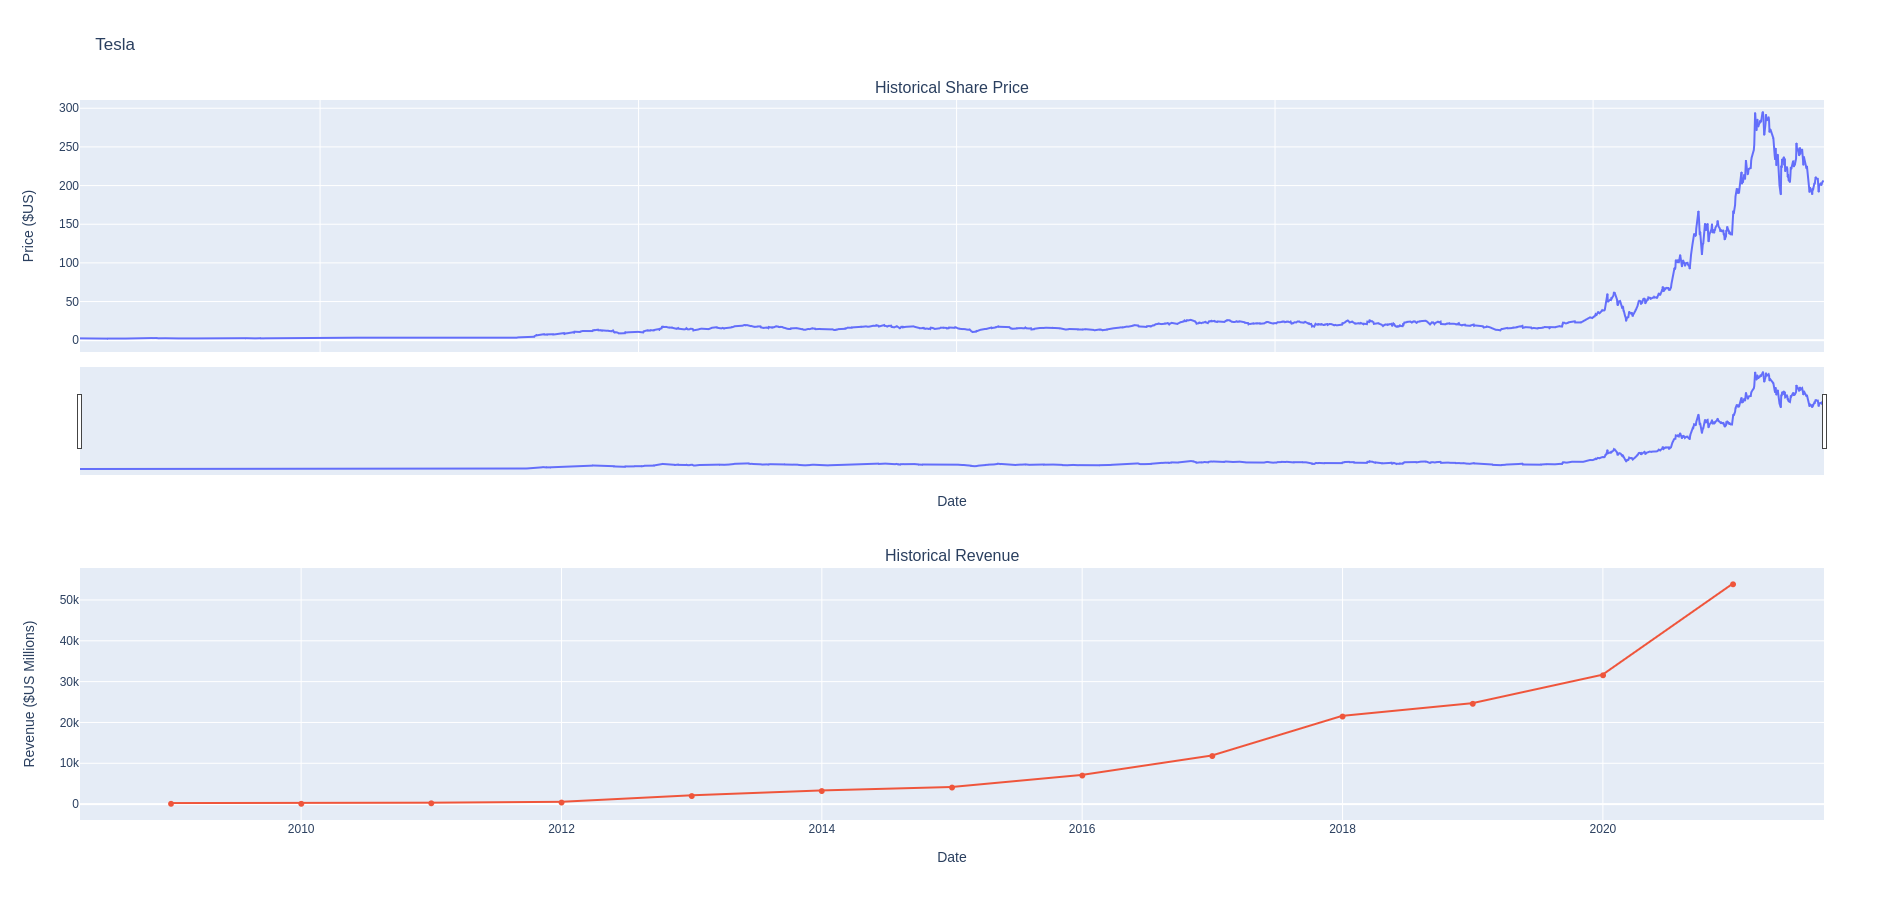

In [39]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


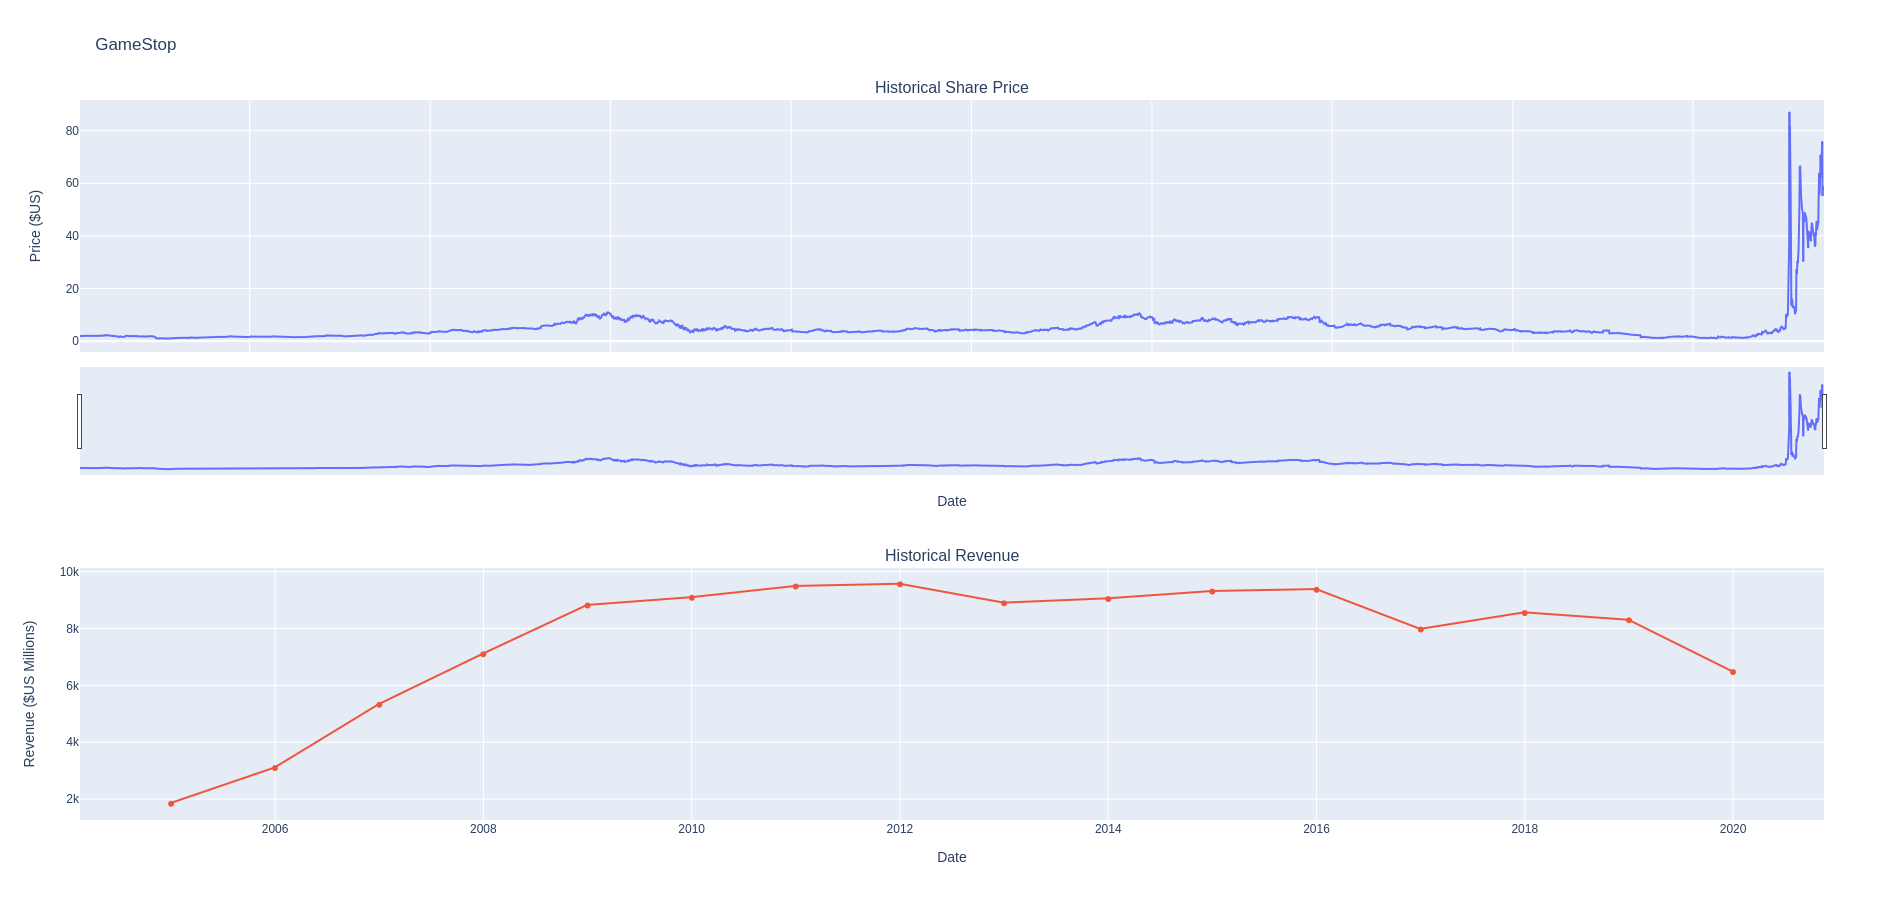

In [40]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
